In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
res_25_0 = pd.read_csv("results/25_0.csv")
res_25_75 = pd.read_csv("results/25_75.csv")
res_50_50 = pd.read_csv("results/50_50.csv")
res_50_0 = pd.read_csv("results/50_0.csv")
res_75_0 = pd.read_csv("results/75_0.csv")
res_75_25 = pd.read_csv("results/75_25.csv")
res_100_0 = pd.read_csv("results/100_0.csv")

In [155]:
["{},{}".format(a["WER"].mean(), a["WER"].std()) for a in [res_25_0, res_25_75, res_50_0, res_50_50, res_75_0, res_75_25, res_100_0]]

['0.6349214566191674,0.20747360997360148',
 '0.6405472289651065,0.21231613122632823',
 '0.5460872760093057,0.19827678877151428',
 '0.5617165416259756,0.20502818255325747',
 '0.5129336430499304,0.19927542255713646',
 '0.5074544291140969,0.2021050109377961',
 '0.504082720469628,0.20274256318471923']

In [156]:
["{},{}".format(a["CER"].mean(), a["CER"].std()) for a in [res_25_0, res_25_75, res_50_0, res_50_50, res_75_0, res_75_25, res_100_0]]

['0.23054966172604094,0.09727817959813784',
 '0.24011387697780173,0.10598215455616468',
 '0.1885501007217932,0.08964388369035813',
 '0.19935836803302118,0.09403541570352873',
 '0.1761539091540077,0.08869712804702337',
 '0.17656766562541454,0.0900422542830926',
 '0.1722163847933239,0.08926320939456091']

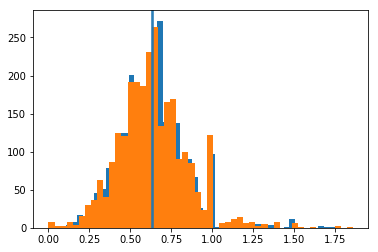

In [45]:
plt.hist(res_25_0["WER"], bins=50)
plt.hist(res_25_75["WER"], bins=50)
plt.axvline(x=res_25_0["WER"].mean())
plt.axvline(x=res_25_75["WER"].mean())
plt.show()

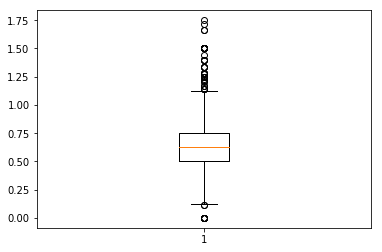

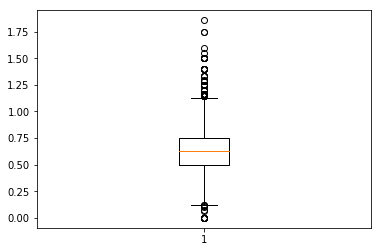

In [48]:
plt.boxplot(res_25_0["WER"])
plt.show()
plt.boxplot(res_25_75["WER"])
plt.show()

In [44]:
print(res_25_0["WER"].mean())
print(res_25_75["WER"].mean())

0.6349214566191674
0.6405472289651065


In [ ]:
plt.axvline(x=res_25_0["WER"].mean())
plt.axvline(x=res_25_75["WER"].mean())

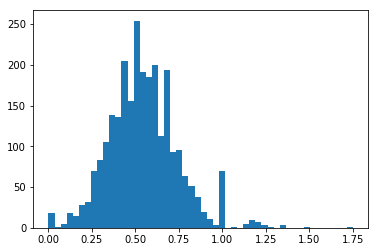

In [49]:
plt.hist(res_50_0["WER"], bins=50)
#plt.hist(res_50_50["WER"], bins=50)
#plt.axvline(x=res_50_0["WER"].mean(), c="blue")
#plt.axvline(x=res_50_50["WER"].mean(), c="green")
plt.show()

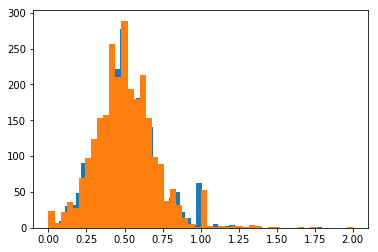

In [33]:
plt.hist(res_75_0["WER"], bins=50)
plt.hist(res_75_25["WER"], bins=50)
plt.show()

In [26]:
res_50_50["WER"].mean()

0.5617165416259756

In [27]:
res_50_0["WER"].mean()

0.5460872760093057

In [43]:
res_100_0["WER"].mean()

0.504082720469628

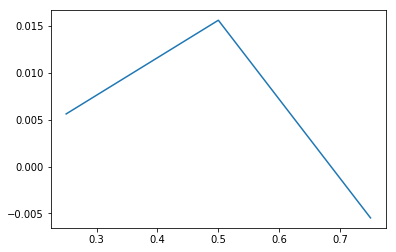

In [70]:
wer_mean_25_0 = res_25_0["WER"].mean()
wer_mean_25_75 = res_25_75["WER"].mean()
wer_mean_50_0 = res_50_0["WER"].mean()
wer_mean_50_50 = res_50_50["WER"].mean()
wer_mean_75_0 = res_75_0["WER"].mean()
wer_mean_75_25 = res_75_25["WER"].mean()

wer_dif_25 = wer_mean_25_75 - wer_mean_25_0
wer_dif_50 = wer_mean_50_50 - wer_mean_50_0
wer_dif_75 = wer_mean_75_25 - wer_mean_75_0

#plt.plot([0.25, 0.5, 0.75], )
plt.plot([0.25, 0.5, 0.75], [wer_dif_25, wer_dif_50, wer_dif_75])
plt.show()

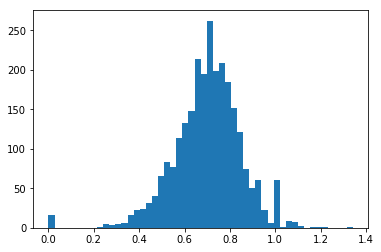

In [14]:
plt.hist(, bins=50)
#plt.hist(res_75_25["WER"] ** 2, bins=50)
plt.show()

In [17]:
stats.normaltest(res_75_0["WER"])

NormaltestResult(statistic=203.37663348388915, pvalue=6.875830544903168e-45)

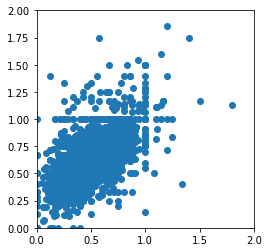

In [45]:
axes = plt.gca()
axes.scatter(res_75_0["WER"], res_25_75["WER"])
axes.set_xlim([0, 2])
axes.set_ylim([0, 2])
axes.set_aspect("equal")
plt.show()

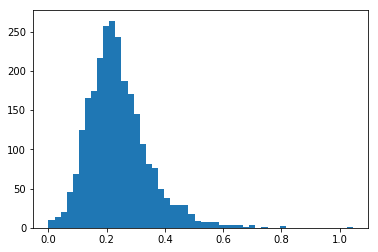

In [57]:
plt.hist(res_25_75["CER"], bins=50)
plt.show()

NormaltestResult(statistic=583.7471581466898, pvalue=1.7414667830763959e-127)

In [86]:
bootstrapped = [np.random.choice(res_25_75["CER"], size=len(res_25_75["CER"]), replace=True).mean() for i in range(10000)]

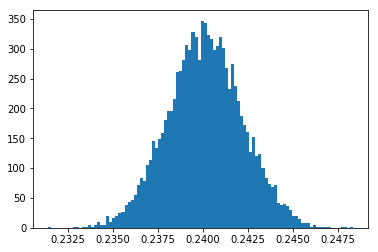

In [87]:
plt.hist(bootstrapped, bins=100)
plt.show()

In [88]:
stats.normaltest(bootstrapped)

NormaltestResult(statistic=0.1649909330322849, pvalue=0.9208156123500564)

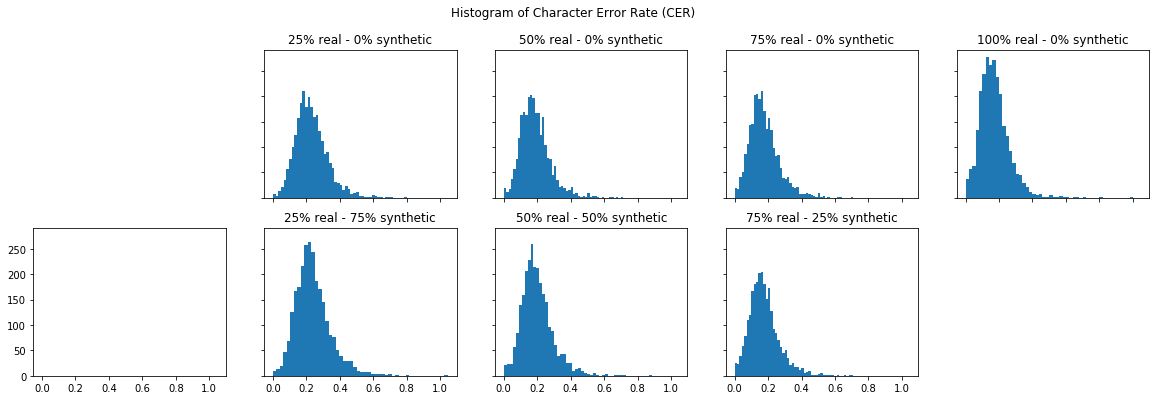

In [133]:
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(20, 6))
fig.suptitle('Histogram of Character Error Rate (CER)')

axes[0, 0].set_axis_off()
axes[0, 1].hist(res_25_0["CER"], bins=50)
axes[0, 1].set_title("25% real - 0% synthetic")

axes[0, 2].hist(res_50_0["CER"], bins=50)
axes[0, 2].set_title("50% real - 0% synthetic")

axes[0, 3].hist(res_75_0["CER"], bins=50)
axes[0, 3].set_title("75% real - 0% synthetic")

axes[0, 4].hist(res_100_0["CER"], bins=50)
axes[0, 4].set_title("100% real - 0% synthetic")

axes[1, 1].hist(res_25_75["CER"], bins=50)
axes[1, 1].set_title("25% real - 75% synthetic")

axes[1, 2].hist(res_50_50["CER"], bins=50)
axes[1, 2].set_title("50% real - 50% synthetic")

axes[1, 3].hist(res_75_25["CER"], bins=50)
axes[1, 3].set_title("75% real - 25% synthetic")

axes[1, 4].set_axis_off()
plt.show()

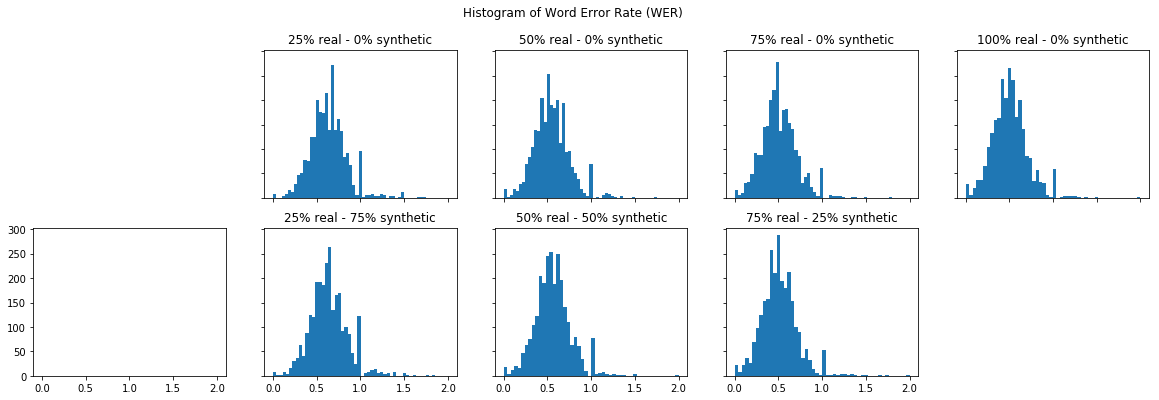

In [134]:
fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(20, 6))
fig.suptitle('Histogram of Word Error Rate (WER)')

axes[0, 0].set_axis_off()
axes[0, 1].hist(res_25_0["WER"], bins=50)
axes[0, 1].set_title("25% real - 0% synthetic")

axes[0, 2].hist(res_50_0["WER"], bins=50)
axes[0, 2].set_title("50% real - 0% synthetic")

axes[0, 3].hist(res_75_0["WER"], bins=50)
axes[0, 3].set_title("75% real - 0% synthetic")

axes[0, 4].hist(res_100_0["WER"], bins=50)
axes[0, 4].set_title("100% real - 0% synthetic")

axes[1, 1].hist(res_25_75["WER"], bins=50)
axes[1, 1].set_title("25% real - 75% synthetic")

axes[1, 2].hist(res_50_50["WER"], bins=50)
axes[1, 2].set_title("50% real - 50% synthetic")

axes[1, 3].hist(res_75_25["WER"], bins=50)
axes[1, 3].set_title("75% real - 25% synthetic")

axes[1, 4].set_axis_off()
plt.show()

In [135]:
lines = """HE HOPED THERE WOULD BE STEW FOR DINNER TURNIPS AND CARROTS AND BRUISED POTATOES AND FAT MUTTON PIECES TO BE LADLED OUT IN THICK PEPPERED FLOUR FATTENED SAUCE
STUFF IT INTO YOU HIS BELLY COUNSELLED HIM
AFTER EARLY NIGHTFALL THE YELLOW LAMPS WOULD LIGHT UP HERE AND THERE THE SQUALID QUARTER OF THE BROTHELS
HELLO BERTIE ANY GOOD IN YOUR MIND
NUMBER TEN FRESH NELLY IS WAITING ON YOU GOOD NIGHT HUSBAND
THE MUSIC CAME NEARER AND HE RECALLED THE WORDS THE WORDS OF SHELLEY'S FRAGMENT UPON THE MOON WANDERING COMPANIONLESS PALE FOR WEARINESS
THE DULL LIGHT FELL MORE FAINTLY UPON THE PAGE WHEREON ANOTHER EQUATION BEGAN TO UNFOLD ITSELF SLOWLY AND TO SPREAD ABROAD ITS WIDENING TAIL
A COLD LUCID INDIFFERENCE REIGNED IN HIS SOUL
THE CHAOS IN WHICH HIS ARDOUR EXTINGUISHED ITSELF WAS A COLD INDIFFERENT KNOWLEDGE OF HIMSELF
AT MOST BY AN ALMS GIVEN TO A BEGGAR WHOSE BLESSING HE FLED FROM HE MIGHT HOPE WEARILY TO WIN FOR HIMSELF SOME MEASURE OF ACTUAL GRACE
WELL NOW ENNIS I DECLARE YOU HAVE A HEAD AND SO HAS MY STICK
ON SATURDAY MORNINGS WHEN THE SODALITY MET IN THE CHAPEL TO RECITE THE LITTLE OFFICE HIS PLACE WAS A CUSHIONED KNEELING DESK AT THE RIGHT OF THE ALTAR FROM WHICH HE LED HIS WING OF BOYS THROUGH THE RESPONSES
HER EYES SEEMED TO REGARD HIM WITH MILD PITY HER HOLINESS A STRANGE LIGHT GLOWING FAINTLY UPON HER FRAIL FLESH DID NOT HUMILIATE THE SINNER WHO APPROACHED HER
IF EVER HE WAS IMPELLED TO CAST SIN FROM HIM AND TO REPENT THE IMPULSE THAT MOVED HIM WAS THE WISH TO BE HER KNIGHT
HE TRIED TO THINK HOW IT COULD BE
BUT THE DUSK DEEPENING IN THE SCHOOLROOM COVERED OVER HIS THOUGHTS THE BELL RANG
THEN YOU CAN ASK HIM QUESTIONS ON THE CATECHISM DEDALUS
STEPHEN LEANING BACK AND DRAWING IDLY ON HIS SCRIBBLER LISTENED TO THE TALK ABOUT HIM WHICH HERON CHECKED FROM TIME TO TIME BY SAYING
IT WAS STRANGE TOO THAT HE FOUND AN ARID PLEASURE IN FOLLOWING UP TO THE END THE RIGID LINES OF THE DOCTRINES OF THE CHURCH AND PENETRATING INTO OBSCURE SILENCES ONLY TO HEAR AND FEEL THE MORE DEEPLY HIS OWN CONDEMNATION
THE SENTENCE OF SAINT JAMES WHICH SAYS THAT HE WHO OFFENDS AGAINST ONE COMMANDMENT BECOMES GUILTY OF ALL HAD SEEMED TO HIM FIRST A SWOLLEN PHRASE UNTIL HE HAD BEGUN TO GROPE IN THE DARKNESS OF HIS OWN STATE
IF A MAN HAD STOLEN A POUND IN HIS YOUTH AND HAD USED THAT POUND TO AMASS A HUGE FORTUNE HOW MUCH WAS HE OBLIGED TO GIVE BACK THE POUND HE HAD STOLEN ONLY OR THE POUND TOGETHER WITH THE COMPOUND INTEREST ACCRUING UPON IT OR ALL HIS HUGE FORTUNE
IF A LAYMAN IN GIVING BAPTISM POUR THE WATER BEFORE SAYING THE WORDS IS THE CHILD BAPTIZED
HOW COMES IT THAT WHILE THE FIRST BEATITUDE PROMISES THE KINGDOM OF HEAVEN TO THE POOR OF HEART THE SECOND BEATITUDE PROMISES ALSO TO THE MEEK THAT THEY SHALL POSSESS THE LAND
WHY WAS THE SACRAMENT OF THE EUCHARIST INSTITUTED UNDER THE TWO SPECIES OF BREAD AND WINE IF JESUS CHRIST BE PRESENT BODY AND BLOOD SOUL AND DIVINITY IN THE BREAD ALONE AND IN THE WINE ALONE
IF THE WINE CHANGE INTO VINEGAR AND THE HOST CRUMBLE INTO CORRUPTION AFTER THEY HAVE BEEN CONSECRATED IS JESUS CHRIST STILL PRESENT UNDER THEIR SPECIES AS GOD AND AS MAN
A GENTLE KICK FROM THE TALL BOY IN THE BENCH BEHIND URGED STEPHEN TO ASK A DIFFICULT QUESTION
THE RECTOR DID NOT ASK FOR A CATECHISM TO HEAR THE LESSON FROM
HE CLASPED HIS HANDS ON THE DESK AND SAID
THE RETREAT WILL BEGIN ON WEDNESDAY AFTERNOON IN HONOUR OF SAINT FRANCIS XAVIER WHOSE FEAST DAY IS SATURDAY
ON FRIDAY CONFESSION WILL BE HEARD ALL THE AFTERNOON AFTER BEADS
BEWARE OF MAKING THAT MISTAKE
STEPHEN'S HEART BEGAN SLOWLY TO FOLD AND FADE WITH FEAR LIKE A WITHERING FLOWER
HE IS CALLED AS YOU KNOW THE APOSTLE OF THE INDIES
A GREAT SAINT SAINT FRANCIS XAVIER
THE RECTOR PAUSED AND THEN SHAKING HIS CLASPED HANDS BEFORE HIM WENT ON
HE HAD THE FAITH IN HIM THAT MOVES MOUNTAINS
A GREAT SAINT SAINT FRANCIS XAVIER
IN THE SILENCE THEIR DARK FIRE KINDLED THE DUSK INTO A TAWNY GLOW
HE COULD WAIT NO LONGER
FOR A FULL HOUR HE HAD PACED UP AND DOWN WAITING BUT HE COULD WAIT NO LONGER
HE SET OFF ABRUPTLY FOR THE BULL WALKING RAPIDLY LEST HIS FATHER'S SHRILL WHISTLE MIGHT CALL HIM BACK AND IN A FEW MOMENTS HE HAD ROUNDED THE CURVE AT THE POLICE BARRACK AND WAS SAFE
THE UNIVERSITY
PRIDE AFTER SATISFACTION UPLIFTED HIM LIKE LONG SLOW WAVES
WHOSE FEET ARE AS THE FEET OF HARTS AND UNDERNEATH THE EVERLASTING ARMS
THE PRIDE OF THAT DIM IMAGE BROUGHT BACK TO HIS MIND THE DIGNITY OF THE OFFICE HE HAD REFUSED
SOON THE WHOLE BRIDGE WAS TREMBLING AND RESOUNDING
THE UNCOUTH FACES PASSED HIM TWO BY TWO STAINED YELLOW OR RED OR LIVID BY THE SEA AND AS HE STROVE TO LOOK AT THEM WITH EASE AND INDIFFERENCE A FAINT STAIN OF PERSONAL SHAME AND COMMISERATION ROSE TO HIS OWN FACE
ANGRY WITH HIMSELF HE TRIED TO HIDE HIS FACE FROM THEIR EYES BY GAZING DOWN SIDEWAYS INTO THE SHALLOW SWIRLING WATER UNDER THE BRIDGE BUT HE STILL SAW A REFLECTION THEREIN OF THEIR TOP HEAVY SILK HATS AND HUMBLE TAPE LIKE COLLARS AND LOOSELY HANGING CLERICAL CLOTHES BROTHER HICKEY
BROTHER MAC ARDLE BROTHER KEOGH
THEIR PIETY WOULD BE LIKE THEIR NAMES LIKE THEIR FACES LIKE THEIR CLOTHES AND IT WAS IDLE FOR HIM TO TELL HIMSELF THAT THEIR HUMBLE AND CONTRITE HEARTS IT MIGHT BE PAID A FAR RICHER TRIBUTE OF DEVOTION THAN HIS HAD EVER BEEN A GIFT TENFOLD MORE ACCEPTABLE THAN HIS ELABORATE ADORATION
IT WAS IDLE FOR HIM TO MOVE HIMSELF TO BE GENEROUS TOWARDS THEM TO TELL HIMSELF THAT IF HE EVER CAME TO THEIR GATES STRIPPED OF HIS PRIDE BEATEN AND IN BEGGAR'S WEEDS THAT THEY WOULD BE GENEROUS TOWARDS HIM LOVING HIM AS THEMSELVES
IDLE AND EMBITTERING FINALLY TO ARGUE AGAINST HIS OWN DISPASSIONATE CERTITUDE THAT THE COMMANDMENT OF LOVE BADE US NOT TO LOVE OUR NEIGHBOUR AS OURSELVES WITH THE SAME AMOUNT AND INTENSITY OF LOVE BUT TO LOVE HIM AS OURSELVES WITH THE SAME KIND OF LOVE
THE PHRASE AND THE DAY AND THE SCENE HARMONIZED IN A CHORD
WORDS WAS IT THEIR COLOURS
THEY WERE VOYAGING ACROSS THE DESERTS OF THE SKY A HOST OF NOMADS ON THE MARCH VOYAGING HIGH OVER IRELAND WESTWARD BOUND
THE EUROPE THEY HAD COME FROM LAY OUT THERE BEYOND THE IRISH SEA EUROPE OF STRANGE TONGUES AND VALLEYED AND WOODBEGIRT AND CITADELLED AND OF ENTRENCHED AND MARSHALLED RACES
AGAIN AGAIN
A VOICE FROM BEYOND THE WORLD WAS CALLING
HELLO STEPHANOS HERE COMES THE DEDALUS
THEIR DIVING STONE POISED ON ITS RUDE SUPPORTS AND ROCKING UNDER THEIR PLUNGES AND THE ROUGH HEWN STONES OF THE SLOPING BREAKWATER OVER WHICH THEY SCRAMBLED IN THEIR HORSEPLAY GLEAMED WITH COLD WET LUSTRE
HE STOOD STILL IN DEFERENCE TO THEIR CALLS AND PARRIED THEIR BANTER WITH EASY WORDS
IT WAS A PAIN TO SEE THEM AND A SWORD LIKE PAIN TO SEE THE SIGNS OF ADOLESCENCE THAT MADE REPELLENT THEIR PITIABLE NAKEDNESS
STEPHANOS DEDALOS
A MOMENT BEFORE THE GHOST OF THE ANCIENT KINGDOM OF THE DANES HAD LOOKED FORTH THROUGH THE VESTURE OF THE HAZEWRAPPED CITY
YOU WILL FIND ME CONTINUALLY SPEAKING OF FOUR MEN TITIAN HOLBEIN TURNER AND TINTORET IN ALMOST THE SAME TERMS
THEY UNITE EVERY QUALITY AND SOMETIMES YOU WILL FIND ME REFERRING TO THEM AS COLORISTS SOMETIMES AS CHIAROSCURISTS
BY BEING STUDIOUS OF COLOR THEY ARE STUDIOUS OF DIVISION AND WHILE THE CHIAROSCURIST DEVOTES HIMSELF TO THE REPRESENTATION OF DEGREES OF FORCE IN ONE THING UNSEPARATED LIGHT THE COLORISTS HAVE FOR THEIR FUNCTION THE ATTAINMENT OF BEAUTY BY ARRANGEMENT OF THE DIVISIONS OF LIGHT
MY FIRST AND PRINCIPAL REASON WAS THAT THEY ENFORCED BEYOND ALL RESISTANCE ON ANY STUDENT WHO MIGHT ATTEMPT TO COPY THEM THIS METHOD OF LAYING PORTIONS OF DISTINCT HUE SIDE BY SIDE
SOME OF THE TOUCHES INDEED WHEN THE TINT HAS BEEN MIXED WITH MUCH WATER HAVE BEEN LAID IN LITTLE DROPS OR PONDS SO THAT THE PIGMENT MIGHT CRYSTALLIZE HARD AT THE EDGE
IT IS THE HEAD OF A PARROT WITH A LITTLE FLOWER IN HIS BEAK FROM A PICTURE OF CARPACCIO'S ONE OF HIS SERIES OF THE LIFE OF SAINT GEORGE
THEN HE COMES TO THE BEAK OF IT
THE BROWN GROUND BENEATH IS LEFT FOR THE MOST PART ONE TOUCH OF BLACK IS PUT FOR THE HOLLOW TWO DELICATE LINES OF DARK GRAY DEFINE THE OUTER CURVE AND ONE LITTLE QUIVERING TOUCH OF WHITE DRAWS THE INNER EDGE OF THE MANDIBLE
FOR BELIEVE ME THE FINAL PHILOSOPHY OF ART CAN ONLY RATIFY THEIR OPINION THAT THE BEAUTY OF A COCK ROBIN IS TO BE RED AND OF A GRASS PLOT TO BE GREEN AND THE BEST SKILL OF ART IS IN INSTANTLY SEIZING ON THE MANIFOLD DELICIOUSNESS OF LIGHT WHICH YOU CAN ONLY SEIZE BY PRECISION OF INSTANTANEOUS TOUCH
NOW YOU WILL SEE IN THESE STUDIES THAT THE MOMENT THE WHITE IS INCLOSED PROPERLY AND HARMONIZED WITH THE OTHER HUES IT BECOMES SOMEHOW MORE PRECIOUS AND PEARLY THAN THE WHITE PAPER AND THAT I AM NOT AFRAID TO LEAVE A WHOLE FIELD OF UNTREATED WHITE PAPER ALL ROUND IT BEING SURE THAT EVEN THE LITTLE DIAMONDS IN THE ROUND WINDOW WILL TELL AS JEWELS IF THEY ARE GRADATED JUSTLY
BUT IN THIS VIGNETTE COPIED FROM TURNER YOU HAVE THE TWO PRINCIPLES BROUGHT OUT PERFECTLY
THEY ARE BEYOND ALL OTHER WORKS THAT I KNOW EXISTING DEPENDENT FOR THEIR EFFECT ON LOW SUBDUED TONES THEIR FAVORITE CHOICE IN TIME OF DAY BEING EITHER DAWN OR TWILIGHT AND EVEN THEIR BRIGHTEST SUNSETS PRODUCED CHIEFLY OUT OF GRAY PAPER
IT MAY BE THAT A GREAT COLORIST WILL USE HIS UTMOST FORCE OF COLOR AS A SINGER HIS FULL POWER OF VOICE BUT LOUD OR LOW THE VIRTUE IS IN BOTH CASES ALWAYS IN REFINEMENT NEVER IN LOUDNESS
IT MUST REMEMBER BE ONE OR THE OTHER
DO NOT THEREFORE THINK THAT THE GOTHIC SCHOOL IS AN EASY ONE
THE LAW OF THAT SCHOOL IS THAT EVERYTHING SHALL BE SEEN CLEARLY OR AT LEAST ONLY IN SUCH MIST OR FAINTNESS AS SHALL BE DELIGHTFUL AND I HAVE NO DOUBT THAT THE BEST INTRODUCTION TO IT WOULD BE THE ELEMENTARY PRACTICE OF PAINTING EVERY STUDY ON A GOLDEN GROUND
THIS AT ONCE COMPELS YOU TO UNDERSTAND THAT THE WORK IS TO BE IMAGINATIVE AND DECORATIVE THAT IT REPRESENTS BEAUTIFUL THINGS IN THE CLEAREST WAY BUT NOT UNDER EXISTING CONDITIONS AND THAT IN FACT YOU ARE PRODUCING JEWELER'S WORK RATHER THAN PICTURES
THAT A STYLE IS RESTRAINED OR SEVERE DOES NOT MEAN THAT IT IS ALSO ERRONEOUS
IN ALL EARLY GOTHIC ART INDEED YOU WILL FIND FAILURE OF THIS KIND ESPECIALLY DISTORTION AND RIGIDITY WHICH ARE IN MANY RESPECTS PAINFULLY TO BE COMPARED WITH THE SPLENDID REPOSE OF CLASSIC ART
THE LARGE LETTER CONTAINS INDEED ENTIRELY FEEBLE AND ILL DRAWN FIGURES THAT IS MERELY CHILDISH AND FAILING WORK OF AN INFERIOR HAND IT IS NOT CHARACTERISTIC OF GOTHIC OR ANY OTHER SCHOOL
BUT OBSERVE YOU CAN ONLY DO THIS ON ONE CONDITION THAT OF STRIVING ALSO TO CREATE IN REALITY THE BEAUTY WHICH YOU SEEK IN IMAGINATION
IT WILL BE WHOLLY IMPOSSIBLE FOR YOU TO RETAIN THE TRANQUILLITY OF TEMPER AND FELICITY OF FAITH NECESSARY FOR NOBLE PURIST PAINTING UNLESS YOU ARE ACTIVELY ENGAGED IN PROMOTING THE FELICITY AND PEACE OF PRACTICAL LIFE
YOU MUST LOOK AT HIM IN THE FACE FIGHT HIM CONQUER HIM WITH WHAT SCATHE YOU MAY YOU NEED NOT THINK TO KEEP OUT OF THE WAY OF HIM
THE COLORIST SAYS FIRST OF ALL AS MY DELICIOUS PAROQUET WAS RUBY SO THIS NASTY VIPER SHALL BE BLACK AND THEN IS THE QUESTION CAN I ROUND HIM OFF EVEN THOUGH HE IS BLACK AND MAKE HIM SLIMY AND YET SPRINGY AND CLOSE DOWN CLOTTED LIKE A POOL OF BLACK BLOOD ON THE EARTH ALL THE SAME
NOTHING WILL BE MORE PRECIOUS TO YOU I THINK IN THE PRACTICAL STUDY OF ART THAN THE CONVICTION WHICH WILL FORCE ITSELF ON YOU MORE AND MORE EVERY HOUR OF THE WAY ALL THINGS ARE BOUND TOGETHER LITTLE AND GREAT IN SPIRIT AND IN MATTER
YOU KNOW I HAVE JUST BEEN TELLING YOU HOW THIS SCHOOL OF MATERIALISM AND CLAY INVOLVED ITSELF AT LAST IN CLOUD AND FIRE
HERE IS AN EQUALLY TYPICAL GREEK SCHOOL LANDSCAPE BY WILSON LOST WHOLLY IN GOLDEN MIST THE TREES SO SLIGHTLY DRAWN THAT YOU DON'T KNOW IF THEY ARE TREES OR TOWERS AND NO CARE FOR COLOR WHATEVER PERFECTLY DECEPTIVE AND MARVELOUS EFFECT OF SUNSHINE THROUGH THE MIST APOLLO AND THE PYTHON
NOW HERE IS RAPHAEL EXACTLY BETWEEN THE TWO TREES STILL DRAWN LEAF BY LEAF WHOLLY FORMAL BUT BEAUTIFUL MIST COMING GRADUALLY INTO THE DISTANCE
WELL THEN LAST HERE IS TURNER'S GREEK SCHOOL OF THE HIGHEST CLASS AND YOU DEFINE HIS ART ABSOLUTELY AS FIRST THE DISPLAYING INTENSELY AND WITH THE STERNEST INTELLECT OF NATURAL FORM AS IT IS AND THEN THE ENVELOPMENT OF IT WITH CLOUD AND FIRE
ONLY THERE ARE TWO SORTS OF CLOUD AND FIRE
HE KNOWS THEM BOTH
THERE'S ONE AND THERE'S ANOTHER THE DUDLEY AND THE FLINT
IT IS ONLY A PENCIL OUTLINE BY EDWARD BURNE JONES IN ILLUSTRATION OF THE STORY OF PSYCHE IT IS THE INTRODUCTION OF PSYCHE AFTER ALL HER TROUBLES INTO HEAVEN
EVERY PLANT IN THE GRASS IS SET FORMALLY GROWS PERFECTLY AND MAY BE REALIZED COMPLETELY
EXQUISITE ORDER AND UNIVERSAL WITH ETERNAL LIFE AND LIGHT THIS IS THE FAITH AND EFFORT OF THE SCHOOLS OF CRYSTAL AND YOU MAY DESCRIBE AND COMPLETE THEIR WORK QUITE LITERALLY BY TAKING ANY VERSES OF CHAUCER IN HIS TENDER MOOD AND OBSERVING HOW HE INSISTS ON THE CLEARNESS AND BRIGHTNESS FIRST AND THEN ON THE ORDER
THUS IN CHAUCER'S DREAM
IN BOTH THESE HIGH MYTHICAL SUBJECTS THE SURROUNDING NATURE THOUGH SUFFERING IS STILL DIGNIFIED AND BEAUTIFUL
EVERY LINE IN WHICH THE MASTER TRACES IT EVEN WHERE SEEMINGLY NEGLIGENT IS LOVELY AND SET DOWN WITH A MEDITATIVE CALMNESS WHICH MAKES THESE TWO ETCHINGS CAPABLE OF BEING PLACED BESIDE THE MOST TRANQUIL WORK OF HOLBEIN OR DUERER
BUT NOW HERE IS A SUBJECT OF WHICH YOU WILL WONDER AT FIRST WHY TURNER DREW IT AT ALL
IT HAS NO BEAUTY WHATSOEVER NO SPECIALTY OF PICTURESQUENESS AND ALL ITS LINES ARE CRAMPED AND POOR
THE CRAMPNESS AND THE POVERTY ARE ALL INTENDED
IT IS A GLEANER BRINGING DOWN HER ONE SHEAF OF CORN TO AN OLD WATERMILL ITSELF MOSSY AND RENT SCARCELY ABLE TO GET ITS STONES TO TURN
THE SCENE IS ABSOLUTELY ARCADIAN
SEE THAT YOUR LIVES BE IN NOTHING WORSE THAN A BOY'S CLIMBING FOR HIS ENTANGLED KITE
IT WILL BE WELL FOR YOU IF YOU JOIN NOT WITH THOSE WHO INSTEAD OF KITES FLY FALCONS WHO INSTEAD OF OBEYING THE LAST WORDS OF THE GREAT CLOUD SHEPHERD TO FEED HIS SHEEP LIVE THE LIVES HOW MUCH LESS THAN VANITY OF THE WAR WOLF AND THE GIER EAGLE
ALSO A POPULAR CONTRIVANCE WHEREBY LOVE MAKING MAY BE SUSPENDED BUT NOT STOPPED DURING THE PICNIC SEASON
HARANGUE THE TIRESOME PRODUCT OF A TIRELESS TONGUE
ANGOR PAIN PAINFUL TO HEAR
HAY FEVER A HEART TROUBLE CAUSED BY FALLING IN LOVE WITH A GRASS WIDOW
HEAVEN A GOOD PLACE TO BE RAISED TO
HEDGE A FENCE
HEREDITY THE CAUSE OF ALL OUR FAULTS
HORSE SENSE A DEGREE OF WISDOM THAT KEEPS ONE FROM BETTING ON THE RACES
HOSE MAN'S EXCUSE FOR WETTING THE WALK
HOTEL A PLACE WHERE A GUEST OFTEN GIVES UP GOOD DOLLARS FOR POOR QUARTERS
HOUSECLEANING A DOMESTIC UPHEAVAL THAT MAKES IT EASY FOR THE GOVERNMENT TO ENLIST ALL THE SOLDIERS IT NEEDS
HUSBAND THE NEXT THING TO A WIFE
HUSSY WOMAN AND BOND TIE
TIED TO A WOMAN
HYPOCRITE A HORSE DEALER
THOSE PRETTY WRONGS THAT LIBERTY COMMITS WHEN I AM SOMETIME ABSENT FROM THY HEART THY BEAUTY AND THY YEARS FULL WELL BEFITS FOR STILL TEMPTATION FOLLOWS WHERE THOU ART
AY ME
NO MATTER THEN ALTHOUGH MY FOOT DID STAND UPON THE FARTHEST EARTH REMOV'D FROM THEE FOR NIMBLE THOUGHT CAN JUMP BOTH SEA AND LAND AS SOON AS THINK THE PLACE WHERE HE WOULD BE BUT AH
THOUGHT KILLS ME THAT I AM NOT THOUGHT TO LEAP LARGE LENGTHS OF MILES WHEN THOU ART GONE BUT THAT SO MUCH OF EARTH AND WATER WROUGHT I MUST ATTEND TIME'S LEISURE WITH MY MOAN RECEIVING NOUGHT BY ELEMENTS SO SLOW BUT HEAVY TEARS BADGES OF EITHER'S WOE
MY HEART DOTH PLEAD THAT THOU IN HIM DOST LIE A CLOSET NEVER PIERC'D WITH CRYSTAL EYES BUT THE DEFENDANT DOTH THAT PLEA DENY AND SAYS IN HIM THY FAIR APPEARANCE LIES
YOU ARE MY ALL THE WORLD AND I MUST STRIVE TO KNOW MY SHAMES AND PRAISES FROM YOUR TONGUE NONE ELSE TO ME NOR I TO NONE ALIVE THAT MY STEEL'D SENSE OR CHANGES RIGHT OR WRONG
O TIS THE FIRST TIS FLATTERY IN MY SEEING AND MY GREAT MIND MOST KINGLY DRINKS IT UP MINE EYE WELL KNOWS WHAT WITH HIS GUST IS GREEING AND TO HIS PALATE DOTH PREPARE THE CUP IF IT BE POISON'D TIS THE LESSER SIN THAT MINE EYE LOVES IT AND DOTH FIRST BEGIN
BUT RECKONING TIME WHOSE MILLION'D ACCIDENTS CREEP IN TWIXT VOWS AND CHANGE DECREES OF KINGS TAN SACRED BEAUTY BLUNT THE SHARP'ST INTENTS DIVERT STRONG MINDS TO THE COURSE OF ALTERING THINGS ALAS WHY FEARING OF TIME'S TYRANNY MIGHT I NOT THEN SAY NOW I LOVE YOU BEST WHEN I WAS CERTAIN O'ER INCERTAINTY CROWNING THE PRESENT DOUBTING OF THE REST
LOVE IS A BABE THEN MIGHT I NOT SAY SO TO GIVE FULL GROWTH TO THAT WHICH STILL DOTH GROW
SO I RETURN REBUK'D TO MY CONTENT AND GAIN BY ILL THRICE MORE THAN I HAVE SPENT
IT WAS THIS OBSERVATION THAT DREW FROM DOUGLAS NOT IMMEDIATELY BUT LATER IN THE EVENING A REPLY THAT HAD THE INTERESTING CONSEQUENCE TO WHICH I CALL ATTENTION
SOMEONE ELSE TOLD A STORY NOT PARTICULARLY EFFECTIVE WHICH I SAW HE WAS NOT FOLLOWING
CRIED ONE OF THE WOMEN HE TOOK NO NOTICE OF HER HE LOOKED AT ME BUT AS IF INSTEAD OF ME HE SAW WHAT HE SPOKE OF
THERE WAS A UNANIMOUS GROAN AT THIS AND MUCH REPROACH AFTER WHICH IN HIS PREOCCUPIED WAY HE EXPLAINED
THE STORY'S WRITTEN
I COULD WRITE TO MY MAN AND ENCLOSE THE KEY HE COULD SEND DOWN THE PACKET AS HE FINDS IT
THE OTHERS RESENTED POSTPONEMENT BUT IT WAS JUST HIS SCRUPLES THAT CHARMED ME
TO THIS HIS ANSWER WAS PROMPT OH THANK GOD NO AND IS THE RECORD YOURS
HE HUNG FIRE AGAIN A WOMAN'S
SHE HAS BEEN DEAD THESE TWENTY YEARS
SHE SENT ME THE PAGES IN QUESTION BEFORE SHE DIED
SHE WAS THE MOST AGREEABLE WOMAN I'VE EVER KNOWN IN HER POSITION SHE WOULD HAVE BEEN WORTHY OF ANY WHATEVER
IT WASN'T SIMPLY THAT SHE SAID SO BUT THAT I KNEW SHE HADN'T I WAS SURE I COULD SEE
YOU'LL EASILY JUDGE WHY WHEN YOU HEAR BECAUSE THE THING HAD BEEN SUCH A SCARE HE CONTINUED TO FIX ME
YOU ARE ACUTE
HE QUITTED THE FIRE AND DROPPED BACK INTO HIS CHAIR
PROBABLY NOT TILL THE SECOND POST
IT WAS ALMOST THE TONE OF HOPE EVERYBODY WILL STAY
CRIED THE LADIES WHOSE DEPARTURE HAD BEEN FIXED
MISSUS GRIFFIN HOWEVER EXPRESSED THE NEED FOR A LITTLE MORE LIGHT
WHO WAS IT SHE WAS IN LOVE WITH THE STORY WILL TELL I TOOK UPON MYSELF TO REPLY OH I CAN'T WAIT FOR THE STORY THE STORY WON'T TELL SAID DOUGLAS NOT IN ANY LITERAL VULGAR WAY MORE'S THE PITY THEN
WON'T YOU TELL DOUGLAS
WELL IF I DON'T KNOW WHO SHE WAS IN LOVE WITH I KNOW WHO HE WAS
LET ME SAY HERE DISTINCTLY TO HAVE DONE WITH IT THAT THIS NARRATIVE FROM AN EXACT TRANSCRIPT OF MY OWN MADE MUCH LATER IS WHAT I SHALL PRESENTLY GIVE
POOR DOUGLAS BEFORE HIS DEATH WHEN IT WAS IN SIGHT COMMITTED TO ME THE MANUSCRIPT THAT REACHED HIM ON THE THIRD OF THESE DAYS AND THAT ON THE SAME SPOT WITH IMMENSE EFFECT HE BEGAN TO READ TO OUR HUSHED LITTLE CIRCLE ON THE NIGHT OF THE FOURTH
THE DEPARTING LADIES WHO HAD SAID THEY WOULD STAY DIDN'T OF COURSE THANK HEAVEN STAY THEY DEPARTED IN CONSEQUENCE OF ARRANGEMENTS MADE IN A RAGE OF CURIOSITY AS THEY PROFESSED PRODUCED BY THE TOUCHES WITH WHICH HE HAD ALREADY WORKED US UP
THE FIRST OF THESE TOUCHES CONVEYED THAT THE WRITTEN STATEMENT TOOK UP THE TALE AT A POINT AFTER IT HAD IN A MANNER BEGUN
HE HAD FOR HIS OWN TOWN RESIDENCE A BIG HOUSE FILLED WITH THE SPOILS OF TRAVEL AND THE TROPHIES OF THE CHASE BUT IT WAS TO HIS COUNTRY HOME AN OLD FAMILY PLACE IN ESSEX THAT HE WISHED HER IMMEDIATELY TO PROCEED
THE AWKWARD THING WAS THAT THEY HAD PRACTICALLY NO OTHER RELATIONS AND THAT HIS OWN AFFAIRS TOOK UP ALL HIS TIME
THERE WERE PLENTY OF PEOPLE TO HELP BUT OF COURSE THE YOUNG LADY WHO SHOULD GO DOWN AS GOVERNESS WOULD BE IN SUPREME AUTHORITY
I DON'T ANTICIPATE
SHE WAS YOUNG UNTRIED NERVOUS IT WAS A VISION OF SERIOUS DUTIES AND LITTLE COMPANY OF REALLY GREAT LONELINESS
YES BUT THAT'S JUST THE BEAUTY OF HER PASSION
IT WAS THE BEAUTY OF IT
IT SOUNDED DULL IT SOUNDED STRANGE AND ALL THE MORE SO BECAUSE OF HIS MAIN CONDITION WHICH WAS
SHE PROMISED TO DO THIS AND SHE MENTIONED TO ME THAT WHEN FOR A MOMENT DISBURDENED DELIGHTED HE HELD HER HAND THANKING HER FOR THE SACRIFICE SHE ALREADY FELT REWARDED
BUT WAS THAT ALL HER REWARD ONE OF THE LADIES ASKED
HOW STRANGE IT SEEMED TO THE SAD WOMAN AS SHE WATCHED THE GROWTH AND THE BEAUTY THAT BECAME EVERY DAY MORE BRILLIANT AND THE INTELLIGENCE THAT THREW ITS QUIVERING SUNSHINE OVER THE TINY FEATURES OF THIS CHILD
GOD AS A DIRECT CONSEQUENCE OF THE SIN WHICH MAN THUS PUNISHED HAD GIVEN HER A LOVELY CHILD WHOSE PLACE WAS ON THAT SAME DISHONOURED BOSOM TO CONNECT HER PARENT FOR EVER WITH THE RACE AND DESCENT OF MORTALS AND TO BE FINALLY A BLESSED SOUL IN HEAVEN
YET THESE THOUGHTS AFFECTED HESTER PRYNNE LESS WITH HOPE THAN APPREHENSION
THE CHILD HAD A NATIVE GRACE WHICH DOES NOT INVARIABLY CO EXIST WITH FAULTLESS BEAUTY ITS ATTIRE HOWEVER SIMPLE ALWAYS IMPRESSED THE BEHOLDER AS IF IT WERE THE VERY GARB THAT PRECISELY BECAME IT BEST
THIS OUTWARD MUTABILITY INDICATED AND DID NOT MORE THAN FAIRLY EXPRESS THE VARIOUS PROPERTIES OF HER INNER LIFE
HESTER COULD ONLY ACCOUNT FOR THE CHILD'S CHARACTER AND EVEN THEN MOST VAGUELY AND IMPERFECTLY BY RECALLING WHAT SHE HERSELF HAD BEEN DURING THAT MOMENTOUS PERIOD WHILE PEARL WAS IMBIBING HER SOUL FROM THE SPIRITUAL WORLD AND HER BODILY FRAME FROM ITS MATERIAL OF EARTH
THEY WERE NOW ILLUMINATED BY THE MORNING RADIANCE OF A YOUNG CHILD'S DISPOSITION BUT LATER IN THE DAY OF EARTHLY EXISTENCE MIGHT BE PROLIFIC OF THE STORM AND WHIRLWIND
HESTER PRYNNE NEVERTHELESS THE LOVING MOTHER OF THIS ONE CHILD RAN LITTLE RISK OF ERRING ON THE SIDE OF UNDUE SEVERITY
MINDFUL HOWEVER OF HER OWN ERRORS AND MISFORTUNES SHE EARLY SOUGHT TO IMPOSE A TENDER BUT STRICT CONTROL OVER THE INFANT IMMORTALITY THAT WAS COMMITTED TO HER CHARGE
AS TO ANY OTHER KIND OF DISCIPLINE WHETHER ADDRESSED TO HER MIND OR HEART LITTLE PEARL MIGHT OR MIGHT NOT BE WITHIN ITS REACH IN ACCORDANCE WITH THE CAPRICE THAT RULED THE MOMENT
IT WAS A LOOK SO INTELLIGENT YET INEXPLICABLE PERVERSE SOMETIMES SO MALICIOUS BUT GENERALLY ACCOMPANIED BY A WILD FLOW OF SPIRITS THAT HESTER COULD NOT HELP QUESTIONING AT SUCH MOMENTS WHETHER PEARL WAS A HUMAN CHILD
BEHOLDING IT HESTER WAS CONSTRAINED TO RUSH TOWARDS THE CHILD TO PURSUE THE LITTLE ELF IN THE FLIGHT WHICH SHE INVARIABLY BEGAN TO SNATCH HER TO HER BOSOM WITH A CLOSE PRESSURE AND EARNEST KISSES NOT SO MUCH FROM OVERFLOWING LOVE AS TO ASSURE HERSELF THAT PEARL WAS FLESH AND BLOOD AND NOT UTTERLY DELUSIVE
BROODING OVER ALL THESE MATTERS THE MOTHER FELT LIKE ONE WHO HAS EVOKED A SPIRIT BUT BY SOME IRREGULARITY IN THE PROCESS OF CONJURATION HAS FAILED TO WIN THE MASTER WORD THAT SHOULD CONTROL THIS NEW AND INCOMPREHENSIBLE INTELLIGENCE
PEARL WAS A BORN OUTCAST OF THE INFANTILE WORLD
PEARL SAW AND GAZED INTENTLY BUT NEVER SOUGHT TO MAKE ACQUAINTANCE
IF SPOKEN TO SHE WOULD NOT SPEAK AGAIN
HESTER PRYNNE WENT ONE DAY TO THE MANSION OF GOVERNOR BELLINGHAM WITH A PAIR OF GLOVES WHICH SHE HAD FRINGED AND EMBROIDERED TO HIS ORDER AND WHICH WERE TO BE WORN ON SOME GREAT OCCASION OF STATE FOR THOUGH THE CHANCES OF A POPULAR ELECTION HAD CAUSED THIS FORMER RULER TO DESCEND A STEP OR TWO FROM THE HIGHEST RANK HE STILL HELD AN HONOURABLE AND INFLUENTIAL PLACE AMONG THE COLONIAL MAGISTRACY
ANOTHER AND FAR MORE IMPORTANT REASON THAN THE DELIVERY OF A PAIR OF EMBROIDERED GLOVES IMPELLED HESTER AT THIS TIME TO SEEK AN INTERVIEW WITH A PERSONAGE OF SO MUCH POWER AND ACTIVITY IN THE AFFAIRS OF THE SETTLEMENT
AT THAT EPOCH OF PRISTINE SIMPLICITY HOWEVER MATTERS OF EVEN SLIGHTER PUBLIC INTEREST AND OF FAR LESS INTRINSIC WEIGHT THAN THE WELFARE OF HESTER AND HER CHILD WERE STRANGELY MIXED UP WITH THE DELIBERATIONS OF LEGISLATORS AND ACTS OF STATE
THE PERIOD WAS HARDLY IF AT ALL EARLIER THAN THAT OF OUR STORY WHEN A DISPUTE CONCERNING THE RIGHT OF PROPERTY IN A PIG NOT ONLY CAUSED A FIERCE AND BITTER CONTEST IN THE LEGISLATIVE BODY OF THE COLONY BUT RESULTED IN AN IMPORTANT MODIFICATION OF THE FRAMEWORK ITSELF OF THE LEGISLATURE
WE HAVE SPOKEN OF PEARL'S RICH AND LUXURIANT BEAUTY A BEAUTY THAT SHONE WITH DEEP AND VIVID TINTS A BRIGHT COMPLEXION EYES POSSESSING INTENSITY BOTH OF DEPTH AND GLOW AND HAIR ALREADY OF A DEEP GLOSSY BROWN AND WHICH IN AFTER YEARS WOULD BE NEARLY AKIN TO BLACK
IT WAS THE SCARLET LETTER IN ANOTHER FORM THE SCARLET LETTER ENDOWED WITH LIFE
THE MOTHER HERSELF AS IF THE RED IGNOMINY WERE SO DEEPLY SCORCHED INTO HER BRAIN THAT ALL HER CONCEPTIONS ASSUMED ITS FORM HAD CAREFULLY WROUGHT OUT THE SIMILITUDE LAVISHING MANY HOURS OF MORBID INGENUITY TO CREATE AN ANALOGY BETWEEN THE OBJECT OF HER AFFECTION AND THE EMBLEM OF HER GUILT AND TORTURE
BUT IN TRUTH PEARL WAS THE ONE AS WELL AS THE OTHER AND ONLY IN CONSEQUENCE OF THAT IDENTITY HAD HESTER CONTRIVED SO PERFECTLY TO REPRESENT THE SCARLET LETTER IN HER APPEARANCE
COME THEREFORE AND LET US FLING MUD AT THEM
BUT PEARL WHO WAS A DAUNTLESS CHILD AFTER FROWNING STAMPING HER FOOT AND SHAKING HER LITTLE HAND WITH A VARIETY OF THREATENING GESTURES SUDDENLY MADE A RUSH AT THE KNOT OF HER ENEMIES AND PUT THEM ALL TO FLIGHT
SHE SCREAMED AND SHOUTED TOO WITH A TERRIFIC VOLUME OF SOUND WHICH DOUBTLESS CAUSED THE HEARTS OF THE FUGITIVES TO QUAKE WITHIN THEM
IT WAS FURTHER DECORATED WITH STRANGE AND SEEMINGLY CABALISTIC FIGURES AND DIAGRAMS SUITABLE TO THE QUAINT TASTE OF THE AGE WHICH HAD BEEN DRAWN IN THE STUCCO WHEN NEWLY LAID ON AND HAD NOW GROWN HARD AND DURABLE FOR THE ADMIRATION OF AFTER TIMES
THEY APPROACHED THE DOOR WHICH WAS OF AN ARCHED FORM AND FLANKED ON EACH SIDE BY A NARROW TOWER OR PROJECTION OF THE EDIFICE IN BOTH OF WHICH WERE LATTICE WINDOWS THE WOODEN SHUTTERS TO CLOSE OVER THEM AT NEED
LIFTING THE IRON HAMMER THAT HUNG AT THE PORTAL HESTER PRYNNE GAVE A SUMMONS WHICH WAS ANSWERED BY ONE OF THE GOVERNOR'S BOND SERVANT A FREE BORN ENGLISHMAN BUT NOW A SEVEN YEARS SLAVE
YEA HIS HONOURABLE WORSHIP IS WITHIN BUT HE HATH A GODLY MINISTER OR TWO WITH HIM AND LIKEWISE A LEECH
YE MAY NOT SEE HIS WORSHIP NOW
WITH MANY VARIATIONS SUGGESTED BY THE NATURE OF HIS BUILDING MATERIALS DIVERSITY OF CLIMATE AND A DIFFERENT MODE OF SOCIAL LIFE GOVERNOR BELLINGHAM HAD PLANNED HIS NEW HABITATION AFTER THE RESIDENCES OF GENTLEMEN OF FAIR ESTATE IN HIS NATIVE LAND
ON THE TABLE IN TOKEN THAT THE SENTIMENT OF OLD ENGLISH HOSPITALITY HAD NOT BEEN LEFT BEHIND STOOD A LARGE PEWTER TANKARD AT THE BOTTOM OF WHICH HAD HESTER OR PEARL PEEPED INTO IT THEY MIGHT HAVE SEEN THE FROTHY REMNANT OF A RECENT DRAUGHT OF ALE
LITTLE PEARL WHO WAS AS GREATLY PLEASED WITH THE GLEAMING ARMOUR AS SHE HAD BEEN WITH THE GLITTERING FRONTISPIECE OF THE HOUSE SPENT SOME TIME LOOKING INTO THE POLISHED MIRROR OF THE BREASTPLATE
MOTHER CRIED SHE I SEE YOU HERE LOOK LOOK
IN TRUTH SHE SEEMED ABSOLUTELY HIDDEN BEHIND IT
PEARL ACCORDINGLY RAN TO THE BOW WINDOW AT THE FURTHER END OF THE HALL AND LOOKED ALONG THE VISTA OF A GARDEN WALK CARPETED WITH CLOSELY SHAVEN GRASS AND BORDERED WITH SOME RUDE AND IMMATURE ATTEMPT AT SHRUBBERY
BUT THE PROPRIETOR APPEARED ALREADY TO HAVE RELINQUISHED AS HOPELESS THE EFFORT TO PERPETUATE ON THIS SIDE OF THE ATLANTIC IN A HARD SOIL AND AMID THE CLOSE STRUGGLE FOR SUBSISTENCE THE NATIVE ENGLISH TASTE FOR ORNAMENTAL GARDENING
THERE WERE A FEW ROSE BUSHES HOWEVER AND A NUMBER OF APPLE TREES PROBABLY THE DESCENDANTS OF THOSE PLANTED BY THE REVEREND MISTER BLACKSTONE THE FIRST SETTLER OF THE PENINSULA THAT HALF MYTHOLOGICAL PERSONAGE WHO RIDES THROUGH OUR EARLY ANNALS SEATED ON THE BACK OF A BULL
PEARL SEEING THE ROSE BUSHES BEGAN TO CRY FOR A RED ROSE AND WOULD NOT BE PACIFIED
HE WORE BLUE SILK STOCKINGS BLUE KNEE PANTS WITH GOLD BUCKLES A BLUE RUFFLED WAIST AND A JACKET OF BRIGHT BLUE BRAIDED WITH GOLD
HIS HAT HAD A PEAKED CROWN AND A FLAT BRIM AND AROUND THE BRIM WAS A ROW OF TINY GOLDEN BELLS THAT TINKLED WHEN HE MOVED
INSTEAD OF SHOES THE OLD MAN WORE BOOTS WITH TURNOVER TOPS AND HIS BLUE COAT HAD WIDE CUFFS OF GOLD BRAID
FOR A LONG TIME HE HAD WISHED TO EXPLORE THE BEAUTIFUL LAND OF OZ IN WHICH THEY LIVED
WHEN THEY WERE OUTSIDE UNC SIMPLY LATCHED THE DOOR AND STARTED UP THE PATH
NO ONE WOULD DISTURB THEIR LITTLE HOUSE EVEN IF ANYONE CAME SO FAR INTO THE THICK FOREST WHILE THEY WERE GONE
AT THE FOOT OF THE MOUNTAIN THAT SEPARATED THE COUNTRY OF THE MUNCHKINS FROM THE COUNTRY OF THE GILLIKINS THE PATH DIVIDED
HE KNEW IT WOULD TAKE THEM TO THE HOUSE OF THE CROOKED MAGICIAN WHOM HE HAD NEVER SEEN BUT WHO WAS THEIR NEAREST NEIGHBOR
ALL THE MORNING THEY TRUDGED UP THE MOUNTAIN PATH AND AT NOON UNC AND OJO SAT ON A FALLEN TREE TRUNK AND ATE THE LAST OF THE BREAD WHICH THE OLD MUNCHKIN HAD PLACED IN HIS POCKET
THEN THEY STARTED ON AGAIN AND TWO HOURS LATER CAME IN SIGHT OF THE HOUSE OF DOCTOR PIPT
UNC KNOCKED AT THE DOOR OF THE HOUSE AND A CHUBBY PLEASANT FACED WOMAN DRESSED ALL IN BLUE OPENED IT AND GREETED THE VISITORS WITH A SMILE
I AM MY DEAR AND ALL STRANGERS ARE WELCOME TO MY HOME
WE HAVE COME FROM A FAR LONELIER PLACE THAN THIS A LONELIER PLACE
AND YOU MUST BE OJO THE UNLUCKY SHE ADDED
OJO HAD NEVER EATEN SUCH A FINE MEAL IN ALL HIS LIFE
WE ARE TRAVELING REPLIED OJO AND WE STOPPED AT YOUR HOUSE JUST TO REST AND REFRESH OURSELVES
THE WOMAN SEEMED THOUGHTFUL
AT ONE END STOOD A GREAT FIREPLACE IN WHICH A BLUE LOG WAS BLAZING WITH A BLUE FLAME AND OVER THE FIRE HUNG FOUR KETTLES IN A ROW ALL BUBBLING AND STEAMING AT A GREAT RATE
IT TAKES ME SEVERAL YEARS TO MAKE THIS MAGIC POWDER BUT AT THIS MOMENT I AM PLEASED TO SAY IT IS NEARLY DONE YOU SEE I AM MAKING IT FOR MY GOOD WIFE MARGOLOTTE WHO WANTS TO USE SOME OF IT FOR A PURPOSE OF HER OWN
YOU MUST KNOW SAID MARGOLOTTE WHEN THEY WERE ALL SEATED TOGETHER ON THE BROAD WINDOW SEAT THAT MY HUSBAND FOOLISHLY GAVE AWAY ALL THE POWDER OF LIFE HE FIRST MADE TO OLD MOMBI THE WITCH WHO USED TO LIVE IN THE COUNTRY OF THE GILLIKINS TO THE NORTH OF HERE
THE FIRST LOT WE TESTED ON OUR GLASS CAT WHICH NOT ONLY BEGAN TO LIVE BUT HAS LIVED EVER SINCE
I THINK THE NEXT GLASS CAT THE MAGICIAN MAKES WILL HAVE NEITHER BRAINS NOR HEART FOR THEN IT WILL NOT OBJECT TO CATCHING MICE AND MAY PROVE OF SOME USE TO US
I'M AFRAID I DON'T KNOW MUCH ABOUT THE LAND OF OZ
YOU SEE I'VE LIVED ALL MY LIFE WITH UNC NUNKIE THE SILENT ONE AND THERE WAS NO ONE TO TELL ME ANYTHING
THAT IS ONE REASON YOU ARE OJO THE UNLUCKY SAID THE WOMAN IN A SYMPATHETIC TONE
I THINK I MUST SHOW YOU MY PATCHWORK GIRL SAID MARGOLOTTE LAUGHING AT THE BOY'S ASTONISHMENT FOR SHE IS RATHER DIFFICULT TO EXPLAIN
BUT FIRST I WILL TELL YOU THAT FOR MANY YEARS I HAVE LONGED FOR A SERVANT TO HELP ME WITH THE HOUSEWORK AND TO COOK THE MEALS AND WASH THE DISHES
YET THAT TASK WAS NOT SO EASY AS YOU MAY SUPPOSE
A BED QUILT MADE OF PATCHES OF DIFFERENT KINDS AND COLORS OF CLOTH ALL NEATLY SEWED TOGETHER
SOMETIMES IT IS CALLED A CRAZY QUILT BECAUSE THE PATCHES AND COLORS ARE SO MIXED UP
WHEN I FOUND IT I SAID TO MYSELF THAT IT WOULD DO NICELY FOR MY SERVANT GIRL FOR WHEN SHE WAS BROUGHT TO LIFE SHE WOULD NOT BE PROUD NOR HAUGHTY AS THE GLASS CAT IS FOR SUCH A DREADFUL MIXTURE OF COLORS WOULD DISCOURAGE HER FROM TRYING TO BE AS DIGNIFIED AS THE BLUE MUNCHKINS ARE
AT THE EMERALD CITY WHERE OUR PRINCESS OZMA LIVES GREEN IS THE POPULAR COLOR
I WILL SHOW YOU WHAT A GOOD JOB I DID AND SHE WENT TO A TALL CUPBOARD AND THREW OPEN THE DOORS
OJO EXAMINED THIS CURIOUS CONTRIVANCE WITH WONDER
MARGOLOTTE HAD FIRST MADE THE GIRL'S FORM FROM THE PATCHWORK QUILT AND THEN SHE HAD DRESSED IT WITH A PATCHWORK SKIRT AND AN APRON WITH POCKETS IN IT USING THE SAME GAY MATERIAL THROUGHOUT
THE HEAD OF THE PATCHWORK GIRL WAS THE MOST CURIOUS PART OF HER
THE HAIR WAS OF BROWN YARN AND HUNG DOWN ON HER NECK IN SEVERAL NEAT BRAIDS
GOLD IS THE MOST COMMON METAL IN THE LAND OF OZ AND IS USED FOR MANY PURPOSES BECAUSE IT IS SOFT AND PLIABLE
NO I FORGOT ALL ABOUT THE BRAINS EXCLAIMED THE WOMAN
WELL THAT MAY BE TRUE AGREED MARGOLOTTE BUT ON THE CONTRARY A SERVANT WITH TOO MUCH BRAINS IS SURE TO BECOME INDEPENDENT AND HIGH AND MIGHTY AND FEEL ABOVE HER WORK
SHE POURED INTO THE DISH A QUANTITY FROM EACH OF THESE BOTTLES
I THINK THAT WILL DO SHE CONTINUED FOR THE OTHER QUALITIES ARE NOT NEEDED IN A SERVANT
SHE RAN TO HER HUSBAND'S SIDE AT ONCE AND HELPED HIM LIFT THE FOUR KETTLES FROM THE FIRE
THEIR CONTENTS HAD ALL BOILED AWAY LEAVING IN THE BOTTOM OF EACH KETTLE A FEW GRAINS OF FINE WHITE POWDER
VERY CAREFULLY THE MAGICIAN REMOVED THIS POWDER PLACING IT ALL TOGETHER IN A GOLDEN DISH WHERE HE MIXED IT WITH A GOLDEN SPOON
NO ONE SAW HIM DO THIS FOR ALL WERE LOOKING AT THE POWDER OF LIFE BUT SOON THE WOMAN REMEMBERED WHAT SHE HAD BEEN DOING AND CAME BACK TO THE CUPBOARD
OJO BECAME A BIT UNEASY AT THIS FOR HE HAD ALREADY PUT QUITE A LOT OF THE CLEVERNESS POWDER IN THE DISH BUT HE DARED NOT INTERFERE AND SO HE COMFORTED HIMSELF WITH THE THOUGHT THAT ONE CANNOT HAVE TOO MUCH CLEVERNESS
HE SELECTED A SMALL GOLD BOTTLE WITH A PEPPER BOX TOP SO THAT THE POWDER MIGHT BE SPRINKLED ON ANY OBJECT THROUGH THE SMALL HOLES
MOST PEOPLE TALK TOO MUCH SO IT IS A RELIEF TO FIND ONE WHO TALKS TOO LITTLE
I AM NOT ALLOWED TO PERFORM MAGIC EXCEPT FOR MY OWN AMUSEMENT HE TOLD HIS VISITORS AS HE LIGHTED A PIPE WITH A CROOKED STEM AND BEGAN TO SMOKE
THE WIZARD OF OZ WHO USED TO BE A HUMBUG AND KNEW NO MAGIC AT ALL HAS BEEN TAKING LESSONS OF GLINDA AND I'M TOLD HE IS GETTING TO BE A PRETTY GOOD WIZARD BUT HE IS MERELY THE ASSISTANT OF THE GREAT SORCERESS
IT TRULY IS ASSERTED THE MAGICIAN
I NOW USE THEM AS ORNAMENTAL STATUARY IN MY GARDEN
DEAR ME WHAT A CHATTERBOX YOU'RE GETTING TO BE UNC REMARKED THE MAGICIAN WHO WAS PLEASED WITH THE COMPLIMENT
ASKED THE VOICE IN SCORNFUL ACCENTS
THE GRATEFUL APPLAUSE OF THE CLERGY HAS CONSECRATED THE MEMORY OF A PRINCE WHO INDULGED THEIR PASSIONS AND PROMOTED THEIR INTEREST
THE EDICT OF MILAN THE GREAT CHARTER OF TOLERATION HAD CONFIRMED TO EACH INDIVIDUAL OF THE ROMAN WORLD THE PRIVILEGE OF CHOOSING AND PROFESSING HIS OWN RELIGION
BUT THIS INESTIMABLE PRIVILEGE WAS SOON VIOLATED WITH THE KNOWLEDGE OF TRUTH THE EMPEROR IMBIBED THE MAXIMS OF PERSECUTION AND THE SECTS WHICH DISSENTED FROM THE CATHOLIC CHURCH WERE AFFLICTED AND OPPRESSED BY THE TRIUMPH OF CHRISTIANITY
CONSTANTINE EASILY BELIEVED THAT THE HERETICS WHO PRESUMED TO DISPUTE HIS OPINIONS OR TO OPPOSE HIS COMMANDS WERE GUILTY OF THE MOST ABSURD AND CRIMINAL OBSTINACY AND THAT A SEASONABLE APPLICATION OF MODERATE SEVERITIES MIGHT SAVE THOSE UNHAPPY MEN FROM THE DANGER OF AN EVERLASTING CONDEMNATION
SOME OF THE PENAL REGULATIONS WERE COPIED FROM THE EDICTS OF DIOCLETIAN AND THIS METHOD OF CONVERSION WAS APPLAUDED BY THE SAME BISHOPS WHO HAD FELT THE HAND OF OPPRESSION AND PLEADED FOR THE RIGHTS OF HUMANITY
THEY ASSERTED WITH CONFIDENCE AND ALMOST WITH EXULTATION THAT THE APOSTOLICAL SUCCESSION WAS INTERRUPTED THAT ALL THE BISHOPS OF EUROPE AND ASIA WERE INFECTED BY THE CONTAGION OF GUILT AND SCHISM AND THAT THE PREROGATIVES OF THE CATHOLIC CHURCH WERE CONFINED TO THE CHOSEN PORTION OF THE AFRICAN BELIEVERS WHO ALONE HAD PRESERVED INVIOLATE THE INTEGRITY OF THEIR FAITH AND DISCIPLINE
BISHOPS VIRGINS AND EVEN SPOTLESS INFANTS WERE SUBJECTED TO THE DISGRACE OF A PUBLIC PENANCE BEFORE THEY COULD BE ADMITTED TO THE COMMUNION OF THE DONATISTS
PROSCRIBED BY THE CIVIL AND ECCLESIASTICAL POWERS OF THE EMPIRE THE DONATISTS STILL MAINTAINED IN SOME PROVINCES PARTICULARLY IN NUMIDIA THEIR SUPERIOR NUMBERS AND FOUR HUNDRED BISHOPS ACKNOWLEDGED THE JURISDICTION OF THEIR PRIMATE
SINCE THE PERIOD OF OUR TALE THE ACTIVE SPIRIT OF THE COUNTRY HAS SURROUNDED IT WITH A BELT OF RICH AND THRIVING SETTLEMENTS THOUGH NONE BUT THE HUNTER OR THE SAVAGE IS EVER KNOWN EVEN NOW TO PENETRATE ITS WILD RECESSES
THE DEWS WERE SUFFERED TO EXHALE AND THE SUN HAD DISPERSED THE MISTS AND WAS SHEDDING A STRONG AND CLEAR LIGHT IN THE FOREST WHEN THE TRAVELERS RESUMED THEIR JOURNEY
AFTER PROCEEDING A FEW MILES THE PROGRESS OF HAWKEYE WHO LED THE ADVANCE BECAME MORE DELIBERATE AND WATCHFUL
HE OFTEN STOPPED TO EXAMINE THE TREES NOR DID HE CROSS A RIVULET WITHOUT ATTENTIVELY CONSIDERING THE QUANTITY THE VELOCITY AND THE COLOR OF ITS WATERS
DISTRUSTING HIS OWN JUDGMENT HIS APPEALS TO THE OPINION OF CHINGACHGOOK WERE FREQUENT AND EARNEST
YET HERE ARE WE WITHIN A SHORT RANGE OF THE SCAROONS AND NOT A SIGN OF A TRAIL HAVE WE CROSSED
LET US RETRACE OUR STEPS AND EXAMINE AS WE GO WITH KEENER EYES
CHINGACHGOOK HAD CAUGHT THE LOOK AND MOTIONING WITH HIS HAND HE BADE HIM SPEAK
THE EYES OF THE WHOLE PARTY FOLLOWED THE UNEXPECTED MOVEMENT AND READ THEIR SUCCESS IN THE AIR OF TRIUMPH THAT THE YOUTH ASSUMED
IT WOULD HAVE BEEN MORE WONDERFUL HAD HE SPOKEN WITHOUT A BIDDING
SEE SAID UNCAS POINTING NORTH AND SOUTH AT THE EVIDENT MARKS OF THE BROAD TRAIL ON EITHER SIDE OF HIM THE DARK HAIR HAS GONE TOWARD THE FOREST
IF A ROCK OR A RIVULET OR A BIT OF EARTH HARDER THAN COMMON SEVERED THE LINKS OF THE CLEW THEY FOLLOWED THE TRUE EYE OF THE SCOUT RECOVERED THEM AT A DISTANCE AND SELDOM RENDERED THE DELAY OF A SINGLE MOMENT NECESSARY
EXTINGUISHED BRANDS WERE LYING AROUND A SPRING THE OFFALS OF A DEER WERE SCATTERED ABOUT THE PLACE AND THE TREES BORE EVIDENT MARKS OF HAVING BEEN BROWSED BY THE HORSES
A CIRCLE OF A FEW HUNDRED FEET IN CIRCUMFERENCE WAS DRAWN AND EACH OF THE PARTY TOOK A SEGMENT FOR HIS PORTION
THE EXAMINATION HOWEVER RESULTED IN NO DISCOVERY
THE WHOLE PARTY CROWDED TO THE SPOT WHERE UNCAS POINTED OUT THE IMPRESSION OF A MOCCASIN IN THE MOIST ALLUVION
RUN BACK UNCAS AND BRING ME THE SIZE OF THE SINGER'S FOOT
NOTWITHSTANDING THE HIGH RESOLUTION OF HAWKEYE HE FULLY COMPREHENDED ALL THE DIFFICULTIES AND DANGER HE WAS ABOUT TO INCUR
IN HIS RETURN TO THE CAMP HIS ACUTE AND PRACTISED INTELLECTS WERE INTENTLY ENGAGED IN DEVISING MEANS TO COUNTERACT A WATCHFULNESS AND SUSPICION ON THE PART OF HIS ENEMIES THAT HE KNEW WERE IN NO DEGREE INFERIOR TO HIS OWN
IN OTHER WORDS WHILE HE HAD IMPLICIT FAITH IN THE ABILITY OF BALAAM'S ASS TO SPEAK HE WAS SOMEWHAT SKEPTICAL ON THE SUBJECT OF A BEAR'S SINGING AND YET HE HAD BEEN ASSURED OF THE LATTER ON THE TESTIMONY OF HIS OWN EXQUISITE ORGANS
THERE WAS SOMETHING IN HIS AIR AND MANNER THAT BETRAYED TO THE SCOUT THE UTTER CONFUSION OF THE STATE OF HIS MIND
THE INGENIOUS HAWKEYE WHO RECALLED THE HASTY MANNER IN WHICH THE OTHER HAD ABANDONED HIS POST AT THE BEDSIDE OF THE SICK WOMAN WAS NOT WITHOUT HIS SUSPICIONS CONCERNING THE SUBJECT OF SO MUCH SOLEMN DELIBERATION
THE BEAR SHOOK HIS SHAGGY SIDES AND THEN A WELL KNOWN VOICE REPLIED
CAN THESE THINGS BE RETURNED DAVID BREATHING MORE FREELY AS THE TRUTH BEGAN TO DAWN UPON HIM
COME COME RETURNED HAWKEYE UNCASING HIS HONEST COUNTENANCE THE BETTER TO ASSURE THE WAVERING CONFIDENCE OF HIS COMPANION YOU MAY SEE A SKIN WHICH IF IT BE NOT AS WHITE AS ONE OF THE GENTLE ONES HAS NO TINGE OF RED TO IT THAT THE WINDS OF THE HEAVEN AND THE SUN HAVE NOT BESTOWED NOW LET US TO BUSINESS
THE YOUNG MAN IS IN BONDAGE AND MUCH I FEAR HIS DEATH IS DECREED
I GREATLY MOURN THAT ONE SO WELL DISPOSED SHOULD DIE IN HIS IGNORANCE AND I HAVE SOUGHT A GOODLY HYMN CAN YOU LEAD ME TO HIM
THE TASK WILL NOT BE DIFFICULT RETURNED DAVID HESITATING THOUGH I GREATLY FEAR YOUR PRESENCE WOULD RATHER INCREASE THAN MITIGATE HIS UNHAPPY FORTUNES
THE LODGE IN WHICH UNCAS WAS CONFINED WAS IN THE VERY CENTER OF THE VILLAGE AND IN A SITUATION PERHAPS MORE DIFFICULT THAN ANY OTHER TO APPROACH OR LEAVE WITHOUT OBSERVATION
FOUR OR FIVE OF THE LATTER ONLY LINGERED ABOUT THE DOOR OF THE PRISON OF UNCAS WARY BUT CLOSE OBSERVERS OF THE MANNER OF THEIR CAPTIVE
DELIVERED IN A STRONG TONE OF ASSENT ANNOUNCED THE GRATIFICATION THE SAVAGE WOULD RECEIVE IN WITNESSING SUCH AN EXHIBITION OF WEAKNESS IN AN ENEMY SO LONG HATED AND SO MUCH FEARED
THEY DREW BACK A LITTLE FROM THE ENTRANCE AND MOTIONED TO THE SUPPOSED CONJURER TO ENTER
BUT THE BEAR INSTEAD OF OBEYING MAINTAINED THE SEAT IT HAD TAKEN AND GROWLED
THE CUNNING MAN IS AFRAID THAT HIS BREATH WILL BLOW UPON HIS BROTHERS AND TAKE AWAY THEIR COURAGE TOO CONTINUED DAVID IMPROVING THE HINT HE RECEIVED THEY MUST STAND FURTHER OFF
THEN AS IF SATISFIED OF THEIR SAFETY THE SCOUT LEFT HIS POSITION AND SLOWLY ENTERED THE PLACE
IT WAS SILENT AND GLOOMY BEING TENANTED SOLELY BY THE CAPTIVE AND LIGHTED BY THE DYING EMBERS OF A FIRE WHICH HAD BEEN USED FOR THE PURPOSED OF COOKERY
UNCAS OCCUPIED A DISTANT CORNER IN A RECLINING ATTITUDE BEING RIGIDLY BOUND BOTH HANDS AND FEET BY STRONG AND PAINFUL WITHES
THE SCOUT WHO HAD LEFT DAVID AT THE DOOR TO ASCERTAIN THEY WERE NOT OBSERVED THOUGHT IT PRUDENT TO PRESERVE HIS DISGUISE UNTIL ASSURED OF THEIR PRIVACY
WHAT SHALL WE DO WITH THE MINGOES AT THE DOOR THEY COUNT SIX AND THIS SINGER IS AS GOOD AS NOTHING
THE DELAWARES ARE CHILDREN OF THE TORTOISE AND THEY OUTSTRIP THE DEER
UNCAS WHO HAD ALREADY APPROACHED THE DOOR IN READINESS TO LEAD THE WAY NOW RECOILED AND PLACED HIMSELF ONCE MORE IN THE BOTTOM OF THE LODGE
BUT HAWKEYE WHO WAS TOO MUCH OCCUPIED WITH HIS OWN THOUGHTS TO NOTE THE MOVEMENT CONTINUED SPEAKING MORE TO HIMSELF THAN TO HIS COMPANION
SO UNCAS YOU HAD BETTER TAKE THE LEAD WHILE I WILL PUT ON THE SKIN AGAIN AND TRUST TO CUNNING FOR WANT OF SPEED
WELL WHAT CAN'T BE DONE BY MAIN COURAGE IN WAR MUST BE DONE BY CIRCUMVENTION
AS SOON AS THESE DISPOSITIONS WERE MADE THE SCOUT TURNED TO DAVID AND GAVE HIM HIS PARTING INSTRUCTIONS
MY PURSUITS ARE PEACEFUL AND MY TEMPER I HUMBLY TRUST IS GREATLY GIVEN TO MERCY AND LOVE RETURNED DAVID A LITTLE NETTLED AT SO DIRECT AN ATTACK ON HIS MANHOOD BUT THERE ARE NONE WHO CAN SAY THAT I HAVE EVER FORGOTTEN MY FAITH IN THE LORD EVEN IN THE GREATEST STRAITS
IF YOU ARE NOT THEN KNOCKED ON THE HEAD YOUR BEING A NON COMPOSSER WILL PROTECT YOU AND YOU'LL THEN HAVE A GOOD REASON TO EXPECT TO DIE IN YOUR BED
SO CHOOSE FOR YOURSELF TO MAKE A RUSH OR TARRY HERE
BRAVELY AND GENEROUSLY HAS HE BATTLED IN MY BEHALF AND THIS AND MORE WILL I DARE IN HIS SERVICE
KEEP SILENT AS LONG AS MAY BE AND IT WOULD BE WISE WHEN YOU DO SPEAK TO BREAK OUT SUDDENLY IN ONE OF YOUR SHOUTINGS WHICH WILL SERVE TO REMIND THE INDIANS THAT YOU ARE NOT ALTOGETHER AS RESPONSIBLE AS MEN SHOULD BE
IF HOWEVER THEY TAKE YOUR SCALP AS I TRUST AND BELIEVE THEY WILL NOT DEPEND ON IT UNCAS AND I WILL NOT FORGET THE DEED BUT REVENGE IT AS BECOMES TRUE WARRIORS AND TRUSTY FRIENDS
HOLD SAID DAVID PERCEIVING THAT WITH THIS ASSURANCE THEY WERE ABOUT TO LEAVE HIM I AM AN UNWORTHY AND HUMBLE FOLLOWER OF ONE WHO TAUGHT NOT THE DAMNABLE PRINCIPLE OF REVENGE
THEN HEAVING A HEAVY SIGH PROBABLY AMONG THE LAST HE EVER DREW IN PINING FOR A CONDITION HE HAD SO LONG ABANDONED HE ADDED IT IS WHAT I WOULD WISH TO PRACTISE MYSELF AS ONE WITHOUT A CROSS OF BLOOD THOUGH IT IS NOT ALWAYS EASY TO DEAL WITH AN INDIAN AS YOU WOULD WITH A FELLOW CHRISTIAN
GOD BLESS YOU FRIEND I DO BELIEVE YOUR SCENT IS NOT GREATLY WRONG WHEN THE MATTER IS DULY CONSIDERED AND KEEPING ETERNITY BEFORE THE EYES THOUGH MUCH DEPENDS ON THE NATURAL GIFTS AND THE FORCE OF TEMPTATION
THE DELAWARE DOG HE SAID LEANING FORWARD AND PEERING THROUGH THE DIM LIGHT TO CATCH THE EXPRESSION OF THE OTHER'S FEATURES IS HE AFRAID
WILL THE HURONS HEAR HIS GROANS
THE MOHICAN STARTED ON HIS FEET AND SHOOK HIS SHAGGY COVERING AS THOUGH THE ANIMAL HE COUNTERFEITED WAS ABOUT TO MAKE SOME DESPERATE EFFORT
HE HAD NO OCCASION TO DELAY FOR AT THE NEXT INSTANT A BURST OF CRIES FILLED THE OUTER AIR AND RAN ALONG THE WHOLE EXTENT OF THE VILLAGE
UNCAS CAST HIS SKIN AND STEPPED FORTH IN HIS OWN BEAUTIFUL PROPORTIONS
I WILL ENDEAVOUR IN MY STATEMENT TO AVOID SUCH TERMS AS WOULD SERVE TO LIMIT THE EVENTS TO ANY PARTICULAR PLACE OR GIVE A CLUE AS TO THE PEOPLE CONCERNED
I HAD ALWAYS KNOWN HIM TO BE RESTLESS IN HIS MANNER BUT ON THIS PARTICULAR OCCASION HE WAS IN SUCH A STATE OF UNCONTROLLABLE AGITATION THAT IT WAS CLEAR SOMETHING VERY UNUSUAL HAD OCCURRED
MY FRIEND'S TEMPER HAD NOT IMPROVED SINCE HE HAD BEEN DEPRIVED OF THE CONGENIAL SURROUNDINGS OF BAKER STREET
WITHOUT HIS SCRAPBOOKS HIS CHEMICALS AND HIS HOMELY UNTIDINESS HE WAS AN UNCOMFORTABLE MAN
I HAD TO READ IT OVER CAREFULLY AS THE TEXT MUST BE ABSOLUTELY CORRECT
I WAS ABSENT RATHER MORE THAN AN HOUR
THE ONLY DUPLICATE WHICH EXISTED SO FAR AS I KNEW WAS THAT WHICH BELONGED TO MY SERVANT BANNISTER A MAN WHO HAS LOOKED AFTER MY ROOM FOR TEN YEARS AND WHOSE HONESTY IS ABSOLUTELY ABOVE SUSPICION
THE MOMENT I LOOKED AT MY TABLE I WAS AWARE THAT SOMEONE HAD RUMMAGED AMONG MY PAPERS
THE PROOF WAS IN THREE LONG SLIPS I HAD LEFT THEM ALL TOGETHER
THE ALTERNATIVE WAS THAT SOMEONE PASSING HAD OBSERVED THE KEY IN THE DOOR HAD KNOWN THAT I WAS OUT AND HAD ENTERED TO LOOK AT THE PAPERS
I GAVE HIM A LITTLE BRANDY AND LEFT HIM COLLAPSED IN A CHAIR WHILE I MADE A MOST CAREFUL EXAMINATION OF THE ROOM
A BROKEN TIP OF LEAD WAS LYING THERE ALSO
NOT ONLY THIS BUT ON THE TABLE I FOUND A SMALL BALL OF BLACK DOUGH OR CLAY WITH SPECKS OF SOMETHING WHICH LOOKS LIKE SAWDUST IN IT
ABOVE ALL THINGS I DESIRE TO SETTLE THE MATTER QUIETLY AND DISCREETLY
TO THE BEST OF MY BELIEF THEY WERE ROLLED UP
DID ANYONE KNOW THAT THESE PROOFS WOULD BE THERE NO ONE SAVE THE PRINTER
I WAS IN SUCH A HURRY TO COME TO YOU YOU LEFT YOUR DOOR OPEN
SO IT SEEMS TO ME
NOW MISTER SOAMES AT YOUR DISPOSAL
ABOVE WERE THREE STUDENTS ONE ON EACH STORY
THEN HE APPROACHED IT AND STANDING ON TIPTOE WITH HIS NECK CRANED HE LOOKED INTO THE ROOM
THERE IS NO OPENING EXCEPT THE ONE PANE SAID OUR LEARNED GUIDE
I AM AFRAID THERE ARE NO SIGNS HERE SAID HE
ONE COULD HARDLY HOPE FOR ANY UPON SO DRY A DAY
YOU LEFT HIM IN A CHAIR YOU SAY WHICH CHAIR BY THE WINDOW THERE
THE MAN ENTERED AND TOOK THE PAPERS SHEET BY SHEET FROM THE CENTRAL TABLE
AS A MATTER OF FACT HE COULD NOT SAID SOAMES FOR I ENTERED BY THE SIDE DOOR
HOW LONG WOULD IT TAKE HIM TO DO THAT USING EVERY POSSIBLE CONTRACTION A QUARTER OF AN HOUR NOT LESS
THEN HE TOSSED IT DOWN AND SEIZED THE NEXT
HE WAS IN THE MIDST OF THAT WHEN YOUR RETURN CAUSED HIM TO MAKE A VERY HURRIED RETREAT VERY HURRIED SINCE HE HAD NOT TIME TO REPLACE THE PAPERS WHICH WOULD TELL YOU THAT HE HAD BEEN THERE
MISTER SOAMES WAS SOMEWHAT OVERWHELMED BY THIS FLOOD OF INFORMATION
HOLMES HELD OUT A SMALL CHIP WITH THE LETTERS N N AND A SPACE OF CLEAR WOOD AFTER THEM YOU SEE
WATSON I HAVE ALWAYS DONE YOU AN INJUSTICE THERE ARE OTHERS
I WAS HOPING THAT IF THE PAPER ON WHICH HE WROTE WAS THIN SOME TRACE OF IT MIGHT COME THROUGH UPON THIS POLISHED SURFACE NO I SEE NOTHING
AS HOLMES DREW THE CURTAIN I WAS AWARE FROM SOME LITTLE RIGIDITY AND ALERTNESS OF HIS ATTITUDE THAT HE WAS PREPARED FOR AN EMERGENCY
HOLMES TURNED AWAY AND STOOPED SUDDENLY TO THE FLOOR HALLOA WHAT'S THIS
HOLMES HELD IT OUT ON HIS OPEN PALM IN THE GLARE OF THE ELECTRIC LIGHT
WHAT COULD HE DO HE CAUGHT UP EVERYTHING WHICH WOULD BETRAY HIM AND HE RUSHED INTO YOUR BEDROOM TO CONCEAL HIMSELF
I UNDERSTAND YOU TO SAY THAT THERE ARE THREE STUDENTS WHO USE THIS STAIR AND ARE IN THE HABIT OF PASSING YOUR DOOR YES THERE ARE
AND THEY ARE ALL IN FOR THIS EXAMINATION YES
ONE HARDLY LIKES TO THROW SUSPICION WHERE THERE ARE NO PROOFS
LET US HEAR THE SUSPICIONS I WILL LOOK AFTER THE PROOFS
MY SCHOLAR HAS BEEN LEFT VERY POOR BUT HE IS HARD WORKING AND INDUSTRIOUS HE WILL DO WELL
THE TOP FLOOR BELONGS TO MILES MC LAREN
I DARE NOT GO SO FAR AS THAT BUT OF THE THREE HE IS PERHAPS THE LEAST UNLIKELY
HE WAS STILL SUFFERING FROM THIS SUDDEN DISTURBANCE OF THE QUIET ROUTINE OF HIS LIFE
BUT I HAVE OCCASIONALLY DONE THE SAME THING AT OTHER TIMES
DID YOU LOOK AT THESE PAPERS ON THE TABLE
HOW CAME YOU TO LEAVE THE KEY IN THE DOOR
ANYONE IN THE ROOM COULD GET OUT YES SIR
I REALLY DON'T THINK HE KNEW MUCH ABOUT IT MISTER HOLMES
ONLY FOR A MINUTE OR SO
OH I WOULD NOT VENTURE TO SAY SIR
YOU HAVEN'T SEEN ANY OF THEM NO SIR
IT WAS THE INDIAN WHOSE DARK SILHOUETTE APPEARED SUDDENLY UPON HIS BLIND
HE WAS PACING SWIFTLY UP AND DOWN HIS ROOM
THIS SET OF ROOMS IS QUITE THE OLDEST IN THE COLLEGE AND IT IS NOT UNUSUAL FOR VISITORS TO GO OVER THEM
NO NAMES PLEASE SAID HOLMES AS WE KNOCKED AT GILCHRIST'S DOOR
OF COURSE HE DID NOT REALIZE THAT IT WAS I WHO WAS KNOCKING BUT NONE THE LESS HIS CONDUCT WAS VERY UNCOURTEOUS AND INDEED UNDER THE CIRCUMSTANCES RATHER SUSPICIOUS
THAT IS VERY IMPORTANT SAID HOLMES
YOU DON'T SEEM TO REALIZE THE POSITION
TO MORROW IS THE EXAMINATION
I CANNOT ALLOW THE EXAMINATION TO BE HELD IF ONE OF THE PAPERS HAS BEEN TAMPERED WITH THE SITUATION MUST BE FACED
IT IS POSSIBLE THAT I MAY BE IN A POSITION THEN TO INDICATE SOME COURSE OF ACTION
I WILL TAKE THE BLACK CLAY WITH ME ALSO THE PENCIL CUTTINGS GOOD BYE
WHEN WE WERE OUT IN THE DARKNESS OF THE QUADRANGLE WE AGAIN LOOKED UP AT THE WINDOWS
THE FOUL MOUTHED FELLOW AT THE TOP
HE IS THE ONE WITH THE WORST RECORD
WHY BANNISTER THE SERVANT WHAT'S HIS GAME IN THE MATTER
HE IMPRESSED ME AS BEING A PERFECTLY HONEST MAN
MY FRIEND DID NOT APPEAR TO BE DEPRESSED BY HIS FAILURE BUT SHRUGGED HIS SHOULDERS IN HALF HUMOROUS RESIGNATION
NO GOOD MY DEAR WATSON
I THINK SO YOU HAVE FORMED A CONCLUSION
YES MY DEAR WATSON I HAVE SOLVED THE MYSTERY
LOOK AT THAT HE HELD OUT HIS HAND
ON THE PALM WERE THREE LITTLE PYRAMIDS OF BLACK DOUGHY CLAY
AND ONE MORE THIS MORNING
IN A FEW HOURS THE EXAMINATION WOULD COMMENCE AND HE WAS STILL IN THE DILEMMA BETWEEN MAKING THE FACTS PUBLIC AND ALLOWING THE CULPRIT TO COMPETE FOR THE VALUABLE SCHOLARSHIP
HE COULD HARDLY STAND STILL SO GREAT WAS HIS MENTAL AGITATION AND HE RAN TOWARDS HOLMES WITH TWO EAGER HANDS OUTSTRETCHED THANK HEAVEN THAT YOU HAVE COME
YOU KNOW HIM I THINK SO
IF THIS MATTER IS NOT TO BECOME PUBLIC WE MUST GIVE OURSELVES CERTAIN POWERS AND RESOLVE OURSELVES INTO A SMALL PRIVATE COURT MARTIAL
NO SIR CERTAINLY NOT
THERE WAS NO MAN SIR
HIS TROUBLED BLUE EYES GLANCED AT EACH OF US AND FINALLY RESTED WITH AN EXPRESSION OF BLANK DISMAY UPON BANNISTER IN THE FARTHER CORNER
JUST CLOSE THE DOOR SAID HOLMES
WE WANT TO KNOW MISTER GILCHRIST HOW YOU AN HONOURABLE MAN EVER CAME TO COMMIT SUCH AN ACTION AS THAT OF YESTERDAY
FOR A MOMENT GILCHRIST WITH UPRAISED HAND TRIED TO CONTROL HIS WRITHING FEATURES
COME COME SAID HOLMES KINDLY IT IS HUMAN TO ERR AND AT LEAST NO ONE CAN ACCUSE YOU OF BEING A CALLOUS CRIMINAL
WELL WELL DON'T TROUBLE TO ANSWER LISTEN AND SEE THAT I DO YOU NO INJUSTICE
HE COULD EXAMINE THE PAPERS IN HIS OWN OFFICE
THE INDIAN I ALSO THOUGHT NOTHING OF
WHEN I APPROACHED YOUR ROOM I EXAMINED THE WINDOW
NO ONE LESS THAN THAT WOULD HAVE A CHANCE
I ENTERED AND I TOOK YOU INTO MY CONFIDENCE AS TO THE SUGGESTIONS OF THE SIDE TABLE
HE RETURNED CARRYING HIS JUMPING SHOES WHICH ARE PROVIDED AS YOU ARE AWARE WITH SEVERAL SHARP SPIKES
NO HARM WOULD HAVE BEEN DONE HAD IT NOT BEEN THAT AS HE PASSED YOUR DOOR HE PERCEIVED THE KEY WHICH HAD BEEN LEFT BY THE CARELESSNESS OF YOUR SERVANT
A SUDDEN IMPULSE CAME OVER HIM TO ENTER AND SEE IF THEY WERE INDEED THE PROOFS
HE PUT HIS SHOES ON THE TABLE
GLOVES SAID THE YOUNG MAN
SUDDENLY HE HEARD HIM AT THE VERY DOOR THERE WAS NO POSSIBLE ESCAPE
HAVE I TOLD THE TRUTH MISTER GILCHRIST
I HAVE A LETTER HERE MISTER SOAMES WHICH I WROTE TO YOU EARLY THIS MORNING IN THE MIDDLE OF A RESTLESS NIGHT
IT WILL BE CLEAR TO YOU FROM WHAT I HAVE SAID THAT ONLY YOU COULD HAVE LET THIS YOUNG MAN OUT SINCE YOU WERE LEFT IN THE ROOM AND MUST HAVE LOCKED THE DOOR WHEN YOU WENT OUT
IT WAS SIMPLE ENOUGH SIR IF YOU ONLY HAD KNOWN BUT WITH ALL YOUR CLEVERNESS IT WAS IMPOSSIBLE THAT YOU COULD KNOW
IF MISTER SOAMES SAW THEM THE GAME WAS UP
IN THE DEBATE BETWEEN THE SENIOR SOCIETIES HER DEFENCE OF THE FIFTEENTH AMENDMENT HAD BEEN NOT ONLY A NOTABLE BIT OF REASONING BUT DELIVERED WITH REAL ENTHUSIASM
THE SOUTH SHE HAD NOT THOUGHT OF SERIOUSLY AND YET KNOWING OF ITS DELIGHTFUL HOSPITALITY AND MILD CLIMATE SHE WAS NOT AVERSE TO CHARLESTON OR NEW ORLEANS
JOHN TAYLOR WHO HAD SUPPORTED HER THROUGH COLLEGE WAS INTERESTED IN COTTON
BETTER GO HE HAD COUNSELLED SENTENTIOUSLY
MIGHT LEARN SOMETHING USEFUL DOWN THERE
BUT JOHN THERE'S NO SOCIETY JUST ELEMENTARY WORK
BEEN LOOKING UP TOOMS COUNTY
FIND SOME CRESSWELLS THERE BIG PLANTATIONS RATED AT TWO HUNDRED AND FIFTY THOUSAND DOLLARS
SOME OTHERS TOO BIG COTTON COUNTY
YOU OUGHT TO KNOW JOHN IF I TEACH NEGROES I'LL SCARCELY SEE MUCH OF PEOPLE IN MY OWN CLASS
AT ANY RATE I SAY GO
HERE SHE WAS TEACHING DIRTY CHILDREN AND THE SMELL OF CONFUSED ODORS AND BODILY PERSPIRATION WAS TO HER AT TIMES UNBEARABLE
SHE WANTED A GLANCE OF THE NEW BOOKS AND PERIODICALS AND TALK OF GREAT PHILANTHROPIES AND REFORMS
SO FOR THE HUNDREDTH TIME SHE WAS THINKING TODAY AS SHE WALKED ALONE UP THE LANE BACK OF THE BARN AND THEN SLOWLY DOWN THROUGH THE BOTTOMS
COTTON SHE PAUSED
SHE HAD ALMOST FORGOTTEN THAT IT WAS HERE WITHIN TOUCH AND SIGHT
THE GLIMMERING SEA OF DELICATE LEAVES WHISPERED AND MURMURED BEFORE HER STRETCHING AWAY TO THE NORTHWARD
THERE MIGHT BE A BIT OF POETRY HERE AND THERE BUT MOST OF THIS PLACE WAS SUCH DESPERATE PROSE
HER REGARD SHIFTED TO THE GREEN STALKS AND LEAVES AGAIN AND SHE STARTED TO MOVE AWAY
COTTON IS A WONDERFUL THING IS IT NOT BOYS SHE SAID RATHER PRIMLY
MISS TAYLOR DID NOT KNOW MUCH ABOUT COTTON BUT AT LEAST ONE MORE REMARK SEEMED CALLED FOR
DON'T KNOW WELL OF ALL THINGS INWARDLY COMMENTED MISS TAYLOR LITERALLY BORN IN COTTON AND OH WELL AS MUCH AS TO ASK WHAT'S THE USE SHE TURNED AGAIN TO GO
I SUPPOSE THOUGH IT'S TOO EARLY FOR THEM THEN CAME THE EXPLOSION
GOOBERS DON'T GROW ON THE TOPS OF VINES BUT UNDERGROUND ON THE ROOTS LIKE YAMS IS THAT SO
THE GOLDEN FLEECE IT'S THE SILVER FLEECE HE HARKENED
SOME TIME YOU'LL TELL ME PLEASE WON'T YOU
NOW FOR ONE LITTLE HALF HOUR SHE HAD BEEN A WOMAN TALKING TO A BOY NO NOT EVEN THAT SHE HAD BEEN TALKING JUST TALKING THERE WERE NO PERSONS IN THE CONVERSATION JUST THINGS ONE THING COTTON
THE HON CHARLES SMITH MISS SARAH'S BROTHER WAS WALKING SWIFTLY UPTOWN FROM MISTER EASTERLY'S WALL STREET OFFICE AND HIS FACE WAS PALE
AT LAST THE COTTON COMBINE WAS TO ALL APPEARANCES AN ASSURED FACT AND HE WAS SLATED FOR THE SENATE
WHY SHOULD HE NOT BE AS OTHER MEN
SHE WAS NOT HERSELF A NOTABLY INTELLIGENT WOMAN SHE GREATLY ADMIRED INTELLIGENCE OR WHATEVER LOOKED TO HER LIKE INTELLIGENCE IN OTHERS
AS SHE AWAITED HER GUESTS SHE SURVEYED THE TABLE WITH BOTH SATISFACTION AND DISQUIETUDE FOR HER SOCIAL FUNCTIONS WERE FEW TONIGHT THERE WERE SHE CHECKED THEM OFF ON HER FINGERS SIR JAMES CREIGHTON THE RICH ENGLISH MANUFACTURER AND LADY CREIGHTON MISTER AND MISSUS VANDERPOOL MISTER HARRY CRESSWELL AND HIS SISTER JOHN TAYLOR AND HIS SISTER AND MISTER CHARLES SMITH WHOM THE EVENING PAPERS MENTIONED AS LIKELY TO BE UNITED STATES SENATOR FROM NEW JERSEY A SELECTION OF GUESTS THAT HAD BEEN DETERMINED UNKNOWN TO THE HOSTESS BY THE MEETING OF COTTON INTERESTS EARLIER IN THE DAY
MISSUS GREY HAD MET SOUTHERNERS BEFORE BUT NOT INTIMATELY AND SHE ALWAYS HAD IN MIND VIVIDLY THEIR CRUELTY TO POOR NEGROES A SUBJECT SHE MADE A POINT OF INTRODUCING FORTHWITH
SHE WAS THEREFORE MOST AGREEABLY SURPRISED TO HEAR MISTER CRESSWELL EXPRESS HIMSELF SO CORDIALLY AS APPROVING OF NEGRO EDUCATION
BUT YOU BELIEVE IN SOME EDUCATION ASKED MARY TAYLOR
I BELIEVE IN THE TRAINING OF PEOPLE TO THEIR HIGHEST CAPACITY THE ENGLISHMAN HERE HEARTILY SECONDED HIM
BUT CRESSWELL ADDED SIGNIFICANTLY CAPACITY DIFFERS ENORMOUSLY BETWEEN RACES
THE VANDERPOOLS WERE SURE OF THIS AND THE ENGLISHMAN INSTANCING INDIA BECAME QUITE ELOQUENT MISSUS GREY WAS MYSTIFIED BUT HARDLY DARED ADMIT IT THE GENERAL TREND OF THE CONVERSATION SEEMED TO BE THAT MOST INDIVIDUALS NEEDED TO BE SUBMITTED TO THE SHARPEST SCRUTINY BEFORE BEING ALLOWED MUCH EDUCATION AND AS FOR THE LOWER RACES IT WAS SIMPLY CRIMINAL TO OPEN SUCH USELESS OPPORTUNITIES TO THEM
POSITIVELY HEROIC ADDED CRESSWELL AVOIDING HIS SISTER'S EYES
BUT WE'RE NOT ER EXACTLY WELCOMED
MARY TAYLOR HOWEVER RELATED THE TALE OF ZORA TO MISSUS GREY'S PRIVATE EAR LATER
FORTUNATELY SAID MISTER VANDERPOOL NORTHERNERS AND SOUTHERNERS ARE ARRIVING AT A BETTER MUTUAL UNDERSTANDING ON MOST OF THESE MATTERS
HE KNEW THE SILVER FLEECE HIS AND ZORA'S MUST BE RUINED
IT WAS THE FIRST GREAT SORROW OF HIS LIFE IT WAS NOT SO MUCH THE LOSS OF THE COTTON ITSELF BUT THE FANTASY THE HOPES THE DREAMS BUILT AROUND IT
AH THE SWAMP THE CRUEL SWAMP
THE REVELATION OF HIS LOVE LIGHTED AND BRIGHTENED SLOWLY TILL IT FLAMED LIKE A SUNRISE OVER HIM AND LEFT HIM IN BURNING WONDER
HE PANTED TO KNOW IF SHE TOO KNEW OR KNEW AND CARED NOT OR CARED AND KNEW NOT
SHE WAS SO STRANGE AND HUMAN A CREATURE
THE WORLD WAS WATER VEILED IN MISTS
THEN OF A SUDDEN AT MIDDAY THE SUN SHOT OUT HOT AND STILL NO BREATH OF AIR STIRRED THE SKY WAS LIKE BLUE STEEL THE EARTH STEAMED
WHERE WAS THE USE OF IMAGINING
THE LAGOON HAD BEEN LEVEL WITH THE DYKES A WEEK AGO AND NOW
PERHAPS SHE TOO MIGHT BE THERE WAITING WEEPING
HE STARTED AT THE THOUGHT HE HURRIED FORTH SADLY
HE SPLASHED AND STAMPED ALONG FARTHER AND FARTHER ONWARD UNTIL HE NEARED THE RAMPART OF THE CLEARING AND PUT FOOT UPON THE TREE BRIDGE
THEN HE LOOKED DOWN THE LAGOON WAS DRY
HE STOOD A MOMENT BEWILDERED THEN TURNED AND RUSHED UPON THE ISLAND A GREAT SHEET OF DAZZLING SUNLIGHT SWEPT THE PLACE AND BENEATH LAY A MIGHTY MASS OF OLIVE GREEN THICK TALL WET AND WILLOWY
THE SQUARES OF COTTON SHARP EDGED HEAVY WERE JUST ABOUT TO BURST TO BOLLS
FOR ONE LONG MOMENT HE PAUSED STUPID AGAPE WITH UTTER AMAZEMENT THEN LEANED DIZZILY AGAINST A TREE
HE GAZED ABOUT PERPLEXED ASTONISHED
HERE LAY THE READING OF THE RIDDLE WITH INFINITE WORK AND PAIN SOME ONE HAD DUG A CANAL FROM THE LAGOON TO THE CREEK INTO WHICH THE FORMER HAD DRAINED BY A LONG AND CROOKED WAY THUS ALLOWING IT TO EMPTY DIRECTLY
HE SAT DOWN WEAK BEWILDERED AND ONE THOUGHT WAS UPPERMOST ZORA
THE YEARS OF THE DAYS OF HER DYING WERE TEN
THE HOPE AND DREAM OF HARVEST WAS UPON THE LAND
UP IN THE SICK ROOM ZORA LAY ON THE LITTLE WHITE BED
THE NET AND WEB OF ENDLESS THINGS HAD BEEN CRAWLING AND CREEPING AROUND HER SHE HAD STRUGGLED IN DUMB SPEECHLESS TERROR AGAINST SOME MIGHTY GRASPING THAT STROVE FOR HER LIFE WITH GNARLED AND CREEPING FINGERS BUT NOW AT LAST WEAKLY SHE OPENED HER EYES AND QUESTIONED
FOR A WHILE SHE LAY IN HER CHAIR IN HAPPY DREAMY PLEASURE AT SUN AND BIRD AND TREE
SHE ROSE WITH A FLEETING GLANCE GATHERED THE SHAWL ROUND HER THEN GLIDING FORWARD WAVERING TREMULOUS SLIPPED ACROSS THE ROAD AND INTO THE SWAMP
SHE HAD BEEN BORN WITHIN ITS BORDERS WITHIN ITS BORDERS SHE HAD LIVED AND GROWN AND WITHIN ITS BORDERS SHE HAD MET HER LOVE
ON SHE HURRIED UNTIL SWEEPING DOWN TO THE LAGOON AND THE ISLAND LO THE COTTON LAY BEFORE HER
THE CHAIR WAS EMPTY BUT HE KNEW
HE DARTED THROUGH THE TREES AND PAUSED A TALL MAN STRONGLY BUT SLIMLY MADE
IT IS A VERY FINE OLD PLACE OF RED BRICK SOFTENED BY A PALE POWDERY LICHEN WHICH HAS DISPERSED ITSELF WITH HAPPY IRREGULARITY SO AS TO BRING THE RED BRICK INTO TERMS OF FRIENDLY COMPANIONSHIP WITH THE LIMESTONE ORNAMENTS SURROUNDING THE THREE GABLES THE WINDOWS AND THE DOOR PLACE
BUT THE WINDOWS ARE PATCHED WITH WOODEN PANES AND THE DOOR I THINK IS LIKE THE GATE IT IS NEVER OPENED
FOR IT IS A SOLID HEAVY HANDSOME DOOR AND MUST ONCE HAVE BEEN IN THE HABIT OF SHUTTING WITH A SONOROUS BANG BEHIND A LIVERIED LACKEY WHO HAD JUST SEEN HIS MASTER AND MISTRESS OFF THE GROUNDS IN A CARRIAGE AND PAIR
A LARGE OPEN FIREPLACE WITH RUSTY DOGS IN IT AND A BARE BOARDED FLOOR AT THE FAR END FLEECES OF WOOL STACKED UP IN THE MIDDLE OF THE FLOOR SOME EMPTY CORN BAGS
AND WHAT THROUGH THE LEFT HAND WINDOW
SEVERAL CLOTHES HORSES A PILLION A SPINNING WHEEL AND AN OLD BOX WIDE OPEN AND STUFFED FULL OF COLOURED RAGS
AT THE EDGE OF THIS BOX THERE LIES A GREAT WOODEN DOLL WHICH SO FAR AS MUTILATION IS CONCERNED BEARS A STRONG RESEMBLANCE TO THE FINEST GREEK SCULPTURE AND ESPECIALLY IN THE TOTAL LOSS OF ITS NOSE
THE HISTORY OF THE HOUSE IS PLAIN NOW
BUT THERE IS ALWAYS A STRONGER SENSE OF LIFE WHEN THE SUN IS BRILLIANT AFTER RAIN AND NOW HE IS POURING DOWN HIS BEAMS AND MAKING SPARKLES AMONG THE WET STRAW AND LIGHTING UP EVERY PATCH OF VIVID GREEN MOSS ON THE RED TILES OF THE COW SHED AND TURNING EVEN THE MUDDY WATER THAT IS HURRYING ALONG THE CHANNEL TO THE DRAIN INTO A MIRROR FOR THE YELLOW BILLED DUCKS WHO ARE SEIZING THE OPPORTUNITY OF GETTING A DRINK WITH AS MUCH BODY IN IT AS POSSIBLE
FOR THE GREAT BARN DOORS ARE THROWN WIDE OPEN AND MEN ARE BUSY THERE MENDING THE HARNESS UNDER THE SUPERINTENDENCE OF MISTER GOBY THE WHITTAW OTHERWISE SADDLER WHO ENTERTAINS THEM WITH THE LATEST TREDDLESTON GOSSIP
HETTY SORREL OFTEN TOOK THE OPPORTUNITY WHEN HER AUNT'S BACK WAS TURNED OF LOOKING AT THE PLEASING REFLECTION OF HERSELF IN THOSE POLISHED SURFACES FOR THE OAK TABLE WAS USUALLY TURNED UP LIKE A SCREEN AND WAS MORE FOR ORNAMENT THAN FOR USE AND SHE COULD SEE HERSELF SOMETIMES IN THE GREAT ROUND PEWTER DISHES THAT WERE RANGED ON THE SHELVES ABOVE THE LONG DEAL DINNER TABLE OR IN THE HOBS OF THE GRATE WHICH ALWAYS SHONE LIKE JASPER
DO NOT SUPPOSE HOWEVER THAT MISSUS POYSER WAS ELDERLY OR SHREWISH IN HER APPEARANCE SHE WAS A GOOD LOOKING WOMAN NOT MORE THAN EIGHT AND THIRTY OF FAIR COMPLEXION AND SANDY HAIR WELL SHAPEN LIGHT FOOTED
THE FAMILY LIKENESS BETWEEN HER AND HER NIECE DINAH MORRIS WITH THE CONTRAST BETWEEN HER KEENNESS AND DINAH'S SERAPHIC GENTLENESS OF EXPRESSION MIGHT HAVE SERVED A PAINTER AS AN EXCELLENT SUGGESTION FOR A MARTHA AND MARY
HER TONGUE WAS NOT LESS KEEN THAN HER EYE AND WHENEVER A DAMSEL CAME WITHIN EARSHOT SEEMED TO TAKE UP AN UNFINISHED LECTURE AS A BARREL ORGAN TAKES UP A TUNE PRECISELY AT THE POINT WHERE IT HAD LEFT OFF
THE FACT THAT IT WAS CHURNING DAY WAS ANOTHER REASON WHY IT WAS INCONVENIENT TO HAVE THE WHITTAWS AND WHY CONSEQUENTLY MISSUS POYSER SHOULD SCOLD MOLLY THE HOUSEMAID WITH UNUSUAL SEVERITY
TO ALL APPEARANCE MOLLY HAD GOT THROUGH HER AFTER DINNER WORK IN AN EXEMPLARY MANNER HAD CLEANED HERSELF WITH GREAT DISPATCH AND NOW CAME TO ASK SUBMISSIVELY IF SHE SHOULD SIT DOWN TO HER SPINNING TILL MILKING TIME
SPINNING INDEED
I NEVER KNEW YOUR EQUALS FOR GALLOWSNESS
WHO TAUGHT YOU TO SCRUB A FLOOR I SHOULD LIKE TO KNOW
COMB THE WOOL FOR THE WHITTAWS INDEED
THAT'S WHAT YOU'D LIKE TO BE DOING IS IT
THAT'S THE WAY WITH YOU THAT'S THE ROAD YOU'D ALL LIKE TO GO HEADLONGS TO RUIN
MISTER OTTLEY'S INDEED
YOU'RE A RARE UN FOR SITTING DOWN TO YOUR WORK A LITTLE WHILE AFTER IT'S TIME TO PUT BY
MUNNY MY IRON'S TWITE TOLD PEASE PUT IT DOWN TO WARM
COLD IS IT MY DARLING BLESS YOUR SWEET FACE
SHE'S GOING TO PUT THE IRONING THINGS AWAY
MUNNY I TOULD IKE TO DO INTO DE BARN TO TOMMY TO SEE DE WHITTAWD
NO NO NO TOTTY UD GET HER FEET WET SAID MISSUS POYSER CARRYING AWAY HER IRON
DID EVER ANYBODY SEE THE LIKE SCREAMED MISSUS POYSER RUNNING TOWARDS THE TABLE WHEN HER EYE HAD FALLEN ON THE BLUE STREAM
TOTTY HOWEVER HAD DESCENDED FROM HER CHAIR WITH GREAT SWIFTNESS AND WAS ALREADY IN RETREAT TOWARDS THE DAIRY WITH A SORT OF WADDLING RUN AND AN AMOUNT OF FAT ON THE NAPE OF HER NECK WHICH MADE HER LOOK LIKE THE METAMORPHOSIS OF A WHITE SUCKLING PIG
AND SHE WAS VERY FOND OF YOU TOO AUNT RACHEL
I OFTEN HEARD HER TALK OF YOU IN THE SAME SORT OF WAY
WHEN SHE HAD THAT BAD ILLNESS AND I WAS ONLY ELEVEN YEARS OLD SHE USED TO SAY YOU'LL HAVE A FRIEND ON EARTH IN YOUR AUNT RACHEL IF I'M TAKEN FROM YOU FOR SHE HAS A KIND HEART AND I'M SURE I'VE FOUND IT SO
AND THERE'S LINEN IN THE HOUSE AS I COULD WELL SPARE YOU FOR I'VE GOT LOTS O SHEETING AND TABLE CLOTHING AND TOWELLING AS ISN'T MADE UP
BUT NOT MORE THAN WHAT'S IN THE BIBLE AUNT SAID DINAH
NAY DEAR AUNT YOU NEVER HEARD ME SAY THAT ALL PEOPLE ARE CALLED TO FORSAKE THEIR WORK AND THEIR FAMILIES
WE CAN ALL BE SERVANTS OF GOD WHEREVER OUR LOT IS CAST BUT HE GIVES US DIFFERENT SORTS OF WORK ACCORDING AS HE FITS US FOR IT AND CALLS US TO IT
I CAN NO MORE HELP SPENDING MY LIFE IN TRYING TO DO WHAT I CAN FOR THE SOULS OF OTHERS THAN YOU COULD HELP RUNNING IF YOU HEARD LITTLE TOTTY CRYING AT THE OTHER END OF THE HOUSE THE VOICE WOULD GO TO YOUR HEART YOU WOULD THINK THE DEAR CHILD WAS IN TROUBLE OR IN DANGER AND YOU COULDN'T REST WITHOUT RUNNING TO HELP HER AND COMFORT HER
I'VE STRONG ASSURANCE THAT NO EVIL WILL HAPPEN TO YOU AND MY UNCLE AND THE CHILDREN FROM ANYTHING I'VE DONE
I DIDN'T PREACH WITHOUT DIRECTION
DIRECTION
I HANNA COMMON PATIENCE WITH YOU
BY THIS TIME THE TWO GENTLEMEN HAD REACHED THE PALINGS AND HAD GOT DOWN FROM THEIR HORSES IT WAS PLAIN THEY MEANT TO COME IN
SAID MISTER IRWINE WITH HIS STATELY CORDIALITY
OH SIR DON'T MENTION IT SAID MISSUS POYSER
I DELIGHT IN YOUR KITCHEN
POYSER IS NOT AT HOME IS HE
SAID CAPTAIN DONNITHORNE SEATING HIMSELF WHERE HE COULD SEE ALONG THE SHORT PASSAGE TO THE OPEN DAIRY DOOR
NO SIR HE ISN'T HE'S GONE TO ROSSETER TO SEE MISTER WEST THE FACTOR ABOUT THE WOOL
BUT THERE'S FATHER THE BARN SIR IF HE'D BE OF ANY USE
NO THANK YOU I'LL JUST LOOK AT THE WHELPS AND LEAVE A MESSAGE ABOUT THEM WITH YOUR SHEPHERD
I MUST COME ANOTHER DAY AND SEE YOUR HUSBAND I WANT TO HAVE A CONSULTATION WITH HIM ABOUT HORSES
FOR IF HE'S ANYWHERE ON THE FARM WE CAN SEND FOR HIM IN A MINUTE
OH SIR SAID MISSUS POYSER RATHER ALARMED YOU WOULDN'T LIKE IT AT ALL
BUT YOU KNOW MORE ABOUT THAT THAN I DO SIR
I THINK I SHOULD BE DOING YOU A SERVICE TO TURN YOU OUT OF SUCH A PLACE
I KNOW HIS FARM IS IN BETTER ORDER THAN ANY OTHER WITHIN TEN MILES OF US AND AS FOR THE KITCHEN HE ADDED SMILING I DON'T BELIEVE THERE'S ONE IN THE KINGDOM TO BEAT IT
BY THE BY I'VE NEVER SEEN YOUR DAIRY I MUST SEE YOUR DAIRY MISSUS POYSER
THIS MISSUS POYSER SAID BLUSHING AND BELIEVING THAT THE CAPTAIN WAS REALLY INTERESTED IN HER MILK PANS AND WOULD ADJUST HIS OPINION OF HER TO THE APPEARANCE OF HER DAIRY
OH I'VE NO DOUBT IT'S IN CAPITAL ORDER
THE PARIS PLANT LIKE THAT AT THE CRYSTAL PALACE WAS A TEMPORARY EXHIBIT
THE LONDON PLANT WAS LESS TEMPORARY BUT NOT PERMANENT SUPPLYING BEFORE IT WAS TORN OUT NO FEWER THAN THREE THOUSAND LAMPS IN HOTELS CHURCHES STORES AND DWELLINGS IN THE VICINITY OF HOLBORN VIADUCT
THERE MESSRS JOHNSON AND HAMMER PUT INTO PRACTICE MANY OF THE IDEAS NOW STANDARD IN THE ART AND SECURED MUCH USEFUL DATA FOR THE WORK IN NEW YORK OF WHICH THE STORY HAS JUST BEEN TOLD
THE DYNAMO ELECTRIC MACHINE THOUGH SMALL WAS ROBUST FOR UNDER ALL THE VARYING SPEEDS OF WATER POWER AND THE VICISSITUDES OF THE PLANT TO WHICH IT BELONGED IT CONTINUED IN ACTIVE USE UNTIL EIGHTEEN NINETY NINE SEVENTEEN YEARS
OWING TO HIS INSISTENCE ON LOW PRESSURE DIRECT CURRENT FOR USE IN DENSELY POPULATED DISTRICTS AS THE ONLY SAFE AND TRULY UNIVERSAL PROFITABLE WAY OF DELIVERING ELECTRICAL ENERGY TO THE CONSUMERS EDISON HAS BEEN FREQUENTLY SPOKEN OF AS AN OPPONENT OF THE ALTERNATING CURRENT
WHY IF WE ERECT A STATION AT THE FALLS IT IS A GREAT ECONOMY TO GET IT UP TO THE CITY
THERE SEEMS NO GOOD REASON FOR BELIEVING THAT IT WILL CHANGE
BROAD AS THE PRAIRIES AND FREE IN THOUGHT AS THE WINDS THAT SWEEP THEM HE IS IDIOSYNCRATICALLY OPPOSED TO LOOSE AND WASTEFUL METHODS TO PLANS OF EMPIRE THAT NEGLECT THE POOR AT THE GATE
EVERYTHING HE HAS DONE HAS BEEN AIMED AT THE CONSERVATION OF ENERGY THE CONTRACTION OF SPACE THE INTENSIFICATION OF CULTURE
FOR SOME YEARS IT WAS NOT FOUND FEASIBLE TO OPERATE MOTORS ON ALTERNATING CURRENT CIRCUITS AND THAT REASON WAS OFTEN URGED AGAINST IT SERIOUSLY
IT COULD NOT BE USED FOR ELECTROPLATING OR DEPOSITION NOR COULD IT CHARGE STORAGE BATTERIES ALL OF WHICH ARE EASILY WITHIN THE ABILITY OF THE DIRECT CURRENT
BUT WHEN IT CAME TO BE A QUESTION OF LIGHTING A SCATTERED SUBURB A GROUP OF DWELLINGS ON THE OUTSKIRTS A REMOTE COUNTRY RESIDENCE OR A FARM HOUSE THE ALTERNATING CURRENT IN ALL ELEMENTS SAVE ITS DANGER WAS AND IS IDEAL
EDISON WAS INTOLERANT OF SHAM AND SHODDY AND NOTHING WOULD SATISFY HIM THAT COULD NOT STAND CROSS EXAMINATION BY MICROSCOPE TEST TUBE AND GALVANOMETER
UNLESS HE COULD SECURE AN ENGINE OF SMOOTHER RUNNING AND MORE EXACTLY GOVERNED AND REGULATED THAN THOSE AVAILABLE FOR HIS DYNAMO AND LAMP EDISON REALIZED THAT HE WOULD FIND IT ALMOST IMPOSSIBLE TO GIVE A STEADY LIGHT
MISTER EDISON WAS A LEADER FAR AHEAD OF THE TIME
HE OBTAINED THE DESIRED SPEED AND LOAD WITH A FRICTION BRAKE ALSO REGULATOR OF SPEED BUT WAITED FOR AN INDICATOR TO VERIFY IT
THEN AGAIN THERE WAS NO KNOWN WAY TO LUBRICATE AN ENGINE FOR CONTINUOUS RUNNING AND MISTER EDISON INFORMED ME THAT AS A MARINE ENGINE STARTED BEFORE THE SHIP LEFT NEW YORK AND CONTINUED RUNNING UNTIL IT REACHED ITS HOME PORT SO AN ENGINE FOR HIS PURPOSES MUST PRODUCE LIGHT AT ALL TIMES
EDISON HAD INSTALLED HIS HISTORIC FIRST GREAT CENTRAL STATION SYSTEM IN NEW YORK ON THE MULTIPLE ARC SYSTEM COVERED BY HIS FEEDER AND MAIN INVENTION WHICH RESULTED IN A NOTABLE SAVING IN THE COST OF CONDUCTORS AS AGAINST A STRAIGHT TWO WIRE SYSTEM THROUGHOUT OF THE TREE KIND
HE SOON FORESAW THAT STILL GREATER ECONOMY WOULD BE NECESSARY FOR COMMERCIAL SUCCESS NOT ALONE FOR THE LARGER TERRITORY OPENING BUT FOR THE COMPACT DISTRICTS OF LARGE CITIES
THE STRONG POSITION HELD BY THE EDISON SYSTEM UNDER THE STRENUOUS COMPETITION THAT WAS ALREADY SPRINGING UP WAS ENORMOUSLY IMPROVED BY THE INTRODUCTION OF THE THREE WIRE SYSTEM AND IT GAVE AN IMMEDIATE IMPETUS TO INCANDESCENT LIGHTING
IT WAS SPECIALLY SUITED FOR A TRIAL PLANT ALSO IN THE EARLY DAYS WHEN A YIELD OF SIX OR EIGHT LAMPS TO THE HORSE POWER WAS CONSIDERED SUBJECT FOR CONGRATULATION
THE STREET CONDUCTORS WERE OF THE OVERHEAD POLE LINE CONSTRUCTION AND WERE INSTALLED BY THE CONSTRUCTION COMPANY THAT HAD BEEN ORGANIZED BY EDISON TO BUILD AND EQUIP CENTRAL STATIONS
MEANWHILE HE HAD CALLED UPON ME TO MAKE A REPORT OF THE THREE WIRE SYSTEM KNOWN IN ENGLAND AS THE HOPKINSON BOTH DOCTOR JOHN HOPKINSON AND MISTER EDISON BEING INDEPENDENT INVENTORS AT PRACTICALLY THE SAME TIME
I THINK HE WAS PERHAPS MORE APPRECIATIVE THAN I WAS OF THE DISCIPLINE OF THE EDISON CONSTRUCTION DEPARTMENT AND THOUGHT IT WOULD BE WELL FOR US TO WAIT UNTIL THE MORNING OF THE FOURTH BEFORE WE STARTED UP
BUT THE PLANT RAN AND IT WAS THE FIRST THREE WIRE STATION IN THIS COUNTRY
THEY WERE LATER USED AS RESERVE MACHINES AND FINALLY WITH THE ENGINE RETIRED FROM SERVICE AS PART OF THE COLLECTION OF EDISONIA BUT THEY REMAIN IN PRACTICALLY AS GOOD CONDITION AS WHEN INSTALLED IN EIGHTEEN EIGHTY THREE
THE ARC LAMP INSTALLED OUTSIDE A CUSTOMER'S PREMISES OR IN A CIRCUIT FOR PUBLIC STREET LIGHTING BURNED SO MANY HOURS NIGHTLY SO MANY NIGHTS IN THE MONTH AND WAS PAID FOR AT THAT RATE SUBJECT TO REBATE FOR HOURS WHEN THE LAMP MIGHT BE OUT THROUGH ACCIDENT
EDISON HELD THAT THE ELECTRICITY SOLD MUST BE MEASURED JUST LIKE GAS OR WATER AND HE PROCEEDED TO DEVELOP A METER
THERE WAS INFINITE SCEPTICISM AROUND HIM ON THE SUBJECT AND WHILE OTHER INVENTORS WERE ALSO GIVING THE SUBJECT THEIR THOUGHT THE PUBLIC TOOK IT FOR GRANTED THAT ANYTHING SO UTTERLY INTANGIBLE AS ELECTRICITY THAT COULD NOT BE SEEN OR WEIGHED AND ONLY GAVE SECONDARY EVIDENCE OF ITSELF AT THE EXACT POINT OF USE COULD NOT BE BROUGHT TO ACCURATE REGISTRATION
HENCE THE EDISON ELECTROLYTIC METER IS NO LONGER USED DESPITE ITS EXCELLENT QUALITIES
THE PRINCIPLE EMPLOYED IN THE EDISON ELECTROLYTIC METER IS THAT WHICH EXEMPLIFIES THE POWER OF ELECTRICITY TO DECOMPOSE A CHEMICAL SUBSTANCE
ASSOCIATED WITH THIS SIMPLE FORM OF APPARATUS WERE VARIOUS INGENIOUS DETAILS AND REFINEMENTS TO SECURE REGULARITY OF OPERATION FREEDOM FROM INACCURACY AND IMMUNITY FROM SUCH TAMPERING AS WOULD PERMIT THEFT OF CURRENT OR DAMAGE
THE STANDARD EDISON METER PRACTICE WAS TO REMOVE THE CELLS ONCE A MONTH TO THE METER ROOM OF THE CENTRAL STATION COMPANY FOR EXAMINATION ANOTHER SET BEING SUBSTITUTED
IN DECEMBER EIGHTEEN EIGHTY EIGHT MISTER W J JENKS READ AN INTERESTING PAPER BEFORE THE AMERICAN INSTITUTE OF ELECTRICAL ENGINEERS ON THE SIX YEARS OF PRACTICAL EXPERIENCE HAD UP TO THAT TIME WITH THE METER THEN MORE GENERALLY IN USE THAN ANY OTHER
THE OTHERS HAVING BEEN IN OPERATION TOO SHORT A TIME TO SHOW DEFINITE RESULTS ALTHOUGH THEY ALSO WENT QUICKLY TO A DIVIDEND BASIS
IN THIS CONNECTION IT SHOULD BE MENTIONED THAT THE ASSOCIATION OF EDISON ILLUMINATING COMPANIES IN THE SAME YEAR ADOPTED RESOLUTIONS UNANIMOUSLY TO THE EFFECT THAT THE EDISON METER WAS ACCURATE AND THAT ITS USE WAS NOT EXPENSIVE FOR STATIONS ABOVE ONE THOUSAND LIGHTS AND THAT THE BEST FINANCIAL RESULTS WERE INVARIABLY SECURED IN A STATION SELLING CURRENT BY METER
THE METER CONTINUED IN GENERAL SERVICE DURING EIGHTEEN NINETY NINE AND PROBABLY UP TO THE CLOSE OF THE CENTURY
HE WEIGHED AND REWEIGHED THE METER PLATES AND PURSUED EVERY LINE OF INVESTIGATION IMAGINABLE BUT ALL IN VAIN
HE FELT HE WAS UP AGAINST IT AND THAT PERHAPS ANOTHER KIND OF A JOB WOULD SUIT HIM BETTER
THE PROBLEM WAS SOLVED
WE WERE MORE INTERESTED IN THE TECHNICAL CONDITION OF THE STATION THAN IN THE COMMERCIAL PART
WE HAD METERS IN WHICH THERE WERE TWO BOTTLES OF LIQUID
HERE SHE WOULD STAY COMFORTED AND SOOTHED AMONG THE LOVELY PLANTS AND RICH EXOTICS REJOICING THE HEART OF OLD TURNER THE GARDENER WHO SINCE POLLY'S FIRST RAPTUROUS ENTRANCE HAD TAKEN HER INTO HIS GOOD GRACES FOR ALL TIME
EVERY CHANCE SHE COULD STEAL AFTER PRACTICE HOURS WERE OVER AND AFTER THE CLAMOROUS DEMANDS OF THE BOYS UPON HER TIME WERE FULLY SATISFIED WAS SEIZED TO FLY ON THE WINGS OF THE WIND TO THE FLOWERS
THEN DEAR SAID MISSUS WHITNEY YOU MUST BE KINDER TO HER THAN EVER THINK WHAT IT WOULD BE FOR ONE OF YOU TO BE AWAY FROM HOME EVEN AMONG FRIENDS
SOMEHOW OF ALL THE DAYS WHEN THE HOME FEELING WAS THE STRONGEST THIS DAY IT SEEMED AS IF SHE COULD BEAR IT NO LONGER
IF SHE COULD ONLY SEE PHRONSIE FOR JUST ONE MOMENT
OH SHE'S ALWAYS AT THE PIANO SAID VAN SHE MUST BE THERE NOW SOMEWHERE AND THEN SOMEBODY LAUGHED
AT THIS THE BUNDLE OPENED SUDDENLY AND OUT POPPED PHRONSIE
BUT POLLY COULDN'T SPEAK AND IF JASPER HADN'T CAUGHT HER JUST IN TIME SHE WOULD HAVE TUMBLED OVER BACKWARD FROM THE STOOL PHRONSIE AND ALL
ASKED PHRONSIE WITH HER LITTLE FACE CLOSE TO POLLY'S OWN
NOW YOU'LL STAY CRIED VAN SAY POLLY WON'T YOU
OH YOU ARE THE DEAREST AND BEST MISTER KING I EVER SAW BUT HOW DID YOU MAKE MAMMY LET HER COME
ISN'T HE SPLENDID CRIED JASPER IN INTENSE PRIDE SWELLING UP FATHER KNEW HOW TO DO IT
THERE THERE HE SAID SOOTHINGLY PATTING HER BROWN FUZZY HEAD
I KNOW GASPED POLLY CONTROLLING HER SOBS I WON'T ONLY I CAN'T THANK YOU
ASKED PHRONSIE IN INTENSE INTEREST SLIPPING DOWN OUT OF POLLY'S ARMS AND CROWDING UP CLOSE TO JASPER'S SIDE
YES ALL ALONE BY HIMSELF ASSERTED JASPER VEHEMENTLY AND WINKING FURIOUSLY TO THE OTHERS TO STOP THEIR LAUGHING HE DID NOW TRULY PHRONSIE
OH NO JASPER I MUST GO BY MY VERY OWN SELF
THERE JAP YOU'VE CAUGHT IT LAUGHED PERCY WHILE THE OTHERS SCREAMED AT THE SIGHT OF JASPER'S FACE
DON'T MIND IT POLLY WHISPERED JASPER TWASN'T HER FAULT
DEAR ME EJACULATED THE OLD GENTLEMAN IN THE UTMOST AMAZEMENT AND SUCH A TIME AS I'VE HAD TO GET HER HERE TOO
HOW DID HER MOTHER EVER LET HER GO
SHE ASKED IMPULSIVELY I DIDN'T BELIEVE YOU COULD PERSUADE HER FATHER
I DIDN'T HAVE ANY FEARS IF I WORKED IT RIGHTLY SAID THE OLD GENTLEMAN COMPLACENTLY
HE CRIED IN HIGH DUDGEON JUST AS IF HE OWNED THE WHOLE OF THE PEPPERS AND COULD DISPOSE OF THEM ALL TO SUIT HIS FANCY
AND THE OLD GENTLEMAN WAS SO DELIGHTED WITH HIS SUCCESS THAT HE HAD TO BURST OUT INTO A SERIES OF SHORT HAPPY BITS OF LAUGHTER THAT OCCUPIED QUITE A SPACE OF TIME
AT LAST HE CAME OUT OF THEM AND WIPED HIS FACE VIGOROUSLY
IT IS SIXTEEN YEARS SINCE JOHN BERGSON DIED
HIS WIFE NOW LIES BESIDE HIM AND THE WHITE SHAFT THAT MARKS THEIR GRAVES GLEAMS ACROSS THE WHEAT FIELDS
FROM THE NORWEGIAN GRAVEYARD ONE LOOKS OUT OVER A VAST CHECKER BOARD MARKED OFF IN SQUARES OF WHEAT AND CORN LIGHT AND DARK DARK AND LIGHT
FROM THE GRAVEYARD GATE ONE CAN COUNT A DOZEN GAYLY PAINTED FARMHOUSES THE GILDED WEATHER VANES ON THE BIG RED BARNS WINK AT EACH OTHER ACROSS THE GREEN AND BROWN AND YELLOW FIELDS
THE AIR AND THE EARTH ARE CURIOUSLY MATED AND INTERMINGLED AS IF THE ONE WERE THE BREATH OF THE OTHER
HE WAS A SPLENDID FIGURE OF A BOY TALL AND STRAIGHT AS A YOUNG PINE TREE WITH A HANDSOME HEAD AND STORMY GRAY EYES DEEPLY SET UNDER A SERIOUS BROW
THAT'S NOT MUCH OF A JOB FOR AN ATHLETE HERE I'VE BEEN TO TOWN AND BACK
ALEXANDRA LETS YOU SLEEP LATE
SHE GATHERED UP HER REINS
PLEASE WAIT FOR ME MARIE EMIL COAXED
I NEVER SEE LOU'S SCYTHE OVER HERE
HOW BROWN YOU'VE GOT SINCE YOU CAME HOME I WISH I HAD AN ATHLETE TO MOW MY ORCHARD
I GET WET TO MY KNEES WHEN I GO DOWN TO PICK CHERRIES
INDEED HE HAD LOOKED AWAY WITH THE PURPOSE OF NOT SEEING IT
THEY THINK YOU'RE PROUD BECAUSE YOU'VE BEEN AWAY TO SCHOOL OR SOMETHING
THERE WAS SOMETHING INDIVIDUAL ABOUT THE GREAT FARM A MOST UNUSUAL TRIMNESS AND CARE FOR DETAIL
ON EITHER SIDE OF THE ROAD FOR A MILE BEFORE YOU REACHED THE FOOT OF THE HILL STOOD TALL OSAGE ORANGE HEDGES THEIR GLOSSY GREEN MARKING OFF THE YELLOW FIELDS
ANY ONE THEREABOUTS WOULD HAVE TOLD YOU THAT THIS WAS ONE OF THE RICHEST FARMS ON THE DIVIDE AND THAT THE FARMER WAS A WOMAN ALEXANDRA BERGSON
THERE IS EVEN A WHITE ROW OF BEEHIVES IN THE ORCHARD UNDER THE WALNUT TREES
FRANK READ ENGLISH SLOWLY AND THE MORE HE READ ABOUT THIS DIVORCE CASE THE ANGRIER HE GREW
MARIE SIGHED
A BRISK WIND HAD COME UP AND WAS DRIVING PUFFY WHITE CLOUDS ACROSS THE SKY
THE ORCHARD WAS SPARKLING AND RIPPLING IN THE SUN
THAT INVITATION DECIDED HER
OH BUT I'M GLAD TO GET THIS PLACE MOWED
JUST SMELL THE WILD ROSES THEY ARE ALWAYS SO SPICY AFTER A RAIN
WE NEVER HAD SO MANY OF THEM IN HERE BEFORE
I SUPPOSE IT'S THE WET SEASON WILL YOU HAVE TO CUT THEM TOO
I SUPPOSE THAT'S THE WET SEASON TOO THEN
IT'S EXCITING TO SEE EVERYTHING GROWING SO FAST AND TO GET THE GRASS CUT
AREN'T YOU SPLASHED LOOK AT THE SPIDER WEBS ALL OVER THE GRASS
IN A FEW MOMENTS HE HEARD THE CHERRIES DROPPING SMARTLY INTO THE PAIL AND HE BEGAN TO SWING HIS SCYTHE WITH THAT LONG EVEN STROKE THAT FEW AMERICAN BOYS EVER LEARN
MARIE PICKED CHERRIES AND SANG SOFTLY TO HERSELF STRIPPING ONE GLITTERING BRANCH AFTER ANOTHER SHIVERING WHEN SHE CAUGHT A SHOWER OF RAINDROPS ON HER NECK AND HAIR
AND EMIL MOWED HIS WAY SLOWLY DOWN TOWARD THE CHERRY TREES
THAT SUMMER THE RAINS HAD BEEN SO MANY AND OPPORTUNE THAT IT WAS ALMOST MORE THAN SHABATA AND HIS MAN COULD DO TO KEEP UP WITH THE CORN THE ORCHARD WAS A NEGLECTED WILDERNESS
I DON'T KNOW ALL OF THEM BUT I KNOW LINDENS ARE
IF I FEEL THAT WAY I FEEL THAT WAY
HE REACHED UP AMONG THE BRANCHES AND BEGAN TO PICK THE SWEET INSIPID FRUIT LONG IVORY COLORED BERRIES TIPPED WITH FAINT PINK LIKE WHITE CORAL THAT FALL TO THE GROUND UNHEEDED ALL SUMMER THROUGH
HE DROPPED A HANDFUL INTO HER LAP
YES DON'T YOU
OH EVER SO MUCH ONLY HE SEEMS KIND OF STAID AND SCHOOL TEACHERY
WHEN SHE USED TO TELL ME ABOUT HIM I ALWAYS WONDERED WHETHER SHE WASN'T A LITTLE IN LOVE WITH HIM
IT WOULD SERVE YOU ALL RIGHT IF SHE WALKED OFF WITH CARL
I LIKE TO TALK TO CARL ABOUT NEW YORK AND WHAT A FELLOW CAN DO THERE
OH EMIL
SURELY YOU ARE NOT THINKING OF GOING OFF THERE
MARIE'S FACE FELL UNDER HIS BROODING GAZE
I'M SURE ALEXANDRA HOPES YOU WILL STAY ON HERE SHE MURMURED
I DON'T WANT TO STAND AROUND AND LOOK ON
I WANT TO BE DOING SOMETHING ON MY OWN ACCOUNT
SOMETIMES I DON'T WANT TO DO ANYTHING AT ALL AND SOMETIMES I WANT TO PULL THE FOUR CORNERS OF THE DIVIDE TOGETHER HE THREW OUT HIS ARM AND BROUGHT IT BACK WITH A JERK SO LIKE A TABLE CLOTH
I GET TIRED OF SEEING MEN AND HORSES GOING UP AND DOWN UP AND DOWN
I WISH YOU WEREN'T SO RESTLESS AND DIDN'T GET SO WORKED UP OVER THINGS SHE SAID SADLY
THANK YOU HE RETURNED SHORTLY
AND YOU NEVER USED TO BE CROSS TO ME
I CAN'T PLAY WITH YOU LIKE A LITTLE BOY ANY MORE HE SAID SLOWLY THAT'S WHAT YOU MISS MARIE
BUT EMIL IF I UNDERSTAND THEN ALL OUR GOOD TIMES ARE OVER WE CAN NEVER DO NICE THINGS TOGETHER ANY MORE
AND ANYHOW THERE'S NOTHING TO UNDERSTAND
THAT WON'T LAST IT WILL GO AWAY AND THINGS WILL BE JUST AS THEY USED TO
I PRAY FOR YOU BUT THAT'S NOT THE SAME AS IF YOU PRAYED YOURSELF
I CAN'T PRAY TO HAVE THE THINGS I WANT HE SAID SLOWLY AND I WON'T PRAY NOT TO HAVE THEM NOT IF I'M DAMNED FOR IT
THEN ALL OUR GOOD TIMES ARE OVER
SATURDAY AUGUST FIFTEENTH THE SEA UNBROKEN ALL ROUND NO LAND IN SIGHT
THE HORIZON SEEMS EXTREMELY DISTANT
ALL MY DANGER AND SUFFERINGS WERE NEEDED TO STRIKE A SPARK OF HUMAN FEELING OUT OF HIM BUT NOW THAT I AM WELL HIS NATURE HAS RESUMED ITS SWAY
YOU SEEM ANXIOUS MY UNCLE I SAID SEEING HIM CONTINUALLY WITH HIS GLASS TO HIS EYE ANXIOUS
ONE MIGHT BE WITH LESS REASON THAN NOW
I AM NOT COMPLAINING THAT THE RATE IS SLOW BUT THAT THE SEA IS SO WIDE
WE ARE LOSING TIME AND THE FACT IS I HAVE NOT COME ALL THIS WAY TO TAKE A LITTLE SAIL UPON A POND ON A RAFT
HE CALLED THIS SEA A POND AND OUR LONG VOYAGE TAKING A LITTLE SAIL
THEREFORE DON'T TALK TO ME ABOUT VIEWS AND PROSPECTS
I TAKE THIS AS MY ANSWER AND I LEAVE THE PROFESSOR TO BITE HIS LIPS WITH IMPATIENCE
SUNDAY AUGUST SIXTEENTH
NOTHING NEW WEATHER UNCHANGED THE WIND FRESHENS
BUT THERE SEEMED NO REASON TO FEAR
THE SHADOW OF THE RAFT WAS CLEARLY OUTLINED UPON THE SURFACE OF THE WAVES
TRULY THIS SEA IS OF INFINITE WIDTH
IT MUST BE AS WIDE AS THE MEDITERRANEAN OR THE ATLANTIC AND WHY NOT
THESE THOUGHTS AGITATED ME ALL DAY AND MY IMAGINATION SCARCELY CALMED DOWN AFTER SEVERAL HOURS SLEEP
I SHUDDER AS I RECALL THESE MONSTERS TO MY REMEMBRANCE
I SAW AT THE HAMBURG MUSEUM THE SKELETON OF ONE OF THESE CREATURES THIRTY FEET IN LENGTH
I SUPPOSE PROFESSOR LIEDENBROCK WAS OF MY OPINION TOO AND EVEN SHARED MY FEARS FOR AFTER HAVING EXAMINED THE PICK HIS EYES TRAVERSED THE OCEAN FROM SIDE TO SIDE
TUESDAY AUGUST EIGHTEENTH
DURING HIS WATCH I SLEPT
TWO HOURS AFTERWARDS A TERRIBLE SHOCK AWOKE ME
THE RAFT WAS HEAVED UP ON A WATERY MOUNTAIN AND PITCHED DOWN AGAIN AT A DISTANCE OF TWENTY FATHOMS
THERE'S A WHALE A WHALE CRIED THE PROFESSOR
FLIGHT WAS OUT OF THE QUESTION NOW THE REPTILES ROSE THEY WHEELED AROUND OUR LITTLE RAFT WITH A RAPIDITY GREATER THAN THAT OF EXPRESS TRAINS
TWO MONSTERS ONLY WERE CREATING ALL THIS COMMOTION AND BEFORE MY EYES ARE TWO REPTILES OF THE PRIMITIVE WORLD
I CAN DISTINGUISH THE EYE OF THE ICHTHYOSAURUS GLOWING LIKE A RED HOT COAL AND AS LARGE AS A MAN'S HEAD
ITS JAW IS ENORMOUS AND ACCORDING TO NATURALISTS IT IS ARMED WITH NO LESS THAN ONE HUNDRED AND EIGHTY TWO TEETH
THOSE HUGE CREATURES ATTACKED EACH OTHER WITH THE GREATEST ANIMOSITY
SUDDENLY THE ICHTHYOSAURUS AND THE PLESIOSAURUS DISAPPEAR BELOW LEAVING A WHIRLPOOL EDDYING IN THE WATER
AS FOR THE ICHTHYOSAURUS HAS HE RETURNED TO HIS SUBMARINE CAVERN
THE ROARINGS BECOME LOST IN THE DISTANCE
THE WEATHER IF WE MAY USE THAT TERM WILL CHANGE BEFORE LONG
THE ATMOSPHERE IS CHARGED WITH VAPOURS PERVADED WITH THE ELECTRICITY GENERATED BY THE EVAPORATION OF SALINE WATERS
THE ELECTRIC LIGHT CAN SCARCELY PENETRATE THROUGH THE DENSE CURTAIN WHICH HAS DROPPED OVER THE THEATRE ON WHICH THE BATTLE OF THE ELEMENTS IS ABOUT TO BE WAGED
THE AIR IS HEAVY THE SEA IS CALM
FROM TIME TO TIME A FLEECY TUFT OF MIST WITH YET SOME GLEAMING LIGHT LEFT UPON IT DROPS DOWN UPON THE DENSE FLOOR OF GREY AND LOSES ITSELF IN THE OPAQUE AND IMPENETRABLE MASS
THE ATMOSPHERE IS EVIDENTLY CHARGED AND SURCHARGED WITH ELECTRICITY
THE WIND NEVER LULLS BUT TO ACQUIRE INCREASED STRENGTH THE VAST BANK OF HEAVY CLOUDS IS A HUGE RESERVOIR OF FEARFUL WINDY GUSTS AND RUSHING STORMS
THERE'S A HEAVY STORM COMING ON I CRIED POINTING TOWARDS THE HORIZON
THOSE CLOUDS SEEM AS IF THEY WERE GOING TO CRUSH THE SEA
ON THE MAST ALREADY I SEE THE LIGHT PLAY OF A LAMBENT SAINT ELMO'S FIRE THE OUTSTRETCHED SAIL CATCHES NOT A BREATH OF WIND AND HANGS LIKE A SHEET OF LEAD
BUT IF WE HAVE NOW CEASED TO ADVANCE WHY DO WE YET LEAVE THAT SAIL LOOSE WHICH AT THE FIRST SHOCK OF THE TEMPEST MAY CAPSIZE US IN A MOMENT
THAT WILL BE SAFEST NO NO NEVER
THE PILED UP VAPOURS CONDENSE INTO WATER AND THE AIR PUT INTO VIOLENT ACTION TO SUPPLY THE VACUUM LEFT BY THE CONDENSATION OF THE MISTS ROUSES ITSELF INTO A WHIRLWIND
HANS STIRS NOT
FROM THE UNDER SURFACE OF THE CLOUDS THERE ARE CONTINUAL EMISSIONS OF LURID LIGHT ELECTRIC MATTER IS IN CONTINUAL EVOLUTION FROM THEIR COMPONENT MOLECULES THE GASEOUS ELEMENTS OF THE AIR NEED TO BE SLAKED WITH MOISTURE FOR INNUMERABLE COLUMNS OF WATER RUSH UPWARDS INTO THE AIR AND FALL BACK AGAIN IN WHITE FOAM
I REFER TO THE THERMOMETER IT INDICATES THE FIGURE IS OBLITERATED
IS THE ATMOSPHERIC CONDITION HAVING ONCE REACHED THIS DENSITY TO BECOME FINAL
THE RAFT BEARS ON STILL TO THE SOUTH EAST
AT NOON THE VIOLENCE OF THE STORM REDOUBLES
EACH OF US IS LASHED TO SOME PART OF THE RAFT
THE WAVES RISE ABOVE OUR HEADS
THEY SEEM TO BE WE ARE LOST BUT I AM NOT SURE
HE NODS HIS CONSENT
THE FIREBALL HALF OF IT WHITE HALF AZURE BLUE AND THE SIZE OF A TEN INCH SHELL MOVED SLOWLY ABOUT THE RAFT BUT REVOLVING ON ITS OWN AXIS WITH ASTONISHING VELOCITY AS IF WHIPPED ROUND BY THE FORCE OF THE WHIRLWIND
HERE IT COMES THERE IT GLIDES NOW IT IS UP THE RAGGED STUMP OF THE MAST THENCE IT LIGHTLY LEAPS ON THE PROVISION BAG DESCENDS WITH A LIGHT BOUND AND JUST SKIMS THE POWDER MAGAZINE HORRIBLE
WE SHALL BE BLOWN UP BUT NO THE DAZZLING DISK OF MYSTERIOUS LIGHT NIMBLY LEAPS ASIDE IT APPROACHES HANS WHO FIXES HIS BLUE EYE UPON IT STEADILY IT THREATENS THE HEAD OF MY UNCLE WHO FALLS UPON HIS KNEES WITH HIS HEAD DOWN TO AVOID IT
A SUFFOCATING SMELL OF NITROGEN FILLS THE AIR IT ENTERS THE THROAT IT FILLS THE LUNGS
WE SUFFER STIFLING PAINS
AND HOW ODD THE DIRECTIONS WILL LOOK
POOR ALICE
IT WAS THE WHITE RABBIT RETURNING SPLENDIDLY DRESSED WITH A PAIR OF WHITE KID GLOVES IN ONE HAND AND A LARGE FAN IN THE OTHER HE CAME TROTTING ALONG IN A GREAT HURRY MUTTERING TO HIMSELF AS HE CAME OH THE DUCHESS THE DUCHESS
OH WON'T SHE BE SAVAGE IF I'VE KEPT HER WAITING
ALICE TOOK UP THE FAN AND GLOVES AND AS THE HALL WAS VERY HOT SHE KEPT FANNING HERSELF ALL THE TIME SHE WENT ON TALKING DEAR DEAR HOW QUEER EVERYTHING IS TO DAY
AND YESTERDAY THINGS WENT ON JUST AS USUAL
I WONDER IF I'VE BEEN CHANGED IN THE NIGHT
I ALMOST THINK I CAN REMEMBER FEELING A LITTLE DIFFERENT
I'LL TRY IF I KNOW ALL THE THINGS I USED TO KNOW
I SHALL NEVER GET TO TWENTY AT THAT RATE
HOW CHEERFULLY HE SEEMS TO GRIN HOW NEATLY SPREAD HIS CLAWS AND WELCOME LITTLE FISHES IN WITH GENTLY SMILING JAWS
NO I'VE MADE UP MY MIND ABOUT IT IF I'M MABEL I'LL STAY DOWN HERE
IT'LL BE NO USE THEIR PUTTING THEIR HEADS DOWN AND SAYING COME UP AGAIN DEAR
I AM SO VERY TIRED OF BEING ALL ALONE HERE
AND I DECLARE IT'S TOO BAD THAT IT IS
I WISH I HADN'T CRIED SO MUCH SAID ALICE AS SHE SWAM ABOUT TRYING TO FIND HER WAY OUT
I SHALL BE PUNISHED FOR IT NOW I SUPPOSE BY BEING DROWNED IN MY OWN TEARS
THAT WILL BE A QUEER THING TO BE SURE
I AM VERY TIRED OF SWIMMING ABOUT HERE O MOUSE
CRIED ALICE AGAIN FOR THIS TIME THE MOUSE WAS BRISTLING ALL OVER AND SHE FELT CERTAIN IT MUST BE REALLY OFFENDED
WE WON'T TALK ABOUT HER ANY MORE IF YOU'D RATHER NOT WE INDEED
WE WANT YOU TO HELP US PUBLISH SOME LEADING WORK OF LUTHER'S FOR THE GENERAL AMERICAN MARKET WILL YOU DO IT
THE CONDITION IS THAT I WILL BE PERMITTED TO MAKE LUTHER TALK AMERICAN STREAMLINE HIM SO TO SPEAK BECAUSE YOU WILL NEVER GET PEOPLE WHETHER IN OR OUTSIDE THE LUTHERAN CHURCH ACTUALLY TO READ LUTHER UNLESS WE MAKE HIM TALK AS HE WOULD TALK TODAY TO AMERICANS
LET US BEGIN WITH THAT HIS COMMENTARY ON GALATIANS
THE UNDERTAKING WHICH SEEMED SO ATTRACTIVE WHEN VIEWED AS A LITERARY TASK PROVED A MOST DIFFICULT ONE AND AT TIMES BECAME OPPRESSIVE
IT WAS WRITTEN IN LATIN
THE WORK HAD TO BE CONDENSED
A WORD SHOULD NOW BE SAID ABOUT THE ORIGIN OF LUTHER'S COMMENTARY ON GALATIANS
MUCH LATER WHEN A FRIEND OF HIS WAS PREPARING AN EDITION OF ALL HIS LATIN WORKS HE REMARKED TO HIS HOME CIRCLE IF I HAD MY WAY ABOUT IT THEY WOULD REPUBLISH ONLY THOSE OF MY BOOKS WHICH HAVE DOCTRINE MY GALATIANS FOR INSTANCE
IN OTHER WORDS THESE THREE MEN TOOK DOWN THE LECTURES WHICH LUTHER ADDRESSED TO HIS STUDENTS IN THE COURSE OF GALATIANS AND ROERER PREPARED THE MANUSCRIPT FOR THE PRINTER
IT PRESENTS LIKE NO OTHER OF LUTHER'S WRITINGS THE CENTRAL THOUGHT OF CHRISTIANITY THE JUSTIFICATION OF THE SINNER FOR THE SAKE OF CHRIST'S MERITS ALONE
BUT THE ESSENCE OF LUTHER'S LECTURES IS THERE
THE LORD WHO HAS GIVEN US POWER TO TEACH AND TO HEAR LET HIM ALSO GIVE US THE POWER TO SERVE AND TO DO LUKE TWO
THE WORD OF OUR GOD SHALL STAND FOREVER
IN EVERY WAY THEY SOUGHT TO UNDERMINE THE AUTHORITY OF SAINT PAUL
THEY SAID TO THE GALATIANS YOU HAVE NO RIGHT TO THINK HIGHLY OF PAUL
HE WAS THE LAST TO TURN TO CHRIST
PAUL CAME LATER AND IS BENEATH US
INDEED HE PERSECUTED THE CHURCH OF CHRIST FOR A LONG TIME
DO YOU SUPPOSE THAT GOD FOR THE SAKE OF A FEW LUTHERAN HERETICS WOULD DISOWN HIS ENTIRE CHURCH
AGAINST THESE BOASTING FALSE APOSTLES PAUL BOLDLY DEFENDS HIS APOSTOLIC AUTHORITY AND MINISTRY
AS THE AMBASSADOR OF A GOVERNMENT IS HONORED FOR HIS OFFICE AND NOT FOR HIS PRIVATE PERSON SO THE MINISTER OF CHRIST SHOULD EXALT HIS OFFICE IN ORDER TO GAIN AUTHORITY AMONG MEN
PAUL TAKES PRIDE IN HIS MINISTRY NOT TO HIS OWN PRAISE BUT TO THE PRAISE OF GOD
PAUL AN APOSTLE NOT OF MEN ET CETERA
EITHER HE CALLS MINISTERS THROUGH THE AGENCY OF MEN OR HE CALLS THEM DIRECTLY AS HE CALLED THE PROPHETS AND APOSTLES
PAUL DECLARES THAT THE FALSE APOSTLES WERE CALLED OR SENT NEITHER BY MEN NOR BY MAN
THE MOST THEY COULD CLAIM IS THAT THEY WERE SENT BY OTHERS
HE MENTIONS THE APOSTLES FIRST BECAUSE THEY WERE APPOINTED DIRECTLY BY GOD
THE CALL IS NOT TO BE TAKEN LIGHTLY
FOR A PERSON TO POSSESS KNOWLEDGE IS NOT ENOUGH
IT SPOILS ONE'S BEST WORK
WHEN I WAS A YOUNG MAN I THOUGHT PAUL WAS MAKING TOO MUCH OF HIS CALL
I DID NOT THEN REALIZE THE IMPORTANCE OF THE MINISTRY
I KNEW NOTHING OF THE DOCTRINE OF FAITH BECAUSE WE WERE TAUGHT SOPHISTRY INSTEAD OF CERTAINTY AND NOBODY UNDERSTOOD SPIRITUAL BOASTING
THIS IS NO SINFUL PRIDE IT IS HOLY PRIDE
AND GOD THE FATHER WHO RAISED HIM FROM THE DEAD
THE CLAUSE SEEMS SUPERFLUOUS ON FIRST SIGHT
THESE PERVERTERS OF THE RIGHTEOUSNESS OF CHRIST RESIST THE FATHER AND THE SON AND THE WORKS OF THEM BOTH
IN THIS WHOLE EPISTLE PAUL TREATS OF THE RESURRECTION OF CHRIST
BY HIS RESURRECTION CHRIST WON THE VICTORY OVER LAW SIN FLESH WORLD DEVIL DEATH HELL AND EVERY EVIL
VERSE TWO
AND ALL THE BRETHREN WHICH ARE WITH ME
THIS SHOULD GO FAR IN SHUTTING THE MOUTHS OF THE FALSE APOSTLES
ALTHOUGH THE BRETHREN WITH ME ARE NOT APOSTLES LIKE MYSELF YET THEY ARE ALL OF ONE MIND WITH ME THINK WRITE AND TEACH AS I DO
THEY DO NOT GO WHERE THE ENEMIES OF THE GOSPEL PREDOMINATE THEY GO WHERE THE CHRISTIANS ARE
WHY DO THEY NOT INVADE THE CATHOLIC PROVINCES AND PREACH THEIR DOCTRINE TO GODLESS PRINCES BISHOPS AND DOCTORS AS WE HAVE DONE BY THE HELP OF GOD
WE LOOK FOR THAT REWARD WHICH EYE HATH NOT SEEN NOR EAR HEARD NEITHER HATH ENTERED INTO THE HEART OF MAN
NOT ALL THE GALATIANS HAD BECOME PERVERTED
THESE MEANS CANNOT BE CONTAMINATED
THEY REMAIN DIVINE REGARDLESS OF MEN'S OPINION
WHEREVER THE MEANS OF GRACE ARE FOUND THERE IS THE HOLY CHURCH EVEN THOUGH ANTICHRIST REIGNS THERE
SO MUCH FOR THE TITLE OF THE EPISTLE NOW FOLLOWS THE GREETING OF THE APOSTLE VERSE THREE
GRACE BE TO YOU AND PEACE FROM GOD THE FATHER AND FROM OUR LORD JESUS CHRIST
THE TERMS OF GRACE AND PEACE ARE COMMON TERMS WITH PAUL AND ARE NOW PRETTY WELL UNDERSTOOD
THE GREETING OF THE APOSTLE IS REFRESHING
GRACE INVOLVES THE REMISSION OF SINS PEACE AND A HAPPY CONSCIENCE
THE WORLD BRANDS THIS A PERNICIOUS DOCTRINE
EXPERIENCE PROVES THIS
HOWEVER THE GRACE AND PEACE OF GOD WILL
MEN SHOULD NOT SPECULATE ABOUT THE NATURE OF GOD
WAS IT NOT ENOUGH TO SAY FROM GOD THE FATHER
TO DO SO IS TO LOSE GOD ALTOGETHER BECAUSE GOD BECOMES INTOLERABLE WHEN WE SEEK TO MEASURE AND TO COMPREHEND HIS INFINITE MAJESTY
HE CAME DOWN TO EARTH LIVED AMONG MEN SUFFERED WAS CRUCIFIED AND THEN HE DIED STANDING CLEARLY BEFORE US SO THAT OUR HEARTS AND EYES MAY FASTEN UPON HIM
EMBRACE HIM AND FORGET ABOUT THE NATURE OF GOD
DID NOT CHRIST HIMSELF SAY I AM THE WAY AND THE TRUTH AND THE LIFE NO MAN COMETH UNTO THE FATHER BUT BY ME
WHEN YOU ARGUE ABOUT THE NATURE OF GOD APART FROM THE QUESTION OF JUSTIFICATION YOU MAY BE AS PROFOUND AS YOU LIKE
WE ARE TO HEAR CHRIST WHO HAS BEEN APPOINTED BY THE FATHER AS OUR DIVINE TEACHER
AT THE SAME TIME PAUL CONFIRMS OUR CREED THAT CHRIST IS VERY GOD
THAT CHRIST IS VERY GOD IS APPARENT IN THAT PAUL ASCRIBES TO HIM DIVINE POWERS EQUALLY WITH THE FATHER AS FOR INSTANCE THE POWER TO DISPENSE GRACE AND PEACE
TO BESTOW PEACE AND GRACE LIES IN THE PROVINCE OF GOD WHO ALONE CAN CREATE THESE BLESSINGS THE ANGELS CANNOT
OTHERWISE PAUL SHOULD HAVE WRITTEN GRACE FROM GOD THE FATHER AND PEACE FROM OUR LORD JESUS CHRIST
THE ARIANS TOOK CHRIST FOR A NOBLE AND PERFECT CREATURE SUPERIOR EVEN TO THE ANGELS BECAUSE BY HIM GOD CREATED HEAVEN AND EARTH
MOHAMMED ALSO SPEAKS HIGHLY OF CHRIST
PAUL STICKS TO HIS THEME
HE NEVER LOSES SIGHT OF THE PURPOSE OF HIS EPISTLE
NOT GOLD OR SILVER OR PASCHAL LAMBS OR AN ANGEL BUT HIMSELF WHAT FOR
NOT FOR A CROWN OR A KINGDOM OR OUR GOODNESS BUT FOR OUR SINS
UNDERSCORE THESE WORDS FOR THEY ARE FULL OF COMFORT FOR SORE CONSCIENCES
HOW MAY WE OBTAIN REMISSION OF OUR SINS
PAUL ANSWERS THE MAN WHO IS NAMED JESUS CHRIST AND THE SON OF GOD GAVE HIMSELF FOR OUR SINS
SINCE CHRIST WAS GIVEN FOR OUR SINS IT STANDS TO REASON THAT THEY CANNOT BE PUT AWAY BY OUR OWN EFFORTS
THIS SENTENCE ALSO DEFINES OUR SINS AS GREAT SO GREAT IN FACT THAT THE WHOLE WORLD COULD NOT MAKE AMENDS FOR A SINGLE SIN
THE GREATNESS OF THE RANSOM CHRIST THE SON OF GOD INDICATES THIS
THE VICIOUS CHARACTER OF SIN IS BROUGHT OUT BY THE WORDS WHO GAVE HIMSELF FOR OUR SINS
BUT WE ARE CARELESS WE MAKE LIGHT OF SIN
WE THINK THAT BY SOME LITTLE WORK OR MERIT WE CAN DISMISS SIN
THIS PASSAGE THEN BEARS OUT THE FACT THAT ALL MEN ARE SOLD UNDER SIN
THIS ATTITUDE SPRINGS FROM A FALSE CONCEPTION OF SIN THE CONCEPTION THAT SIN IS A SMALL MATTER EASILY TAKEN CARE OF BY GOOD WORKS THAT WE MUST PRESENT OURSELVES UNTO GOD WITH A GOOD CONSCIENCE THAT WE MUST FEEL NO SIN BEFORE WE MAY FEEL THAT CHRIST WAS GIVEN FOR OUR SINS
THIS ATTITUDE IS UNIVERSAL AND PARTICULARLY DEVELOPED IN THOSE WHO CONSIDER THEMSELVES BETTER THAN OTHERS
BUT THE REAL SIGNIFICANCE AND COMFORT OF THE WORDS FOR OUR SINS IS LOST UPON THEM
ON THE OTHER HAND WE ARE NOT TO REGARD THEM AS SO TERRIBLE THAT WE MUST DESPAIR
HE PASSES ABRUPTLY FROM PERSONS TO IDEAS AND NUMBERS AND FROM IDEAS AND NUMBERS TO PERSONS FROM THE HEAVENS TO MAN FROM ASTRONOMY TO PHYSIOLOGY HE CONFUSES OR RATHER DOES NOT DISTINGUISH SUBJECT AND OBJECT FIRST AND FINAL CAUSES AND IS DREAMING OF GEOMETRICAL FIGURES LOST IN A FLUX OF SENSE
THE INFLUENCE WITH THE TIMAEUS HAS EXERCISED UPON POSTERITY IS DUE PARTLY TO A MISUNDERSTANDING
IN THE SUPPOSED DEPTHS OF THIS DIALOGUE THE NEO PLATONISTS FOUND HIDDEN MEANINGS AND CONNECTIONS WITH THE JEWISH AND CHRISTIAN SCRIPTURES AND OUT OF THEM THEY ELICITED DOCTRINES QUITE AT VARIANCE WITH THE SPIRIT OF PLATO
THEY WERE ABSORBED IN HIS THEOLOGY AND WERE UNDER THE DOMINION OF HIS NAME WHILE THAT WHICH WAS TRULY GREAT AND TRULY CHARACTERISTIC IN HIM HIS EFFORT TO REALIZE AND CONNECT ABSTRACTIONS WAS NOT UNDERSTOOD BY THEM AT ALL
THERE IS NO DANGER OF THE MODERN COMMENTATORS ON THE TIMAEUS FALLING INTO THE ABSURDITIES OF THE NEO PLATONISTS
IN THE PRESENT DAY WE ARE WELL AWARE THAT AN ANCIENT PHILOSOPHER IS TO BE INTERPRETED FROM HIMSELF AND BY THE CONTEMPORARY HISTORY OF THOUGHT
THE FANCIES OF THE NEO PLATONISTS ARE ONLY INTERESTING TO US BECAUSE THEY EXHIBIT A PHASE OF THE HUMAN MIND WHICH PREVAILED WIDELY IN THE FIRST CENTURIES OF THE CHRISTIAN ERA AND IS NOT WHOLLY EXTINCT IN OUR OWN DAY
BUT THEY HAVE NOTHING TO DO WITH THE INTERPRETATION OF PLATO AND IN SPIRIT THEY ARE OPPOSED TO HIM
WE DO NOT KNOW HOW PLATO WOULD HAVE ARRANGED HIS OWN DIALOGUES OR WHETHER THE THOUGHT OF ARRANGING ANY OF THEM BESIDES THE TWO TRILOGIES WHICH HE HAS EXPRESSLY CONNECTED WAS EVER PRESENT TO HIS MIND
THE DIALOGUE IS PRIMARILY CONCERNED WITH THE ANIMAL CREATION INCLUDING UNDER THIS TERM THE HEAVENLY BODIES AND WITH MAN ONLY AS ONE AMONG THE ANIMALS
BUT HE HAS NOT AS YET DEFINED THIS INTERMEDIATE TERRITORY WHICH LIES SOMEWHERE BETWEEN MEDICINE AND MATHEMATICS AND HE WOULD HAVE FELT THAT THERE WAS AS GREAT AN IMPIETY IN RANKING THEORIES OF PHYSICS FIRST IN THE ORDER OF KNOWLEDGE AS IN PLACING THE BODY BEFORE THE SOUL
WITH HERACLEITUS HE ACKNOWLEDGES THE PERPETUAL FLUX LIKE ANAXAGORAS HE ASSERTS THE PREDOMINANCE OF MIND ALTHOUGH ADMITTING AN ELEMENT OF NECESSITY WHICH REASON IS INCAPABLE OF SUBDUING LIKE THE PYTHAGOREANS HE SUPPOSES THE MYSTERY OF THE WORLD TO BE CONTAINED IN NUMBER
MANY IF NOT ALL THE ELEMENTS OF THE PRE SOCRATIC PHILOSOPHY ARE INCLUDED IN THE TIMAEUS
IT IS PROBABLE THAT THE RELATION OF THE IDEAS TO GOD OR OF GOD TO THE WORLD WAS DIFFERENTLY CONCEIVED BY HIM AT DIFFERENT TIMES OF HIS LIFE
THE IDEAS ALSO REMAIN BUT THEY HAVE BECOME TYPES IN NATURE FORMS OF MEN ANIMALS BIRDS FISHES
THE STYLE AND PLAN OF THE TIMAEUS DIFFER GREATLY FROM THAT OF ANY OTHER OF THE PLATONIC DIALOGUES
BUT PLATO HAS NOT THE SAME MASTERY OVER HIS INSTRUMENT WHICH HE EXHIBITS IN THE PHAEDRUS OR SYMPOSIUM
NOTHING CAN EXCEED THE BEAUTY OR ART OF THE INTRODUCTION IN WHICH HE IS USING WORDS AFTER HIS ACCUSTOMED MANNER
BUT IN THE REST OF THE WORK THE POWER OF LANGUAGE SEEMS TO FAIL HIM AND THE DRAMATIC FORM IS WHOLLY GIVEN UP
HE COULD WRITE IN ONE STYLE BUT NOT IN ANOTHER AND THE GREEK LANGUAGE HAD NOT AS YET BEEN FASHIONED BY ANY POET OR PHILOSOPHER TO DESCRIBE PHYSICAL PHENOMENA
AND HENCE WE FIND THE SAME SORT OF CLUMSINESS IN THE TIMAEUS OF PLATO WHICH CHARACTERIZES THE PHILOSOPHICAL POEM OF LUCRETIUS
THERE IS A WANT OF FLOW AND OFTEN A DEFECT OF RHYTHM THE MEANING IS SOMETIMES OBSCURE AND THERE IS A GREATER USE OF APPOSITION AND MORE OF REPETITION THAN OCCURS IN PLATO'S EARLIER WRITINGS
PLATO HAD NOT THE COMMAND OF HIS MATERIALS WHICH WOULD HAVE ENABLED HIM TO PRODUCE A PERFECT WORK OF ART
SOCRATES BEGINS THE TIMAEUS WITH A SUMMARY OF THE REPUBLIC
AND NOW HE DESIRES TO SEE THE IDEAL STATE SET IN MOTION HE WOULD LIKE TO KNOW HOW SHE BEHAVED IN SOME GREAT STRUGGLE
AND THEREFORE TO YOU I TURN TIMAEUS CITIZEN OF LOCRIS WHO ARE AT ONCE A PHILOSOPHER AND A STATESMAN AND TO YOU CRITIAS WHOM ALL ATHENIANS KNOW TO BE SIMILARLY ACCOMPLISHED AND TO HERMOCRATES WHO IS ALSO FITTED BY NATURE AND EDUCATION TO SHARE IN OUR DISCOURSE
I WILL IF TIMAEUS APPROVES I APPROVE
LISTEN THEN SOCRATES TO A TALE OF SOLON'S WHO BEING THE FRIEND OF DROPIDAS MY GREAT GRANDFATHER TOLD IT TO MY GRANDFATHER CRITIAS AND HE TOLD ME
SOME POEMS OF SOLON WERE RECITED BY THE BOYS
AND WHAT WAS THE SUBJECT OF THE POEM SAID THE PERSON WHO MADE THE REMARK
THE SUBJECT WAS A VERY NOBLE ONE HE DESCRIBED THE MOST FAMOUS ACTION IN WHICH THE ATHENIAN PEOPLE WERE EVER ENGAGED
BUT THE MEMORY OF THEIR EXPLOITS HAS PASSED AWAY OWING TO THE LAPSE OF TIME AND THE EXTINCTION OF THE ACTORS
TELL US SAID THE OTHER THE WHOLE STORY AND WHERE SOLON HEARD THE STORY
BUT IN EGYPT THE TRADITIONS OF OUR OWN AND OTHER LANDS ARE BY US REGISTERED FOR EVER IN OUR TEMPLES
THE GENEALOGIES WHICH YOU HAVE RECITED TO US OUT OF YOUR OWN ANNALS SOLON ARE A MERE CHILDREN'S STORY
FOR IN THE TIMES BEFORE THE GREAT FLOOD ATHENS WAS THE GREATEST AND BEST OF CITIES AND DID THE NOBLEST DEEDS AND HAD THE BEST CONSTITUTION OF ANY UNDER THE FACE OF HEAVEN
SOLON MARVELLED AND DESIRED TO BE INFORMED OF THE PARTICULARS
NINE THOUSAND YEARS HAVE ELAPSED SINCE SHE FOUNDED YOURS AND EIGHT THOUSAND SINCE SHE FOUNDED OURS AS OUR ANNALS RECORD
MANY LAWS EXIST AMONG US WHICH ARE THE COUNTERPART OF YOURS AS THEY WERE IN THE OLDEN TIME
I WILL BRIEFLY DESCRIBE THEM TO YOU AND YOU SHALL READ THE ACCOUNT OF THEM AT YOUR LEISURE IN THE SACRED REGISTERS
OBSERVE AGAIN WHAT CARE THE LAW TOOK IN THE PURSUIT OF WISDOM SEARCHING OUT THE DEEP THINGS OF THE WORLD AND APPLYING THEM TO THE USE OF MAN
THE MOST FAMOUS OF THEM ALL WAS THE OVERTHROW OF THE ISLAND OF ATLANTIS
FOR AT THE PERIL OF HER OWN EXISTENCE AND WHEN THE OTHER HELLENES HAD DESERTED HER SHE REPELLED THE INVADER AND OF HER OWN ACCORD GAVE LIBERTY TO ALL THE NATIONS WITHIN THE PILLARS
THIS IS THE EXPLANATION OF THE SHALLOWS WHICH ARE FOUND IN THAT PART OF THE ATLANTIC OCEAN
BUT I WOULD NOT SPEAK AT THE TIME BECAUSE I WANTED TO REFRESH MY MEMORY
THEN NOW LET ME EXPLAIN TO YOU THE ORDER OF OUR ENTERTAINMENT FIRST TIMAEUS WHO IS A NATURAL PHILOSOPHER WILL SPEAK OF THE ORIGIN OF THE WORLD GOING DOWN TO THE CREATION OF MAN AND THEN I SHALL RECEIVE THE MEN WHOM HE HAS CREATED AND SOME OF WHOM WILL HAVE BEEN EDUCATED BY YOU AND INTRODUCE THEM TO YOU AS THE LOST ATHENIAN CITIZENS OF WHOM THE EGYPTIAN RECORD SPOKE
BUT ALREADY AT A POINT IN ECONOMIC EVOLUTION FAR ANTEDATING THE EMERGENCE OF THE LADY SPECIALISED CONSUMPTION OF GOODS AS AN EVIDENCE OF PECUNIARY STRENGTH HAD BEGUN TO WORK OUT IN A MORE OR LESS ELABORATE SYSTEM
THE UTILITY OF CONSUMPTION AS AN EVIDENCE OF WEALTH IS TO BE CLASSED AS A DERIVATIVE GROWTH
SUCH CONSUMPTION AS FALLS TO THE WOMEN IS MERELY INCIDENTAL TO THEIR WORK IT IS A MEANS TO THEIR CONTINUED LABOUR AND NOT A CONSUMPTION DIRECTED TO THEIR OWN COMFORT AND FULNESS OF LIFE
WITH A FURTHER ADVANCE IN CULTURE THIS TABU MAY CHANGE INTO SIMPLE CUSTOM OF A MORE OR LESS RIGOROUS CHARACTER BUT WHATEVER BE THE THEORETICAL BASIS OF THE DISTINCTION WHICH IS MAINTAINED WHETHER IT BE A TABU OR A LARGER CONVENTIONALITY THE FEATURES OF THE CONVENTIONAL SCHEME OF CONSUMPTION DO NOT CHANGE EASILY
IN THE NATURE OF THINGS LUXURIES AND THE COMFORTS OF LIFE BELONG TO THE LEISURE CLASS
UNDER THE TABU CERTAIN VICTUALS AND MORE PARTICULARLY CERTAIN BEVERAGES ARE STRICTLY RESERVED FOR THE USE OF THE SUPERIOR CLASS
DRUNKENNESS AND THE OTHER PATHOLOGICAL CONSEQUENCES OF THE FREE USE OF STIMULANTS THEREFORE TEND IN THEIR TURN TO BECOME HONORIFIC AS BEING A MARK AT THE SECOND REMOVE OF THE SUPERIOR STATUS OF THOSE WHO ARE ABLE TO AFFORD THE INDULGENCE
IT HAS EVEN HAPPENED THAT THE NAME FOR CERTAIN DISEASED CONDITIONS OF THE BODY ARISING FROM SUCH AN ORIGIN HAS PASSED INTO EVERYDAY SPEECH AS A SYNONYM FOR NOBLE OR GENTLE
THE CONSUMPTION OF LUXURIES IN THE TRUE SENSE IS A CONSUMPTION DIRECTED TO THE COMFORT OF THE CONSUMER HIMSELF AND IS THEREFORE A MARK OF THE MASTER
WITH MANY QUALIFICATIONS WITH MORE QUALIFICATIONS AS THE PATRIARCHAL TRADITION HAS GRADUALLY WEAKENED THE GENERAL RULE IS FELT TO BE RIGHT AND BINDING THAT WOMEN SHOULD CONSUME ONLY FOR THE BENEFIT OF THEIR MASTERS
THE OBJECTION OF COURSE PRESENTS ITSELF THAT EXPENDITURE ON WOMEN'S DRESS AND HOUSEHOLD PARAPHERNALIA IS AN OBVIOUS EXCEPTION TO THIS RULE BUT IT WILL APPEAR IN THE SEQUEL THAT THIS EXCEPTION IS MUCH MORE OBVIOUS THAN SUBSTANTIAL
THE CUSTOM OF FESTIVE GATHERINGS PROBABLY ORIGINATED IN MOTIVES OF CONVIVIALITY AND RELIGION THESE MOTIVES ARE ALSO PRESENT IN THE LATER DEVELOPMENT BUT THEY DO NOT CONTINUE TO BE THE SOLE MOTIVES
THERE IS A MORE OR LESS ELABORATE SYSTEM OF RANK AND GRADES
THIS DIFFERENTIATION IS FURTHERED BY THE INHERITANCE OF WEALTH AND THE CONSEQUENT INHERITANCE OF GENTILITY
MANY OF THESE AFFILIATED GENTLEMEN OF LEISURE ARE AT THE SAME TIME LESSER MEN OF SUBSTANCE IN THEIR OWN RIGHT SO THAT SOME OF THEM ARE SCARCELY AT ALL OTHERS ONLY PARTIALLY TO BE RATED AS VICARIOUS CONSUMERS
SO MANY OF THEM HOWEVER AS MAKE UP THE RETAINER AND HANGERS ON OF THE PATRON MAY BE CLASSED AS VICARIOUS CONSUMER WITHOUT QUALIFICATION
MANY OF THESE AGAIN AND ALSO MANY OF THE OTHER ARISTOCRACY OF LESS DEGREE HAVE IN TURN ATTACHED TO THEIR PERSONS A MORE OR LESS COMPREHENSIVE GROUP OF VICARIOUS CONSUMER IN THE PERSONS OF THEIR WIVES AND CHILDREN THEIR SERVANTS RETAINERS ET CETERA
THE WEARING OF UNIFORMS OR LIVERIES IMPLIES A CONSIDERABLE DEGREE OF DEPENDENCE AND MAY EVEN BE SAID TO BE A MARK OF SERVITUDE REAL OR OSTENSIBLE
THE WEARERS OF UNIFORMS AND LIVERIES MAY BE ROUGHLY DIVIDED INTO TWO CLASSES THE FREE AND THE SERVILE OR THE NOBLE AND THE IGNOBLE
BUT THE GENERAL DISTINCTION IS NOT ON THAT ACCOUNT TO BE OVERLOOKED
SO THOSE OFFICES WHICH ARE BY RIGHT THE PROPER EMPLOYMENT OF THE LEISURE CLASS ARE NOBLE SUCH AS GOVERNMENT FIGHTING HUNTING THE CARE OF ARMS AND ACCOUTREMENTS AND THE LIKE IN SHORT THOSE WHICH MAY BE CLASSED AS OSTENSIBLY PREDATORY EMPLOYMENTS
WHENEVER AS IN THESE CASES THE MENIAL SERVICE IN QUESTION HAS TO DO DIRECTLY WITH THE PRIMARY LEISURE EMPLOYMENTS OF FIGHTING AND HUNTING IT EASILY ACQUIRES A REFLECTED HONORIFIC CHARACTER
THE LIVERY BECOMES OBNOXIOUS TO NEARLY ALL WHO ARE REQUIRED TO WEAR IT
IN A GENERAL WAY THOUGH NOT WHOLLY NOR CONSISTENTLY THESE TWO GROUPS COINCIDE
THE DEPENDENT WHO WAS FIRST DELEGATED FOR THESE DUTIES WAS THE WIFE OR THE CHIEF WIFE AND AS WOULD BE EXPECTED IN THE LATER DEVELOPMENT OF THE INSTITUTION WHEN THE NUMBER OF PERSONS BY WHOM THESE DUTIES ARE CUSTOMARILY PERFORMED GRADUALLY NARROWS THE WIFE REMAINS THE LAST
BUT AS WE DESCEND THE SOCIAL SCALE THE POINT IS PRESENTLY REACHED WHERE THE DUTIES OF VICARIOUS LEISURE AND CONSUMPTION DEVOLVE UPON THE WIFE ALONE
IN THE COMMUNITIES OF THE WESTERN CULTURE THIS POINT IS AT PRESENT FOUND AMONG THE LOWER MIDDLE CLASS
IF BEAUTY OR COMFORT IS ACHIEVED AND IT IS A MORE OR LESS FORTUITOUS CIRCUMSTANCE IF THEY ARE THEY MUST BE ACHIEVED BY MEANS AND METHODS THAT COMMEND THEMSELVES TO THE GREAT ECONOMIC LAW OF WASTED EFFORT
THE MAN OF THE HOUSEHOLD ALSO CAN DO SOMETHING IN THIS DIRECTION AND INDEED HE COMMONLY DOES BUT WITH A STILL LOWER DESCENT INTO THE LEVELS OF INDIGENCE ALONG THE MARGIN OF THE SLUMS THE MAN AND PRESENTLY ALSO THE CHILDREN VIRTUALLY CEASE TO CONSUME VALUABLE GOODS FOR APPEARANCES AND THE WOMAN REMAINS VIRTUALLY THE SOLE EXPONENT OF THE HOUSEHOLD'S PECUNIARY DECENCY
VERY MUCH OF SQUALOR AND DISCOMFORT WILL BE ENDURED BEFORE THE LAST TRINKET OR THE LAST PRETENSE OF PECUNIARY DECENCY IS PUT AWAY
THERE IS NO CLASS AND NO COUNTRY THAT HAS YIELDED SO ABJECTLY BEFORE THE PRESSURE OF PHYSICAL WANT AS TO DENY THEMSELVES ALL GRATIFICATION OF THIS HIGHER OR SPIRITUAL NEED
THE QUESTION IS WHICH OF THE TWO METHODS WILL MOST EFFECTIVELY REACH THE PERSONS WHOSE CONVICTIONS IT IS DESIRED TO AFFECT
EACH WILL THEREFORE SERVE ABOUT EQUALLY WELL DURING THE EARLIER STAGES OF SOCIAL GROWTH
THE MODERN ORGANIZATION OF INDUSTRY WORKS IN THE SAME DIRECTION ALSO BY ANOTHER LINE
IT IS EVIDENT THEREFORE THAT THE PRESENT TREND OF THE DEVELOPMENT IS IN THE DIRECTION OF HEIGHTENING THE UTILITY OF CONSPICUOUS CONSUMPTION AS COMPARED WITH LEISURE
IT IS ALSO NOTICEABLE THAT THE SERVICEABILITY OF CONSUMPTION AS A MEANS OF REPUTE AS WELL AS THE INSISTENCE ON IT AS AN ELEMENT OF DECENCY IS AT ITS BEST IN THOSE PORTIONS OF THE COMMUNITY WHERE THE HUMAN CONTACT OF THE INDIVIDUAL IS WIDEST AND THE MOBILITY OF THE POPULATION IS GREATEST
CONSUMPTION BECOMES A LARGER ELEMENT IN THE STANDARD OF LIVING IN THE CITY THAN IN THE COUNTRY
AMONG THE COUNTRY POPULATION ITS PLACE IS TO SOME EXTENT TAKEN BY SAVINGS AND HOME COMFORTS KNOWN THROUGH THE MEDIUM OF NEIGHBORHOOD GOSSIP SUFFICIENTLY TO SERVE THE LIKE GENERAL PURPOSE OF PECUNIARY REPUTE
THE RESULT IS A GREAT MOBILITY OF THE LABOR EMPLOYED IN PRINTING PERHAPS GREATER THAN IN ANY OTHER EQUALLY WELL DEFINED AND CONSIDERABLE BODY OF WORKMEN
UNDER THE SIMPLE TEST OF EFFECTIVENESS FOR ADVERTISING WE SHOULD EXPECT TO FIND LEISURE AND THE CONSPICUOUS CONSUMPTION OF GOODS DIVIDING THE FIELD OF PECUNIARY EMULATION PRETTY EVENLY BETWEEN THEM AT THE OUTSET
BUT THE ACTUAL COURSE OF DEVELOPMENT HAS BEEN SOMEWHAT DIFFERENT FROM THIS IDEAL SCHEME LEISURE HELD THE FIRST PLACE AT THE START AND CAME TO HOLD A RANK VERY MUCH ABOVE WASTEFUL CONSUMPTION OF GOODS BOTH AS A DIRECT EXPONENT OF WEALTH AND AS AN ELEMENT IN THE STANDARD OF DECENCY DURING THE QUASI PEACEABLE CULTURE
OTHER CIRCUMSTANCES PERMITTING THAT INSTINCT DISPOSES MEN TO LOOK WITH FAVOR UPON PRODUCTIVE EFFICIENCY AND ON WHATEVER IS OF HUMAN USE
A RECONCILIATION BETWEEN THE TWO CONFLICTING REQUIREMENTS IS EFFECTED BY A RESORT TO MAKE BELIEVE MANY AND INTRICATE POLITE OBSERVANCES AND SOCIAL DUTIES OF A CEREMONIAL NATURE ARE DEVELOPED MANY ORGANIZATIONS ARE FOUNDED WITH SOME SPECIOUS OBJECT OF AMELIORATION EMBODIED IN THEIR OFFICIAL STYLE AND TITLE THERE IS MUCH COMING AND GOING AND A DEAL OF TALK TO THE END THAT THE TALKERS MAY NOT HAVE OCCASION TO REFLECT ON WHAT IS THE EFFECTUAL ECONOMIC VALUE OF THEIR TRAFFIC
THE SALIENT FEATURES OF THIS DEVELOPMENT OF DOMESTIC SERVICE HAVE ALREADY BEEN INDICATED
THROUGHOUT THE ENTIRE EVOLUTION OF CONSPICUOUS EXPENDITURE WHETHER OF GOODS OR OF SERVICES OR HUMAN LIFE RUNS THE OBVIOUS IMPLICATION THAT IN ORDER TO EFFECTUALLY MEND THE CONSUMER'S GOOD FAME IT MUST BE AN EXPENDITURE OF SUPERFLUITIES
AS USED IN THE SPEECH OF EVERYDAY LIFE THE WORD CARRIES AN UNDERTONE OF DEPRECATION
THE USE OF THE WORD WASTE AS A TECHNICAL TERM THEREFORE IMPLIES NO DEPRECATION OF THE MOTIVES OR OF THE ENDS SOUGHT BY THE CONSUMER UNDER THIS CANON OF CONSPICUOUS WASTE
BUT IT IS ON OTHER GROUNDS WORTH NOTING THAT THE TERM WASTE IN THE LANGUAGE OF EVERYDAY LIFE IMPLIES DEPRECATION OF WHAT IS CHARACTERIZED AS WASTEFUL
IN STRICT ACCURACY NOTHING SHOULD BE INCLUDED UNDER THE HEAD OF CONSPICUOUS WASTE BUT SUCH EXPENDITURE AS IS INCURRED ON THE GROUND OF AN INVIDIOUS PECUNIARY COMPARISON
AN ARTICLE MAY BE USEFUL AND WASTEFUL BOTH AND ITS UTILITY TO THE CONSUMER MAY BE MADE UP OF USE AND WASTE IN THE MOST VARYING PROPORTIONS
AND OFTEN HAS MY MOTHER SAID WHILE ON HER LAP I LAID MY HEAD SHE FEARED FOR TIME I WAS NOT MADE BUT FOR ETERNITY
WHY ARE WE TO BE DENIED EACH OTHER'S SOCIETY
WHY ARE WE TO BE DIVIDED
SURELY IT MUST BE BECAUSE WE ARE IN DANGER OF LOVING EACH OTHER TOO WELL OF LOSING SIGHT OF THE CREATOR IN IDOLATRY OF THE CREATURE
WE USED TO DISPUTE ABOUT POLITICS AND RELIGION
SHE A TORY AND CLERGYMAN'S DAUGHTER WAS ALWAYS IN A MINORITY OF ONE IN OUR HOUSE OF VIOLENT DISSENT AND RADICALISM
HER FEEBLE HEALTH GAVE HER HER YIELDING MANNER FOR SHE COULD NEVER OPPOSE ANY ONE WITHOUT GATHERING UP ALL HER STRENGTH FOR THE STRUGGLE
HE SPOKE FRENCH PERFECTLY I HAVE BEEN TOLD WHEN NEED WAS BUT DELIGHTED USUALLY IN TALKING THE BROADEST YORKSHIRE
AND SO LIFE AND DEATH HAVE DISPERSED THE CIRCLE OF VIOLENT RADICALS AND DISSENTERS INTO WHICH TWENTY YEARS AGO THE LITTLE QUIET RESOLUTE CLERGYMAN'S DAUGHTER WAS RECEIVED AND BY WHOM SHE WAS TRULY LOVED AND HONOURED
JANUARY AND FEBRUARY OF EIGHTEEN THIRTY SEVEN HAD PASSED AWAY AND STILL THERE WAS NO REPLY FROM SOUTHEY
I AM NOT DEPRECIATING IT WHEN I SAY THAT IN THESE TIMES IT IS NOT RARE
BUT IT IS NOT WITH A VIEW TO DISTINCTION THAT YOU SHOULD CULTIVATE THIS TALENT IF YOU CONSULT YOUR OWN HAPPINESS
YOU WILL SAY THAT A WOMAN HAS NO NEED OF SUCH A CAUTION THERE CAN BE NO PERIL IN IT FOR HER
THE MORE SHE IS ENGAGED IN HER PROPER DUTIES THE LESS LEISURE WILL SHE HAVE FOR IT EVEN AS AN ACCOMPLISHMENT AND A RECREATION
TO THOSE DUTIES YOU HAVE NOT YET BEEN CALLED AND WHEN YOU ARE YOU WILL BE LESS EAGER FOR CELEBRITY
BUT DO NOT SUPPOSE THAT I DISPARAGE THE GIFT WHICH YOU POSSESS NOR THAT I WOULD DISCOURAGE YOU FROM EXERCISING IT I ONLY EXHORT YOU SO TO THINK OF IT AND SO TO USE IT AS TO RENDER IT CONDUCIVE TO YOUR OWN PERMANENT GOOD
FAREWELL MADAM
THOUGH I MAY BE BUT AN UNGRACIOUS ADVISER YOU WILL ALLOW ME THEREFORE TO SUBSCRIBE MYSELF WITH THE BEST WISHES FOR YOUR HAPPINESS HERE AND HEREAFTER YOUR TRUE FRIEND ROBERT SOUTHEY
SIR MARCH SIXTEENTH
I HAD NOT VENTURED TO HOPE FOR SUCH A REPLY SO CONSIDERATE IN ITS TONE SO NOBLE IN ITS SPIRIT
I KNOW THE FIRST LETTER I WROTE TO YOU WAS ALL SENSELESS TRASH FROM BEGINNING TO END BUT I AM NOT ALTOGETHER THE IDLE DREAMING BEING IT WOULD SEEM TO DENOTE
I THOUGHT IT THEREFORE MY DUTY WHEN I LEFT SCHOOL TO BECOME A GOVERNESS
IN THE EVENINGS I CONFESS I DO THINK BUT I NEVER TROUBLE ANY ONE ELSE WITH MY THOUGHTS
I CAREFULLY AVOID ANY APPEARANCE OF PREOCCUPATION AND ECCENTRICITY WHICH MIGHT LEAD THOSE I LIVE AMONGST TO SUSPECT THE NATURE OF MY PURSUITS
I DON'T ALWAYS SUCCEED FOR SOMETIMES WHEN I'M TEACHING OR SEWING I WOULD RATHER BE READING OR WRITING BUT I TRY TO DENY MYSELF AND MY FATHER'S APPROBATION AMPLY REWARDED ME FOR THE PRIVATION
AGAIN I THANK YOU THIS INCIDENT I SUPPOSE WILL BE RENEWED NO MORE IF I LIVE TO BE AN OLD WOMAN I SHALL REMEMBER IT THIRTY YEARS HENCE AS A BRIGHT DREAM
P S PRAY SIR EXCUSE ME FOR WRITING TO YOU A SECOND TIME I COULD NOT HELP WRITING PARTLY TO TELL YOU HOW THANKFUL I AM FOR YOUR KINDNESS AND PARTLY TO LET YOU KNOW THAT YOUR ADVICE SHALL NOT BE WASTED HOWEVER SORROWFULLY AND RELUCTANTLY IT MAY BE AT FIRST FOLLOWED C B
I CANNOT DENY MYSELF THE GRATIFICATION OF INSERTING SOUTHEY'S REPLY
KESWICK MARCH TWENTY SECOND EIGHTEEN THIRTY SEVEN DEAR MADAM
YOUR LETTER HAS GIVEN ME GREAT PLEASURE AND I SHOULD NOT FORGIVE MYSELF IF I DID NOT TELL YOU SO
OF THIS SECOND LETTER ALSO SHE SPOKE AND TOLD ME THAT IT CONTAINED AN INVITATION FOR HER TO GO AND SEE THE POET IF EVER SHE VISITED THE LAKES
ON AUGUST TWENTY SEVENTH EIGHTEEN THIRTY SEVEN SHE WRITES
COME COME I AM GETTING REALLY TIRED OF YOUR ABSENCE
SATURDAY AFTER SATURDAY COMES ROUND AND I CAN HAVE NO HOPE OF HEARING YOUR KNOCK AT THE DOOR AND THEN BEING TOLD THAT MISS E IS COME OH DEAR
IN THIS MONOTONOUS LIFE OF MINE THAT WAS A PLEASANT EVENT
I WISH IT WOULD RECUR AGAIN BUT IT WILL TAKE TWO OR THREE INTERVIEWS BEFORE THE STIFFNESS THE ESTRANGEMENT OF THIS LONG SEPARATION WILL WEAR AWAY
MY EYES FILL WITH TEARS WHEN I CONTRAST THE BLISS OF SUCH A STATE BRIGHTENED BY HOPES OF THE FUTURE WITH THE MELANCHOLY STATE I NOW LIVE IN UNCERTAIN THAT I EVER FELT TRUE CONTRITION WANDERING IN THOUGHT AND DEED LONGING FOR HOLINESS WHICH I SHALL NEVER NEVER OBTAIN SMITTEN AT TIMES TO THE HEART WITH THE CONVICTION THAT GHASTLY CALVINISTIC DOCTRINES ARE TRUE DARKENED IN SHORT BY THE VERY SHADOWS OF SPIRITUAL DEATH
IF CHRISTIAN PERFECTION BE NECESSARY TO SALVATION I SHALL NEVER BE SAVED MY HEART IS A VERY HOTBED FOR SINFUL THOUGHTS AND WHEN I DECIDE ON AN ACTION I SCARCELY REMEMBER TO LOOK TO MY REDEEMER FOR DIRECTION
AND MEANTIME I KNOW THE GREATNESS OF JEHOVAH I ACKNOWLEDGE THE PERFECTION OF HIS WORD I ADORE THE PURITY OF THE CHRISTIAN FAITH MY THEORY IS RIGHT MY PRACTICE HORRIBLY WRONG
THE CHRISTMAS HOLIDAYS CAME AND SHE AND ANNE RETURNED TO THE PARSONAGE AND TO THAT HAPPY HOME CIRCLE IN WHICH ALONE THEIR NATURES EXPANDED AMONGST ALL OTHER PEOPLE THEY SHRIVELLED UP MORE OR LESS
INDEED THERE WERE ONLY ONE OR TWO STRANGERS WHO COULD BE ADMITTED AMONG THE SISTERS WITHOUT PRODUCING THE SAME RESULT
SHE WAS GONE OUT INTO THE VILLAGE ON SOME ERRAND WHEN AS SHE WAS DESCENDING THE STEEP STREET HER FOOT SLIPPED ON THE ICE AND SHE FELL IT WAS DARK AND NO ONE SAW HER MISCHANCE TILL AFTER A TIME HER GROANS ATTRACTED THE ATTENTION OF A PASSER BY
UNFORTUNATELY THE FRACTURE COULD NOT BE SET TILL SIX O'CLOCK THE NEXT MORNING AS NO SURGEON WAS TO BE HAD BEFORE THAT TIME AND SHE NOW LIES AT OUR HOUSE IN A VERY DOUBTFUL AND DANGEROUS STATE
HOWEVER REMEMBERING WHAT YOU TOLD ME NAMELY THAT YOU HAD COMMENDED THE MATTER TO A HIGHER DECISION THAN OURS AND THAT YOU WERE RESOLVED TO SUBMIT WITH RESIGNATION TO THAT DECISION WHATEVER IT MIGHT BE I HOLD IT MY DUTY TO YIELD ALSO AND TO BE SILENT IT MAY BE ALL FOR THE BEST
AFTER THIS DISAPPOINTMENT I NEVER DARE RECKON WITH CERTAINTY ON THE ENJOYMENT OF A PLEASURE AGAIN IT SEEMS AS IF SOME FATALITY STOOD BETWEEN YOU AND ME
I AM NOT GOOD ENOUGH FOR YOU AND YOU MUST BE KEPT FROM THE CONTAMINATION OF TOO INTIMATE SOCIETY
A GOOD NEIGHBOUR OF THE BRONTES A CLEVER INTELLIGENT YORKSHIRE WOMAN WHO KEEPS A DRUGGIST'S SHOP IN HAWORTH AND FROM HER OCCUPATION HER EXPERIENCE AND EXCELLENT SENSE HOLDS THE POSITION OF VILLAGE DOCTRESS AND NURSE AND AS SUCH HAS BEEN A FRIEND IN MANY A TIME OF TRIAL AND SICKNESS AND DEATH IN THE HOUSEHOLDS ROUND TOLD ME A CHARACTERISTIC LITTLE INCIDENT CONNECTED WITH TABBY'S FRACTURED LEG
TABBY HAD LIVED WITH THEM FOR TEN OR TWELVE YEARS AND WAS AS CHARLOTTE EXPRESSED IT ONE OF THE FAMILY
HE REFUSED AT FIRST TO LISTEN TO THE CAREFUL ADVICE IT WAS REPUGNANT TO HIS LIBERAL NATURE
THIS DECISION WAS COMMUNICATED TO THE GIRLS
TABBY HAD TENDED THEM IN THEIR CHILDHOOD THEY AND NONE OTHER SHOULD TEND HER IN HER INFIRMITY AND AGE
AT TEA TIME THEY WERE SAD AND SILENT AND THE MEAL WENT AWAY UNTOUCHED BY ANY OF THE THREE
SHE HAD ANOTHER WEIGHT ON HER MIND THIS CHRISTMAS
BUT ANNE HAD BEGUN TO SUFFER JUST BEFORE THE HOLIDAYS AND CHARLOTTE WATCHED OVER HER YOUNGER SISTERS WITH THE JEALOUS VIGILANCE OF SOME WILD CREATURE THAT CHANGES HER VERY NATURE IF DANGER THREATENS HER YOUNG
STUNG BY ANXIETY FOR THIS LITTLE SISTER SHE UPBRAIDED MISS W FOR HER FANCIED INDIFFERENCE TO ANNE'S STATE OF HEALTH
STILL HER HEART HAD RECEIVED A SHOCK IN THE PERCEPTION OF ANNE'S DELICACY AND ALL THESE HOLIDAYS SHE WATCHED OVER HER WITH THE LONGING FOND ANXIETY WHICH IS SO FULL OF SUDDEN PANGS OF FEAR
I DOUBT WHETHER BRANWELL WAS MAINTAINING HIMSELF AT THIS TIME
TO CELEBRATE THE ARRIVAL OF HER SON SILVIA GAVE A SPLENDID SUPPER TO WHICH SHE HAD INVITED ALL HER RELATIVES AND IT WAS A GOOD OPPORTUNITY FOR ME TO MAKE THEIR ACQUAINTANCE
WITHOUT SAYING IT POSITIVELY SHE MADE ME UNDERSTAND THAT BEING HERSELF AN ILLUSTRIOUS MEMBER OF THE REPUBLIC OF LETTERS SHE WAS WELL AWARE THAT SHE WAS SPEAKING TO AN INSECT
IN ORDER TO PLEASE HER I SPOKE TO HER OF THE ABBE CONTI AND I HAD OCCASION TO QUOTE TWO LINES OF THAT PROFOUND WRITER
MADAM CORRECTED ME WITH A PATRONIZING AIR FOR MY PRONUNCIATION OF THE WORD SCEVRA WHICH MEANS DIVIDED SAYING THAT IT OUGHT TO BE PRONOUNCED SCEURA AND SHE ADDED THAT I OUGHT TO BE VERY GLAD TO HAVE LEARNED SO MUCH ON THE FIRST DAY OF MY ARRIVAL IN PARIS TELLING ME THAT IT WOULD BE AN IMPORTANT DAY IN MY LIFE
HER FACE WAS AN ENIGMA FOR IT INSPIRED EVERYONE WITH THE WARMEST SYMPATHY AND YET IF YOU EXAMINED IT ATTENTIVELY THERE WAS NOT ONE BEAUTIFUL FEATURE SHE COULD NOT BE CALLED HANDSOME BUT NO ONE COULD HAVE THOUGHT HER UGLY
SILVIA WAS THE ADORATION OF FRANCE AND HER TALENT WAS THE REAL SUPPORT OF ALL THE COMEDIES WHICH THE GREATEST AUTHORS WROTE FOR HER ESPECIALLY OF THE PLAYS OF MARIVAUX FOR WITHOUT HER HIS COMEDIES WOULD NEVER HAVE GONE TO POSTERITY
SILVIA DID NOT THINK THAT HER GOOD CONDUCT WAS A MERIT FOR SHE KNEW THAT SHE WAS VIRTUOUS ONLY BECAUSE HER SELF LOVE COMPELLED HER TO BE SO AND SHE NEVER EXHIBITED ANY PRIDE OR ASSUMED ANY SUPERIORITY TOWARDS HER THEATRICAL SISTERS ALTHOUGH SATISFIED TO SHINE BY THEIR TALENT OR THEIR BEAUTY THEY CARED LITTLE ABOUT RENDERING THEMSELVES CONSPICUOUS BY THEIR VIRTUE
TWO YEARS BEFORE HER DEATH I SAW HER PERFORM THE CHARACTER OF MARIANNE IN THE COMEDY OF MARIVAUX AND IN SPITE OF HER AGE AND DECLINING HEALTH THE ILLUSION WAS COMPLETE
SHE WAS HONOURABLY BURIED IN THE CHURCH OF SAINT SAUVEUR WITHOUT THE SLIGHTEST OPPOSITION FROM THE VENERABLE PRIEST WHO FAR FROM SHARING THE ANTI CHRISTAIN INTOLERANCY OF THE CLERGY IN GENERAL SAID THAT HER PROFESSION AS AN ACTRESS HAD NOT HINDERED HER FROM BEING A GOOD CHRISTIAN AND THAT THE EARTH WAS THE COMMON MOTHER OF ALL HUMAN BEINGS AS JESUS CHRIST HAD BEEN THE SAVIOUR OF ALL MANKIND
YOU WILL FORGIVE ME DEAR READER IF I HAVE MADE YOU ATTEND THE FUNERAL OF SILVIA TEN YEARS BEFORE HER DEATH BELIEVE ME I HAVE NO INTENTION OF PERFORMING A MIRACLE YOU MAY CONSOLE YOURSELF WITH THE IDEA THAT I SHALL SPARE YOU THAT UNPLEASANT TASK WHEN POOR SILVIA DIES
I NEVER HAD ANY FAMILY
I HAD A NAME I BELIEVE IN MY YOUNG DAYS BUT I HAVE FORGOTTEN IT SINCE I HAVE BEEN IN SERVICE
I SHALL CALL YOU ESPRIT
YOU DO ME A GREAT HONOUR
HERE GO AND GET ME CHANGE FOR A LOUIS I HAVE IT SIR
AT YOUR SERVICE SIR
MADAME QUINSON BESIDES CAN ANSWER YOUR ENQUIRIES
I SEE A QUANTITY OF CHAIRS FOR HIRE AT THE RATE OF ONE SOU MEN READING THE NEWSPAPER UNDER THE SHADE OF THE TREES GIRLS AND MEN BREAKFASTING EITHER ALONE OR IN COMPANY WAITERS WHO WERE RAPIDLY GOING UP AND DOWN A NARROW STAIRCASE HIDDEN UNDER THE FOLIAGE
I SIT DOWN AT A SMALL TABLE A WAITER COMES IMMEDIATELY TO ENQUIRE MY WISHES
I TELL HIM TO GIVE ME SOME COFFEE IF IT IS GOOD
THEN TURNING TOWARDS ME HE SAYS THAT I LOOK LIKE A FOREIGNER AND WHEN I SAY THAT I AM AN ITALIAN HE BEGINS TO SPEAK TO ME OF THE COURT OF THE CITY OF THE THEATRES AND AT LAST HE OFFERS TO ACCOMPANY ME EVERYWHERE
I THANK HIM AND TAKE MY LEAVE
I ADDRESS HIM IN ITALIAN AND HE ANSWERS VERY WITTILY BUT HIS WAY OF SPEAKING MAKES ME SMILE AND I TELL HIM WHY
MY REMARK PLEASES HIM BUT I SOON PROVE TO HIM THAT IT IS NOT THE RIGHT WAY TO SPEAK HOWEVER PERFECT MAY HAVE BEEN THE LANGUAGE OF THAT ANCIENT WRITER
I SEE A CROWD IN ONE CORNER OF THE GARDEN EVERYBODY STANDING STILL AND LOOKING UP
IS THERE NOT A MERIDIAN EVERYWHERE
YES BUT THE MERIDIAN OF THE PALAIS ROYAL IS THE MOST EXACT
THAT IS TRUE BADAUDERIE
ALL THESE HONEST PERSONS ARE WAITING THEIR TURN TO GET THEIR SNUFF BOXES FILLED
IT IS SOLD EVERYWHERE BUT FOR THE LAST THREE WEEKS NOBODY WILL USE ANY SNUFF BUT THAT SOLD AT THE CIVET CAT
IS IT BETTER THAN ANYWHERE ELSE
BUT HOW DID SHE MANAGE TO RENDER IT SO FASHIONABLE
SIMPLY BY STOPPING HER CARRIAGE TWO OR THREE TIMES BEFORE THE SHOP TO HAVE HER SNUFF BOX FILLED AND BY SAYING ALOUD TO THE YOUNG GIRL WHO HANDED BACK THE BOX THAT HER SNUFF WAS THE VERY BEST IN PARIS
YOU ARE NOW IN THE ONLY COUNTRY IN THE WORLD WHERE WIT CAN MAKE A FORTUNE BY SELLING EITHER A GENUINE OR A FALSE ARTICLE IN THE FIRST CASE IT RECEIVES THE WELCOME OF INTELLIGENT AND TALENTED PEOPLE AND IN THE SECOND FOOLS ARE ALWAYS READY TO REWARD IT FOR SILLINESS IS TRULY A CHARACTERISTIC OF THE PEOPLE HERE AND HOWEVER WONDERFUL IT MAY APPEAR SILLINESS IS THE DAUGHTER OF WIT
LET A MAN RUN AND EVERYBODY WILL RUN AFTER HIM THE CROWD WILL NOT STOP UNLESS THE MAN IS PROVED TO BE MAD BUT TO PROVE IT IS INDEED A DIFFICULT TASK BECAUSE WE HAVE A CROWD OF MEN WHO MAD FROM THEIR BIRTH ARE STILL CONSIDERED WISE
IT SEEMS TO ME I REPLIED THAT SUCH APPROVAL SUCH RATIFICATION OF THE OPINION EXPRESSED BY THE KING THE PRINCES OF THE BLOOD ET CETERA IS RATHER A PROOF OF THE AFFECTION FELT FOR THEM BY THE NATION FOR THE FRENCH CARRY THAT AFFECTION TO SUCH AN EXTENT THAT THEY BELIEVE THEM INFALLIBLE
WHEN THE KING COMES TO PARIS EVERYBODY CALLS OUT VIVE LE ROI
SHE INTRODUCED ME TO ALL HER GUESTS AND GAVE ME SOME PARTICULARS RESPECTING EVERY ONE OF THEM
WHAT SIR I SAID TO HIM AM I FORTUNATE ENOUGH TO SEE YOU
HE HIMSELF RECITED THE SAME PASSAGE IN FRENCH AND POLITELY POINTED OUT THE PARTS IN WHICH HE THOUGHT THAT I HAD IMPROVED ON THE ORIGINAL
FOR THE FIRST DAY SIR I THINK THAT WHAT YOU HAVE DONE GIVES GREAT HOPES OF YOU AND WITHOUT ANY DOUBT YOU WILL MAKE RAPID PROGRESS
I BELIEVE IT SIR AND THAT IS WHAT I FEAR THEREFORE THE PRINCIPAL OBJECT OF MY VISIT HERE IS TO DEVOTE MYSELF ENTIRELY TO THE STUDY OF THE FRENCH LANGUAGE
I AM A VERY UNPLEASANT PUPIL ALWAYS ASKING QUESTIONS CURIOUS TROUBLESOME INSATIABLE AND EVEN SUPPOSING THAT I COULD MEET WITH THE TEACHER I REQUIRE I AM AFRAID I AM NOT RICH ENOUGH TO PAY HIM
I RESIDE IN THE MARAIS RUE DE DOUZE PORTES
I WILL MAKE YOU TRANSLATE THEM INTO FRENCH AND YOU NEED NOT BE AFRAID OF MY FINDING YOU INSATIABLE
HE HAD A GOOD APPETITE COULD TELL A GOOD STORY WITHOUT LAUGHING WAS CELEBRATED FOR HIS WITTY REPARTEES AND HIS SOCIABLE MANNERS BUT HE SPENT HIS LIFE AT HOME SELDOM GOING OUT AND SEEING HARDLY ANYONE BECAUSE HE ALWAYS HAD A PIPE IN HIS MOUTH AND WAS SURROUNDED BY AT LEAST TWENTY CATS WITH WHICH HE WOULD AMUSE HIMSELF ALL DAY
HIS HOUSEKEEPER HAD THE MANAGEMENT OF EVERYTHING SHE NEVER ALLOWED HIM TO BE IN NEED OF ANYTHING AND SHE GAVE NO ACCOUNT OF HIS MONEY WHICH SHE KEPT ALTOGETHER BECAUSE HE NEVER ASKED HER TO RENDER ANY ACCOUNTS
ON THE SIXTH OF APRIL EIGHTEEN THIRTY THE CHURCH OF JESUS CHRIST OF LATTER DAY SAINTS WAS FORMALLY ORGANIZED AND THUS TOOK ON A LEGAL EXISTENCE
ITS ORIGIN WAS SMALL A GERM AN INSIGNIFICANT SEED HARDLY TO BE THOUGHT OF AS LIKELY TO AROUSE OPPOSITION
INSTEAD OF BUT SIX REGULARLY AFFILIATED MEMBERS AND AT MOST TWO SCORE OF ADHERENTS THE ORGANIZATION NUMBERS TODAY MANY HUNDRED THOUSAND SOULS
IN PLACE OF A SINGLE HAMLET IN THE SMALLEST CORNER OF WHICH THE MEMBERS COULD HAVE CONGREGATED THERE NOW ARE ABOUT SEVENTY STAKES OF ZION AND ABOUT SEVEN HUNDRED ORGANIZED WARDS EACH WARD AND STAKE WITH ITS FULL COMPLEMENT OF OFFICERS AND PRIESTHOOD ORGANIZATIONS
THE PRACTISE OF GATHERING ITS PROSELYTES INTO ONE PLACE PREVENTS THE BUILDING UP AND STRENGTHENING OF FOREIGN BRANCHES AND INASMUCH AS EXTENSIVE AND STRONG ORGANIZATIONS ARE SELDOM MET WITH ABROAD VERY ERRONEOUS IDEAS EXIST CONCERNING THE STRENGTH OF THE CHURCH
NEVERTHELESS THE MUSTARD SEED AMONG THE SMALLEST OF ALL SEEDS HAS ATTAINED THE PROPORTIONS OF A TREE AND THE BIRDS OF THE AIR ARE NESTING IN ITS BRANCHES THE ACORN IS NOW AN OAK OFFERING PROTECTION AND THE SWEETS OF SATISFACTION TO EVERY EARNEST PILGRIM JOURNEYING ITS WAY FOR TRUTH
THEIR EYES WERE FROM THE FIRST TURNED IN ANTICIPATION TOWARD THE EVENING SUN NOT MERELY THAT THE WORK OF PROSELYTING SHOULD BE CARRIED ON IN THE WEST BUT THAT THE HEADQUARTERS OF THE CHURCH SHOULD BE THERE ESTABLISHED
THE BOOK OF MORMON HAD TAUGHT THE PEOPLE THE TRUE ORIGIN AND DESTINY OF THE AMERICAN INDIANS AND TOWARD THIS DARK SKINNED REMNANT OF A ONCE MIGHTY PEOPLE THE MISSIONARIES OF MORMONISM EARLY TURNED THEIR EYES AND WITH THEIR EYES WENT THEIR HEARTS AND THEIR HOPES
IT IS NOTABLE THAT THE INDIAN TRIBES HAVE GENERALLY REGARDED THE RELIGION OF THE LATTER DAY SAINTS WITH FAVOR SEEING IN THE BOOK OF MORMON STRIKING AGREEMENT WITH THEIR OWN TRADITIONS
THE FIRST WELL ESTABLISHED SEAT OF THE CHURCH WAS IN THE PRETTY LITTLE TOWN OF KIRTLAND OHIO ALMOST WITHIN SIGHT OF LAKE ERIE AND HERE SOON ROSE THE FIRST TEMPLE OF MODERN TIMES
TO THE FERVENT LATTER DAY SAINT A TEMPLE IS NOT SIMPLY A CHURCH BUILDING A HOUSE FOR RELIGIOUS ASSEMBLY
SOON THOUSANDS OF CONVERTS HAD RENTED OR PURCHASED HOMES IN MISSOURI INDEPENDENCE JACKSON COUNTY BEING THEIR CENTER BUT FROM THE FIRST THEY WERE UNPOPULAR AMONG THE MISSOURIANS
THE LIEUTENANT GOVERNOR LILBURN W BOGGS AFTERWARD GOVERNOR WAS A PRONOUNCED MORMON HATER AND THROUGHOUT THE PERIOD OF THE TROUBLES HE MANIFESTED SYMPATHY WITH THE PERSECUTORS
THEIR SUFFERINGS HAVE NEVER YET BEEN FITLY CHRONICLED BY HUMAN SCRIBE
MAKING THEIR WAY ACROSS THE RIVER MOST OF THE REFUGEES FOUND SHELTER AMONG THE MORE HOSPITABLE PEOPLE OF CLAY COUNTY AND AFTERWARD ESTABLISHED THEMSELVES IN CALDWELL COUNTY THEREIN FOUNDING THE CITY OF FAR WEST
A SMALL SETTLEMENT HAD BEEN FOUNDED BY MORMON FAMILIES ON SHOAL CREEK AND HERE ON THE THIRTIETH OF OCTOBER EIGHTEEN THIRTY EIGHT A COMPANY OF TWO HUNDRED AND FORTY FELL UPON THE HAPLESS SETTLERS AND BUTCHERED A SCORE
BE IT SAID TO THE HONOR OF SOME OF THE OFFICERS ENTRUSTED WITH THE TERRIBLE COMMISSION THAT WHEN THEY LEARNED ITS TRUE SIGNIFICANCE THEY RESIGNED THEIR AUTHORITY RATHER THAN HAVE ANYTHING TO DO WITH WHAT THEY DESIGNATED A COLD BLOODED BUTCHERY
OH WHAT A RECORD TO READ WHAT A PICTURE TO GAZE UPON HOW AWFUL THE FACT
AMERICAN SCHOOL BOYS READ WITH EMOTIONS OF HORROR OF THE ALBIGENSES DRIVEN BEATEN AND KILLED WITH A PAPAL LEGATE DIRECTING THE BUTCHERY AND OF THE VAUDOIS HUNTED AND HOUNDED LIKE BEASTS AS THE EFFECT OF A ROYAL DECREE AND THEY YET SHALL READ IN THE HISTORY OF THEIR OWN COUNTRY OF SCENES AS TERRIBLE AS THESE IN THE EXHIBITION OF INJUSTICE AND INHUMAN HATE
WHO BEGAN THE QUARREL WAS IT THE MORMONS
AS A SAMPLE OF THE PRESS COMMENTS AGAINST THE BRUTALITY OF THE MISSOURIANS I QUOTE A PARAGRAPH FROM THE QUINCY ARGUS MARCH SIXTEENTH EIGHTEEN THIRTY NINE
IT WILL BE OBSERVED THAT AN ORGANIZED MOB AIDED BY MANY OF THE CIVIL AND MILITARY OFFICERS OF MISSOURI WITH GOVERNOR BOGGS AT THEIR HEAD HAVE BEEN THE PROMINENT ACTORS IN THIS BUSINESS INCITED TOO IT APPEARS AGAINST THE MORMONS BY POLITICAL HATRED AND BY THE ADDITIONAL MOTIVES OF PLUNDER AND REVENGE
THE ARMY FOUND THE PEOPLE IN POVERTY AND LEFT THEM IN COMPARATIVE WEALTH
BUT A WORD FURTHER CONCERNING THE EXPEDITION IN GENERAL
IT WAS THROUGH FLOYD'S ADVICE THAT BUCHANAN ORDERED THE MILITARY EXPEDITION TO UTAH OSTENSIBLY TO INSTALL CERTAIN FEDERAL OFFICIALS AND TO REPRESS AN ALLEGED INFANTILE REBELLION WHICH IN FACT HAD NEVER COME INTO EXISTENCE BUT IN REALITY TO FURTHER THE INTERESTS OF THE SECESSIONISTS
MOREOVER HAD THE PEOPLE BEEN INCLINED TO REBELLION WHAT GREATER OPPORTUNITY COULD THEY HAVE WISHED
ALREADY A NORTH AND A SOUTH WERE TALKED OF WHY NOT SET UP ALSO A WEST
THEY KNEW NO NORTH NO SOUTH NO EAST NO WEST THEY STOOD POSITIVELY BY THE CONSTITUTION AND WOULD HAVE NOTHING TO DO IN THE BLOODY STRIFE BETWEEN BROTHERS UNLESS INDEED THEY WERE SUMMONED BY THE AUTHORITY TO WHICH THEY HAD ALREADY ONCE LOYALLY RESPONDED TO FURNISH MEN AND ARMS FOR THEIR COUNTRY'S NEED
WHAT THE LATTER DAY SAINTS CALL CELESTIAL MARRIAGE IS CHARACTERISTIC OF THE CHURCH AND IS IN VERY GENERAL PRACTISE BUT OF CELESTIAL MARRIAGE PLURALITY OF WIVES WAS AN INCIDENT NEVER AN ESSENTIAL
WE BELIEVE IN A LITERAL RESURRECTION AND AN ACTUAL HEREAFTER IN WHICH FUTURE STATE SHALL BE RECOGNIZED EVERY SANCTIFIED AND AUTHORIZED RELATIONSHIP EXISTING HERE ON EARTH OF PARENT AND CHILD BROTHER AND SISTER HUSBAND AND WIFE
IT HAS BEEN MY PRIVILEGE TO TREAD THE SOIL OF MANY LANDS TO OBSERVE THE CUSTOMS AND STUDY THE HABITS OF MORE NATIONS THAN ONE AND I HAVE YET TO FIND THE PLACE AND MEET THE PEOPLE WHERE AND WITH WHOM THE PURITY OF MAN AND WOMAN IS HELD MORE PRECIOUS THAN AMONG THE MALIGNED MORMONS IN THE MOUNTAIN VALLEYS OF THE WEST
AT THE INCEPTION OF PLURAL MARRIAGE AMONG THE LATTER DAY SAINTS THERE WAS NO LAW NATIONAL OR STATE AGAINST ITS PRACTISE
IN EIGHTEEN SIXTY TWO A LAW WAS ENACTED WITH THE PURPOSE OF SUPPRESSING PLURAL MARRIAGE AND AS HAD BEEN PREDICTED IN THE NATIONAL SENATE PRIOR TO ITS PASSAGE IT LAY FOR MANY YEARS A DEAD LETTER
FEDERAL JUDGES AND UNITED STATES ATTORNEYS IN UTAH WHO WERE NOT MORMONS NOR LOVERS OF MORMONISM REFUSED TO ENTERTAIN COMPLAINTS OR PROSECUTE CASES UNDER THE LAW BECAUSE OF ITS MANIFEST INJUSTICE AND INADEQUACY
THIS MEANT THAT FOR AN ALLEGED MISDEMEANOR FOR WHICH CONGRESS PRESCRIBED A MAXIMUM PENALTY OF SIX MONTHS IMPRISONMENT AND A FINE OF THREE HUNDRED DOLLARS A MAN MIGHT BE IMPRISONED FOR LIFE AYE FOR MANY TERMS OF A MAN'S NATURAL LIFE DID THE COURT'S POWER TO ENFORCE ITS SENTENCES EXTEND SO FAR AND MIGHT BE FINED MILLIONS OF DOLLARS
BEFORE THIS TRAVESTY ON THE ADMINISTRATION OF LAW COULD BE BROUGHT BEFORE THE COURT OF LAST RESORT AND THERE MEET WITH THE REVERSAL AND REBUKE IT DESERVED MEN WERE IMPRISONED UNDER SENTENCES OF MANY YEARS DURATION
THE PEOPLE CONTESTED THESE MEASURES ONE BY ONE IN THE COURTS PRESENTING IN CASE AFTER CASE THE DIFFERENT PHASES OF THE SUBJECT AND URGING THE UNCONSTITUTIONALITY OF THE MEASURE
THEN THE CHURCH WAS DISINCORPORATED AND ITS PROPERTY BOTH REAL AND PERSONAL CONFISCATED AND ESCHEATED TO THE GOVERNMENT OF THE UNITED STATES AND ALTHOUGH THE PERSONAL PROPERTY WAS SOON RESTORED REAL ESTATE OF GREAT VALUE LONG LAY IN THE HANDS OF THE COURT'S RECEIVER AND THE MORMON CHURCH HAD TO PAY THE NATIONAL GOVERNMENT HIGH RENTAL ON ITS OWN PROPERTY
AND SO THE STORY OF MORMONISM RUNS ON ITS FINALE HAS NOT YET BEEN WRITTEN THE CURRENT PRESS PRESENTS CONTINUOUSLY NEW STAGES OF ITS PROGRESS NEW DEVELOPMENTS OF ITS PLAN
MAINHALL LIKED ALEXANDER BECAUSE HE WAS AN ENGINEER
HE HAD PRECONCEIVED IDEAS ABOUT EVERYTHING AND HIS IDEA ABOUT AMERICANS WAS THAT THEY SHOULD BE ENGINEERS OR MECHANICS
IT'S TREMENDOUSLY WELL PUT ON TOO
IT'S BEEN ON ONLY TWO WEEKS AND I'VE BEEN HALF A DOZEN TIMES ALREADY
DO YOU KNOW ALEXANDER MAINHALL LOOKED WITH PERPLEXITY UP INTO THE TOP OF THE HANSOM AND RUBBED HIS PINK CHEEK WITH HIS GLOVED FINGER DO YOU KNOW I SOMETIMES THINK OF TAKING TO CRITICISM SERIOUSLY MYSELF
SHE SAVES HER HAND TOO SHE'S AT HER BEST IN THE SECOND ACT
HE'S BEEN WANTING TO MARRY HILDA THESE THREE YEARS AND MORE
SHE DOESN'T TAKE UP WITH ANYBODY YOU KNOW
IRENE BURGOYNE ONE OF HER FAMILY TOLD ME IN CONFIDENCE THAT THERE WAS A ROMANCE SOMEWHERE BACK IN THE BEGINNING
MAINHALL VOUCHED FOR HER CONSTANCY WITH A LOFTINESS THAT MADE ALEXANDER SMILE EVEN WHILE A KIND OF RAPID EXCITEMENT WAS TINGLING THROUGH HIM
HE'S ANOTHER WHO'S AWFULLY KEEN ABOUT HER LET ME INTRODUCE YOU
SIR HARRY TOWNE MISTER BARTLEY ALEXANDER THE AMERICAN ENGINEER
I SAY SIR HARRY THE LITTLE GIRL'S GOING FAMOUSLY TO NIGHT ISN'T SHE
DO YOU KNOW I THOUGHT THE DANCE A BIT CONSCIOUS TO NIGHT FOR THE FIRST TIME
WESTMERE AND I WERE BACK AFTER THE FIRST ACT AND WE THOUGHT SHE SEEMED QUITE UNCERTAIN OF HERSELF
A LITTLE ATTACK OF NERVES POSSIBLY
HE WAS BEGINNING TO FEEL A KEEN INTEREST IN THE SLENDER BAREFOOT DONKEY GIRL WHO SLIPPED IN AND OUT OF THE PLAY SINGING LIKE SOME ONE WINDING THROUGH A HILLY FIELD
ONE NIGHT WHEN HE AND WINIFRED WERE SITTING TOGETHER ON THE BRIDGE HE TOLD HER THAT THINGS HAD HAPPENED WHILE HE WAS STUDYING ABROAD THAT HE WAS SORRY FOR ONE THING IN PARTICULAR AND HE ASKED HER WHETHER SHE THOUGHT SHE OUGHT TO KNOW ABOUT THEM
SHE CONSIDERED A MOMENT AND THEN SAID NO I THINK NOT THOUGH I AM GLAD YOU ASK ME
AFTER THAT IT WAS EASY TO FORGET ACTUALLY TO FORGET
OF COURSE HE REFLECTED SHE ALWAYS HAD THAT COMBINATION OF SOMETHING HOMELY AND SENSIBLE AND SOMETHING UTTERLY WILD AND DAFT
SHE MUST CARE ABOUT THE THEATRE A GREAT DEAL MORE THAN SHE USED TO
I'M GLAD SHE'S HELD HER OWN SINCE
AFTER ALL WE WERE AWFULLY YOUNG
I SHOULDN'T WONDER IF SHE COULD LAUGH ABOUT IT WITH ME NOW
HILDA WAS VERY NICE TO HIM AND HE SAT ON THE EDGE OF HIS CHAIR FLUSHED WITH HIS CONVERSATIONAL EFFORTS AND MOVING HIS CHIN ABOUT NERVOUSLY OVER HIS HIGH COLLAR
THEY ASKED HIM TO COME TO SEE THEM IN CHELSEA AND THEY SPOKE VERY TENDERLY OF HILDA
LAMB WOULDN'T CARE A GREAT DEAL ABOUT MANY OF THEM I FANCY
WHEN BARTLEY ARRIVED AT BEDFORD SQUARE ON SUNDAY EVENING MARIE THE PRETTY LITTLE FRENCH GIRL MET HIM AT THE DOOR AND CONDUCTED HIM UPSTAIRS
I SHOULD NEVER HAVE ASKED YOU IF MOLLY HAD BEEN HERE FOR I REMEMBER YOU DON'T LIKE ENGLISH COOKERY
I HAVEN'T HAD A CHANCE YET TO TELL YOU WHAT A JOLLY LITTLE PLACE I THINK THIS IS
THEY ARE ALL SKETCHES MADE ABOUT THE VILLA D'ESTE YOU SEE
THOSE FELLOWS ARE ALL VERY LOYAL EVEN MAINHALL
I'VE MANAGED TO SAVE SOMETHING EVERY YEAR AND THAT WITH HELPING MY THREE SISTERS NOW AND THEN AND TIDING POOR COUSIN MIKE OVER BAD SEASONS
IT'S NOT PARTICULARLY RARE SHE SAID BUT SOME OF IT WAS MY MOTHER'S
THERE WAS WATERCRESS SOUP AND SOLE AND A DELIGHTFUL OMELETTE STUFFED WITH MUSHROOMS AND TRUFFLES AND TWO SMALL RARE DUCKLINGS AND ARTICHOKES AND A DRY YELLOW RHONE WINE OF WHICH BARTLEY HAD ALWAYS BEEN VERY FOND
THERE IS NOTHING ELSE THAT LOOKS SO JOLLY
THANK YOU BUT I DON'T LIKE IT SO WELL AS THIS
HAVE YOU BEEN IN PARIS MUCH THESE LATE YEARS
THERE ARE FEW CHANGES IN THE OLD QUARTER
DON'T I THOUGH I'M SO SORRY TO HEAR IT HOW DID HER SON TURN OUT
HER HAIR IS STILL LIKE FLAX AND HER BLUE EYES ARE JUST LIKE A BABY'S AND SHE HAS THE SAME THREE FRECKLES ON HER LITTLE NOSE AND TALKS ABOUT GOING BACK TO HER BAINS DE MER
HOW JOLLY IT WAS BEING YOUNG HILDA
DO YOU REMEMBER THAT FIRST WALK WE TOOK TOGETHER IN PARIS
COME WE'LL HAVE OUR COFFEE IN THE OTHER ROOM AND YOU CAN SMOKE
I THINK WE DID SHE ANSWERED DEMURELY
WHAT SHE WANTED FROM US WAS NEITHER OUR FLOWERS NOR OUR FRANCS BUT JUST OUR YOUTH
THEY WERE BOTH REMEMBERING WHAT THE WOMAN HAD SAID WHEN SHE TOOK THE MONEY GOD GIVE YOU A HAPPY LOVE
THE STRANGE WOMAN AND HER PASSIONATE SENTENCE THAT RANG OUT SO SHARPLY HAD FRIGHTENED THEM BOTH
BARTLEY STARTED WHEN HILDA RANG THE LITTLE BELL BESIDE HER DEAR ME WHY DID YOU DO THAT
IT WAS VERY JOLLY HE MURMURED LAZILY AS MARIE CAME IN TO TAKE AWAY THE COFFEE
HAVE I TOLD YOU ABOUT MY NEW PLAY
WHEN SHE FINISHED ALEXANDER SHOOK HIMSELF OUT OF A REVERIE
NONSENSE OF COURSE I CAN'T REALLY SING EXCEPT THE WAY MY MOTHER AND GRANDMOTHER DID BEFORE ME
IT'S REALLY TOO WARM IN THIS ROOM TO SING DON'T YOU FEEL IT
ALEXANDER WENT OVER AND OPENED THE WINDOW FOR HER
THERE JUST IN FRONT
HE STOOD A LITTLE BEHIND HER AND TRIED TO STEADY HIMSELF AS HE SAID IT'S SOFT AND MISTY SEE HOW WHITE THE STARS ARE
FOR A LONG TIME NEITHER HILDA NOR BARTLEY SPOKE
HE FELT A TREMOR RUN THROUGH THE SLENDER YELLOW FIGURE IN FRONT OF HIM
BARTLEY LEANED OVER HER SHOULDER WITHOUT TOUCHING HER AND WHISPERED IN HER EAR YOU ARE GIVING ME A CHANCE YES
ALEXANDER UNCLENCHED THE TWO HANDS AT HIS SIDES
THE STOP AT QUEENSTOWN THE TEDIOUS PASSAGE UP THE MERSEY WERE THINGS THAT HE NOTED DIMLY THROUGH HIS GROWING IMPATIENCE
SHE BLUSHED AND SMILED AND FUMBLED HIS CARD IN HER CONFUSION BEFORE SHE RAN UPSTAIRS
ALEXANDER PACED UP AND DOWN THE HALLWAY BUTTONING AND UNBUTTONING HIS OVERCOAT UNTIL SHE RETURNED AND TOOK HIM UP TO HILDA'S LIVING ROOM
THE ROOM WAS EMPTY WHEN HE ENTERED
ALEXANDER DID NOT SIT DOWN
I FELT IT IN MY BONES WHEN I WOKE THIS MORNING THAT SOMETHING SPLENDID WAS GOING TO TURN UP
I THOUGHT IT MIGHT BE SISTER KATE OR COUSIN MIKE WOULD BE HAPPENING ALONG
SHE PUSHED HIM TOWARD THE BIG CHAIR BY THE FIRE AND SAT DOWN ON A STOOL AT THE OPPOSITE SIDE OF THE HEARTH HER KNEES DRAWN UP TO HER CHIN LAUGHING LIKE A HAPPY LITTLE GIRL
WHEN DID YOU COME BARTLEY AND HOW DID IT HAPPEN YOU HAVEN'T SPOKEN A WORD
I GOT IN ABOUT TEN MINUTES AGO
ALEXANDER LEANED FORWARD AND WARMED HIS HANDS BEFORE THE BLAZE
BARTLEY BENT LOWER OVER THE FIRE
SHE LOOKED AT HIS HEAVY SHOULDERS AND BIG DETERMINED HEAD THRUST FORWARD LIKE A CATAPULT IN LEASH
I'LL DO ANYTHING YOU WISH ME TO BARTLEY SHE SAID TREMULOUSLY
I CAN'T STAND SEEING YOU MISERABLE
HE PULLED UP A WINDOW AS IF THE AIR WERE HEAVY
HILDA WATCHED HIM FROM HER CORNER TREMBLING AND SCARCELY BREATHING DARK SHADOWS GROWING ABOUT HER EYES IT
BUT IT'S WORSE NOW IT'S UNBEARABLE
I GET NOTHING BUT MISERY OUT OF EITHER
THE WORLD IS ALL THERE JUST AS IT USED TO BE BUT I CAN'T GET AT IT ANY MORE
IT WAS MYSELF I WAS DEFYING HILDA
HILDA'S FACE QUIVERED BUT SHE WHISPERED YES I THINK IT MUST HAVE BEEN
BUT WHY DIDN'T YOU TELL ME WHEN YOU WERE HERE IN THE SUMMER
ALEXANDER GROANED I MEANT TO BUT SOMEHOW I COULDN'T
SHE PRESSED HIS HAND GENTLY IN GRATITUDE
WEREN'T YOU HAPPY THEN AT ALL
SHE CLOSED HER EYES AND TOOK A DEEP BREATH AS IF TO DRAW IN AGAIN THE FRAGRANCE OF THOSE DAYS
HE MOVED UNEASILY AND HIS CHAIR CREAKED
YES YES SHE HURRIED PULLING HER HAND GENTLY AWAY FROM HIM
PLEASE TELL ME ONE THING BARTLEY AT LEAST TELL ME THAT YOU BELIEVE I THOUGHT I WAS MAKING YOU HAPPY
YES HILDA I KNOW THAT HE SAID SIMPLY
I UNDERSTAND BARTLEY I WAS WRONG
BUT I DIDN'T KNOW YOU'VE ONLY TO TELL ME NOW
WHAT I MEAN IS THAT I WANT YOU TO PROMISE NEVER TO SEE ME AGAIN NO MATTER HOW OFTEN I COME NO MATTER HOW HARD I BEG
KEEP AWAY IF YOU WISH WHEN HAVE I EVER FOLLOWED YOU
ALEXANDER ROSE AND SHOOK HIMSELF ANGRILY YES I KNOW I'M COWARDLY
HE TOOK HER ROUGHLY IN HIS ARMS DO YOU KNOW WHAT I MEAN
OH BARTLEY WHAT AM I TO DO
I WILL ASK THE LEAST IMAGINABLE BUT I MUST HAVE SOMETHING
I MUST KNOW ABOUT YOU
THE SIGHT OF YOU BARTLEY TO SEE YOU LIVING AND HAPPY AND SUCCESSFUL CAN I NEVER MAKE YOU UNDERSTAND WHAT THAT MEANS TO ME
YOU SEE LOVING SOME ONE AS I LOVE YOU MAKES THE WHOLE WORLD DIFFERENT
AND THEN YOU CAME BACK NOT CARING VERY MUCH BUT IT MADE NO DIFFERENCE
BARTLEY BENT OVER AND TOOK HER IN HIS ARMS KISSING HER MOUTH AND HER WET TIRED EYES
DON'T CRY DON'T CRY HE WHISPERED
WE'VE TORTURED EACH OTHER ENOUGH FOR TONIGHT
CHAPTER ONE ORIGIN
IT ENGENDERS A WHOLE WORLD LA PEGRE FOR WHICH READ THEFT AND A HELL LA PEGRENNE FOR WHICH READ HUNGER
THUS IDLENESS IS THE MOTHER
SHE HAS A SON THEFT AND A DAUGHTER HUNGER
WHAT IS SLANG
WE HAVE NEVER UNDERSTOOD THIS SORT OF OBJECTIONS
SLANG IS ODIOUS
SLANG MAKES ONE SHUDDER
WHO DENIES THAT OF COURSE IT DOES
WHEN IT IS A QUESTION OF PROBING A WOUND A GULF A SOCIETY SINCE WHEN HAS IT BEEN CONSIDERED WRONG TO GO TOO FAR TO GO TO THE BOTTOM
WE HAVE ALWAYS THOUGHT THAT IT WAS SOMETIMES A COURAGEOUS ACT AND AT LEAST A SIMPLE AND USEFUL DEED WORTHY OF THE SYMPATHETIC ATTENTION WHICH DUTY ACCEPTED AND FULFILLED MERITS
WHY SHOULD ONE NOT EXPLORE EVERYTHING AND STUDY EVERYTHING
WHY SHOULD ONE HALT ON THE WAY
NOTHING IS MORE LUGUBRIOUS THAN THE CONTEMPLATION THUS IN ITS NUDITY IN THE BROAD LIGHT OF THOUGHT OF THE HORRIBLE SWARMING OF SLANG
NOW WHEN HAS HORROR EVER EXCLUDED STUDY
SINCE WHEN HAS MALADY BANISHED MEDICINE
CAN ONE IMAGINE A NATURALIST REFUSING TO STUDY THE VIPER THE BAT THE SCORPION THE CENTIPEDE THE TARANTULA AND ONE WHO WOULD CAST THEM BACK INTO THEIR DARKNESS SAYING OH HOW UGLY THAT IS
HE WOULD BE LIKE A PHILOLOGIST REFUSING TO EXAMINE A FACT IN LANGUAGE A PHILOSOPHER HESITATING TO SCRUTINIZE A FACT IN HUMANITY
WHAT IS SLANG PROPERLY SPEAKING
IT IS THE LANGUAGE OF WRETCHEDNESS
WE MAY BE STOPPED THE FACT MAY BE PUT TO US IN GENERAL TERMS WHICH IS ONE WAY OF ATTENUATING IT WE MAY BE TOLD THAT ALL TRADES PROFESSIONS IT MAY BE ADDED ALL THE ACCIDENTS OF THE SOCIAL HIERARCHY AND ALL FORMS OF INTELLIGENCE HAVE THEIR OWN SLANG
THE PAINTER WHO SAYS MY GRINDER THE NOTARY WHO SAYS MY SKIP THE GUTTER THE HAIRDRESSER WHO SAYS MY MEALYBACK THE COBBLER WHO SAYS MY CUB TALKS SLANG
THERE IS THE SLANG OF THE AFFECTED LADY AS WELL AS OF THE PRECIEUSES
THE SUGAR MANUFACTURER WHO SAYS LOAF CLARIFIED LUMPS BASTARD COMMON BURNT THIS HONEST MANUFACTURER TALKS SLANG
ALGEBRA MEDICINE BOTANY HAVE EACH THEIR SLANG
TO MEET THE NEEDS OF THIS CONFLICT WRETCHEDNESS HAS INVENTED A LANGUAGE OF COMBAT WHICH IS SLANG
TO KEEP AFLOAT AND TO RESCUE FROM OBLIVION TO HOLD ABOVE THE GULF WERE IT BUT A FRAGMENT OF SOME LANGUAGE WHICH MAN HAS SPOKEN AND WHICH WOULD OTHERWISE BE LOST THAT IS TO SAY ONE OF THE ELEMENTS GOOD OR BAD OF WHICH CIVILIZATION IS COMPOSED OR BY WHICH IT IS COMPLICATED TO EXTEND THE RECORDS OF SOCIAL OBSERVATION IS TO SERVE CIVILIZATION ITSELF
PHOENICIAN VERY GOOD
EVEN DIALECT LET THAT PASS
TO THIS WE REPLY IN ONE WORD ONLY
ASSUREDLY IF THE TONGUE WHICH A NATION OR A PROVINCE HAS SPOKEN IS WORTHY OF INTEREST THE LANGUAGE WHICH HAS BEEN SPOKEN BY A MISERY IS STILL MORE WORTHY OF ATTENTION AND STUDY
AND THEN WE INSIST UPON IT THE STUDY OF SOCIAL DEFORMITIES AND INFIRMITIES AND THE TASK OF POINTING THEM OUT WITH A VIEW TO REMEDY IS NOT A BUSINESS IN WHICH CHOICE IS PERMITTED
HE MUST DESCEND WITH HIS HEART FULL OF CHARITY AND SEVERITY AT THE SAME TIME AS A BROTHER AND AS A JUDGE TO THOSE IMPENETRABLE CASEMATES WHERE CRAWL PELL MELL THOSE WHO BLEED AND THOSE WHO DEAL THE BLOW THOSE WHO WEEP AND THOSE WHO CURSE THOSE WHO FAST AND THOSE WHO DEVOUR THOSE WHO ENDURE EVIL AND THOSE WHO INFLICT IT
DO WE REALLY KNOW THE MOUNTAIN WELL WHEN WE ARE NOT ACQUAINTED WITH THE CAVERN
THEY CONSTITUTE TWO DIFFERENT ORDERS OF FACTS WHICH CORRESPOND TO EACH OTHER WHICH ARE ALWAYS INTERLACED AND WHICH OFTEN BRING FORTH RESULTS
TRUE HISTORY BEING A MIXTURE OF ALL THINGS THE TRUE HISTORIAN MINGLES IN EVERYTHING
FACTS FORM ONE OF THESE AND IDEAS THE OTHER
THERE IT CLOTHES ITSELF IN WORD MASKS IN METAPHOR RAGS
IN THIS GUISE IT BECOMES HORRIBLE
ONE PERCEIVES WITHOUT UNDERSTANDING IT A HIDEOUS MURMUR SOUNDING ALMOST LIKE HUMAN ACCENTS BUT MORE NEARLY RESEMBLING A HOWL THAN AN ARTICULATE WORD
ONE THINKS ONE HEARS HYDRAS TALKING
IT IS UNINTELLIGIBLE IN THE DARK
IT IS BLACK IN MISFORTUNE IT IS BLACKER STILL IN CRIME THESE TWO BLACKNESSES AMALGAMATED COMPOSE SLANG
THE EARTH IS NOT DEVOID OF RESEMBLANCE TO A JAIL
LOOK CLOSELY AT LIFE
IT IS SO MADE THAT EVERYWHERE WE FEEL THE SENSE OF PUNISHMENT
EACH DAY HAS ITS OWN GREAT GRIEF OR ITS LITTLE CARE
YESTERDAY YOU WERE TREMBLING FOR A HEALTH THAT IS DEAR TO YOU TO DAY YOU FEAR FOR YOUR OWN TO MORROW IT WILL BE ANXIETY ABOUT MONEY THE DAY AFTER TO MORROW THE DIATRIBE OF A SLANDERER THE DAY AFTER THAT THE MISFORTUNE OF SOME FRIEND THEN THE PREVAILING WEATHER THEN SOMETHING THAT HAS BEEN BROKEN OR LOST THEN A PLEASURE WITH WHICH YOUR CONSCIENCE AND YOUR VERTEBRAL COLUMN REPROACH YOU AGAIN THE COURSE OF PUBLIC AFFAIRS
THIS WITHOUT RECKONING IN THE PAINS OF THE HEART AND SO IT GOES ON
THERE IS HARDLY ONE DAY OUT OF A HUNDRED WHICH IS WHOLLY JOYOUS AND SUNNY
AND YOU BELONG TO THAT SMALL CLASS WHO ARE HAPPY
IN THIS WORLD EVIDENTLY THE VESTIBULE OF ANOTHER THERE ARE NO FORTUNATE
THE REAL HUMAN DIVISION IS THIS THE LUMINOUS AND THE SHADY
TO DIMINISH THE NUMBER OF THE SHADY TO AUGMENT THE NUMBER OF THE LUMINOUS THAT IS THE OBJECT
THAT IS WHY WE CRY EDUCATION SCIENCE
TO TEACH READING MEANS TO LIGHT THE FIRE EVERY SYLLABLE SPELLED OUT SPARKLES
HOWEVER HE WHO SAYS LIGHT DOES NOT NECESSARILY SAY JOY
PEOPLE SUFFER IN THE LIGHT EXCESS BURNS
THE FLAME IS THE ENEMY OF THE WING
TO BURN WITHOUT CEASING TO FLY THEREIN LIES THE MARVEL OF GENIUS
YOU'LL NEVER DIG IT OUT OF THE ASTOR LIBRARY
TO THE YOUNG AMERICAN HERE OR ELSEWHERE THE PATHS TO FORTUNE ARE INNUMERABLE AND ALL OPEN THERE IS INVITATION IN THE AIR AND SUCCESS IN ALL HIS WIDE HORIZON
HE HAS NO TRADITIONS TO BIND HIM OR GUIDE HIM AND HIS IMPULSE IS TO BREAK AWAY FROM THE OCCUPATION HIS FATHER HAS FOLLOWED AND MAKE A NEW WAY FOR HIMSELF
THE MODEST FELLOW WOULD HAVE LIKED FAME THRUST UPON HIM FOR SOME WORTHY ACHIEVEMENT IT MIGHT BE FOR A BOOK OR FOR THE SKILLFUL MANAGEMENT OF SOME GREAT NEWSPAPER OR FOR SOME DARING EXPEDITION LIKE THAT OF LIEUTENANT STRAIN OR DOCTOR KANE
HE WAS UNABLE TO DECIDE EXACTLY WHAT IT SHOULD BE
SOMETIMES HE THOUGHT HE WOULD LIKE TO STAND IN A CONSPICUOUS PULPIT AND HUMBLY PREACH THE GOSPEL OF REPENTANCE AND IT EVEN CROSSED HIS MIND THAT IT WOULD BE NOBLE TO GIVE HIMSELF TO A MISSIONARY LIFE TO SOME BENIGHTED REGION WHERE THE DATE PALM GROWS AND THE NIGHTINGALE'S VOICE IS IN TUNE AND THE BUL BUL SINGS ON THE OFF NIGHTS
LAW SEEMED TO HIM WELL ENOUGH AS A SCIENCE BUT HE NEVER COULD DISCOVER A PRACTICAL CASE WHERE IT APPEARED TO HIM WORTH WHILE TO GO TO LAW AND ALL THE CLIENTS WHO STOPPED WITH THIS NEW CLERK IN THE ANTE ROOM OF THE LAW OFFICE WHERE HE WAS WRITING PHILIP INVARIABLY ADVISED TO SETTLE NO MATTER HOW BUT SETTLE GREATLY TO THE DISGUST OF HIS EMPLOYER WHO KNEW THAT JUSTICE BETWEEN MAN AND MAN COULD ONLY BE ATTAINED BY THE RECOGNIZED PROCESSES WITH THE ATTENDANT FEES
IT IS SUCH A NOBLE AMBITION THAT IT IS A PITY IT HAS USUALLY SUCH A SHALLOW FOUNDATION
HE WANTED TO BEGIN AT THE TOP OF THE LADDER
PHILIP THEREFORE READ DILIGENTLY IN THE ASTOR LIBRARY PLANNED LITERARY WORKS THAT SHOULD COMPEL ATTENTION AND NURSED HIS GENIUS
HE HAD NO FRIEND WISE ENOUGH TO TELL HIM TO STEP INTO THE DORKING CONVENTION THEN IN SESSION MAKE A SKETCH OF THE MEN AND WOMEN ON THE PLATFORM AND TAKE IT TO THE EDITOR OF THE DAILY GRAPEVINE AND SEE WHAT HE COULD GET A LINE FOR IT
O VERY WELL SAID GRINGO TURNING AWAY WITH A SHADE OF CONTEMPT YOU'LL FIND IF YOU ARE GOING INTO LITERATURE AND NEWSPAPER WORK THAT YOU CAN'T AFFORD A CONSCIENCE LIKE THAT
BUT PHILIP DID AFFORD IT AND HE WROTE THANKING HIS FRIENDS AND DECLINING BECAUSE HE SAID THE POLITICAL SCHEME WOULD FAIL AND OUGHT TO FAIL
AND HE WENT BACK TO HIS BOOKS AND TO HIS WAITING FOR AN OPENING LARGE ENOUGH FOR HIS DIGNIFIED ENTRANCE INTO THE LITERARY WORLD
WELL I'M GOING AS AN ENGINEER YOU CAN GO AS ONE
YOU CAN BEGIN BY CARRYING A ROD AND PUTTING DOWN THE FIGURES
NO ITS NOT TOO SOON
I'VE BEEN READY TO GO ANYWHERE FOR SIX MONTHS
THE TWO YOUNG MEN WHO WERE BY THIS TIME FULL OF THE ADVENTURE WENT DOWN TO THE WALL STREET OFFICE OF HENRY'S UNCLE AND HAD A TALK WITH THAT WILY OPERATOR
THE NIGHT WAS SPENT IN PACKING UP AND WRITING LETTERS FOR PHILIP WOULD NOT TAKE SUCH AN IMPORTANT STEP WITHOUT INFORMING HIS FRIENDS
WHY IT'S IN MISSOURI SOMEWHERE ON THE FRONTIER I THINK WE'LL GET A MAP
I WAS AFRAID IT WAS NEARER HOME
HE KNEW HIS UNCLE WOULD BE GLAD TO HEAR THAT HE HAD AT LAST TURNED HIS THOUGHTS TO A PRACTICAL MATTER
HE WELL KNEW THE PERILS OF THE FRONTIER THE SAVAGE STATE OF SOCIETY THE LURKING INDIANS AND THE DANGERS OF FEVER
SHE WAS TIRED OF OTHER THINGS
SHE TRIED THIS MORNING AN AIR OR TWO UPON THE PIANO SANG A SIMPLE SONG IN A SWEET BUT SLIGHTLY METALLIC VOICE AND THEN SEATING HERSELF BY THE OPEN WINDOW READ PHILIP'S LETTER
WELL MOTHER SAID THE YOUNG STUDENT LOOKING UP WITH A SHADE OF IMPATIENCE
I HOPE THEE TOLD THE ELDERS THAT FATHER AND I ARE RESPONSIBLE FOR THE PIANO AND THAT MUCH AS THEE LOVES MUSIC THEE IS NEVER IN THE ROOM WHEN IT IS PLAYED
I HEARD FATHER TELL COUSIN ABNER THAT HE WAS WHIPPED SO OFTEN FOR WHISTLING WHEN HE WAS A BOY THAT HE WAS DETERMINED TO HAVE WHAT COMPENSATION HE COULD GET NOW
THY WAYS GREATLY TRY ME RUTH AND ALL THY RELATIONS
IS THY FATHER WILLING THEE SHOULD GO AWAY TO A SCHOOL OF THE WORLD'S PEOPLE
I HAVE NOT ASKED HIM RUTH REPLIED WITH A LOOK THAT MIGHT IMPLY THAT SHE WAS ONE OF THOSE DETERMINED LITTLE BODIES WHO FIRST MADE UP HER OWN MIND AND THEN COMPELLED OTHERS TO MAKE UP THEIRS IN ACCORDANCE WITH HERS
MOTHER I'M GOING TO STUDY MEDICINE
MARGARET BOLTON ALMOST LOST FOR A MOMENT HER HABITUAL PLACIDITY
THEE STUDY MEDICINE
DOES THEE THINK THEE COULD STAND IT SIX MONTHS
AND BESIDES SUPPOSE THEE DOES LEARN MEDICINE
I WILL PRACTICE IT
WHERE THEE AND THY FAMILY ARE KNOWN
IF I CAN GET PATIENTS
RUTH SAT QUITE STILL FOR A TIME WITH FACE INTENT AND FLUSHED IT WAS OUT NOW
THE SIGHT SEERS RETURNED IN HIGH SPIRITS FROM THE CITY
RUTH ASKED THE ENTHUSIASTS IF THEY WOULD LIKE TO LIVE IN SUCH A SOUNDING MAUSOLEUM WITH ITS GREAT HALLS AND ECHOING ROOMS AND NO COMFORTABLE PLACE IN IT FOR THE ACCOMMODATION OF ANY BODY
AND THEN THERE WAS BROAD STREET
THERE CERTAINLY WAS NO END TO IT AND EVEN RUTH WAS PHILADELPHIAN ENOUGH TO BELIEVE THAT A STREET OUGHT NOT TO HAVE ANY END OR ARCHITECTURAL POINT UPON WHICH THE WEARY EYE COULD REST
BUT NEITHER SAINT GIRARD NOR BROAD STREET NEITHER WONDERS OF THE MINT NOR THE GLORIES OF THE HALL WHERE THE GHOSTS OF OUR FATHERS SIT ALWAYS SIGNING THE DECLARATION IMPRESSED THE VISITORS SO MUCH AS THE SPLENDORS OF THE CHESTNUT STREET WINDOWS AND THE BARGAINS ON EIGHTH STREET
IS THEE GOING TO THE YEARLY MEETING RUTH ASKED ONE OF THE GIRLS
I HAVE NOTHING TO WEAR REPLIED THAT DEMURE PERSON
IT HAS OCCUPIED MOTHER A LONG TIME TO FIND AT THE SHOPS THE EXACT SHADE FOR HER NEW BONNET
AND THEE WON'T GO WHY SHOULD I
IF I GO TO MEETING AT ALL I LIKE BEST TO SIT IN THE QUIET OLD HOUSE IN GERMANTOWN WHERE THE WINDOWS ARE ALL OPEN AND I CAN SEE THE TREES AND HEAR THE STIR OF THE LEAVES
IT'S SUCH A CRUSH AT THE YEARLY MEETING AT ARCH STREET AND THEN THERE'S THE ROW OF SLEEK LOOKING YOUNG MEN WHO LINE THE CURBSTONE AND STARE AT US AS WE COME OUT
HE DOESN'T SAY BUT IT'S ON THE FRONTIER AND ON THE MAP EVERYTHING BEYOND IT IS MARKED INDIANS AND DESERT AND LOOKS AS DESOLATE AS A WEDNESDAY MEETING HUMPH IT WAS TIME FOR HIM TO DO SOMETHING
IS HE GOING TO START A DAILY NEWSPAPER AMONG THE KICK A POOS
FATHER THEE'S UNJUST TO PHILIP HE'S GOING INTO BUSINESS
HE DOESN'T SAY EXACTLY WHAT IT IS SAID RUTH A LITTLE DUBIOUSLY BUT IT'S SOMETHING ABOUT LAND AND RAILROADS AND THEE KNOWS FATHER THAT FORTUNES ARE MADE NOBODY KNOWS EXACTLY HOW IN A NEW COUNTRY
BUT PHILIP IS HONEST AND HE HAS TALENT ENOUGH IF HE WILL STOP SCRIBBLING TO MAKE HIS WAY
WHAT A BOX WOMEN ARE PUT INTO MEASURED FOR IT AND PUT IN YOUNG IF WE GO ANYWHERE IT'S IN A BOX VEILED AND PINIONED AND SHUT IN BY DISABILITIES
WHY SHOULD I RUST AND BE STUPID AND SIT IN INACTION BECAUSE I AM A GIRL
AND IF I HAD A FORTUNE WOULD THEE WANT ME TO LEAD A USELESS LIFE
HAS THEE CONSULTED THY MOTHER ABOUT A CAREER I SUPPOSE IT IS A CAREER THEE WANTS
BUT THAT WISE AND PLACID WOMAN UNDERSTOOD THE SWEET REBEL A GREAT DEAL BETTER THAN RUTH UNDERSTOOD HERSELF
RUTH WAS GLAD TO HEAR THAT PHILIP HAD MADE A PUSH INTO THE WORLD AND SHE WAS SURE THAT HIS TALENT AND COURAGE WOULD MAKE A WAY FOR HIM
BUT THE MORE FORGETFULNESS HAD THEN PREVAILED THE MORE POWERFUL WAS THE FORCE OF REMEMBRANCE WHEN SHE AWOKE
MISS MILNER'S HEALTH IS NOT GOOD
SAID MISSUS HORTON A FEW MINUTES AFTER
SO THERE IS TO ME ADDED SANDFORD WITH A SARCASTIC SNEER
AND YET YOU MUST OWN HER BEHAVIOUR HAS WARRANTED THEM HAS IT NOT BEEN IN THIS PARTICULAR INCOHERENT AND UNACCOUNTABLE
NOT THAT I KNOW OF NOT ONE MORE THAT I KNOW OF HE REPLIED WITH ASTONISHMENT AT WHAT SHE HAD INSINUATED AND YET WITH A PERFECT ASSURANCE THAT SHE WAS IN THE WRONG
PERHAPS I AM MISTAKEN ANSWERED SHE
TO ASK ANY MORE QUESTIONS OF YOU I BELIEVE WOULD BE UNFAIR
HE SEEMED TO WAIT FOR HER REPLY BUT AS SHE MADE NONE HE PROCEEDED
OH MY LORD CRIED MISS WOODLEY WITH A MOST FORCIBLE ACCENT YOU ARE THE LAST PERSON ON EARTH SHE WOULD PARDON ME FOR ENTRUSTING
BUT IN SUCH A CASE MISS MILNER'S ELECTION OF A HUSBAND SHALL NOT DIRECT MINE
IF SHE DOES NOT KNOW HOW TO ESTIMATE HER OWN VALUE I DO
INDEPENDENT OF HER FORTUNE SHE HAS BEAUTY TO CAPTIVATE THE HEART OF ANY MAN AND WITH ALL HER FOLLIES SHE HAS A FRANKNESS IN HER MANNER AN UNAFFECTED WISDOM IN HER THOUGHTS A VIVACITY IN HER CONVERSATION AND WITHAL A SOFTNESS IN HER DEMEANOUR THAT MIGHT ALONE ENGAGE THE AFFECTIONS OF A MAN OF THE NICEST SENTIMENTS AND THE STRONGEST UNDERSTANDING
MY LORD MISS MILNER'S TASTE IS NOT A DEPRAVED ONE IT IS BUT TOO REFINED
WHAT CAN YOU MEAN BY THAT MISS WOODLEY YOU TALK MYSTERIOUSLY
IS SHE NOT AFRAID THAT I WILL THWART HER INCLINATIONS
AGAIN HE SEARCHED HIS OWN THOUGHTS NOR INEFFECTUALLY AS BEFORE
MISS WOODLEY WAS TOO LITTLE VERSED IN THE SUBJECT TO KNOW THIS WOULD HAVE BEEN NOT TO LOVE AT ALL AT LEAST NOT TO THE EXTENT OF BREAKING THROUGH ENGAGEMENTS AND ALL THE VARIOUS OBSTACLES THAT STILL MILITATED AGAINST THEIR UNION
TO RELIEVE HER FROM BOTH HE LAID HIS HAND WITH FORCE UPON HIS HEART AND SAID DO YOU BELIEVE ME
I WILL MAKE NO UNJUST USE OF WHAT I KNOW HE REPLIED WITH FIRMNESS I BELIEVE YOU MY LORD
I HAVE NEVER YET HOWEVER BEEN VANQUISHED BY THEM AND EVEN UPON THIS OCCASION MY REASON SHALL COMBAT THEM TO THE LAST AND MY REASON SHALL FAIL ME BEFORE I DO WRONG
YES DEAD THESE FOUR YEARS AN A GOOD JOB FOR HER TOO
WELL AS I SAY IT'S AN AWFUL QUEER WORLD THEY CLAP ALL THE BURGLARS INTO JAIL AND THE MURDERERS AND THE WIFE BEATERS I'VE ALLERS THOUGHT A GENTLE REPROOF WOULD BE ENOUGH PUNISHMENT FOR A WIFE BEATER CAUSE HE PROBABLY HAS A LOT O PROVOCATION THAT NOBODY KNOWS AND THE FIREBUGS CAN'T THINK O THE RIGHT NAME SOMETHING LIKE CENDENARIES AN THE BREAKERS O THE PEACE AN WHAT NOT AN YET THE LAW HAS NOTHIN TO SAY TO A MAN LIKE HEN LORD
GRANDFATHER WAS ALEXANDER CAREY L L D DOCTOR OF LAWS THAT IS
MISTER POPHAM LAID DOWN HIS BRUSH
I SWAN TO MAN HE EJACULATED IF YOU DON'T WORK HARD YOU CAN'T KEEP UP WITH THE TIMES DOCTOR OF LAWS
DONE HE AIN'T DONE A THING HE'D OUGHTER SENCE HE WAS BORN
HE KEEPS THE THOU SHALT NOT COMMANDMENTS FIRST RATE HEN LORD DOES
HE GIVE UP HIS POSITION AND SHUT THE FAMILY UP IN THAT TOMB OF A HOUSE SO T HE COULD STUDY HIS BOOKS
MISTER POPHAM EXAGGERATED NOTHING BUT ON THE CONTRARY LEFT MUCH UNSAID IN HIS NARRATIVE OF THE FAMILY AT THE HOUSE OF LORDS
HENRY LORD WITH THE DEGREE OF PH D TO HIS CREDIT HAD BEEN PROFESSOR OF ZOOLOGY AT A NEW ENGLAND COLLEGE BUT HAD RESIGNED HIS POST IN ORDER TO WRITE A SERIES OF SCIENTIFIC TEXT BOOKS
ALWAYS IRRITABLE COLD INDIFFERENT HE HAD GROWN RAPIDLY MORE SO AS YEARS WENT ON
WHATEVER APPEALED TO HER SENSE OF BEAUTY WAS STRAIGHTWAY TRANSFERRED TO PAPER OR CANVAS
SHE IS WILD TO KNOW HOW TO DO THINGS
SHE MAKES EFFORT AFTER EFFORT TREMBLING WITH EAGERNESS AND WHEN SHE FAILS TO REPRODUCE WHAT SHE SEES SHE WORKS HERSELF INTO A FRENZY OF GRIEF AND DISAPPOINTMENT
WHEN SHE COULD NOT MAKE A RABBIT OR A BIRD LOOK REAL ON PAPER SHE SEARCHED IN HER FATHER'S BOOKS FOR PICTURES OF ITS BONES
CYRIL THERE MUST BE SOME BETTER WAY OF DOING I JUST DRAW THE OUTLINE OF AN ANIMAL AND THEN I PUT HAIRS OR FEATHERS ON IT THEY HAVE NO BODIES
THEY COULDN'T RUN NOR MOVE THEY'RE JUST PASTEBOARD
HE WOULDN'T SEARCH SO DON'T WORRY REPLIED CYRIL QUIETLY AND THE TWO LOOKED AT EACH OTHER AND KNEW THAT IT WAS SO
THERE IN THE CEDAR HOLLOW THEN LIVED OLIVE LORD AN ANGRY RESENTFUL LITTLE CREATURE WEIGHED DOWN BY A FIERCE SENSE OF INJURY
OLIVE'S MOURNFUL BLACK EYES MET NANCY'S SPARKLING BROWN ONES
NANCY'S CURLY CHESTNUT CROP SHONE IN THE SUN AND OLIVE'S THICK BLACK PLAITS LOOKED BLACKER BY CONTRAST
SHE'S WONDERFUL MORE WONDERFUL THAN ANYBODY WE'VE EVER SEEN ANYWHERE AND SHE DRAWS BETTER THAN THE TEACHER IN CHARLESTOWN
SHE'S OLDER THAN I AM BUT SO TINY AND SAD AND SHY THAT SHE SEEMS LIKE A CHILD
NATTY HARMON TRIED THE KITCHEN PUMP SECRETLY SEVERAL TIMES DURING THE EVENING FOR THE WATER HAD TO RUN UP HILL ALL THE WAY FROM THE WELL TO THE KITCHEN SINK AND HE BELIEVED THIS TO BE A CONTINUAL MIRACLE THAT MIGHT GIVE OUT AT ANY MOMENT
TO NIGHT THERE WAS NO NEED OF EXTRA HEAT AND THERE WERE GREAT CEREMONIES TO BE OBSERVED IN LIGHTING THE FIRES ON THE HEARTHSTONES
THEY BEGAN WITH THE ONE IN THE FAMILY SITTING ROOM COLONEL WHEELER RALPH THURSTON MISTER AND MISSUS BILL HARMON WITH NATTY AND RUFUS MISTER AND MISSUS POPHAM WITH DIGBY AND LALLIE JOY ALL STANDING IN ADMIRING GROUPS AND THRILLING WITH DELIGHT AT THE ORDER OF EVENTS
KATHLEEN WAVED THE TORCH TO AND FRO AS SHE RECITED SOME BEAUTIFUL LINES WRITTEN FOR SOME SUCH PURPOSE AS THAT WHICH CALLED THEM TOGETHER TO NIGHT
BURN FIRE BURN FLICKER FLICKER FLAME
NEXT CAME OLIVE'S TURN TO HELP IN THE CEREMONIES
RALPH THURSTON HAD FOUND A LINE OF LATIN FOR THEM IN HIS BELOVED HORACE TIBI SPLENDET FOCUS FOR YOU THE HEARTH FIRE SHINES
OLIVE HAD PAINTED THE MOTTO ON A LONG NARROW PANEL OF CANVAS AND GIVING IT TO MISTER POPHAM STOOD BY THE FIRESIDE WHILE HE DEFTLY FITTED IT INTO THE PLACE PREPARED FOR IT
OLIVE HAS ANOTHER LOVELY GIFT FOR THE YELLOW HOUSE SAID MOTHER CAREY RISING AND TO CARRY OUT THE NEXT PART OF THE PROGRAMME WE SHALL HAVE TO GO IN PROCESSION UPSTAIRS TO MY BEDROOM
EXCLAIMED BILL HARMON TO HIS WIFE AS THEY WENT THROUGH THE LIGHTED HALL
AIN'T THEY THE GREATEST
MOTHER CAREY POURED COFFEE NANCY CHOCOLATE AND THE OTHERS HELPED SERVE THE SANDWICHES AND CAKE DOUGHNUTS AND TARTS
AT THAT MOMENT THE GENTLEMAN ENTERED BEARING A HUGE OBJECT CONCEALED BY A PIECE OF GREEN FELT
APPROACHING THE DINING TABLE HE CAREFULLY PLACED THE ARTICLE IN THE CENTRE AND REMOVED THE CLOTH
THINKS I TO MYSELF I NEVER SEEN ANYTHING OSH POPHAM COULDN'T MEND IF HE TOOK TIME ENOUGH AND GLUE ENOUGH SO I CARRIED THIS LITTLE FELLER HOME IN A BUSHEL BASKET ONE NIGHT LAST MONTH AN I'VE SPENT ELEVEN EVENIN'S PUTTIN HIM TOGETHER
MISSUS HARMON THOUGHT HE SANG TOO MUCH AND TOLD HER HUSBAND PRIVATELY THAT IF HE WAS A CANARY BIRD SHE SHOULD WANT TO KEEP A TABLE COVER OVER HIS HEAD MOST OF THE TIME BUT HE WAS IMMENSELY POPULAR WITH THE REST OF HIS AUDIENCE
THE FACE OF THE MAHOGANY SHONE WITH DELIGHT AND WHY NOT WHEN IT WAS DOING EVERYTHING ALMOST EVERYTHING WITHIN THE SCOPE OF A PIANO AND YET THE FAMILY HAD ENJOYED WEEKS OF GOOD NOURISHING MEALS ON WHAT HAD BEEN SAVED BY ITS EXERTIONS
WE SHUT OUR EYES THE FLOWERS BLOOM ON WE MURMUR BUT THE CORN EARS FILL WE CHOOSE THE SHADOW BUT THE SUN THAT CASTS IT SHINES BEHIND US STILL
LENGTH OF SERVICE FOURTEEN YEARS THREE MONTHS AND FIVE DAYS
HE SEEMED BORN TO PLEASE WITHOUT BEING CONSCIOUS OF THE POWER HE POSSESSED
IT MUST BE OWNED AND NO ONE WAS MORE READY TO CONFESS IT THAN HIMSELF THAT HIS LITERARY ATTAINMENTS WERE BY NO MEANS OF A HIGH ORDER
WE DON'T SPIN TOPS IS A FAVORITE SAYING AMONGST ARTILLERY OFFICERS INDICATING THAT THEY DO NOT SHIRK THEIR DUTY BY FRIVOLOUS PURSUITS BUT IT MUST BE CONFESSED THAT SERVADAC BEING NATURALLY IDLE WAS VERY MUCH GIVEN TO SPINNING TOPS
ONCE IN ACTION HE WAS LEADING A DETACHMENT OF INFANTRY THROUGH AN INTRENCHMENT
SOMETIMES HE WOULD WANDER ON FOOT UPON THE SANDY SHORE AND SOMETIMES HE WOULD ENJOY A RIDE ALONG THE SUMMIT OF THE CLIFF ALTOGETHER BEING IN NO HURRY AT ALL TO BRING HIS TASK TO AN END
NO CATHEDRAL NOT EVEN BURGOS ITSELF COULD VIE WITH THE CHURCH AT MONTMARTRE
BEN ZOOF'S MOST AMBITIOUS DESIRE WAS TO INDUCE THE CAPTAIN TO GO WITH HIM AND END HIS DAYS IN HIS MUCH LOVED HOME AND SO INCESSANTLY WERE SERVADAC'S EARS BESIEGED WITH DESCRIPTIONS OF THE UNPARALLELED BEAUTIES AND ADVANTAGES OF THIS EIGHTEENTH ARRONDISSEMENT OF PARIS THAT HE COULD SCARCELY HEAR THE NAME OF MONTMARTRE WITHOUT A CONSCIOUS THRILL OF AVERSION
WHEN A PRIVATE IN THE EIGHTH CAVALRY HE HAD BEEN ON THE POINT OF QUITTING THE ARMY AT TWENTY EIGHT YEARS OF AGE BUT UNEXPECTEDLY HE HAD BEEN APPOINTED ORDERLY TO CAPTAIN SERVADAC
THE BOND OF UNION THUS EFFECTED COULD NEVER BE SEVERED AND ALTHOUGH BEN ZOOF'S ACHIEVEMENTS HAD FAIRLY EARNED HIM THE RIGHT OF RETIREMENT HE FIRMLY DECLINED ALL HONORS OR ANY PENSION THAT MIGHT PART HIM FROM HIS SUPERIOR OFFICER
UNLIKE HIS MASTER HE MADE NO PRETENSION TO ANY GIFT OF POETIC POWER BUT HIS INEXHAUSTIBLE MEMORY MADE HIM A LIVING ENCYCLOPAEDIA AND FOR HIS STOCK OF ANECDOTES AND TROOPER'S TALES HE WAS MATCHLESS
FAST AS HIS LEGS COULD CARRY HIM SERVADAC HAD MADE HIS WAY TO THE TOP OF THE CLIFF
IT WAS QUITE TRUE THAT A VESSEL WAS IN SIGHT HARDLY MORE THAN SIX MILES FROM THE SHORE BUT OWING TO THE INCREASE IN THE EARTH'S CONVEXITY AND THE CONSEQUENT LIMITATION OF THE RANGE OF VISION THE RIGGING OF THE TOPMASTS ALONE WAS VISIBLE ABOVE THE WATER
EXCLAIMED SERVADAC KEEPING HIS EYE UNMOVED AT HIS TELESCOPE
SHE IS UNDER SAIL BUT SHE IS COUNT TIMASCHEFF'S YACHT HE WAS RIGHT
IF THE COUNT WERE ON BOARD A STRANGE FATALITY WAS BRINGING HIM TO THE PRESENCE OF HIS RIVAL
HE RECKONED THEREFORE NOT ONLY UPON ASCERTAINING THE EXTENT OF THE LATE CATASTROPHE BUT UPON LEARNING ITS CAUSE
THE WIND BEING ADVERSE THE DOBRYNA DID NOT MAKE VERY RAPID PROGRESS BUT AS THE WEATHER IN SPITE OF A FEW CLOUDS REMAINED CALM AND THE SEA WAS QUITE SMOOTH SHE WAS ENABLED TO HOLD A STEADY COURSE
SERVADAC TOOK IT FOR GRANTED THAT THE DOBRYNA WAS ENDEAVORING TO PUT IN
A NARROW CHANNEL FORMED A PASSAGE THROUGH THE RIDGE OF ROCKS THAT PROTECTED IT FROM THE OPEN SEA AND WHICH EVEN IN THE ROUGHEST WEATHER WOULD ENSURE THE CALMNESS OF ITS WATERS
SLIGHTLY CHANGING HER COURSE SHE FIRST STRUCK HER MAINSAIL AND IN ORDER TO FACILITATE THE MOVEMENTS OF HER HELMSMAN SOON CARRIED NOTHING BUT HER TWO TOPSAILS BRIGANTINE AND JIB
CAPTAIN SERVADAC HASTENED TOWARDS HIM
I LEFT YOU ON A CONTINENT AND HERE I HAVE THE HONOR OF FINDING YOU ON AN ISLAND
NEVER MIND NOW INTERPOSED THE CAPTAIN WE WILL TALK OF THAT BY AND BY
NOTHING MORE THAN YOU KNOW YOURSELF
ARE YOU CERTAIN THAT THIS IS THE MEDITERRANEAN
FOR SOME MOMENTS HE SEEMED PERFECTLY STUPEFIED THEN RECOVERING HIMSELF HE BEGAN TO OVERWHELM THE COUNT WITH A TORRENT OF QUESTIONS
TO ALL THESE INQUIRIES THE COUNT RESPONDED IN THE AFFIRMATIVE
SOME MYSTERIOUS FORCE SEEMED TO HAVE BROUGHT ABOUT A CONVULSION OF THE ELEMENTS
YOU WILL TAKE ME ON BOARD COUNT WILL YOU NOT
MY YACHT IS AT YOUR SERVICE SIR EVEN SHOULD YOU REQUIRE TO MAKE A TOUR ROUND THE WORLD
THE COUNT SHOOK HIS HEAD
BEFORE STARTING IT WAS INDISPENSABLE THAT THE ENGINE OF THE DOBRYNA SHOULD BE REPAIRED TO SAIL UNDER CANVAS ONLY WOULD IN CONTRARY WINDS AND ROUGH SEAS BE BOTH TEDIOUS AND DIFFICULT
IT WAS ON THE LAST DAY OF JANUARY THAT THE REPAIRS OF THE SCHOONER WERE COMPLETED
A SLIGHT DIMINUTION IN THE EXCESSIVELY HIGH TEMPERATURE WHICH HAD PREVAILED FOR THE LAST FEW WEEKS WAS THE ONLY APPARENT CHANGE IN THE GENERAL ORDER OF THINGS BUT WHETHER THIS WAS TO BE ATTRIBUTED TO ANY ALTERATION IN THE EARTH'S ORBIT WAS A QUESTION WHICH WOULD STILL REQUIRE SEVERAL DAYS TO DECIDE
DOUBTS NOW AROSE AND SOME DISCUSSION FOLLOWED WHETHER OR NOT IT WAS DESIRABLE FOR BEN ZOOF TO ACCOMPANY HIS MASTER
HER SEA GOING QUALITIES WERE EXCELLENT AND WOULD HAVE AMPLY SUFFICED FOR A CIRCUMNAVIGATION OF THE GLOBE
AFTER AN APPRENTICESHIP ON A MERCHANT SHIP HE HAD ENTERED THE IMPERIAL NAVY AND HAD ALREADY REACHED THE RANK OF LIEUTENANT WHEN THE COUNT APPOINTED HIM TO THE CHARGE OF HIS OWN PRIVATE YACHT IN WHICH HE WAS ACCUSTOMED TO SPEND BY FAR THE GREATER PART OF HIS TIME THROUGHOUT THE WINTER GENERALLY CRUISING IN THE MEDITERRANEAN WHILST IN THE SUMMER HE VISITED MORE NORTHERN WATERS
THE LATE ASTOUNDING EVENTS HOWEVER HAD RENDERED PROCOPE MANIFESTLY UNEASY AND NOT THE LESS SO FROM HIS CONSCIOUSNESS THAT THE COUNT SECRETLY PARTOOK OF HIS OWN ANXIETY
STEAM UP AND CANVAS SPREAD THE SCHOONER STARTED EASTWARDS
ALTHOUGH ONLY A MODERATE BREEZE WAS BLOWING THE SEA WAS ROUGH A CIRCUMSTANCE TO BE ACCOUNTED FOR ONLY BY THE DIMINUTION IN THE FORCE OF THE EARTH'S ATTRACTION RENDERING THE LIQUID PARTICLES SO BUOYANT THAT BY THE MERE EFFECT OF OSCILLATION THEY WERE CARRIED TO A HEIGHT THAT WAS QUITE UNPRECEDENTED
FOR A FEW MILES SHE FOLLOWED THE LINE HITHERTO PRESUMABLY OCCUPIED BY THE COAST OF ALGERIA BUT NO LAND APPEARED TO THE SOUTH
THE LOG AND THE COMPASS THEREFORE WERE ABLE TO BE CALLED UPON TO DO THE WORK OF THE SEXTANT WHICH HAD BECOME UTTERLY USELESS
THERE IS NO FEAR OF THAT SIR
THE EARTH HAS UNDOUBTEDLY ENTERED UPON A NEW ORBIT BUT SHE IS NOT INCURRING ANY PROBABLE RISK OF BEING PRECIPITATED ONTO THE SUN
AND WHAT DEMONSTRATION DO YOU OFFER ASKED SERVADAC EAGERLY THAT IT WILL NOT HAPPEN
OCEAN REIGNED SUPREME
ALL THE IMAGES OF HIS PAST LIFE FLOATED UPON HIS MEMORY HIS THOUGHTS SPED AWAY TO HIS NATIVE FRANCE ONLY TO RETURN AGAIN TO WONDER WHETHER THE DEPTHS OF OCEAN WOULD REVEAL ANY TRACES OF THE ALGERIAN METROPOLIS
IS IT NOT IMPOSSIBLE HE MURMURED ALOUD THAT ANY CITY SHOULD DISAPPEAR SO COMPLETELY
WOULD NOT THE LOFTIEST EMINENCES OF THE CITY AT LEAST BE VISIBLE
ANOTHER CIRCUMSTANCE WAS MOST REMARKABLE
TO THE SURPRISE OF ALL AND ESPECIALLY OF LIEUTENANT PROCOPE THE LINE INDICATED A BOTTOM AT A NEARLY UNIFORM DEPTH OF FROM FOUR TO FIVE FATHOMS AND ALTHOUGH THE SOUNDING WAS PERSEVERED WITH CONTINUOUSLY FOR MORE THAN TWO HOURS OVER A CONSIDERABLE AREA THE DIFFERENCES OF LEVEL WERE INSIGNIFICANT NOT CORRESPONDING IN ANY DEGREE TO WHAT WOULD BE EXPECTED OVER THE SITE OF A CITY THAT HAD BEEN TERRACED LIKE THE SEATS OF AN AMPHITHEATER
YOU MUST SEE LIEUTENANT I SHOULD THINK THAT WE ARE NOT SO NEAR THE COAST OF ALGERIA AS YOU IMAGINED
AFTER PONDERING AWHILE HE SAID IF WE WERE FARTHER AWAY I SHOULD EXPECT TO FIND A DEPTH OF TWO OR THREE HUNDRED FATHOMS INSTEAD OF FIVE FATHOMS FIVE FATHOMS
ITS DEPTH REMAINED INVARIABLE STILL FOUR OR AT MOST FIVE FATHOMS AND ALTHOUGH ITS BOTTOM WAS ASSIDUOUSLY DREDGED IT WAS ONLY TO PROVE IT BARREN OF MARINE PRODUCTION OF ANY TYPE
NOTHING WAS TO BE DONE BUT TO PUT ABOUT AND RETURN IN DISAPPOINTMENT TOWARDS THE NORTH
AT ANOTHER TIME HARALD ASKED
WHAT IS YOUR COUNTRY OLAF HAVE YOU ALWAYS BEEN A THRALL THE THRALL'S EYES FLASHED
TWO HUNDRED WARRIORS FEASTED IN HIS HALL AND FOLLOWED HIM TO BATTLE
THE REST OF YOU OFF A VIKING HE HAD THREE SHIPS
THESE HE GAVE TO THREE OF MY BROTHERS
BUT I STAYED THAT SPRING AND BUILT ME A BOAT
I MADE HER FOR ONLY TWENTY OARS BECAUSE I THOUGHT FEW MEN WOULD FOLLOW ME FOR I WAS YOUNG FIFTEEN YEARS OLD
AT THE PROW I CARVED THE HEAD WITH OPEN MOUTH AND FORKED TONGUE THRUST OUT
I PAINTED THE EYES RED FOR ANGER
THERE STAND SO I SAID AND GLARE AND HISS AT MY FOES
IN THE STERN I CURVED THE TAIL UP ALMOST AS HIGH AS THE HEAD
THERE SHE SAT ON THE ROLLERS AS FAIR A SHIP AS I EVER SAW
THEN I WILL GET ME A FARM AND WILL WINTER IN THAT LAND NOW WHO WILL FOLLOW ME
HE IS BUT A BOY THE MEN SAID
THIRTY MEN ONE AFTER ANOTHER RAISED THEIR HORNS AND SAID
AS OUR BOAT FLASHED DOWN THE ROLLERS INTO THE WATER I MADE THIS SONG AND SANG IT
SO WE HARRIED THE COAST OF NORWAY
WE ATE AT MANY MEN'S TABLES UNINVITED
MY DRAGON'S BELLY IS NEVER FULL AND ON BOARD WENT THE GOLD
OH IT IS BETTER TO LIVE ON THE SEA AND LET OTHER MEN RAISE YOUR CROPS AND COOK YOUR MEALS
A HOUSE SMELLS OF SMOKE A SHIP SMELLS OF FROLIC
UP AND DOWN THE WATER WE WENT TO GET MUCH WEALTH AND MUCH FROLIC
WHAT OF THE FARM OLAF NOT YET I ANSWERED VIKING IS BETTER FOR SUMMER
IT WAS SO DARK THAT I COULD SEE NOTHING BUT A FEW SPARKS ON THE HEARTH
I STOOD WITH MY BACK TO THE WALL FOR I WANTED NO SWORD REACHING OUT OF THE DARK FOR ME
COME COME I CALLED WHEN NO ONE OBEYED A FIRE
MY MEN LAUGHED YES A STINGY HOST
HE ACTS AS THOUGH HE HAD NOT EXPECTED US
ON A BENCH IN A FAR CORNER WERE A DOZEN PEOPLE HUDDLED TOGETHER
BRING IN THE TABLE WE ARE HUNGRY
THE THRALLS WERE BRINGING IN A GREAT POT OF MEAT
THEY SET UP A CRANE OVER THE FIRE AND HUNG THE POT UPON IT AND WE SAT AND WATCHED IT BOIL WHILE WE JOKED AT LAST THE SUPPER BEGAN
THE FARMER SAT GLOOMILY ON THE BENCH AND WOULD NOT EAT AND YOU CANNOT WONDER FOR HE SAW US PUTTING POTFULS OF HIS GOOD BEEF AND BASKET LOADS OF BREAD INTO OUR BIG MOUTHS
YOU WOULD NOT EAT WITH US YOU CANNOT SAY NO TO HALF OF MY ALE I DRINK THIS TO YOUR HEALTH
THEN I DRANK HALF OF THE HORNFUL AND SENT THE REST ACROSS THE FIRE TO THE FARMER HE TOOK IT AND SMILED SAYING
DID YOU EVER HAVE SUCH A LORDLY GUEST BEFORE I WENT ON
SO I WILL GIVE OUT THIS LAW THAT MY MEN SHALL NEVER LEAVE YOU ALONE
HAKON THERE SHALL BE YOUR CONSTANT COMPANION FRIEND FARMER
HE SHALL NOT LEAVE YOU DAY OR NIGHT WHETHER YOU ARE WORKING OR PLAYING OR SLEEPING
I NAMED NINE OTHERS AND SAID
AND THESE SHALL FOLLOW YOUR THRALLS IN THE SAME WAY
SO I SET GUARDS OVER EVERY ONE IN THAT HOUSE
SO NO TALES GOT OUT TO THE NEIGHBORS BESIDES IT WAS A LONELY PLACE AND BY GOOD LUCK NO ONE CAME THAT WAY
THEIR EYES DANCED BIG THORLEIF STOOD UP AND STRETCHED HIMSELF
I AM STIFF WITH LONG SITTING HE SAID I ITCH FOR A FIGHT I TURNED TO THE FARMER
THIS IS OUR LAST FEAST WITH YOU I SAID
BY THE BEARD OF ODIN I CRIED YOU HAVE TAKEN OUR JOKE LIKE A MAN
MY MEN POUNDED THE TABLE WITH THEIR FISTS
BY THE HAMMER OF THOR SHOUTED GRIM HERE IS NO STINGY COWARD
HERE FRIEND TAKE IT AND HE THRUST IT INTO THE FARMER'S HAND
MAY YOU DRINK HEART'S EASE FROM IT FOR MANY YEARS
AND WITH IT I LEAVE YOU A NAME SIF THE FRIENDLY I SHALL HOPE TO DRINK WITH YOU SOMETIME IN VALHALLA
HERE IS A RING FOR SIF THE FRIENDLY AND HERE IS A BRACELET A SWORD WOULD NOT BE ASHAMED TO HANG AT YOUR SIDE
I TOOK FIVE GREAT BRACELETS OF GOLD FROM OUR TREASURE CHEST AND GAVE THEM TO HIM
THAT IS THE BEST WAY TO DECIDE FOR THE SPEAR WILL ALWAYS POINT SOMEWHERE AND ONE THING IS AS GOOD AS ANOTHER
THAT TIME IT POINTED US INTO YOUR FATHER'S SHIPS
HERE THEY SAID IS A RASCAL WHO HAS BEEN HARRYING OUR COASTS
WE SUNK HIS SHIP AND MEN BUT HIM WE BROUGHT TO YOU
A ROBBER VIKING SAID THE KING AND SCOWLED AT ME
YES AND WITH ALL YOUR FINGERS IT TOOK YOU A YEAR TO CATCH ME THE KING FROWNED MORE ANGRILY
TAKE HIM OUT THORKEL AND LET HIM TASTE YOUR SWORD
YOUR MOTHER THE QUEEN WAS STANDING BY
NOW SHE PUT HER HAND ON HIS ARM AND SMILED AND SAID
AND WOULD HE NOT BE A GOOD GIFT FOR OUR BABY
YOUR FATHER THOUGHT A MOMENT THEN LOOKED AT YOUR MOTHER AND SMILED
SOFT HEART HE SAID GENTLY TO HER THEN TO THORKEL WELL LET HIM GO THORKEL
THEN HE TURNED TO ME AGAIN FROWNING
BUT YOUNG SHARP TONGUE NOW THAT WE HAVE CAUGHT YOU WE WILL PUT YOU INTO A TRAP THAT YOU CANNOT GET OUT OF
SO I LIVED AND NOW AM YOUR TOOTH THRALL WELL IT IS THE LUCK OF WAR
IT WAS ONE OF THE MASTERLY AND CHARMING STORIES OF DUMAS THE ELDER
IN FIVE MINUTES I WAS IN A NEW WORLD AND MY MELANCHOLY ROOM WAS FULL OF THE LIVELIEST FRENCH COMPANY
THE SOUND OF AN IMPERATIVE AND UNCOMPROMISING BELL RECALLED ME IN DUE TIME TO THE REGIONS OF REALITY
AMBROSE MET ME AT THE BOTTOM OF THE STAIRS AND SHOWED ME THE WAY TO THE SUPPER ROOM
SHE SIGNED TO ME WITH A GHOSTLY SOLEMNITY TO TAKE THE VACANT PLACE ON THE LEFT OF HER FATHER
THE DOOR OPENED AGAIN WHILE I WAS STILL STUDYING THE TWO BROTHERS WITHOUT I HONESTLY CONFESS BEING VERY FAVORABLY IMPRESSED BY EITHER OF THEM
A NEW MEMBER OF THE FAMILY CIRCLE WHO INSTANTLY ATTRACTED MY ATTENTION ENTERED THE ROOM
A LITTLE CRACKED THAT IN THE POPULAR PHRASE WAS MY IMPRESSION OF THE STRANGER WHO NOW MADE HIS APPEARANCE IN THE SUPPER ROOM
MISTER MEADOWCROFT THE ELDER HAVING NOT SPOKEN ONE WORD THUS FAR HIMSELF INTRODUCED THE NEWCOMER TO ME WITH A SIDE GLANCE AT HIS SONS WHICH HAD SOMETHING LIKE DEFIANCE IN IT A GLANCE WHICH AS I WAS SORRY TO NOTICE WAS RETURNED WITH THE DEFIANCE ON THEIR SIDE BY THE TWO YOUNG MEN
PHILIP LEFRANK THIS IS MY OVERLOOKER MISTER JAGO SAID THE OLD MAN FORMALLY PRESENTING US
HE IS NOT WELL HE HAS COME OVER THE OCEAN FOR REST AND CHANGE OF SCENE
MISTER JAGO IS AN AMERICAN PHILIP
MAKE ACQUAINTANCE WITH MISTER JAGO SIT TOGETHER
THEY POINTEDLY DREW BACK FROM JOHN JAGO AS HE APPROACHED THE EMPTY CHAIR NEXT TO ME AND MOVED ROUND TO THE OPPOSITE SIDE OF THE TABLE
A PRETTY GIRL AND SO FAR AS I COULD JUDGE BY APPEARANCES A GOOD GIRL TOO DESCRIBING HER GENERALLY I MAY SAY THAT SHE HAD A SMALL HEAD WELL CARRIED AND WELL SET ON HER SHOULDERS BRIGHT GRAY EYES THAT LOOKED AT YOU HONESTLY AND MEANT WHAT THEY LOOKED A TRIM SLIGHT LITTLE FIGURE TOO SLIGHT FOR OUR ENGLISH NOTIONS OF BEAUTY A STRONG AMERICAN ACCENT AND A RARE THING IN AMERICA A PLEASANTLY TONED VOICE WHICH MADE THE ACCENT AGREEABLE TO ENGLISH EARS
OUR FIRST IMPRESSIONS OF PEOPLE ARE IN NINE CASES OUT OF TEN THE RIGHT IMPRESSIONS
FOR ONCE IN A WAY I PROVED A TRUE PROPHET
THE ONLY CHEERFUL CONVERSATION WAS THE CONVERSATION ACROSS THE TABLE BETWEEN NAOMI AND ME
HE LOOKED UP AT NAOMI DOUBTINGLY FROM HIS PLATE AND LOOKED DOWN AGAIN SLOWLY WITH A FROWN
WHEN I ADDRESSED HIM HE ANSWERED CONSTRAINEDLY
A MORE DREARY AND MORE DISUNITED FAMILY PARTY I NEVER SAT AT THE TABLE WITH
ENVY HATRED MALICE AND UNCHARITABLENESS ARE NEVER SO ESSENTIALLY DETESTABLE TO MY MIND AS WHEN THEY ARE ANIMATED BY A SENSE OF PROPRIETY AND WORK UNDER THE SURFACE BUT FOR MY INTEREST IN NAOMI AND MY OTHER INTEREST IN THE LITTLE LOVE LOOKS WHICH I NOW AND THEN SURPRISED PASSING BETWEEN HER AND AMBROSE I SHOULD NEVER HAVE SAT THROUGH THAT SUPPER
I WISH YOU GOOD NIGHT SHE LAID HER BONY HANDS ON THE BACK OF MISTER MEADOWCROFT'S INVALID CHAIR CUT HIM SHORT IN HIS FAREWELL SALUTATION TO ME AND WHEELED HIM OUT TO HIS BED AS IF SHE WERE WHEELING HIM OUT TO HIS GRAVE
YOU WERE QUITE RIGHT TO SAY NO AMBROSE BEGAN NEVER SMOKE WITH JOHN JAGO HIS CIGARS WILL POISON YOU
NAOMI SHOOK HER FOREFINGER REPROACHFULLY AT THEM AS IF THE TWO STURDY YOUNG FARMERS HAD BEEN TWO CHILDREN
SILAS SLUNK AWAY WITHOUT A WORD OF PROTEST AMBROSE STOOD HIS GROUND EVIDENTLY BENT ON MAKING HIS PEACE WITH NAOMI BEFORE HE LEFT HER SEEING THAT I WAS IN THE WAY I WALKED ASIDE TOWARD A GLASS DOOR AT THE LOWER END OF THE ROOM
IT IS MANIFEST THAT MAN IS NOW SUBJECT TO MUCH VARIABILITY
SO IT IS WITH THE LOWER ANIMALS
THE VARIABILITY OF MULTIPLE PARTS
BUT THIS SUBJECT WILL BE MORE PROPERLY DISCUSSED WHEN WE TREAT OF THE DIFFERENT RACES OF MANKIND
EFFECTS OF THE INCREASED USE AND DISUSE OF PARTS
CHAPTER SEVEN ON THE RACES OF MAN
IN DETERMINING WHETHER TWO OR MORE ALLIED FORMS OUGHT TO BE RANKED AS SPECIES OR VARIETIES NATURALISTS ARE PRACTICALLY GUIDED BY THE FOLLOWING CONSIDERATIONS NAMELY THE AMOUNT OF DIFFERENCE BETWEEN THEM AND WHETHER SUCH DIFFERENCES RELATE TO FEW OR MANY POINTS OF STRUCTURE AND WHETHER THEY ARE OF PHYSIOLOGICAL IMPORTANCE BUT MORE ESPECIALLY WHETHER THEY ARE CONSTANT
ELEVEN O'CLOCK HAD STRUCK IT WAS A FINE CLEAR NIGHT THEY WERE THE ONLY PERSONS ON THE ROAD AND THEY SAUNTERED LEISURELY ALONG TO AVOID PAYING THE PRICE OF FATIGUE FOR THE RECREATION PROVIDED FOR THE TOLEDANS IN THEIR VALLEY OR ON THE BANKS OF THEIR RIVER
SECURE AS HE THOUGHT IN THE CAREFUL ADMINISTRATION OF JUSTICE IN THAT CITY AND THE CHARACTER OF ITS WELL DISPOSED INHABITANTS THE GOOD HIDALGO WAS FAR FROM THINKING THAT ANY DISASTER COULD BEFAL HIS FAMILY
RODOLFO AND HIS COMPANIONS WITH THEIR FACES MUFFLED IN THEIR CLOAKS STARED RUDELY AND INSOLENTLY AT THE MOTHER THE DAUGHTER AND THE SERVANT MAID
IN A MOMENT HE COMMUNICATED HIS THOUGHTS TO HIS COMPANIONS AND IN THE NEXT MOMENT THEY RESOLVED TO TURN BACK AND CARRY HER OFF TO PLEASE RODOLFO FOR THE RICH WHO ARE OPEN HANDED ALWAYS FIND PARASITES READY TO ENCOURAGE THEIR BAD PROPENSITIES AND THUS TO CONCEIVE THIS WICKED DESIGN TO COMMUNICATE IT APPROVE IT RESOLVE ON RAVISHING LEOCADIA AND TO CARRY THAT DESIGN INTO EFFECT WAS THE WORK OF A MOMENT
THEY DREW THEIR SWORDS HID THEIR FACES IN THE FLAPS OF THEIR CLOAKS TURNED BACK AND SOON CAME IN FRONT OF THE LITTLE PARTY WHO HAD NOT YET DONE GIVING THANKS TO GOD FOR THEIR ESCAPE FROM THOSE AUDACIOUS MEN
FINALLY THE ONE PARTY WENT OFF EXULTING AND THE OTHER WAS LEFT IN DESOLATION AND WOE
RODOLFO ARRIVED AT HIS OWN HOUSE WITHOUT ANY IMPEDIMENT AND LEOCADIA'S PARENTS REACHED THEIRS HEART BROKEN AND DESPAIRING
MEANWHILE RODOLFO HAD LEOCADIA SAFE IN HIS CUSTODY AND IN HIS OWN APARTMENT
WHO TOUCHES ME AM I IN BED
MOTHER DEAR FATHER DO YOU HEAR ME
IT IS THE ONLY AMENDS I ASK OF YOU FOR THE WRONG YOU HAVE DONE ME
SHE FOUND THE DOOR BUT IT WAS LOCKED OUTSIDE
SHE SUCCEEDED IN OPENING THE WINDOW AND THE MOONLIGHT SHONE IN SO BRIGHTLY THAT SHE COULD DISTINGUISH THE COLOUR OF SOME DAMASK HANGINGS IN THE ROOM
SHE SAW THAT THE BED WAS GILDED AND SO RICH THAT IT SEEMED THAT OF A PRINCE RATHER THAN OF A PRIVATE GENTLEMAN
AMONG OTHER THINGS ON WHICH SHE CAST HER EYES WAS A SMALL CRUCIFIX OF SOLID SILVER STANDING ON A CABINET NEAR THE WINDOW
THIS PERSON WAS RODOLFO WHO THOUGH HE HAD GONE TO LOOK FOR HIS FRIENDS HAD CHANGED HIS MIND IN THAT RESPECT NOT THINKING IT ADVISABLE TO ACQUAINT THEM WITH WHAT HAD PASSED BETWEEN HIM AND THE GIRL
ON THE CONTRARY HE RESOLVED TO TELL THEM THAT REPENTING OF HIS VIOLENCE AND MOVED BY HER TEARS HE HAD ONLY CARRIED HER HALF WAY TOWARDS HIS HOUSE AND THEN LET HER GO
CHOKING WITH EMOTION LEOCADI MADE A SIGN TO HER PARENTS THAT SHE WISHED TO BE ALONE WITH THEM
THAT WOULD BE VERY WELL MY CHILD REPLIED HER FATHER IF YOUR PLAN WERE NOT LIABLE TO BE FRUSTRATED BY ORDINARY CUNNING BUT NO DOUBT THIS IMAGE HAS BEEN ALREADY MISSED BY ITS OWNER AND HE WILL HAVE SET IT DOWN FOR CERTAIN THAT IT WAS TAKEN OUT OF THE ROOM BY THE PERSON HE LOCKED UP THERE
WHAT YOU HAD BEST DO MY CHILD IS TO KEEP IT AND PRAY TO IT THAT SINCE IT WAS A WITNESS TO YOUR UNDOING IT WILL DEIGN TO VINDICATE YOUR CAUSE BY ITS RIGHTEOUS JUDGMENT
THUS DID THIS HUMANE AND RIGHT MINDED FATHER COMFORT HIS UNHAPPY DAUGHTER AND HER MOTHER EMBRACING HER AGAIN DID ALL SHE COULD TO SOOTHE HER FEELINGS
SHE MEANWHILE PASSED HER LIFE WITH HER PARENTS IN THE STRICTEST RETIREMENT NEVER LETTING HERSELF BE SEEN BUT SHUNNING EVERY EYE LEST IT SHOULD READ HER MISFORTUNE IN HER FACE
TIME ROLLED ON THE HOUR OF HER DELIVERY ARRIVED IT TOOK PLACE IN THE UTMOST SECRECY HER MOTHER TAKING UPON HER THE OFFICE OF MIDWIFE AND SHE GAVE BIRTH TO A SON ONE OF THE MOST BEAUTIFUL EVER SEEN
WHEN THE BOY WALKED THROUGH THE STREETS BLESSINGS WERE SHOWERED UPON HIM BY ALL WHO SAW HIM BLESSINGS UPON HIS BEAUTY UPON THE MOTHER THAT BORE HIM UPON THE FATHER THAT BEGOT HIM UPON THOSE WHO BROUGHT HIM UP SO WELL
ONE DAY WHEN THE BOY WAS SENT BY HIS GRANDFATHER WITH A MESSAGE TO A RELATION HE PASSED ALONG A STREET IN WHICH THERE WAS A GREAT CONCOURSE OF HORSEMEN
THE BED SHE TOO WELL REMEMBERED WAS THERE AND ABOVE ALL THE CABINET ON WHICH HAD STOOD THE IMAGE SHE HAD TAKEN AWAY WAS STILL ON THE SAME SPOT
LUIS WAS OUT OF DANGER IN A FORTNIGHT IN A MONTH HE ROSE FROM HIS BED AND DURING ALL THAT TIME HE WAS VISITED DAILY BY HIS MOTHER AND GRANDMOTHER AND TREATED BY THE MASTER AND MISTRESS OF THE HOUSE AS IF HE WAS THEIR OWN CHILD
THUS SAYING AND PRESSING THE CRUCIFIX TO HER BREAST SHE FELL FAINTING INTO THE ARMS OF DONA ESTAFANIA WHO AS A GENTLEWOMAN TO WHOSE SEX PITY IS AS NATURAL AS CRUELTY IS TO MAN INSTANTLY PRESSED HER LIPS TO THOSE OF THE FAINTING GIRL SHEDDING OVER HER SO MANY TEARS THAT THERE NEEDED NO OTHER SPRINKLING OF WATER TO RECOVER LEOCADIA FROM HER SWOON
I HAVE GREAT THINGS TO TELL YOU SENOR SAID DONA ESTAFANIA TO HER HUSBAND THE CREAM AND SUBSTANCE OF WHICH IS THIS THE FAINTING GIRL BEFORE YOU IS YOUR DAUGHTER AND THAT BOY IS YOUR GRANDSON
THIS TRUTH WHICH I HAVE LEARNED FROM HER LIPS IS CONFIRMED BY HIS FACE IN WHICH WE HAVE BOTH BEHELD THAT OF OUR SON
JUST THEN LEOCADIA CAME TO HERSELF AND EMBRACING THE CROSS SEEMED CHANGED INTO A SEA OF TEARS AND THE GENTLEMAN REMAINED IN UTTER BEWILDERMENT UNTIL HIS WIFE HAD REPEATED TO HIM FROM BEGINNING TO END LEOCADIA'S WHOLE STORY AND HE BELIEVED IT THROUGH THE BLESSED DISPENSATION OF HEAVEN WHICH HAD CONFIRMED IT BY SO MANY CONVINCING TESTIMONIES
SO PERSUASIVE WERE HER ENTREATIES AND SO STRONG HER ASSURANCES THAT NO HARM WHATEVER COULD RESULT TO THEM FROM THE INFORMATION SHE SOUGHT THEY WERE INDUCED TO CONFESS THAT ONE SUMMER'S NIGHT THE SAME SHE HAD MENTIONED THEMSELVES AND ANOTHER FRIEND BEING OUT ON A STROLL WITH RODOLFO THEY HAD BEEN CONCERNED IN THE ABDUCTION OF A GIRL WHOM RODOLFO CARRIED OFF WHILST THE REST OF THEM DETAINED HER FAMILY WHO MADE A GREAT OUTCRY AND WOULD HAVE DEFENDED HER IF THEY COULD
FOR GOD'S SAKE MY LADY MOTHER GIVE ME A WIFE WHO WOULD BE AN AGREEABLE COMPANION NOT ONE WHO WILL DISGUST ME SO THAT WE MAY BOTH BEAR EVENLY AND WITH MUTUAL GOOD WILL THE YOKE IMPOSED ON US BY HEAVEN INSTEAD OF PULLING THIS WAY AND THAT WAY AND FRETTING EACH OTHER TO DEATH
HER BEARING WAS GRACEFUL AND ANIMATED SHE LED HER SON BY THE HAND AND BEFORE HER WALKED TWO MAIDS WITH WAX LIGHTS AND SILVER CANDLESTICKS
ALL ROSE TO DO HER REVERENCE AS IF SOMETHING FROM HEAVEN HAD MIRACULOUSLY APPEARED BEFORE THEM BUT GAZING ON HER ENTRANCED WITH ADMIRATION NOT ONE OF THEM WAS ABLE TO ADDRESS A SINGLE WORD TO HER
SHE REFLECTED HOW NEAR SHE STOOD TO THE CRISIS WHICH WAS TO DETERMINE WHETHER SHE WAS TO BE BLESSED OR UNHAPPY FOR EVER AND RACKED BY THE INTENSITY OF HER EMOTIONS SHE SUDDENLY CHANGED COLOUR HER HEAD DROPPED AND SHE FELL FORWARD IN A SWOON INTO THE ARMS OF THE DISMAYED ESTAFANIA
HIS MOTHER HAD LEFT HER TO HIM AS BEING HER DESTINED PROTECTOR BUT WHEN SHE SAW THAT HE TOO WAS INSENSIBLE SHE WAS NEAR MAKING A THIRD AND WOULD HAVE DONE SO HAD HE NOT COME TO HIMSELF
KNOW THEN SON OF MY HEART THAT THIS FAINTING LADY IS YOUR REAL BRIDE I SAY REAL BECAUSE SHE IS THE ONE WHOM YOUR FATHER AND I HAVE CHOSEN FOR YOU AND THE PORTRAIT WAS A PRETENCE
JUST AT THE MOMENT WHEN THE TEARS OF THE PITYING BEHOLDERS FLOWED FASTEST AND THEIR EJACULATIONS WERE MOST EXPRESSIVE OF DESPAIR LEOCADIA GAVE SIGNS OF RECOVERY AND BROUGHT BACK GLADNESS TO THE HEARTS OF ALL
WHEN SHE CAME TO HER SENSES AND BLUSHING TO FIND HERSELF IN RODOLFO'S ARMS WOULD HAVE DISENGAGED HERSELF NO SENORA HE SAID THAT MUST NOT BE STRIVE NOT TO WITHDRAW FROM THE ARMS OF HIM WHO HOLDS YOU IN HIS SOUL
THIS WAS DONE FOR THE EVENT TOOK PLACE AT A TIME WHEN THE CONSENT OF THE PARTIES WAS SUFFICIENT FOR THE CELEBRATION OF A MARRIAGE WITHOUT ANY OF THE PRELIMINARY FORMALITIES WHICH ARE NOW SO PROPERLY REQUIRED
NOR WAS RODOLFO LESS SURPRISED THAN THEY AND THE BETTER TO ASSURE HIMSELF OF SO WONDERFUL A FACT HE BEGGED LEOCADIA TO GIVE HIM SOME TOKEN WHICH SHOULD MAKE PERFECTLY CLEAR TO HIM THAT WHICH INDEED HE DID NOT DOUBT SINCE IT WAS AUTHENTICATED BY HIS PARENTS
YOU KNOW CAPTAIN LAKE
SAID LORD CHELFORD ADDRESSING ME
HE HAD HIS HAND UPON LAKE'S SHOULDER
THEY ARE COUSINS YOU KNOW WE ARE ALL COUSINS
WHATEVER LORD CHELFORD SAID MISS BRANDON RECEIVED IT VERY GRACIOUSLY AND EVEN WITH A MOMENTARY SMILE
BUT HER GREETING TO CAPTAIN LAKE WAS MORE THAN USUALLY HAUGHTY AND FROZEN AND HER FEATURES I FANCIED PARTICULARLY PROUD AND PALE
AT DINNER LAKE WAS EASY AND AMUSING
I'M GLAD YOU LIKE IT SAYS WYLDER CHUCKLING BENIGNANTLY ON IT OVER HIS SHOULDER
I BELIEVE I HAVE A LITTLE TASTE THAT WAY THOSE ARE ALL REAL YOU KNOW THOSE JEWELS
AND HE PLACED IT IN THAT GENTLEMAN'S FINGERS WHO NOW TOOK HIS TURN AT THE LAMP AND CONTEMPLATED THE LITTLE PARALLELOGRAM WITH A GLEAM OF SLY AMUSEMENT
I WAS THINKING IT'S VERY LIKE THE ACE OF HEARTS ANSWERED THE CAPTAIN SOFTLY SMILING ON
WHEREUPON LAKE LAUGHED QUIETLY STILL LOOKING ON THE ACE OF HEARTS WITH HIS SLY EYES
AND WYLDER LAUGHED TOO MORE SUDDENLY AND NOISILY THAN THE HUMOUR OF THE JOKE SEEMED QUITE TO CALL FOR AND GLANCED A GRIM LOOK FROM THE CORNERS OF HIS EYES ON LAKE BUT THE GALLANT CAPTAIN DID NOT SEEM TO PERCEIVE IT AND AFTER A FEW SECONDS MORE HE HANDED IT VERY INNOCENTLY BACK TO MISSUS DOROTHY ONLY REMARKING
DO YOU KNOW LAKE OH I REALLY CAN'T TELL BUT HE'LL SOON TIRE OF COUNTRY LIFE
HE'S NOT A MAN FOR COUNTRY QUARTERS
I HAD A HORRID DREAM ABOUT HIM LAST NIGHT THAT
OH I KNOW THAT'S LORNE BRANDON
ALL THE TIME HE WAS TALKING TO ME HIS ANGRY LITTLE EYES WERE FOLLOWING LAKE
MISS LAKE DECLINED THE CARRIAGE TO NIGHT
AND HE ADDED SOMETHING STILL LESS COMPLIMENTARY
BUT DON'T THESE VERY WISE THINGS SOMETIMES TURN OUT VERY FOOLISHLY
IN THE MEANTIME I HAD FORMED A NEW IDEA OF HER
BY THIS TIME LORD CHELFORD AND WYLDER RETURNED AND DISGUSTED RATHER WITH MYSELF I RUMINATED ON MY WANT OF GENERAL SHIP
AND HE MADE A LITTLE DIP OF HIS CANE TOWARDS BRANDON HALL OVER HIS SHOULDER
YES SO THEY SAID BUT THAT WOULD I THINK HAVE BEEN WORSE
IF A FELLOW'S BEEN A LITTLE BIT WILD HE'S BEELZEBUB AT ONCE
BRACTON'S A VERY GOOD FELLOW I CAN ASSURE YOU
I DON'T KNOW AND CAN'T SAY HOW YOU FINE GENTLEMEN DEFINE WICKEDNESS ONLY AS AN OBSCURE FEMALE I SPEAK ACCORDING TO MY LIGHTS AND HE IS GENERALLY THOUGHT THE WICKEDEST MAN IN THIS COUNTY
WELL YOU KNOW RADIE WOMEN LIKE WICKED FELLOWS IT IS CONTRAST I SUPPOSE BUT THEY DO AND I'M SURE FROM WHAT BRACTON HAS SAID TO ME I KNOW HIM INTIMATELY THAT DORCAS LIKES HIM AND I CAN'T CONCEIVE WHY THEY ARE NOT MARRIED
THEIR WALK CONTINUED SILENT FOR THE GREATER PART NEITHER WAS QUITE SATISFIED WITH THE OTHER BUT RACHEL AT LAST SAID
NOW THAT'S IMPOSSIBLE RADIE FOR I REALLY DON'T THINK I ONCE THOUGHT OF HIM ALL THIS EVENING EXCEPT JUST WHILE WE WERE TALKING
THERE WAS A BRIGHT MOONLIGHT BROKEN BY THE SHADOWS OF OVERHANGING BOUGHS AND WITHERED LEAVES AND THE MOTTLED LIGHTS AND SHADOWS GLIDED ODDLY ACROSS HIS PALE FEATURES
DON'T INSULT ME STANLEY BY TALKING AGAIN AS YOU DID THIS MORNING
WHAT I SAY IS ALTOGETHER ON YOUR OWN ACCOUNT
MARK MY WORDS YOU'LL FIND HIM TOO STRONG FOR YOU AYE AND TOO DEEP
I AM VERY UNEASY ABOUT IT WHATEVER IT IS I CAN'T HELP IT
TO MY MIND THERE HAS ALWAYS BEEN SOMETHING INEXPRESSIBLY AWFUL IN FAMILY FEUDS
THE MYSTERY OF THEIR ORIGIN THEIR CAPACITY FOR EVOLVING LATENT FACULTIES OF CRIME AND THE STEADY VITALITY WITH WHICH THEY SURVIVE THE HEARSE AND SPEAK THEIR DEEP MOUTHED MALIGNITIES IN EVERY NEW BORN GENERATION HAVE ASSOCIATED THEM SOMEHOW IN MY MIND WITH A SPELL OF LIFE EXCEEDING AND DISTINCT FROM HUMAN AND A SPECIAL SATANIC ACTION
THE FLOOR MORE THAN ANYTHING ELSE SHOWED THE GREAT AGE OF THE ROOM
MY BED WAS UNEXCEPTIONABLY COMFORTABLE BUT IN MY THEN MOOD I COULD HAVE WISHED IT A GREAT DEAL MORE MODERN
ITS CURTAINS WERE OF THICK AND FADED TAPESTRY
ALL THE FURNITURE BELONGED TO OTHER TIMES
I SHAN'T TROUBLE YOU ABOUT MY TRAIN OF THOUGHTS OR FANCIES BUT I BEGAN TO FEEL VERY LIKE A GENTLEMAN IN A GHOST STORY WATCHING EXPERIMENTALLY IN A HAUNTED CHAMBER
I DID NOT EVEN TAKE THE PRECAUTION OF SMOKING UP THE CHIMNEY
I BOLDLY LIGHTED MY CHEROOT
A COLD BRIGHT MOON WAS SHINING WITH CLEAR SHARP LIGHTS AND SHADOWS
THE SOMBRE OLD TREES LIKE GIGANTIC HEARSE PLUMES BLACK AND AWFUL
SOMEHOW I HAD GROWN NERVOUS
A LITTLE BIT OF PLASTER TUMBLED DOWN THE CHIMNEY AND STARTLED ME CONFOUNDEDLY
IT WAS NOT VERY MUCH PAST ELEVEN THAT MORNING WHEN THE PONY CARRIAGE FROM BRANDON DREW UP BEFORE THE LITTLE GARDEN WICKET OF REDMAN'S FARM
WELL SHE WAS BETTER THOUGH SHE HAD HAD A BAD NIGHT
SO THERE CAME A STEP AND A LITTLE RUSTLING OF FEMININE DRAPERIES THE SMALL DOOR OPENED AND RACHEL ENTERED WITH HER HAND EXTENDED AND A PALE SMILE OF WELCOME
WOMEN CAN HIDE THEIR PAIN BETTER THAN WE MEN AND BEAR IT BETTER TOO EXCEPT WHEN SHAME DROPS FIRE INTO THE DREADFUL CHALICE
BUT POOR RACHEL LAKE HAD MORE THAN THAT STOICAL HYPOCRISY WHICH ENABLES THE TORTURED SPIRITS OF HER SEX TO LIFT A PALE FACE THROUGH THE FLAMES AND SMILE
THIS TRANSIENT SPRING AND LIGHTING UP ARE BEAUTIFUL A GLAMOUR BEGUILING OUR SENSES
THERE WAS SOMETHING OF SWEETNESS AND FONDNESS IN HER TONES AND MANNER WHICH WAS NEW TO RACHEL AND COMFORTING AND SHE RETURNED THE GREETING AS KINDLY AND FELT MORE LIKE HER FORMER SELF
RACHEL'S PALE AND SHARPENED FEATURES AND DILATED EYE STRUCK HER WITH A PAINFUL SURPRISE
YOU HAVE BEEN SO ILL MY POOR RACHEL
ILL AND TROUBLED DEAR TROUBLED IN MIND AND MISERABLY NERVOUS
POOR RACHEL HER NATURE RECOILED FROM DECEIT AND SHE TOLD AT ALL EVENTS AS MUCH OF THE TRUTH AS SHE DARED
SHE SPOKE WITH A SUDDEN ENERGY WHICH PARTOOK OF FEAR AND PASSION AND FLUSHED HER THIN CHEEK AND MADE HER LANGUID EYES FLASH
THANK YOU RACHEL MY COUSIN RACHEL MY ONLY FRIEND
CHELFORD HAD A NOTE FROM MISTER WYLDER THIS MORNING ANOTHER NOTE HIS COMING DELAYED AND SOMETHING OF HIS HAVING TO SEE SOME PERSON WHO IS ABROAD CONTINUED DORCAS AFTER A LITTLE PAUSE
YES SOMETHING EVERYTHING SAID RACHEL HURRIEDLY LOOKING FROWNINGLY AT A FLOWER WHICH SHE WAS TWIRLING IN HER FINGERS
YES SAID RACHEL
AND THE WAN ORACLE HAVING SPOKEN SHE SATE DOWN IN THE SAME SORT OF ABSTRACTION AGAIN BESIDE DORCAS AND SHE LOOKED FULL IN HER COUSIN'S EYES
OF MARK WYLDER I SAY THIS HIS NAME HAS BEEN FOR YEARS HATEFUL TO ME AND RECENTLY IT HAS BECOME FRIGHTFUL AND YOU WILL PROMISE ME SIMPLY THIS THAT YOU WILL NEVER ASK ME TO SPEAK AGAIN ABOUT HIM
IT IS AN ANTIPATHY AN ANTIPATHY I CANNOT GET OVER DEAR DORCAS YOU MAY THINK IT A MADNESS BUT DON'T BLAME ME
I HAVE VERY FEW TO LOVE ME NOW AND I THOUGHT YOU MIGHT LOVE ME AS I HAVE BEGUN TO LOVE YOU
AND SHE THREW HER ARMS ROUND HER COUSIN'S NECK AND BRAVE RACHEL AT LAST BURST INTO TEARS
DORCAS IN HER STRANGE WAY WAS MOVED
I LIKE YOU STILL RACHEL I'M SURE I'LL ALWAYS LIKE YOU
YOU RESEMBLE ME RACHEL YOU ARE FEARLESS AND INFLEXIBLE AND GENEROUS
YES RACHEL I DO LOVE YOU
THANK YOU DORCAS DEAR
HE BEGAN A CONFUSED COMPLAINT AGAINST THE WIZARD WHO HAD VANISHED BEHIND THE CURTAIN ON THE LEFT
GIVE NOT SO EARNEST A MIND TO THESE MUMMERIES CHILD
A GOLDEN FORTUNE AND A HAPPY LIFE
HE WAS LIKE UNTO MY FATHER IN A WAY AND YET WAS NOT MY FATHER
ALSO THERE WAS A STRIPLING PAGE WHO TURNED INTO A MAID
THIS WAS SO SWEET A LADY SIR AND IN SOME MANNER I DO THINK SHE DIED
BUT THEN THE PICTURE WAS GONE AS QUICKLY AS IT CAME
SISTER NELL DO YOU HEAR THESE MARVELS
TAKE YOUR PLACE AND LET US SEE WHAT THE CRYSTAL CAN SHOW TO YOU
LIKE AS NOT YOUNG MASTER THOUGH I AM AN OLD MAN
FORTHWITH ALL RAN TO THE OPENING OF THE TENT TO SEE WHAT MIGHT BE AMISS BUT MASTER WILL WHO PEEPED OUT FIRST NEEDED NO MORE THAN ONE GLANCE
HE GAVE WAY TO THE OTHERS VERY READILY AND RETREATED UNPERCEIVED BY THE SQUIRE AND MISTRESS FITZOOTH TO THE REAR OF THE TENT
CRIES OF A NOTTINGHAM A NOTTINGHAM
BEFORE THEM FLED THE STROLLER AND HIS THREE SONS CAPLESS AND TERRIFIED
WHAT IS THE TUMULT AND RIOTING CRIED OUT THE SQUIRE AUTHORITATIVELY AND HE BLEW TWICE ON A SILVER WHISTLE WHICH HUNG AT HIS BELT
NAY WE REFUSED THEIR REQUEST MOST POLITELY MOST NOBLE SAID THE LITTLE STROLLER
AND THEN THEY BECAME VEXED AND WOULD HAVE SNATCHED YOUR PURSE FROM US
I COULD NOT SEE MY BOY INJURED EXCELLENCE FOR BUT DOING HIS DUTY AS ONE OF CUMBERLAND'S SONS
SO I DID PUSH THIS FELLOW
IT IS ENOUGH SAID GEORGE GAMEWELL SHARPLY AND HE TURNED UPON THE CROWD
SHAME ON YOU CITIZENS CRIED HE I BLUSH FOR MY FELLOWS OF NOTTINGHAM
SURELY WE CAN SUBMIT WITH GOOD GRACE
TIS FINE FOR YOU TO TALK OLD MAN ANSWERED THE LEAN SULLEN APPRENTICE
BUT I WRESTLED WITH THIS FELLOW AND DO KNOW THAT HE PLAYED UNFAIRLY IN THE SECOND BOUT
SPOKE THE SQUIRE LOSING ALL PATIENCE AND IT WAS TO YOU THAT I GAVE ANOTHER PURSE IN CONSOLATION
COME TO ME MEN HERE HERE HE RAISED HIS VOICE STILL LOUDER
THE STROLLERS TOOK THEIR PART IN IT WITH HEARTY ZEST NOW THAT THEY HAD SOME CHANCE OF BEATING OFF THEIR FOES
ROBIN AND THE LITTLE TUMBLER BETWEEN THEM TRIED TO FORCE THE SQUIRE TO STAND BACK AND VERY VALIANTLY DID THESE TWO COMPORT THEMSELVES
THE HEAD AND CHIEF OF THE RIOT THE NOTTINGHAM APPRENTICE WITH CLENCHED FISTS THREATENED MONTFICHET
THE SQUIRE HELPED TO THRUST THEM ALL IN AND ENTERED SWIFTLY HIMSELF
NOW BE SILENT ON YOUR LIVES HE BEGAN BUT THE CAPTURED APPRENTICE SET UP AN INSTANT SHOUT
SILENCE YOU KNAVE CRIED MONTFICHET
HE FELT FOR AND FOUND THE WIZARD'S BLACK CLOTH THE SQUIRE WAS QUITE OUT OF BREATH
THRUSTING OPEN THE PROPER ENTRANCE OF THE TENT ROBIN SUDDENLY RUSHED FORTH WITH HIS BURDEN WITH A GREAT SHOUT
A MONTFICHET A MONTFICHET GAMEWELL TO THE RESCUE
TAKING ADVANTAGE OF THIS THE SQUIRE'S FEW MEN REDOUBLED THEIR EFFORTS AND ENCOURAGED BY ROBIN'S AND THE LITTLE STROLLER'S CRIES FOUGHT THEIR WAY TO HIM
GEORGE MONTFICHET WILL NEVER FORGET THIS DAY
WHAT IS YOUR NAME LORDING ASKED THE LITTLE STROLLER PRESENTLY
ROBIN FITZOOTH
AND MINE IS WILL STUTELEY SHALL WE BE COMRADES
RIGHT WILLINGLY FOR BETWEEN US WE HAVE WON THE BATTLE ANSWERED ROBIN
I LIKE YOU WILL YOU ARE THE SECOND WILL THAT I HAVE MET AND LIKED WITHIN TWO DAYS IS THERE A SIGN IN THAT
MONTFICHET CALLED OUT FOR ROBIN TO GIVE HIM AN ARM
FRIENDS SAID MONTFICHET FAINTLY TO THE WRESTLERS BEAR US ESCORT SO FAR AS THE SHERIFF'S HOUSE
IT WILL NOT BE SAFE FOR YOU TO STAY HERE NOW
PRAY FOLLOW US WITH MINE AND MY LORD SHERIFF'S MEN
NOTTINGHAM CASTLE WAS REACHED AND ADMITTANCE WAS DEMANDED
MASTER MONCEUX THE SHERIFF OF NOTTINGHAM WAS MIGHTILY PUT ABOUT WHEN TOLD OF THE RIOTING
AND HENRY MIGHT RETURN TO ENGLAND AT ANY MOMENT
HAVE YOUR WILL CHILD IF THE BOY ALSO WILLS IT MONTFICHET ANSWERED FEELING TOO ILL TO OPPOSE ANYTHING VERY STRONGLY JUST THEN
HE MADE AN EFFORT TO HIDE HIS CONDITION FROM THEM ALL AND ROBIN FELT HIS FINGERS TIGHTEN UPON HIS ARM
BEG ME A ROOM OF THE SHERIFF CHILD QUICKLY
BUT WHO IS THIS FELLOW PLUCKING AT YOUR SLEEVE
HE IS MY ESQUIRE EXCELLENCY RETURNED ROBIN WITH DIGNITY
MISTRESS FITZOOTH HAD BEEN CARRIED OFF BY THE SHERIFF'S DAUGHTER AND HER MAIDS AS SOON AS THEY HAD ENTERED THE HOUSE SO THAT ROBIN ALONE HAD THE CARE OF MONTFICHET
ROBIN WAS GLAD WHEN AT LENGTH THEY WERE LEFT TO THEIR OWN DEVICES
THE WINE DID CERTAINLY BRING BACK THE COLOR TO THE SQUIRE'S CHEEKS
THESE ESCAPADES ARE NOT FOR OLD GAMEWELL LAD HIS DAY HAS COME TO TWILIGHT
WILL YOU FORGIVE ME NOW
IT WILL BE NO DISAPPOINTMENT TO ME
NO THANKS I AM GLAD TO GIVE YOU SUCH EASY HAPPINESS
YOU ARE A WORTHY LEECH WILL PRESENTLY WHISPERED ROBIN THE WINE HAS WORKED A MARVEL
AY AND SHOW YOU SOME PRETTY TRICKS
YOUNG FITZOOTH HAD BEEN COMMANDED TO HIS MOTHER'S CHAMBER SO SOON AS HE HAD COME OUT FROM HIS CONVERSE WITH THE SQUIRE
THERE BEFELL AN ANXIOUS INTERVIEW MISTRESS FITZOOTH ARGUING FOR AND AGAINST THE SQUIRE'S PROJECT IN A BREATH
MOST OF ALL ROBIN THOUGHT OF HIS FATHER WHAT WOULD HE COUNSEL
IF FOR A WHIM YOU BEGGAR YOURSELF I CANNOT STAY YOU
BUT TAKE IT WHILST I LIVE AND WEAR MONTFICHET'S SHIELD IN THE DAYS WHEN MY EYES CAN BE REJOICED BY SO BRAVE A SIGHT FOR YOU WILL NE'ER DISGRACE OUR SCUTCHEON I WARRANT ME
THE LAD HAD CHECKED HIM THEN
NEVER THAT SIR HE HAD SAID
HE WAS IN DEEP CONVERSE WITH THE CLERK AND ENTERED THE HALL HOLDING HIM BY THE ARM
NOW TO BED BOY
TIS LATE AND I GO MYSELF WITHIN A SHORT SPACE
DISMISS YOUR SQUIRE ROBIN AND BID ME GOOD E E N
AS ANY IN ENGLAND I WOULD SAY SAID GAMEWELL PROUDLY THAT IS IN HIS DAY
YET HE WILL TEACH YOU A FEW TRICKS WHEN MORNING IS COME
THERE WAS NO CHANCE TO ALTER HIS SLEEPING ROOM TO ONE NEARER TO GAMEWELL'S CHAMBER
PRESENTLY HE CROSSED THE FLOOR OF HIS ROOM WITH DECIDED STEP
WILL CRIED HE SOFTLY AND STUTELEY WHO HAD CHOSEN HIS COUCH ACROSS THE DOOR OF HIS YOUNG MASTER'S CHAMBER SPRANG UP AT ONCE IN ANSWER
WE WILL GO OUT TOGETHER TO THE BOWER THERE IS A WAY DOWN TO THE COURT FROM MY WINDOW
REST AND BE STILL UNTIL I WARN YOU
THE HOURS PASSED WEARILY BY AND MOVEMENT COULD YET BE HEARD ABOUT THE HALL
AT LAST ALL WAS QUIET AND BLACK IN THE COURTYARD OF GAMEWELL
WILL WHISPERED ROBIN OPENING HIS DOOR AS HE SPOKE ARE YOU READY
THEY THEN RENEWED THEIR JOURNEY AND UNDER THE BETTER LIGHT MADE A SAFE CROSSING OF THE STABLE ROOFS
ROBIN ENTERED THE HUT DRAGGING THE UNWILLING ESQUIRE AFTER HIM
BE NOT SO FOOLISH FRIEND SAID FITZOOTH CROSSLY
THEY MOVED THEREAFTER CAUTIOUSLY ABOUT THE HUT GROPING BEFORE AND ABOUT THEM TO FIND SOMETHING TO SHOW THAT WARRENTON HAD FULFILLED HIS MISSION
THEY WERE UPON THE VERGE OF AN OPEN TRAP IN THE FAR CORNER OF THE HUT AND STUTELEY HAD TRIPPED OVER THE EDGE OF THE REVERSED FLAP MOUTH OF THIS PIT
FITZOOTH'S HAND RESTED AT LAST UPON THE TOP RUNG OF A LADDER AND SLOWLY THE TRUTH CAME TO HIM
ROBIN CAREFULLY DESCENDED THE LADDER AND FOUND HIMSELF SOON UPON FIRM ROCKY GROUND
STUTELEY WAS BY HIS SIDE IN A FLASH AND THEN THEY BOTH BEGAN FEELING ABOUT THEM TO ASCERTAIN THE SHAPE AND CHARACTER OF THIS VAULT
FROM THE BLACKNESS BEHIND THE LIGHT THEY HEARD A VOICE WARRENTON'S
SAVE ME MASTERS BUT YOU STARTLED ME RARELY
CRIED HE WAVING THE LANTHORN BEFORE HIM TO MAKE SURE THAT THESE WERE NO GHOSTS IN FRONT OF HIM
ENQUIRED ROBIN WITH HIS SUSPICIONS STILL UPON HIM
TRULY SUCH A HORSE SHOULD BE WORTH MUCH IN NOTTINGHAM FAIR
NAY NAY LORDING ANSWERED WARRENTON WITH A HALF LAUGH
WARRENTON SPOKE THUS WITH SIGNIFICANCE TO SHOW ROBIN THAT HE WAS NOT TO THINK GEOFFREY'S CLAIMS TO THE ESTATE WOULD BE PASSED BY
ROBIN FITZOOTH SAW THAT HIS DOUBTS OF WARRENTON HAD BEEN UNFAIR AND HE BECAME ASHAMED OF HIMSELF FOR HARBORING THEM
HIS TONES RANG PLEASANTLY ON WARRENTON'S EARS AND FORTHWITH A GOOD FELLOWSHIP WAS HERALDED BETWEEN THEM
THE OLD SERVANT TOLD HIM QUIETLY AS THEY CREPT BACK TO GAMEWELL THAT THIS PASSAGE WAY LED FROM THE HUT IN THE PLEASANCE TO SHERWOOD AND THAT GEOFFREY FOR THE TIME WAS HIDING WITH THE OUTLAWS IN THE FOREST
HE IMPLORES US TO BE DISCREET AS THE GRAVE IN THIS MATTER FOR IN SOOTH HIS LIFE IS IN THE HOLLOW OF OUR HANDS
THEY REGAINED THEIR APARTMENT APPARENTLY WITHOUT DISTURBING THE HOUSEHOLD OF GAMEWELL
OUT IN THE WOODS STOOD A NICE LITTLE FIR TREE
THE PLACE HE HAD WAS A VERY GOOD ONE THE SUN SHONE ON HIM AS TO FRESH AIR THERE WAS ENOUGH OF THAT AND ROUND HIM GREW MANY LARGE SIZED COMRADES PINES AS WELL AS FIRS
HE DID NOT THINK OF THE WARM SUN AND OF THE FRESH AIR HE DID NOT CARE FOR THE LITTLE COTTAGE CHILDREN THAT RAN ABOUT AND PRATTLED WHEN THEY WERE IN THE WOODS LOOKING FOR WILD STRAWBERRIES
BUT THIS WAS WHAT THE TREE COULD NOT BEAR TO HEAR
IN WINTER WHEN THE SNOW LAY GLITTERING ON THE GROUND A HARE WOULD OFTEN COME LEAPING ALONG AND JUMP RIGHT OVER THE LITTLE TREE
OH THAT MADE HIM SO ANGRY
TO GROW AND GROW TO GET OLDER AND BE TALL THOUGHT THE TREE THAT AFTER ALL IS THE MOST DELIGHTFUL THING IN THE WORLD
IN AUTUMN THE WOOD CUTTERS ALWAYS CAME AND FELLED SOME OF THE LARGEST TREES
THIS HAPPENED EVERY YEAR AND THE YOUNG FIR TREE THAT HAD NOW GROWN TO A VERY COMELY SIZE TREMBLED AT THE SIGHT FOR THE MAGNIFICENT GREAT TREES FELL TO THE EARTH WITH NOISE AND CRACKING THE BRANCHES WERE LOPPED OFF AND THE TREES LOOKED LONG AND BARE THEY WERE HARDLY TO BE RECOGNISED AND THEN THEY WERE LAID IN CARTS AND THE HORSES DRAGGED THEM OUT OF THE WOOD
HAVE YOU NOT MET THEM ANYWHERE
REJOICE IN THY GROWTH SAID THE SUNBEAMS
AND THEN WHAT HAPPENS THEN
I WOULD FAIN KNOW IF I AM DESTINED FOR SO GLORIOUS A CAREER CRIED THE TREE REJOICING
I AM NOW TALL AND MY BRANCHES SPREAD LIKE THE OTHERS THAT WERE CARRIED OFF LAST YEAR OH
WERE I BUT ALREADY ON THE CART
WERE I IN THE WARM ROOM WITH ALL THE SPLENDOR AND MAGNIFICENCE
YES THEN SOMETHING BETTER SOMETHING STILL GRANDER WILL SURELY FOLLOW OR WHEREFORE SHOULD THEY THUS ORNAMENT ME
SOMETHING BETTER SOMETHING STILL GRANDER MUST FOLLOW BUT WHAT
REJOICE IN OUR PRESENCE SAID THE AIR AND THE SUNLIGHT
REJOICE IN THY OWN FRESH YOUTH
BUT THE TREE DID NOT REJOICE AT ALL HE GREW AND GREW AND WAS GREEN BOTH WINTER AND SUMMER
AND TOWARDS CHRISTMAS HE WAS ONE OF THE FIRST THAT WAS CUT DOWN
THE AXE STRUCK DEEP INTO THE VERY PITH THE TREE FELL TO THE EARTH WITH A SIGH HE FELT A PANG IT WAS LIKE A SWOON HE COULD NOT THINK OF HAPPINESS FOR HE WAS SORROWFUL AT BEING SEPARATED FROM HIS HOME FROM THE PLACE WHERE HE HAD SPRUNG UP
HE WELL KNEW THAT HE SHOULD NEVER SEE HIS DEAR OLD COMRADES THE LITTLE BUSHES AND FLOWERS AROUND HIM ANYMORE PERHAPS NOT EVEN THE BIRDS
THE DEPARTURE WAS NOT AT ALL AGREEABLE
THE TREE ONLY CAME TO HIMSELF WHEN HE WAS UNLOADED IN A COURT YARD WITH THE OTHER TREES AND HEARD A MAN SAY THAT ONE IS SPLENDID WE DON'T WANT THE OTHERS
THERE TOO WERE LARGE EASY CHAIRS SILKEN SOFAS LARGE TABLES FULL OF PICTURE BOOKS AND FULL OF TOYS WORTH HUNDREDS AND HUNDREDS OF CROWNS AT LEAST THE CHILDREN SAID SO
THE SERVANTS AS WELL AS THE YOUNG LADIES DECORATED IT
THIS EVENING THEY ALL SAID
HOW IT WILL SHINE THIS EVENING
PERHAPS THE OTHER TREES FROM THE FOREST WILL COME TO LOOK AT ME
IT BLAZED UP FAMOUSLY HELP HELP
CRIED THE YOUNG LADIES AND THEY QUICKLY PUT OUT THE FIRE
A STORY
A STORY CRIED THE CHILDREN DRAWING A LITTLE FAT MAN TOWARDS THE TREE
BUT I SHALL TELL ONLY ONE STORY
HUMPY DUMPY FELL DOWNSTAIRS AND YET HE MARRIED THE PRINCESS
THAT'S THE WAY OF THE WORLD
THOUGHT THE FIR TREE AND BELIEVED IT ALL BECAUSE THE MAN WHO TOLD THE STORY WAS SO GOOD LOOKING WELL WELL
I WON'T TREMBLE TO MORROW THOUGHT THE FIR TREE
AND THE WHOLE NIGHT THE TREE STOOD STILL AND IN DEEP THOUGHT
IN THE MORNING THE SERVANT AND THE HOUSEMAID CAME IN
BUT THEY DRAGGED HIM OUT OF THE ROOM AND UP THE STAIRS INTO THE LOFT AND HERE IN A DARK CORNER WHERE NO DAYLIGHT COULD ENTER THEY LEFT HIM
WHAT'S THE MEANING OF THIS THOUGHT THE TREE
AND HE LEANED AGAINST THE WALL LOST IN REVERIE
TIME ENOUGH HAD HE TOO FOR HIS REFLECTIONS FOR DAYS AND NIGHTS PASSED ON AND NOBODY CAME UP AND WHEN AT LAST SOMEBODY DID COME IT WAS ONLY TO PUT SOME GREAT TRUNKS IN A CORNER OUT OF THE WAY
TIS NOW WINTER OUT OF DOORS THOUGHT THE TREE
HOW KIND MAN IS AFTER ALL
IF IT ONLY WERE NOT SO DARK HERE AND SO TERRIBLY LONELY
SQUEAK SQUEAK
THEY SNUFFED ABOUT THE FIR TREE AND RUSTLED AMONG THE BRANCHES
I AM BY NO MEANS OLD SAID THE FIR TREE
THERE'S MANY A ONE CONSIDERABLY OLDER THAN I AM
THEY WERE SO EXTREMELY CURIOUS
I KNOW NO SUCH PLACE SAID THE TREE
AND THEN HE TOLD ALL ABOUT HIS YOUTH AND THE LITTLE MICE HAD NEVER HEARD THE LIKE BEFORE AND THEY LISTENED AND SAID
SAID THE FIR TREE THINKING OVER WHAT HE HAD HIMSELF RELATED
YES IN REALITY THOSE WERE HAPPY TIMES
WHO IS HUMPY DUMPY ASKED THE MICE
ONLY THAT ONE ANSWERED THE TREE
IT IS A VERY STUPID STORY
DON'T YOU KNOW ONE ABOUT BACON AND TALLOW CANDLES CAN'T YOU TELL ANY LARDER STORIES
NO SAID THE TREE
THEN GOOD BYE SAID THE RATS AND THEY WENT HOME
AT LAST THE LITTLE MICE STAYED AWAY ALSO AND THE TREE SIGHED AFTER ALL IT WAS VERY PLEASANT WHEN THE SLEEK LITTLE MICE SAT ROUND ME AND LISTENED TO WHAT I TOLD THEM
NOW THAT TOO IS OVER
WHY ONE MORNING THERE CAME A QUANTITY OF PEOPLE AND SET TO WORK IN THE LOFT
THE TRUNKS WERE MOVED THE TREE WAS PULLED OUT AND THROWN RATHER HARD IT IS TRUE DOWN ON THE FLOOR BUT A MAN DREW HIM TOWARDS THE STAIRS WHERE THE DAYLIGHT SHONE
BUT IT WAS NOT THE FIR TREE THAT THEY MEANT
IT WAS IN A CORNER THAT HE LAY AMONG WEEDS AND NETTLES
THE GOLDEN STAR OF TINSEL WAS STILL ON THE TOP OF THE TREE AND GLITTERED IN THE SUNSHINE
IN THE COURT YARD SOME OF THE MERRY CHILDREN WERE PLAYING WHO HAD DANCED AT CHRISTMAS ROUND THE FIR TREE AND WERE SO GLAD AT THE SIGHT OF HIM
AND THE GARDENER'S BOY CHOPPED THE TREE INTO SMALL PIECES THERE WAS A WHOLE HEAP LYING THERE
THE WOOD FLAMED UP SPLENDIDLY UNDER THE LARGE BREWING COPPER AND IT SIGHED SO DEEPLY
HOWEVER THAT WAS OVER NOW THE TREE GONE THE STORY AT AN END
KENNETH AND BETH REFRAINED FROM TELLING THE OTHER GIRLS OR UNCLE JOHN OF OLD WILL ROGERS'S VISIT BUT THEY GOT MISTER WATSON IN THE LIBRARY AND QUESTIONED HIM CLOSELY ABOUT THE PENALTY FOR FORGING A CHECK
IT WAS A SERIOUS CRIME INDEED MISTER WATSON TOLD THEM AND TOM GATES BADE FAIR TO SERVE A LENGTHY TERM IN STATE'S PRISON AS A CONSEQUENCE OF HIS RASH ACT
I CAN'T SEE IT IN THAT LIGHT SAID THE OLD LAWYER
IT WAS A DELIBERATE THEFT FROM HIS EMPLOYERS TO PROTECT A GIRL HE LOVED
BUT THEY COULD NOT HAVE PROVEN A CASE AGAINST LUCY IF SHE WAS INNOCENT AND ALL THEIR THREATS OF ARRESTING HER WERE PROBABLY MERE BLUFF
HE WAS SOFT HEARTED AND IMPETUOUS SAID BETH AND BEING IN LOVE HE DIDN'T STOP TO COUNT THE COST
IF THE PROSECUTION WERE WITHDRAWN AND THE CASE SETTLED WITH THE VICTIM OF THE FORGED CHECK THEN THE YOUNG MAN WOULD BE ALLOWED HIS FREEDOM
BUT UNDER THE CIRCUMSTANCES I DOUBT IF SUCH AN ARRANGEMENT COULD BE MADE
FAIRVIEW WAS TWELVE MILES AWAY BUT BY TEN O'CLOCK THEY DREW UP AT THE COUNTY JAIL
THEY WERE RECEIVED IN THE LITTLE OFFICE BY A MAN NAMED MARKHAM WHO WAS THE JAILER
WE WISH TO TALK WITH HIM ANSWERED KENNETH TALK
I'M RUNNING FOR REPRESENTATIVE ON THE REPUBLICAN TICKET SAID KENNETH QUIETLY
OH SAY THAT'S DIFFERENT OBSERVED MARKHAM ALTERING HIS DEMEANOR
MAY WE SEE GATES AT ONCE ASKED KENNETH
THEY FOLLOWED THE JAILER ALONG A SUCCESSION OF PASSAGES
SOMETIMES I'M THAT YEARNING FOR A SMOKE I'M NEARLY CRAZY AN I DUNNO WHICH IS WORST DYIN ONE WAY OR ANOTHER
HE UNLOCKED THE DOOR AND CALLED HERE'S VISITORS TOM
WORSE TOM WORSE N EVER REPLIED THE JAILER GLOOMILY
MISS DE GRAF SAID KENNETH NOTICING THE BOY'S FACE CRITICALLY AS HE STOOD WHERE THE LIGHT FROM THE PASSAGE FELL UPON IT
SORRY WE HAVEN'T ANY RECEPTION ROOM IN THE JAIL
SIT DOWN PLEASE SAID GATES IN A CHEERFUL AND PLEASANT VOICE THERE'S A BENCH HERE
A FRESH WHOLESOME LOOKING BOY WAS TOM GATES WITH STEADY GRAY EYES AN INTELLIGENT FOREHEAD BUT A SENSITIVE RATHER WEAK MOUTH
WE HAVE HEARD SOMETHING OF YOUR STORY SAID KENNETH AND ARE INTERESTED IN IT
I DIDN'T STOP TO THINK WHETHER IT WAS FOOLISH OR NOT I DID IT AND I'M GLAD I DID
OLD WILL IS A FINE FELLOW BUT POOR AND HELPLESS SINCE MISSUS ROGERS HAD HER ACCIDENT
THEN ROGERS WOULDN'T DO ANYTHING BUT LEAD HER AROUND AND WAIT UPON HER AND THE PLACE WENT TO RACK AND RUIN
HE SPOKE SIMPLY BUT PACED UP AND DOWN THE NARROW CELL IN FRONT OF THEM
WHOSE NAME DID YOU SIGN TO THE CHECK ASKED KENNETH
HE IS SUPPOSED TO SIGN ALL THE CHECKS OF THE CONCERN
IT'S A STOCK COMPANY AND RICH
I WAS BOOKKEEPER SO IT WAS EASY TO GET A BLANK CHECK AND FORGE THE SIGNATURE
AS REGARDS MY ROBBING THE COMPANY I'LL SAY THAT I SAVED THEM A HEAVY LOSS ONE DAY
I DISCOVERED AND PUT OUT A FIRE THAT WOULD HAVE DESTROYED THE WHOLE PLANT BUT MARSHALL NEVER EVEN THANKED ME
IT WAS BETTER FOR HIM TO THINK THE GIRL UNFEELING THAN TO KNOW THE TRUTH
I'M GOING TO SEE MISTER MARSHALL SAID KENNETH AND DISCOVER WHAT I CAN DO TO ASSIST YOU THANK YOU SIR
IT WON'T BE MUCH BUT I'M GRATEFUL TO FIND A FRIEND
THEY LEFT HIM THEN FOR THE JAILER ARRIVED TO UNLOCK THE DOOR AND ESCORT THEM TO THE OFFICE
I'VE SEEN LOTS OF THAT KIND IN MY DAY
AND IT RUINS A MAN'S DISPOSITION
HE LOOKED UP RATHER UNGRACIOUSLY BUT MOTIONED THEM TO BE SEATED
SOME GIRL HAS BEEN HERE TWICE TO INTERVIEW MY MEN AND I HAVE REFUSED TO ADMIT HER
I'M NOT ELECTIONEERING JUST NOW
OH WELL SIR WHAT ABOUT HIM
AND HE DESERVES A TERM IN STATE'S PRISON
IT HAS COST ME TWICE SIXTY DOLLARS IN ANNOYANCE
I'LL PAY ALL THE COSTS BESIDES
YOU'RE FOOLISH WHY SHOULD YOU DO ALL THIS
I HAVE MY OWN REASONS MISTER MARSHALL
GIVE ME A CHECK FOR A HUNDRED AND FIFTY AND I'LL TURN OVER TO YOU THE FORGED CHECK AND QUASH FURTHER PROCEEDINGS
HE DETESTED THE GRASPING DISPOSITION THAT WOULD ENDEAVOR TO TAKE ADVANTAGE OF HIS EVIDENT DESIRE TO HELP YOUNG GATES
BETH UNEASY AT HIS SILENCE NUDGED HIM
THERE WAS A GRIM SMILE OF AMUSEMENT ON HIS SHREWD FACE
HE MIGHT HAVE HAD THAT FORGED CHECK FOR THE FACE OF IT IF HE'D BEEN SHARP
AND TO THINK WE CAN SAVE ALL THAT MISERY AND DESPAIR BY THE PAYMENT OF A HUNDRED AND FIFTY DOLLARS
SO TO THE SURPRISE OF THE DEMOCRATIC COMMITTEE AND ALL HIS FRIENDS MISTER HOPKINS ANNOUNCED THAT HE WOULD OPPOSE FORBES'S AGGRESSIVE CAMPAIGN WITH AN EQUAL AGGRESSIVENESS AND SPEND AS MANY DOLLARS IN DOING SO AS MIGHT BE NECESSARY
ONE OF MISTER HOPKINS'S FIRST TASKS AFTER CALLING HIS FAITHFUL HENCHMEN AROUND HIM WAS TO MAKE A CAREFUL CANVASS OF THE VOTERS OF HIS DISTRICT TO SEE WHAT WAS STILL TO BE ACCOMPLISHED
THE WEAK KNEED CONTINGENCY MUST BE STRENGTHENED AND FORTIFIED AND A COUPLE OF HUNDRED VOTES IN ONE WAY OR ANOTHER SECURED FROM THE OPPOSITION
THE DEMOCRATIC COMMITTEE FIGURED OUT A WAY TO DO THIS
UNDER ORDINARY CONDITIONS REYNOLDS WAS SURE TO BE ELECTED BUT THE COMMITTEE PROPOSED TO SACRIFICE HIM IN ORDER TO ELECT HOPKINS
THE ONLY THING NECESSARY WAS TO FIX SETH REYNOLDS AND THIS HOPKINS ARRANGED PERSONALLY
AND THIS WAS WHY KENNETH AND BETH DISCOVERED HIM CONVERSING WITH THE YOUNG WOMAN IN THE BUGGY
THE DESCRIPTION SHE GAVE OF THE COMING RECEPTION TO THE WOMAN'S POLITICAL LEAGUE WAS SO HUMOROUS AND DIVERTING THAT THEY WERE BOTH LAUGHING HEARTILY OVER THE THING WHEN THE YOUNG PEOPLE PASSED THEM AND THUS MISTER HOPKINS FAILED TO NOTICE WHO THE OCCUPANTS OF THE OTHER VEHICLE WERE
THESE WOMEN WERE FLATTERED BY THE ATTENTION OF THE YOUNG LADY AND HAD PROMISED TO ASSIST IN ELECTING MISTER FORBES
LOUISE HOPED FOR EXCELLENT RESULTS FROM THIS ORGANIZATION AND WISHED THE ENTERTAINMENT TO BE SO EFFECTIVE IN WINNING THEIR GOOD WILL THAT THEY WOULD WORK EARNESTLY FOR THE CAUSE IN WHICH THEY WERE ENLISTED
THE FAIRVIEW BAND WAS ENGAGED TO DISCOURSE AS MUCH HARMONY AS IT COULD PRODUCE AND THE RESOURCES OF THE GREAT HOUSE WERE TAXED TO ENTERTAIN THE GUESTS
TABLES WERE SPREAD ON THE LAWN AND A DAINTY BUT SUBSTANTIAL REPAST WAS TO BE SERVED
THIS WAS THE FIRST OCCASION WITHIN A GENERATION WHEN SUCH AN ENTERTAINMENT HAD BEEN GIVEN AT ELMHURST AND THE ONLY ONE WITHIN THE MEMORY OF MAN WHERE THE NEIGHBORS AND COUNTRY PEOPLE HAD BEEN INVITED GUESTS
THE ATTENDANCE WAS UNEXPECTEDLY LARGE AND THE GIRLS WERE DELIGHTED FORESEEING GREAT SUCCESS FOR THEIR FETE
WE OUGHT TO HAVE MORE ATTENDANTS BETH SAID LOUISE APPROACHING HER COUSIN
WON'T YOU RUN INTO THE HOUSE AND SEE IF MARTHA CAN'T SPARE ONE OR TWO MORE MAIDS
SHE WAS VERY FOND OF THE YOUNG LADIES WHOM SHE HAD KNOWN WHEN AUNT JANE WAS THE MISTRESS HERE AND BETH WAS HER ESPECIAL FAVORITE
THE HOUSEKEEPER LED THE WAY AND BETH FOLLOWED
FOR A MOMENT BETH STOOD STARING WHILE THE NEW MAID REGARDED HER WITH COMPOSURE AND A SLIGHT SMILE UPON HER BEAUTIFUL FACE
SHE WAS DRESSED IN THE REGULATION COSTUME OF THE MAIDS AT ELMHURST A PLAIN BLACK GOWN WITH WHITE APRON AND CAP
THEN SHE GAVE A LITTLE LAUGH AND REPLIED NO MISS BETH I'M ELIZABETH PARSONS
BUT IT CAN'T BE PROTESTED THE GIRL
I ATTEND TO THE HOUSEHOLD MENDING YOU KNOW AND CARE FOR THE LINEN
YOU SPEAK LIKE AN EDUCATED PERSON SAID BETH WONDERINGLY WHERE IS YOUR HOME
FOR THE FIRST TIME THE MAID SEEMED A LITTLE CONFUSED AND HER GAZE WANDERED FROM THE FACE OF HER VISITOR
SHE SAT DOWN IN A ROCKING CHAIR AND CLASPING HER HANDS IN HER LAP ROCKED SLOWLY BACK AND FORTH I'M SORRY SAID BETH
ELIZA PARSONS SHOOK HER HEAD
THEY THEY EXCITE ME IN SOME WAY AND I I CAN'T BEAR THEM YOU MUST EXCUSE ME
SHE EVEN SEEMED MILDLY AMUSED AT THE ATTENTION SHE ATTRACTED
BETH WAS A BEAUTIFUL GIRL THE HANDSOMEST OF THE THREE COUSINS BY FAR YET ELIZA SURPASSED HER IN NATURAL CHARM AND SEEMED WELL AWARE OF THE FACT
HER MANNER WAS NEITHER INDEPENDENT NOR ASSERTIVE BUT RATHER ONE OF WELL BRED COMPOSURE AND CALM RELIANCE
HER EYES WANDERED TO THE MAID'S HANDS
HOWEVER HER FEATURES AND FORM MIGHT REPRESS ANY EVIDENCE OF NERVOUSNESS THESE HANDS TOLD A DIFFERENT STORY
SHE ROSE QUICKLY TO HER FEET WITH AN IMPETUOUS GESTURE THAT MADE HER VISITOR CATCH HER BREATH
I WISH I KNEW MYSELF SHE CRIED FIERCELY
WILL YOU LEAVE ME ALONE IN MY OWN ROOM OR MUST I GO AWAY TO ESCAPE YOU
ELIZA CLOSED THE DOOR BEHIND HER WITH A DECIDED SLAM AND A KEY CLICKED IN THE LOCK
CONCORD RETURNED TO ITS PLACE AMIDST THE TENTS
THE ENGLISH FORWARDED TO THE FRENCH BASKETS OF FLOWERS OF WHICH THEY HAD MADE A PLENTIFUL PROVISION TO GREET THE ARRIVAL OF THE YOUNG PRINCESS THE FRENCH IN RETURN INVITED THE ENGLISH TO A SUPPER WHICH WAS TO BE GIVEN THE NEXT DAY
CONGRATULATIONS WERE POURED IN UPON THE PRINCESS EVERYWHERE DURING HER JOURNEY
FROM THE RESPECT PAID HER ON ALL SIDES SHE SEEMED LIKE A QUEEN AND FROM THE ADORATION WITH WHICH SHE WAS TREATED BY TWO OR THREE SHE APPEARED AN OBJECT OF WORSHIP THE QUEEN MOTHER GAVE THE FRENCH THE MOST AFFECTIONATE RECEPTION FRANCE WAS HER NATIVE COUNTRY AND SHE HAD SUFFERED TOO MUCH UNHAPPINESS IN ENGLAND FOR ENGLAND TO HAVE MADE HER FORGET FRANCE
SHE TAUGHT HER DAUGHTER THEN BY HER OWN AFFECTION FOR IT THAT LOVE FOR A COUNTRY WHERE THEY HAD BOTH BEEN HOSPITABLY RECEIVED AND WHERE A BRILLIANT FUTURE OPENED BEFORE THEM
THE COUNT HAD THROWN HIMSELF BACK ON HIS SEAT LEANING HIS SHOULDERS AGAINST THE PARTITION OF THE TENT AND REMAINED THUS HIS FACE BURIED IN HIS HANDS WITH HEAVING CHEST AND RESTLESS LIMBS
THIS HAS INDEED BEEN A HARASSING DAY CONTINUED THE YOUNG MAN HIS EYES FIXED UPON HIS FRIEND
YOU WILL BE FRANK WITH ME I ALWAYS AM
CAN YOU IMAGINE WHY BUCKINGHAM HAS BEEN SO VIOLENT I SUSPECT
IT IS YOU WHO ARE MISTAKEN RAOUL I HAVE READ HIS DISTRESS IN HIS EYES IN HIS EVERY GESTURE AND ACTION THE WHOLE DAY
I CAN PERCEIVE LOVE CLEARLY ENOUGH
I AM CONVINCED OF WHAT I SAY SAID THE COUNT
IT IS ANNOYANCE THEN
IN THOSE VERY TERMS I EVEN ADDED MORE
BUT CONTINUED RAOUL NOT INTERRUPTED BY THIS MOVEMENT OF HIS FRIEND HEAVEN BE PRAISED THE FRENCH WHO ARE PRONOUNCED TO BE THOUGHTLESS AND INDISCREET RECKLESS EVEN ARE CAPABLE OF BRINGING A CALM AND SOUND JUDGMENT TO BEAR ON MATTERS OF SUCH HIGH IMPORTANCE
THUS IT IS THAT THE HONOR OF THREE IS SAVED OUR COUNTRY'S OUR MASTER'S AND OUR OWN
YES I NEED REPOSE MANY THINGS HAVE AGITATED ME TO DAY BOTH IN MIND AND BODY WHEN YOU RETURN TO MORROW I SHALL NO LONGER BE THE SAME MAN
BUT IN THIS FRIENDLY PRESSURE RAOUL COULD DETECT THE NERVOUS AGITATION OF A GREAT INTERNAL CONFLICT
THE NIGHT WAS CLEAR STARLIT AND SPLENDID THE TEMPEST HAD PASSED AWAY AND THE SWEET INFLUENCES OF THE EVENING HAD RESTORED LIFE PEACE AND SECURITY EVERYWHERE
UPON THE LARGE SQUARE IN FRONT OF THE HOTEL THE SHADOWS OF THE TENTS INTERSECTED BY THE GOLDEN MOONBEAMS FORMED AS IT WERE A HUGE MOSAIC OF JET AND YELLOW FLAGSTONES
BRAGELONNE WATCHED FOR SOME TIME THE CONDUCT OF THE TWO LOVERS LISTENED TO THE LOUD AND UNCIVIL SLUMBERS OF MANICAMP WHO SNORED AS IMPERIOUSLY AS THOUGH HE WAS WEARING HIS BLUE AND GOLD INSTEAD OF HIS VIOLET SUIT
GOLIATH MAKES ANOTHER DISCOVERY
THEY WERE CERTAINLY NO NEARER THE SOLUTION OF THEIR PROBLEM
THE POOR LITTLE THINGS CRIED CYNTHIA THINK OF THEM HAVING BEEN TURNED TO THE WALL ALL THESE YEARS
NOW WHAT WAS THE SENSE OF IT TWO INNOCENT BABIES LIKE THAT
BUT JOYCE HAD NOT BEEN LISTENING ALL AT ONCE SHE PUT DOWN HER CANDLE ON THE TABLE AND FACED HER COMPANION
THE TWIN BROTHER DID SOMETHING SHE DIDN'T LIKE AND SHE TURNED HIS PICTURE TO THE WALL
HERS HAPPENED TO BE IN THE SAME FRAME TOO BUT SHE EVIDENTLY DIDN'T CARE ABOUT THAT
NOW WHAT HAVE YOU TO SAY CYNTHIA SPRAGUE
I THOUGHT WE WERE STUMPED AGAIN WHEN I FIRST SAW THAT PICTURE BUT IT'S BEEN OF SOME USE AFTER ALL
DO YOU SUPPOSE THE MINIATURE WAS A COPY OF THE SAME THING
WHAT IN THE WORLD IS THAT QUERIED JOYCE
THEY WORRY ME TERRIBLY AND BESIDES I'D LIKE TO SEE WHAT THIS LOVELY FURNITURE LOOKS LIKE WITHOUT SUCH QUANTITIES OF DUST ALL OVER IT GOOD SCHEME CYN
WE'LL COME IN HERE THIS AFTERNOON WITH OLD CLOTHES ON AND HAVE A REGULAR HOUSE CLEANING
IT CAN'T HURT ANYTHING I'M SURE FOR WE WON'T DISTURB THINGS AT ALL
THIS THOUGHT HOWEVER DID NOT ENTER THE HEADS OF THE ENTHUSIASTIC PAIR
SMUGGLING THE HOUSE CLEANING PARAPHERNALIA INTO THE CELLAR WINDOW UNOBSERVED THAT AFTERNOON PROVED NO EASY TASK FOR CYNTHIA HAD ADDED A WHISK BROOM AND DUST PAN TO THE OUTFIT
THE LURE PROVED TOO MUCH FOR HIM AND HE CAME SPORTING AFTER IT AS FRISKILY AS A YOUNG KITTEN MUCH TO CYNTHIA'S DELIGHT WHEN SHE CAUGHT SIGHT OF HIM
OH LET HIM COME ALONG SHE URGED I DO LOVE TO SEE HIM ABOUT THAT OLD HOUSE
HE MAKES IT SORT OF COZIER
NOW LET'S DUST THE FURNITURE AND PICTURES
YET LITTLE AS IT WAS IT HAD ALREADY MADE A VAST DIFFERENCE IN THE ASPECT OF THE ROOM
SURFACE DUST AT LEAST HAD BEEN REMOVED AND THE FINE OLD FURNITURE GAVE A HINT OF ITS REAL ELEGANCE AND POLISH
THEN SHE SUDDENLY REMARKED
AND MY POCKET MONEY IS GETTING LOW AGAIN AND YOU HAVEN'T ANY LEFT AS USUAL
THEY SAY ILLUMINATION BY CANDLE LIGHT IS THE PRETTIEST IN THE WORLD
WHY IT'S GOLIATH AS USUAL THEY BOTH CRIED PEERING IN
ISN'T HE THE GREATEST FOR GETTING INTO ODD CORNERS
FORGETTING ALL THEIR WEARINESS THEY SEIZED THEIR CANDLES AND SCURRIED THROUGH THE HOUSE FINDING AN OCCASIONAL PAPER TUCKED AWAY IN SOME ODD CORNER
WELL I'M CONVINCED THAT THE BOARDED UP HOUSE MYSTERY HAPPENED NOT EARLIER THAN APRIL SIXTEENTH EIGHTEEN SIXTY ONE AND PROBABLY NOT MUCH LATER
NO WORDS WERE SPOKEN NO LANGUAGE WAS UTTERED SAVE THAT OF WAILING AND HISSING AND THAT SOMEHOW WAS INDISTINCT AS IF IT EXISTED IN FANCY AND NOT IN REALITY
I HEARD A NOISE BEHIND I TURNED AND SAW KAFFAR HIS BLACK EYES SHINING WHILE IN HIS HAND HE HELD A GLEAMING KNIFE HE LIFTED IT ABOVE HIS HEAD AS IF TO STRIKE BUT I HAD THE STRENGTH OF TEN MEN AND I HURLED HIM FROM ME
ONWARD SAID A DISTANT VOICE
NO SOUND BROKE THE STILLNESS OF THE NIGHT
THE STORY OF ITS EVIL INFLUENCE CAME BACK TO ME AND IN MY BEWILDERED CONDITION I WONDERED WHETHER THERE WAS NOT SOME TRUTH IN WHAT HAD BEEN SAID
WHAT WAS THAT
WHAT THEN A HUMAN HAND LARGE AND SHAPELY APPEARED DISTINCTLY ON THE SURFACE OF THE POND
NOTHING MORE NOT EVEN THE WRIST TO WHICH IT MIGHT BE ATTACHED
IT DID NOT BECKON OR INDEED MOVE AT ALL IT WAS AS STILL AS THE HAND OF DEATH
I AWOKE TO CONSCIOUSNESS FIGHTING AT FIRST IT SEEMED AS IF I WAS FIGHTING WITH A PHANTOM BUT GRADUALLY MY OPPONENT BECAME MORE REAL TO ME IT WAS KAFFAR
A SOUND OF VOICES A FLASH OF LIGHT
A FEELING OF FREEDOM AND I WAS AWAKE WHERE
SAID ANOTHER VOICE WHICH I RECOGNIZED AS VOLTAIRE'S KAFFAR
I HAD SCARCELY KNOWN WHAT I HAD BEEN SAYING OR DOING UP TO THIS TIME BUT AS HE SPOKE I LOOKED AT MY HAND
IN THE LIGHT OF THE MOON I SAW A KNIFE RED WITH BLOOD AND MY HAND TOO WAS ALSO DISCOLOURED
I DO NOT KNOW I AM DAZED BEWILDERED
BUT THAT IS KAFFAR'S KNIFE
I KNOW HE HAD IT THIS VERY EVENING
I REMEMBER SAYING HAVE WE BEEN TOGETHER
VOLTAIRE PICKED UP SOMETHING FROM THE GROUND AND LOOKED AT IT
I SAY YOU DO KNOW WHAT THIS MEANS AND YOU MUST TELL US
A TERRIBLE THOUGHT FLASHED INTO MY MIND
I HAD AGAIN BEEN ACTING UNDER THE INFLUENCE OF THIS MAN'S POWER
PERCHANCE TOO KAFFAR'S DEATH MIGHT SERVE HIM IN GOOD STEAD
MY TONGUE REFUSED TO ARTICULATE MY POWER OF SPEECH LEFT ME
MY POSITION WAS TOO TERRIBLE
MY OVERWROUGHT NERVES YIELDED AT LAST
FOR SOME TIME AFTER THAT I REMEMBERED NOTHING DISTINCTLY
THE THREE MODES OF MANAGEMENT
TO SUPPOSE THAT THE OBJECT OF THIS WORK IS TO AID IN EFFECTING SUCH A SUBSTITUTION AS THAT IS ENTIRELY TO MISTAKE ITS NATURE AND DESIGN
BY REASON AND AFFECTION
AS THE CHAISE DRIVES AWAY MARY STANDS BEWILDERED AND PERPLEXED ON THE DOOR STEP HER MIND IN A TUMULT OF EXCITEMENT IN WHICH HATRED OF THE DOCTOR DISTRUST AND SUSPICION OF HER MOTHER DISAPPOINTMENT VEXATION AND ILL HUMOR SURGE AND SWELL AMONG THOSE DELICATE ORGANIZATIONS ON WHICH THE STRUCTURE AND DEVELOPMENT OF THE SOUL SO CLOSELY DEPEND DOING PERHAPS AN IRREPARABLE INJURY
THE MOTHER AS SOON AS THE CHAISE IS SO FAR TURNED THAT MARY CAN NO LONGER WATCH THE EXPRESSION OF HER COUNTENANCE GOES AWAY FROM THE DOOR WITH A SMILE OF COMPLACENCY AND SATISFACTION UPON HER FACE AT THE INGENUITY AND SUCCESS OF HER LITTLE ARTIFICE
SO YOU WILL BE A GOOD GIRL I KNOW AND NOT MAKE ANY TROUBLE BUT WILL STAY AT HOME CONTENTEDLY WON'T YOU
THE MOTHER IN MANAGING THE CASE IN THIS WAY RELIES PARTLY ON CONVINCING THE REASON OF THE CHILD AND PARTLY ON AN APPEAL TO HER AFFECTION
IF YOU SHOULD NOT BE A GOOD GIRL BUT SHOULD SHOW SIGNS OF MAKING US ANY TROUBLE I SHALL HAVE TO SEND YOU OUT SOMEWHERE TO THE BACK PART OF THE HOUSE UNTIL WE ARE GONE
BUT THIS LAST SUPPOSITION IS ALMOST ALWAYS UNNECESSARY FOR IF MARY HAS BEEN HABITUALLY MANAGED ON THIS PRINCIPLE SHE WILL NOT MAKE ANY TROUBLE
IT IS INDEED TRUE THAT THE IMPORTANCE OF TACT AND SKILL IN THE TRAINING OF THE YOUNG AND OF CULTIVATING THEIR REASON AND SECURING THEIR AFFECTION CAN NOT BE OVERRATED
TO SUCH PERSONS THESE INDIRECT MODES OF TRAINING CHILDREN IN HABITS OF SUBORDINATION TO THEIR WILL OR RATHER OF YIELDING TO THEIR INFLUENCE ARE SPECIALLY USEFUL
DELLA HAD A YOUNG SISTER NAMED MARIA AND A COUSIN WHOSE NAME WAS JANE
NOW DELIA CONTRIVED TO OBTAIN A GREAT INFLUENCE AND ASCENDENCY OVER THE MINDS OF THE CHILDREN BY MEANS OF THESE DOLLS
TO GIVE AN IDEA OF THESE CONVERSATIONS I WILL REPORT ONE OF THEM IN FULL
YOU HAVE COME ANDELLA ANDELLA WAS THE NAME OF JANE'S DOLL TO MAKE ROSALIE A VISIT
I AM VERY GLAD
I EXPECT YOU HAVE BEEN A VERY GOOD GIRL ANDELLA SINCE YOU WERE HERE LAST
THEN TURNING TO JANE SHE ASKED IN A SOMEWHAT ALTERED TONE HAS SHE BEEN A GOOD GIRL JANE
FOR INSTANCE ONE DAY THE CHILDREN HAD BEEN PLAYING UPON THE PIAZZA WITH BLOCKS AND OTHER PLAYTHINGS AND FINALLY HAD GONE INTO THE HOUSE LEAVING ALL THE THINGS ON THE FLOOR OF THE PIAZZA INSTEAD OF PUTTING THEM AWAY IN THEIR PLACES AS THEY OUGHT TO HAVE DONE
THEY WERE NOW PLAYING WITH THEIR DOLLS IN THE PARLOR
DELIA CAME TO THE PARLOR AND WITH AN AIR OF GREAT MYSTERY BECKONED THE CHILDREN ASIDE AND SAID TO THEM IN A WHISPER LEAVE ANDELLA AND ROSALIE HERE AND DON'T SAY A WORD TO THEM
SO SAYING SHE LED THE WAY ON TIPTOE FOLLOWED BY THE CHILDREN OUT OF THE ROOM AND ROUND BY A CIRCUITOUS ROUTE TO THE PIAZZA THERE
SAID SHE POINTING TO THE PLAYTHINGS SEE
PUT THESE PLAYTHINGS ALL AWAY QUICK AND CAREFULLY AND WE WILL NOT LET THEM KNOW ANY THING ABOUT YOUR LEAVING THEM OUT
AND THIS METHOD OF TREATING THE CASE WAS MUCH MORE EFFECTUAL IN MAKING THEM DISPOSED TO AVOID COMMITTING A SIMILAR FAULT ANOTHER TIME THAN ANY DIRECT REBUKES OR EXPRESSIONS OF DISPLEASURE ADDRESSED PERSONALLY TO THEM WOULD HAVE BEEN
NATURE OF THE EFFECT PRODUCED BY EARLY IMPRESSIONS
THAT IS COMPARATIVELY NOTHING
THEY ARE CHIEFLY FORMED FROM COMBINATIONS OF THE IMPRESSIONS MADE IN CHILDHOOD
VAST IMPORTANCE AND INFLUENCE OF THIS MENTAL FURNISHING
WITHOUT GOING TO ANY SUCH EXTREME AS THIS WE CAN EASILY SEE ON REFLECTION HOW VAST AN INFLUENCE ON THE IDEAS AND CONCEPTIONS AS WELL AS ON THE PRINCIPLES OF ACTION IN MATURE YEARS MUST BE EXERTED BY THE NATURE AND CHARACTER OF THE IMAGES WHICH THE PERIOD OF INFANCY AND CHILDHOOD IMPRESSES UPON THE MIND
THE PAIN PRODUCED BY AN ACT OF HASTY AND ANGRY VIOLENCE TO WHICH A FATHER SUBJECTS HIS SON MAY SOON PASS AWAY BUT THE MEMORY OF IT DOES NOT PASS AWAY WITH THE PAIN
BUT ANDERS CARED NOTHING ABOUT THAT
HE MADE A BOW SO DEEP THAT HIS BACK CAME NEAR BREAKING AND HE WAS DUMBFOUNDED I CAN TELL YOU WHEN HE SAW IT WAS NOBODY BUT ANDERS
HE WAS SUCH A BIG BOY THAT HE WORE HIGH BOOTS AND CARRIED A JACK KNIFE
NOW THIS KNIFE WAS A SPLENDID ONE THOUGH HALF THE BLADE WAS GONE AND THE HANDLE WAS A LITTLE CRACKED AND ANDERS KNEW THAT ONE IS ALMOST A MAN AS SOON AS ONE HAS A JACK KNIFE
YES WHY NOT THOUGHT ANDERS
SEEING THAT I AM SO FINE I MAY AS WELL GO AND VISIT THE KING
I AM GOING TO THE COURT BALL ANSWERED ANDERS
AND SHE TOOK ANDERS HAND AND WALKED WITH HIM UP THE BROAD MARBLE STAIRS WHERE SOLDIERS WERE POSTED AT EVERY THIRD STEP AND THROUGH THE MAGNIFICENT HALLS WHERE COURTIERS IN SILK AND VELVET STOOD BOWING WHEREVER HE WENT
FOR LIKE AS NOT THEY MUST HAVE THOUGHT HIM A PRINCE WHEN THEY SAW HIS FINE CAP
AT THE FARTHER END OF THE LARGEST HALL A TABLE WAS SET WITH GOLDEN CUPS AND GOLDEN PLATES IN LONG ROWS
ON HUGE SILVER PLATTERS WERE PYRAMIDS OF TARTS AND CAKES AND RED WINE SPARKLED IN GLITTERING DECANTERS
THE PRINCESS SAT DOWN UNDER A BLUE CANOPY WITH BOUQUETS OF ROSES AND SHE LET ANDERS SIT IN A GOLDEN CHAIR BY HER SIDE
BUT YOU MUST NOT EAT WITH YOUR CAP ON YOUR HEAD SHE SAID AND WAS GOING TO TAKE IT OFF
THE PRINCESS CERTAINLY WAS BEAUTIFUL AND HE WOULD HAVE DEARLY LIKED TO BE KISSED BY HER BUT THE CAP WHICH HIS MOTHER HAD MADE HE WOULD NOT GIVE UP ON ANY CONDITION
HE ONLY SHOOK HIS HEAD
WELL BUT NOW SAID THE PRINCESS AND SHE FILLED HIS POCKETS WITH CAKES AND PUT HER OWN HEAVY GOLD CHAIN AROUND HIS NECK AND BENT DOWN AND KISSED HIM
THAT IS A VERY FINE CAP YOU HAVE HE SAID
SO IT IS SAID ANDERS
AND IT IS MADE OF MOTHER'S BEST YARN AND SHE KNITTED IT HERSELF AND EVERYBODY WANTS TO GET IT AWAY FROM ME
WITH ONE JUMP ANDERS GOT OUT OF HIS CHAIR
HE DARTED LIKE AN ARROW THROUGH ALL THE HALLS DOWN ALL THE STAIRS AND ACROSS THE YARD
HE STILL HELD ON TO IT WITH BOTH HANDS AS HE RUSHED INTO HIS MOTHER'S COTTAGE
AND ALL HIS BROTHERS AND SISTERS STOOD ROUND AND LISTENED WITH THEIR MOUTHS OPEN
BUT WHEN HIS BIG BROTHER HEARD THAT HE HAD REFUSED TO GIVE HIS CAP FOR A KING'S GOLDEN CROWN HE SAID THAT ANDERS WAS A STUPID
ANDERS FACE GREW RED
BUT HIS MOTHER HUGGED HIM CLOSE
NO MY LITTLE SON SHE SAID
IF YOU DRESSED IN SILK AND GOLD FROM TOP TO TOE YOU COULD NOT LOOK ANY NICER THAN IN YOUR LITTLE RED CAP
AT THE CONCLUSION OF THE BANQUET WHICH WAS SERVED AT FIVE O'CLOCK THE KING ENTERED HIS CABINET WHERE HIS TAILORS WERE AWAITING HIM FOR THE PURPOSE OF TRYING ON THE CELEBRATED COSTUME REPRESENTING SPRING WHICH WAS THE RESULT OF SO MUCH IMAGINATION AND HAD COST SO MANY EFFORTS OF THOUGHT TO THE DESIGNERS AND ORNAMENT WORKERS OF THE COURT
AH VERY WELL
LET HIM COME IN THEN SAID THE KING AND AS IF COLBERT HAD BEEN LISTENING AT THE DOOR FOR THE PURPOSE OF KEEPING HIMSELF AU COURANT WITH THE CONVERSATION HE ENTERED AS SOON AS THE KING HAD PRONOUNCED HIS NAME TO THE TWO COURTIERS
GENTLEMEN TO YOUR POSTS WHEREUPON SAINT AIGNAN AND VILLEROY TOOK THEIR LEAVE
CERTAINLY SIRE BUT I MUST HAVE MONEY TO DO THAT WHAT
WHAT DO YOU MEAN INQUIRED LOUIS
HE HAS GIVEN THEM WITH TOO MUCH GRACE NOT TO HAVE OTHERS STILL TO GIVE IF THEY ARE REQUIRED WHICH IS THE CASE AT THE PRESENT MOMENT
IT IS NECESSARY THEREFORE THAT HE SHOULD COMPLY THE KING FROWNED
DOES YOUR MAJESTY THEN NO LONGER BELIEVE THE DISLOYAL ATTEMPT
NOT AT ALL YOU ARE ON THE CONTRARY MOST AGREEABLE TO ME
YOUR MAJESTY'S PLAN THEN IN THIS AFFAIR IS
YOU WILL TAKE THEM FROM MY PRIVATE TREASURE
THE NEWS CIRCULATED WITH THE RAPIDITY OF LIGHTNING DURING ITS PROGRESS IT KINDLED EVERY VARIETY OF COQUETRY DESIRE AND WILD AMBITION
THE KING HAD COMPLETED HIS TOILETTE BY NINE O'CLOCK HE APPEARED IN AN OPEN CARRIAGE DECORATED WITH BRANCHES OF TREES AND FLOWERS
THE QUEENS HAD TAKEN THEIR SEATS UPON A MAGNIFICENT DIAS OR PLATFORM ERECTED UPON THE BORDERS OF THE LAKE IN A THEATER OF WONDERFUL ELEGANCE OF CONSTRUCTION
SUDDENLY FOR THE PURPOSE OF RESTORING PEACE AND ORDER SPRING ACCOMPANIED BY HIS WHOLE COURT MADE HIS APPEARANCE
THE SEASONS ALLIES OF SPRING FOLLOWED HIM CLOSELY TO FORM A QUADRILLE WHICH AFTER MANY WORDS OF MORE OR LESS FLATTERING IMPORT WAS THE COMMENCEMENT OF THE DANCE
HIS LEGS THE BEST SHAPED AT COURT WERE DISPLAYED TO GREAT ADVANTAGE IN FLESH COLORED SILKEN HOSE OF SILK SO FINE AND SO TRANSPARENT THAT IT SEEMED ALMOST LIKE FLESH ITSELF
THERE WAS SOMETHING IN HIS CARRIAGE WHICH RESEMBLED THE BUOYANT MOVEMENTS OF AN IMMORTAL AND HE DID NOT DANCE SO MUCH AS SEEM TO SOAR ALONG
YES IT IS SUPPRESSED
FAR FROM IT SIRE YOUR MAJESTY HAVING GIVEN NO DIRECTIONS ABOUT IT THE MUSICIANS HAVE RETAINED IT
YES SIRE AND READY DRESSED FOR THE BALLET
SIRE HE SAID YOUR MAJESTY'S MOST DEVOTED SERVANT APPROACHES TO PERFORM A SERVICE ON THIS OCCASION WITH SIMILAR ZEAL THAT HE HAS ALREADY SHOWN ON THE FIELD OF BATTLE
THE KING SEEMED ONLY PLEASED WITH EVERY ONE PRESENT
MONSIEUR WAS THE ONLY ONE WHO DID NOT UNDERSTAND ANYTHING ABOUT THE MATTER
THE BALLET BEGAN THE EFFECT WAS MORE THAN BEAUTIFUL
WHEN THE MUSIC BY ITS BURSTS OF MELODY CARRIED AWAY THESE ILLUSTRIOUS DANCERS WHEN THE SIMPLE UNTUTORED PANTOMIME OF THAT PERIOD ONLY THE MORE NATURAL ON ACCOUNT OF THE VERY INDIFFERENT ACTING OF THE AUGUST ACTORS HAD REACHED ITS CULMINATING POINT OF TRIUMPH THE THEATER SHOOK WITH TUMULTUOUS APPLAUSE
DISDAINFUL OF A SUCCESS OF WHICH MADAME SHOWED NO ACKNOWLEDGEMENT HE THOUGHT OF NOTHING BUT BOLDLY REGAINING THE MARKED PREFERENCE OF THE PRINCESS
BY DEGREES ALL HIS HAPPINESS ALL HIS BRILLIANCY SUBSIDED INTO REGRET AND UNEASINESS SO THAT HIS LIMBS LOST THEIR POWER HIS ARMS HUNG HEAVILY BY HIS SIDES AND HIS HEAD DROOPED AS THOUGH HE WAS STUPEFIED
THE KING WHO HAD FROM THIS MOMENT BECOME IN REALITY THE PRINCIPAL DANCER IN THE QUADRILLE CAST A LOOK UPON HIS VANQUISHED RIVAL
EVERY ONE COULD OBSERVE HIS AGITATION AND PROSTRATION A PROSTRATION WHICH WAS INDEED THE MORE REMARKABLE SINCE PEOPLE WERE NOT ACCUSTOMED TO SEE HIM WITH HIS ARMS HANGING LISTLESSLY BY HIS SIDE HIS HEAD BEWILDERED AND HIS EYES WITH ALL THEIR BRIGHT INTELLIGENCE BEDIMMED
UPON THIS MADAME DEIGNED TO TURN HER EYES LANGUISHINGLY TOWARDS THE COMTE OBSERVING
DO YOU THINK SO SHE REPLIED WITH INDIFFERENCE
YES THE CHARACTER WHICH YOUR ROYAL HIGHNESS ASSUMED IS IN PERFECT HARMONY WITH YOUR OWN
EXPLAIN YOURSELF
I ALLUDE TO THE GODDESS
THE PRINCESS INQUIRED NO
SHE THEN ROSE HUMMING THE AIR TO WHICH SHE WAS PRESENTLY GOING TO DANCE
THE ARROW PIERCED HIS HEART AND WOUNDED HIM MORTALLY
A QUARTER OF AN HOUR AFTERWARDS HE RETURNED TO THE THEATER BUT IT WILL BE READILY BELIEVED THAT IT WAS ONLY A POWERFUL EFFORT OF REASON OVER HIS GREAT EXCITEMENT THAT ENABLED HIM TO GO BACK OR PERHAPS FOR LOVE IS THUS STRANGELY CONSTITUTED HE FOUND IT IMPOSSIBLE EVEN TO REMAIN MUCH LONGER SEPARATED FROM THE PRESENCE OF ONE WHO HAD BROKEN HIS HEART
WHEN SHE PERCEIVED THE YOUNG MAN SHE ROSE LIKE A WOMAN SURPRISED IN THE MIDST OF IDEAS SHE WAS DESIROUS OF CONCEALING FROM HERSELF
REMAIN I IMPLORE YOU THE EVENING IS MOST LOVELY
INDEED AH
I REMEMBER NOW AND I CONGRATULATE MYSELF DO YOU LOVE ANY ONE
FORGIVE ME I HARDLY KNOW WHAT I AM SAYING A THOUSAND TIMES FORGIVE ME MADAME WAS RIGHT QUITE RIGHT THIS BRUTAL EXILE HAS COMPLETELY TURNED MY BRAIN
THERE CANNOT BE A DOUBT HE RECEIVED YOU KINDLY FOR IN FACT YOU RETURNED WITHOUT HIS PERMISSION
OH MADEMOISELLE WHY HAVE I NOT A DEVOTED SISTER OR A TRUE FRIEND SUCH AS YOURSELF
WHAT ALREADY HERE THEY SAID TO HER
I HAVE BEEN HERE THIS QUARTER OF AN HOUR REPLIED LA VALLIERE
DID NOT THE DANCING AMUSE YOU NO
NO MORE THAN THE DANCING
LA VALLIERE IS QUITE A POETESS SAID TONNAY CHARENTE
I AM A WOMAN AND THERE ARE FEW LIKE ME WHOEVER LOVES ME FLATTERS ME WHOEVER FLATTERS ME PLEASES ME AND WHOEVER PLEASES WELL SAID MONTALAIS YOU DO NOT FINISH
IT IS TOO DIFFICULT REPLIED MADEMOISELLE DE TONNAY CHARENTE LAUGHING LOUDLY
LOOK YONDER DO YOU NOT SEE THE MOON SLOWLY RISING SILVERING THE TOPMOST BRANCHES OF THE CHESTNUTS AND THE OAKS
EXQUISITE SOFT TURF OF THE WOODS THE HAPPINESS WHICH YOUR FRIENDSHIP CONFERS UPON ME
WELL SAID MADEMOISELLE DE TONNAY CHARENTE I ALSO THINK A GOOD DEAL BUT I TAKE CARE
TO SAY NOTHING SAID MONTALAIS SO THAT WHEN MADEMOISELLE DE TONNAY CHARENTE THINKS ATHENAIS IS THE ONLY ONE WHO KNOWS IT
QUICK QUICK THEN AMONG THE HIGH REED GRASS SAID MONTALAIS STOOP ATHENAIS YOU ARE SO TALL
THE YOUNG GIRLS HAD INDEED MADE THEMSELVES SMALL INDEED INVISIBLE
SHE WAS HERE JUST NOW SAID THE COUNT
YOU ARE POSITIVE THEN
YES BUT PERHAPS I FRIGHTENED HER IN WHAT WAY
HOW IS IT LA VALLIERE SAID MADEMOISELLE DE TONNAY CHARENTE THAT THE VICOMTE DE BRAGELONNE SPOKE OF YOU AS LOUISE
IT SEEMS THE KING WILL NOT CONSENT TO IT
GOOD GRACIOUS HAS THE KING ANY RIGHT TO INTERFERE IN MATTERS OF THAT KIND
I GIVE MY CONSENT
OH I AM SPEAKING SERIOUSLY REPLIED MONTALAIS AND MY OPINION IN THIS CASE IS QUITE AS GOOD AS THE KING'S I SUPPOSE IS IT NOT LOUISE
LET US RUN THEN SAID ALL THREE AND GRACEFULLY LIFTING UP THE LONG SKIRTS OF THEIR SILK DRESSES THEY LIGHTLY RAN ACROSS THE OPEN SPACE BETWEEN THE LAKE AND THE THICKEST COVERT OF THE PARK
IN FACT THE SOUND OF MADAME'S AND THE QUEEN'S CARRIAGES COULD BE HEARD IN THE DISTANCE UPON THE HARD DRY GROUND OF THE ROADS FOLLOWED BY THE MOUNTED CAVALIERS
IN THIS WAY THE FETE OF THE WHOLE COURT WAS A FETE ALSO FOR THE MYSTERIOUS INHABITANTS OF THE FOREST FOR CERTAINLY THE DEER IN THE BRAKE THE PHEASANT ON THE BRANCH THE FOX IN ITS HOLE WERE ALL LISTENING
ALL ABOUT HIM WAS A TUMULT OF BRIGHT AND BROKEN COLOR SCATTERED IN BROAD SPLASHES
THE MERGANSER HAD A CRESTED HEAD OF IRIDESCENT GREEN BLACK A BROAD COLLAR OF LUSTROUS WHITE BLACK BACK BLACK AND WHITE WINGS WHITE BELLY SIDES FINELY PENCILLED IN BLACK AND WHITE AND A BREAST OF RICH CHESTNUT RED STREAKED WITH BLACK
HIS FEET WERE RED HIS LONG NARROW BEAK WITH ITS SAW TOOTHED EDGES AND SHARP HOOKED TIP WAS BRIGHT RED
BUT HERE HE WAS AT A TERRIBLE DISADVANTAGE AS COMPARED WITH THE OWLS HAWKS AND EAGLES HE HAD NO RENDING CLAWS
BUT SUDDENLY STRAIGHT AND SWIFT AS A DIVING CORMORANT HE SHOT DOWN INTO THE TORRENT AND DISAPPEARED BENEATH THE SURFACE
ONCE FAIRLY A WING HOWEVER HE WHEELED AND MADE BACK HURRIEDLY FOR HIS PERCH
IT MIGHT HAVE SEEMED THAT A TROUT OF THIS SIZE WAS A FAIRLY SUBSTANTIAL MEAL
BUT SUCH WAS HIS KEENNESS THAT EVEN WHILE THE WIDE FLUKES OF HIS ENGORGED VICTIM WERE STILL STICKING OUT AT THE CORNERS OF HIS BEAK HIS FIERCE RED EYES WERE ONCE MORE PEERING DOWNWARD INTO THE TORRENT IN SEARCH OF FRESH PREY
IN DESPAIR HE HURLED HIMSELF DOWNWARD TOO SOON
THE GREAT HAWK FOLLOWED HURRIEDLY TO RETRIEVE HIS PREY FROM THE GROUND
THE CAT GROWLED SOFTLY PICKED UP THE PRIZE IN HER JAWS AND TROTTED INTO THE BUSHES TO DEVOUR IT
IN FACT HE HAD JUST FINISHED IT THE LAST OF THE TROUT'S TAIL HAD JUST VANISHED WITH A SPASM DOWN HIS STRAINED GULLET WHEN THE BAFFLED HAWK CAUGHT SIGHT OF HIM AND SWOOPED
THE HAWK ALIGHTED ON THE DEAD BRANCH AND SAT UPRIGHT MOTIONLESS AS IF SURPRISED
LIKE HIS UNFORTUNATE LITTLE COUSIN THE TEAL HE TOO HAD FELT THE FEAR OF DEATH SMITTEN INTO HIS HEART AND WAS HEADING DESPERATELY FOR THE REFUGE OF SOME DARK OVERHANGING BANK DEEP FRINGED WITH WEEDS WHERE THE DREADFUL EYE OF THE HAWK SHOULD NOT DISCERN HIM
THE HAWK SAT UPON THE BRANCH AND WATCHED HIS QUARRY SWIMMING BENEATH THE SURFACE
ALMOST INSTANTLY HE WAS FORCED TO THE TOP
STRAIGHTWAY THE HAWK GLIDED FROM HIS PERCH AND DARTED AFTER HIM
BUT AT THIS POINT IN THE RAPIDS IT WAS IMPOSSIBLE FOR HIM TO STAY DOWN
BUT THIS FREQUENTER OF THE HEIGHTS OF AIR FOR ALL HIS SAVAGE VALOR WAS TROUBLED AT THE LEAPING WAVES AND THE TOSSING FOAM OF THESE MAD RAPIDS HE DID NOT UNDERSTAND THEM
AS HE FLEW HIS DOWN REACHING CLUTCHING TALONS WERE NOT HALF A YARD ABOVE THE FUGITIVE'S HEAD
WHERE THE WAVES FOR AN INSTANT SANK THEY CAME CLOSER BUT NOT QUITE WITHIN GRASPING REACH
BUT AS BEFORE THE LEAPING WAVES OF THE RAPIDS WERE TOO MUCH FOR HIS PURSUER AND HE WAS ABLE TO FLAP HIS WAY ONWARD IN A CLOUD OF FOAM WHILE DOOM HUNG LOW ABOVE HIS HEAD YET HESITATED TO STRIKE
THE HAWK EMBITTERED BY THE LOSS OF HIS FIRST QUARRY HAD BECOME AS DOGGED IN PURSUIT AS A WEASEL NOT TO BE SHAKEN OFF OR EVADED OR DECEIVED
HE HAD A LOT OF LINE OUT AND THE PLACE WAS NONE TOO FREE FOR A LONG CAST BUT HE WAS IMPATIENT TO DROP HIS FLIES AGAIN ON THE SPOT WHERE THE BIG FISH WAS FEEDING
THE LAST DROP FLY AS LUCK WOULD HAVE IT CAUGHT JUST IN THE CORNER OF THE HAWK'S ANGRILY OPEN BEAK HOOKING ITSELF FIRMLY
AT THE SUDDEN SHARP STING OF IT THE GREAT BIRD TURNED HIS HEAD AND NOTICED FOR THE FIRST TIME THE FISHERMAN STANDING ON THE BANK
THE DRAG UPON HIS BEAK AND THE LIGHT CHECK UPON HIS WINGS WERE INEXPLICABLE TO HIM AND APPALLING
THEN THE LEADER PARTED FROM THE LINE
HE IS A WELCOME FIGURE AT THE GARDEN PARTIES OF THE ELECT WHO ARE ALWAYS READY TO ENCOURAGE HIM BY ACCEPTING FREE SEATS FOR HIS PLAY ACTOR MANAGERS NOD TO HIM EDITORS ALLOW HIM TO CONTRIBUTE WITHOUT CHARGE TO A SYMPOSIUM ON THE PRICE OF GOLF BALLS
IN SHORT HE BECOMES A PROMINENT FIGURE IN LONDON SOCIETY AND IF HE IS NOT CAREFUL SOMEBODY WILL SAY SO
BUT EVEN THE UNSUCCESSFUL DRAMATIST HAS HIS MOMENTS
YOUR PLAY MUST BE NOT MERELY A GOOD PLAY BUT A SUCCESSFUL ONE
FRANKLY I CANNOT ALWAYS SAY
BUT SUPPOSE YOU SAID I'M FOND OF WRITING MY PEOPLE ALWAYS SAY MY LETTERS HOME ARE GOOD ENOUGH FOR PUNCH
I'VE GOT A LITTLE IDEA FOR A PLAY ABOUT A MAN AND A WOMAN AND ANOTHER WOMAN AND BUT PERHAPS I'D BETTER KEEP THE PLOT A SECRET FOR THE MOMENT
ANYHOW IT'S JOLLY EXCITING AND I CAN DO THE DIALOGUE ALL RIGHT
LEND ME YOUR EAR FOR TEN MINUTES AND YOU SHALL LEARN JUST WHAT STAGECRAFT IS
AND I SHOULD BEGIN WITH A SHORT HOMILY ON SOLILOQUY
HAM TO BE OR NOT TO BE
NOW THE OBJECT OF THIS SOLILOQUY IS PLAIN
INDEED IRRESOLUTION BEING THE KEYNOTE OF HAMLET'S SOLILOQUY A CLEVER PLAYER COULD TO SOME EXTENT INDICATE THE WHOLE THIRTY LINES BY A SILENT WORKING OF THE JAW BUT AT THE SAME TIME IT WOULD BE IDLE TO DENY THAT HE WOULD MISS THE FINER SHADES OF THE DRAMATIST'S MEANING
WE MODERNS HOWEVER SEE THE ABSURDITY OF IT
IF IT BE GRANTED FIRST THAT THE THOUGHTS OF A CERTAIN CHARACTER SHOULD BE KNOWN TO THE AUDIENCE AND SECONDLY THAT SOLILOQUY OR THE HABIT OF THINKING ALOUD IS IN OPPOSITION TO MODERN STAGE TECHNIQUE HOW SHALL A SOLILOQUY BE AVOIDED WITHOUT DAMAGE TO THE PLAY
AND SO ON TILL YOU GET TO THE END WHEN OPHELIA MIGHT SAY AH YES OR SOMETHING NON COMMITTAL OF THAT SORT
THIS WOULD BE AN EASY WAY OF DOING IT BUT IT WOULD NOT BE THE BEST WAY FOR THE REASON THAT IT IS TOO EASY TO CALL ATTENTION TO ITSELF
IN THE OLD BADLY MADE PLAY IT WAS FREQUENTLY NECESSARY FOR ONE OF THE CHARACTERS TO TAKE THE AUDIENCE INTO HIS CONFIDENCE
IN THE MODERN WELL CONSTRUCTED PLAY HE SIMPLY RINGS UP AN IMAGINARY CONFEDERATE AND TELLS HIM WHAT HE IS GOING TO DO COULD ANYTHING BE MORE NATURAL
I WANT DOUBLE NINE HAL LO
DOUBLE NINE TWO THREE ELSINORE DOUBLE NINE YES HALLO IS THAT YOU HORATIO HAMLET SPEAKING
I SAY I'VE BEEN WONDERING ABOUT THIS BUSINESS
TO BE OR NOT TO BE THAT IS THE QUESTION WHETHER TIS NOBLER IN THE MIND TO SUFFER THE SLINGS AND ARROWS WHAT NO HAMLET SPEAKING
YOU GAVE ME DOUBLE FIVE I WANT DOUBLE NINE HALLO IS THAT YOU HORATIO HAMLET SPEAKING
TO BE OR NOT TO BE THAT IS THE QUESTION WHETHER TIS NOBLER
IT IS TO LET HAMLET IF THAT HAPPEN TO BE THE NAME OF YOUR CHARACTER ENTER WITH A SMALL DOG PET FALCON MONGOOSE TAME BEAR OR WHATEVER ANIMAL IS MOST IN KEEPING WITH THE PART AND CONFIDE IN THIS ANIMAL SUCH SORROWS HOPES OR SECRET HISTORY AS THE AUDIENCE HAS GOT TO KNOW
ENTER HAMLET WITH HIS FAVOURITE BOAR HOUND
LADY LARKSPUR STARTS SUDDENLY AND TURNS TOWARDS HIM
LARKSPUR BIT ME AGAIN THIS MORNING FOR THE THIRD TIME
I WANT TO GET AWAY FROM IT ALL SWOONS
ENTER LORD ARTHUR FLUFFINOSE
AND THERE YOU ARE YOU WILL OF COURSE APPRECIATE THAT THE UNFINISHED SENTENCES NOT ONLY SAVE TIME BUT ALSO MAKE THE MANOEUVRING VERY MUCH MORE NATURAL
HOW YOU MAY BE WONDERING ARE YOU TO BEGIN YOUR MASTERPIECE
RELAPSES INTO SILENCE FOR THE REST OF THE EVENING
THE DUCHESS OF SOUTHBRIDGE TO LORD REGGIE OH REGGIE WHAT DID YOU SAY
THEN LORD TUPPENY WELL WHAT ABOUT AUCTION
THE CROWD DRIFTS OFF LEAVING THE HERO AND HEROINE ALONE IN THE MIDDLE OF THE STAGE AND THEN YOU CAN BEGIN
THEN IS THE TIME TO INTRODUCE A MEAL ON THE STAGE
A STAGE MEAL IS POPULAR BECAUSE IT PROVES TO THE AUDIENCE THAT THE ACTORS EVEN WHEN CALLED CHARLES HAWTREY OR OWEN NARES ARE REAL PEOPLE JUST LIKE YOU AND ME
TEA PLEASE MATTHEWS BUTLER IMPASSIVELY
HOSTESS REPLACES LUMP AND INCLINES EMPTY TEAPOT OVER TRAY FOR A MOMENT THEN HANDS HIM A CUP PAINTED BROWN INSIDE THUS DECEIVING THE GENTLEMAN WITH THE TELESCOPE IN THE UPPER CIRCLE
RE ENTER BUTLER AND THREE FOOTMEN WHO REMOVE THE TEA THINGS HOSTESS TO GUEST
IN NOVELS THE HERO HAS OFTEN PUSHED HIS MEALS AWAY UNTASTED BUT NO STAGE HERO WOULD DO ANYTHING SO UNNATURAL AS THIS
TWO BITES ARE MADE AND THE BREAD IS CRUMBLED WITH AN AIR OF GREAT EAGERNESS INDEED ONE FEELS THAT IN REAL LIFE THE GUEST WOULD CLUTCH HOLD OF THE FOOTMAN AND SAY HALF A MO OLD CHAP I HAVEN'T NEARLY FINISHED BUT THE ACTOR IS BETTER SCHOOLED THAN THIS
BUT IT IS THE CIGARETTE WHICH CHIEFLY HAS BROUGHT THE MODERN DRAMA TO ITS PRESENT STATE OF PERFECTION
LORD JOHN TAKING OUT GOLD CIGARETTE CASE FROM HIS LEFT HAND UPPER WAISTCOAT POCKET
THE BOGUS LEGISLATURE NUMBERED THIRTY SIX MEMBERS
THIS WAS AT THE MARCH ELECTION EIGHTEEN FIFTY FIVE
THAT SUMMER'S EMIGRATION HOWEVER BEING MAINLY FROM THE FREE STATES GREATLY CHANGED THE RELATIVE STRENGTH OF THE TWO PARTIES
FOR GENERAL SERVICE THEREFORE REQUIRING NO SPECIAL EFFORT THE NUMERICAL STRENGTH OF THE FACTIONS WAS ABOUT EQUAL WHILE ON EXTRAORDINARY OCCASIONS THE TWO THOUSAND BORDER RUFFIAN RESERVE LYING A LITTLE FARTHER BACK FROM THE STATE LINE COULD AT ANY TIME EASILY TURN THE SCALE
THE FREE STATE MEN HAD ONLY THEIR CONVICTIONS THEIR INTELLIGENCE THEIR COURAGE AND THE MORAL SUPPORT OF THE NORTH THE CONSPIRACY HAD ITS SECRET COMBINATION THE TERRITORIAL OFFICIALS THE LEGISLATURE THE BOGUS LAWS THE COURTS THE MILITIA OFFICERS THE PRESIDENT AND THE ARMY
THIS WAS A FORMIDABLE ARRAY OF ADVANTAGES SLAVERY WAS PLAYING WITH LOADED DICE
COMING BY WAY OF THE MISSOURI RIVER TOWNS HE FELL FIRST AMONG BORDER RUFFIAN COMPANIONSHIP AND INFLUENCES AND PERHAPS HAVING HIS INCLINATIONS ALREADY MOLDED BY HIS WASHINGTON INSTRUCTIONS HIS EARLY IMPRESSIONS WERE DECIDEDLY ADVERSE TO THE FREE STATE CAUSE
HIS RECEPTION SPEECH AT WESTPORT IN WHICH HE MAINTAINED THE LEGALITY OF THE LEGISLATURE AND HIS DETERMINATION TO ENFORCE THEIR LAWS DELIGHTED HIS PRO SLAVERY AUDITORS
ALL THE TERRITORIAL DIGNITARIES WERE PRESENT GOVERNOR SHANNON PRESIDED JOHN CALHOUN THE SURVEYOR GENERAL MADE THE PRINCIPAL SPEECH A DENUNCIATION OF THE ABOLITIONISTS SUPPORTING THE TOPEKA MOVEMENT CHIEF JUSTICE LECOMPTE DIGNIFIED THE OCCASION WITH APPROVING REMARKS
ALL DISSENT ALL NON COMPLIANCE ALL HESITATION ALL MERE SILENCE EVEN WERE IN THEIR STRONGHOLD TOWNS LIKE LEAVENWORTH BRANDED AS ABOLITIONISM DECLARED TO BE HOSTILITY TO THE PUBLIC WELFARE AND PUNISHED WITH PROSCRIPTION PERSONAL VIOLENCE EXPULSION AND FREQUENTLY DEATH
OF THE LYNCHINGS THE MOBS AND THE MURDERS IT WOULD BE IMPOSSIBLE EXCEPT IN A VERY EXTENDED WORK TO NOTE THE FREQUENT AND ATROCIOUS DETAILS
THE PRESENT CHAPTERS CAN ONLY TOUCH UPON THE MORE SALIENT MOVEMENTS OF THE CIVIL WAR IN KANSAS WHICH HAPPILY WERE NOT SANGUINARY IF HOWEVER THE INDIVIDUAL AND MORE ISOLATED CASES OF BLOODSHED COULD BE DESCRIBED THEY WOULD SHOW A STARTLING AGGREGATE OF BARBARITY AND LOSS OF LIFE FOR OPINION'S SAKE
SEVERAL HUNDRED FREE STATE MEN PROMPTLY RESPONDED TO THE SUMMONS
IT WAS IN FACT THE BEST WEAPON OF ITS DAY
THE LEADERS OF THE CONSPIRACY BECAME DISTRUSTFUL OF THEIR POWER TO CRUSH THE TOWN
ONE OF HIS MILITIA GENERALS SUGGESTED THAT THE GOVERNOR SHOULD REQUIRE THE OUTLAWS AT LAWRENCE AND ELSEWHERE TO SURRENDER THE SHARPS RIFLES ANOTHER WROTE ASKING HIM TO CALL OUT THE GOVERNMENT TROOPS AT FORT LEAVENWORTH
THE GOVERNOR ON HIS PART BECOMING DOUBTFUL OF THE LEGALITY OF EMPLOYING MISSOURI MILITIA TO ENFORCE KANSAS LAWS WAS ALSO EAGER TO SECURE THE HELP OF FEDERAL TROOPS
SHERIFF JONES HAD HIS POCKETS ALWAYS FULL OF WRITS ISSUED IN THE SPIRIT OF PERSECUTION BUT WAS OFTEN BAFFLED BY THE SHARP WITS AND READY RESOURCES OF THE FREE STATE PEOPLE AND SOMETIMES DEFIED OUTRIGHT
LITTLE BY LITTLE HOWEVER THE LATTER BECAME HEMMED AND BOUND IN THE MESHES OF THE VARIOUS DEVICES AND PROCEEDINGS WHICH THE TERRITORIAL OFFICIALS EVOLVED FROM THE BOGUS LAWS
TO EMBARRASS THIS DAMAGING EXPOSURE JUDGE LECOMPTE ISSUED A WRIT AGAINST THE EX GOVERNOR ON A FRIVOLOUS CHARGE OF CONTEMPT
THE INCIDENT WAS NOT VIOLENT NOR EVEN DRAMATIC NO POSSE WAS SUMMONED NO FURTHER EFFORT MADE AND REEDER FEARING PERSONAL VIOLENCE SOON FLED IN DISGUISE
BUT THE AFFAIR WAS MAGNIFIED AS A CROWNING PROOF THAT THE FREE STATE MEN WERE INSURRECTIONISTS AND OUTLAWS
FROM THESE AGAIN SPRANG BARRICADED AND FORTIFIED DWELLINGS CAMPS AND SCOUTING PARTIES FINALLY CULMINATING IN ROVING GUERRILLA BANDS HALF PARTISAN HALF PREDATORY
THEIR DISTINCTIVE CHARACTERS HOWEVER DISPLAY ONE BROAD AND UNFAILING DIFFERENCE
THE FREE STATE MEN CLUNG TO THEIR PRAIRIE TOWNS AND PRAIRIE RAVINES WITH ALL THE OBSTINACY AND COURAGE OF TRUE DEFENDERS OF THEIR HOMES AND FIRESIDES
THEIR ASSUMED CHARACTER CHANGED WITH THEIR CHANGING OPPORTUNITIES OR NECESSITIES
IN THE SHOOTING OF SHERIFF JONES IN LAWRENCE AND IN THE REFUSAL OF EX GOVERNOR BEEDER TO ALLOW THE DEPUTY MARSHAL TO ARREST HIM THEY DISCOVERED GRAVE OFFENSES AGAINST THE TERRITORIAL AND UNITED STATES LAWS
FOOTNOTE SUMNER TO SHANNON MAY TWELFTH EIGHTEEN FIFTY SIX
PRIVATE PERSONS WHO HAD LEASED THE FREE STATE HOTEL VAINLY BESOUGHT THE VARIOUS AUTHORITIES TO PREVENT THE DESTRUCTION OF THEIR PROPERTY
TEN DAYS WERE CONSUMED IN THESE NEGOTIATIONS BUT THE SPIRIT OF VENGEANCE REFUSED TO YIELD
HE SUMMONED HALF A DOZEN CITIZENS TO JOIN HIS POSSE WHO FOLLOWED OBEYED AND ASSISTED HIM
HE CONTINUED HIS PRETENDED SEARCH AND TO GIVE COLOR TO HIS ERRAND MADE TWO ARRESTS
THE FREE STATE HOTEL A STONE BUILDING IN DIMENSIONS FIFTY BY SEVENTY FEET THREE STORIES HIGH AND HANDSOMELY FURNISHED PREVIOUSLY OCCUPIED ONLY FOR LODGING ROOMS ON THAT DAY FOR THE FIRST TIME OPENED ITS TABLE ACCOMMODATIONS TO THE PUBLIC AND PROVIDED A FREE DINNER IN HONOR OF THE OCCASION
AS HE HAD PROMISED TO PROTECT THE HOTEL THE REASSURED CITIZENS BEGAN TO LAUGH AT THEIR OWN FEARS
TO THEIR SORROW THEY WERE SOON UNDECEIVED
THE MILITARY FORCE PARTLY RABBLE PARTLY ORGANIZED HAD MEANWHILE MOVED INTO THE TOWN
HE PLANTED A COMPANY BEFORE THE HOTEL AND DEMANDED A SURRENDER OF THE ARMS BELONGING TO THE FREE STATE MILITARY COMPANIES
HALF AN HOUR LATER TURNING A DEAF EAR TO ALL REMONSTRANCE HE GAVE THE PROPRIETORS UNTIL FIVE O'CLOCK TO REMOVE THEIR FAMILIES AND PERSONAL PROPERTY FROM THE FREE STATE HOTEL
ATCHISON WHO HAD BEEN HARANGUING THE MOB PLANTED HIS TWO GUNS BEFORE THE BUILDING AND TRAINED THEM UPON IT
THE INMATES BEING REMOVED AT THE APPOINTED HOUR A FEW CANNON BALLS WERE FIRED THROUGH THE STONE WALLS
IN THIS INCIDENT CONTRASTING THE CREATIVE AND THE DESTRUCTIVE SPIRIT OF THE FACTIONS THE EMIGRANT AID SOCIETY OF MASSACHUSETTS FINDS ITS MOST HONORABLE AND TRIUMPHANT VINDICATION
THE WHOLE PROCEEDING WAS SO CHILDISH THE MISERABLE PLOT SO TRANSPARENT THE OUTRAGE SO GROSS AS TO BRING DISGUST TO THE BETTER CLASS OF BORDER RUFFIANS WHO WERE WITNESSES AND ACCESSORIES
RELOCATED FOOTNOTE GOVERNOR ROBINSON BEING ON HIS WAY EAST THE STEAMBOAT ON WHICH HE WAS TRAVELING STOPPED AT LEXINGTON MISSOURI
IN A FEW DAYS AN OFFICER CAME WITH A REQUISITION FROM GOVERNOR SHANNON AND TOOK THE PRISONER BY LAND TO WESTPORT AND AFTERWARDS FROM THERE TO KANSAS CITY AND LEAVENWORTH
HERE HE WAS PLACED IN THE CUSTODY OF CAPTAIN MARTIN OF THE KICKAPOO RANGERS WHO PROVED A KIND JAILER AND MATERIALLY ASSISTED IN PROTECTING HIM FROM THE DANGEROUS INTENTIONS OF THE MOB WHICH AT THAT TIME HELD LEAVENWORTH UNDER A REIGN OF TERROR
CAPTAIN MARTIN SAID I SHALL GIVE YOU A PISTOL TO HELP PROTECT YOURSELF IF WORSE COMES TO WORST
IN THE EARLY MORNING OF THE NEXT DAY MAY TWENTY NINTH A COMPANY OF DRAGOONS WITH ONE EMPTY SADDLE CAME DOWN FROM THE FORT AND WHILE THE PRO SLAVERY MEN STILL SLEPT THE PRISONER AND HIS ESCORT WERE ON THEIR WAY ACROSS THE PRAIRIES TO LECOMPTON IN THE CHARGE OF OFFICERS OF THE UNITED STATES ARMY
THOUGH THROWN INTO PRISON FOR THIS ENTERPRISE AND DETAINED SOME TIME HE WAS NOT DISCOURAGED BUT STILL CONTINUED BY HIS COUNTENANCE AND PROTECTION TO INFUSE SPIRIT INTO THE DISTRESSED ROYALISTS
AMONG OTHER PERSONS OF DISTINCTION WHO UNITED THEMSELVES TO HIM WAS LORD NAPIER OF MERCHISTON SON OF THE FAMOUS INVENTOR OF THE LOGARITHMS THE PERSON TO WHOM THE TITLE OF A GREAT MAN IS MORE JUSTLY DUE THAN TO ANY OTHER WHOM HIS COUNTRY EVER PRODUCED
WHILE THE FORMER FORETOLD THAT THE SCOTTISH COVENANTERS WERE SECRETLY FORMING A UNION WITH THE ENGLISH PARLIAMENT AND INCULCATED THE NECESSITY OF PREVENTING THEM BY SOME VIGOROUS UNDERTAKING THE LATTER STILL INSISTED THAT EVERY SUCH ATTEMPT WOULD PRECIPITATE THEM INTO MEASURES TO WHICH OTHERWISE THEY WERE NOT PERHAPS INCLINED
THE KING'S EARS WERE NOW OPEN TO MONTROSE'S COUNSELS WHO PROPOSED NONE BUT THE BOLDEST AND MOST DARING AGREEABLY TO THE DESPERATE STATE OF THE ROYAL CAUSE IN SCOTLAND
FIVE HUNDRED MEN MORE WHO HAD BEEN LEVIED BY THE COVENANTERS WERE PERSUADED TO EMBRACE THE ROYAL CAUSE AND WITH THIS COMBINED FORCE HE HASTENED TO ATTACK LORD ELCHO WHO LAY AT PERTH WITH AN ARMY OF SIX THOUSAND MEN ASSEMBLED UPON THE FIRST NEWS OF THE IRISH INVASION
DREADING THE SUPERIOR POWER OF ARGYLE WHO HAVING JOINED HIS VASSALS TO A FORCE LEVIED BY THE PUBLIC WAS APPROACHING WITH A CONSIDERABLE ARMY MONTROSE HASTENED NORTHWARDS IN ORDER TO ROUSE AGAIN THE MARQUIS OF HUNTLEY AND THE GORDONS WHO HAVING BEFORE HASTILY TAKEN ARMS HAD BEEN INSTANTLY SUPPRESSED BY THE COVENANTERS
THIS NOBLEMAN'S CHARACTER THOUGH CELEBRATED FOR POLITICAL COURAGE AND CONDUCT WAS VERY LOW FOR MILITARY PROWESS AND AFTER SOME SKIRMISHES IN WHICH HE WAS WORSTED HE HERE ALLOWED MONTROSE TO ESCAPE HIM
BY QUICK MARCHES THROUGH THESE INACCESSIBLE MOUNTAINS THAT GENERAL FREED HIMSELF FROM THE SUPERIOR FORCES OF THE COVENANTERS
WITH THESE AND SOME REENFORCEMENTS OF THE ATHOLEMEN AND MACDONALDS WHOM HE HAD RECALLED MONTROSE FELL SUDDENLY UPON ARGYLE'S COUNTRY AND LET LOOSE UPON IT ALL THE RAGE OF WAR CARRYING OFF THE CATTLE BURNING THE HOUSES AND PUTTING THE INHABITANTS TO THE SWORD
THIS SEVERITY BY WHICH MONTROSE SULLIED HIS VICTORIES WAS THE RESULT OF PRIVATE ANIMOSITY AGAINST THE CHIEFTAIN AS MUCH AS OF ZEAL FOR THE PUBLIC CAUSE ARGYLE COLLECTING THREE THOUSAND MEN MARCHED IN QUEST OF THE ENEMY WHO HAD RETIRED WITH THEIR PLUNDER AND HE LAY AT INNERLOCHY SUPPOSING HIMSELF STILL AT A CONSIDERABLE DISTANCE FROM THEM
BY A QUICK AND UNEXPECTED MARCH MONTROSE HASTENED TO INNERLOCHY AND PRESENTED HIMSELF IN ORDER OF BATTLE BEFORE THE SURPRISED BUT NOT AFFRIGHTENED COVENANTERS
HIS CONDUCT AND PRESENCE OF MIND IN THIS EMERGENCE APPEARED CONSPICUOUS
MONTROSE WEAK IN CAVALRY HERE LINED HIS TROOPS OF HORSE WITH INFANTRY AND AFTER PUTTING THE ENEMY'S HORSE TO ROUT FELL WITH UNITED FORCE UPON THEIR FOOT WHO WERE ENTIRELY CUT IN PIECES THOUGH WITH THE LOSS OF THE GALLANT LORD GORDON ON THE PART OF THE ROYALISTS
FROM THE SAME MEN NEW REGIMENTS AND NEW COMPANIES WERE FORMED DIFFERENT OFFICERS APPOINTED AND THE WHOLE MILITARY FORCE PUT INTO SUCH HANDS AS THE INDEPENDENTS COULD RELY ON
BESIDES MEMBERS OF PARLIAMENT WHO WERE EXCLUDED MANY OFFICERS UNWILLING TO SERVE UNDER THE NEW GENERALS THREW UP THEIR COMMISSIONS AND UNWARILY FACILITATED THE PROJECT OF PUTTING THE ARMY ENTIRELY INTO THE HANDS OF THAT FACTION
THOUGH THE DISCIPLINE OF THE FORMER PARLIAMENTARY ARMY WAS NOT CONTEMPTIBLE A MORE EXACT PLAN WAS INTRODUCED AND RIGOROUSLY EXECUTED BY THESE NEW COMMANDERS
VALOR INDEED WAS VERY GENERALLY DIFFUSED OVER THE ONE PARTY AS WELL AS THE OTHER DURING THIS PERIOD DISCIPLINE ALSO WAS ATTAINED BY THE FORCES OF THE PARLIAMENT BUT THE PERFECTION OF THE MILITARY ART IN CONCERTING THE GENERAL PLANS OF ACTION AND THE OPERATIONS OF THE FIELD SEEMS STILL ON BOTH SIDES TO HAVE BEEN IN A GREAT MEASURE WANTING
HISTORIANS AT LEAST PERHAPS FROM THEIR OWN IGNORANCE AND INEXPERIENCE HAVE NOT REMARKED ANY THING BUT A HEADLONG IMPETUOUS CONDUCT EACH PARTY HURRYING TO A BATTLE WHERE VALOR AND FORTUNE CHIEFLY DETERMINED THE SUCCESS
HE PASSED THROUGH HENLEY SAINT ALBANS AND CAME SO NEAR TO LONDON AS HARROW ON THE HILL
THE SCOTTISH GENERALS AND COMMISSIONERS AFFECTED GREAT SURPRISE ON THE APPEARANCE OF THE KING AND THOUGH THEY PAID HIM ALL THE EXTERIOR RESPECT DUE TO HIS DIGNITY THEY INSTANTLY SET A GUARD UPON HIM UNDER COLOR OF PROTECTION AND MADE HIM IN REALITY A PRISONER
THEY INFORMED THE ENGLISH PARLIAMENT OF THIS UNEXPECTED INCIDENT AND ASSURED THEM THAT THEY HAD ENTERED INTO NO PRIVATE TREATY WITH THE KING
OR HATH HE GIVEN US ANY GIFT
AND THE MEN OF ISRAEL ANSWERED THE MEN OF JUDAH AND SAID WE HAVE TEN PARTS IN THE KING AND WE HAVE ALSO MORE RIGHT IN DAVID THAN YE WHY THEN DID YE DESPISE US THAT OUR ADVICE SHOULD NOT BE FIRST HAD IN BRINGING BACK OUR KING
ANOTHER PREACHER AFTER REPROACHING HIM TO HIS FACE WITH HIS MISGOVERNMENT ORDERED THIS PSALM TO BE SUNG
THE KING STOOD UP AND CALLED FOR THAT PSALM WHICH BEGINS WITH THESE WORDS
HAVE MERCY LORD ON ME I PRAY FOR MEN WOULD ME DEVOUR
THE GOOD NATURED AUDIENCE IN PITY TO FALLEN MAJESTY SHOWED FOR ONCE GREATER DEFERENCE TO THE KING THAN TO THE MINISTER AND SUNG THE PSALM WHICH THE FORMER HAD CALLED FOR
THE PARLIAMENT AND THE SCOTS LAID THEIR PROPOSALS BEFORE THE KING
BEFORE THE SETTLEMENT OF TERMS THE ADMINISTRATION MUST BE POSSESSED ENTIRELY BY THE PARLIAMENTS OF BOTH KINGDOMS AND HOW INCOMPATIBLE THAT SCHEME WITH THE LIBERTY OF THE KING IS EASILY IMAGINED
THE ENGLISH IT IS EVIDENT HAD THEY NOT BEEN PREVIOUSLY ASSURED OF RECEIVING THE KING WOULD NEVER HAVE PARTED WITH SO CONSIDERABLE A SUM AND WHILE THEY WEAKENED THEMSELVES BY THE SAME MEASURE HAVE STRENGTHENED A PEOPLE WITH WHOM THEY MUST AFTERWARDS HAVE SO MATERIAL AN INTEREST TO DISCUSS
IF ANY STILL RETAINED RANCOR AGAINST HIM IN HIS PRESENT CONDITION THEY PASSED IN SILENCE WHILE HIS WELL WISHERS MORE GENEROUS THAN PRUDENT ACCOMPANIED HIS MARCH WITH TEARS WITH ACCLAMATIONS AND WITH PRAYERS FOR HIS SAFETY
HIS DEATH IN THIS CONJUNCTURE WAS A PUBLIC MISFORTUNE
THE ANALYSIS OF KNOWLEDGE WILL OCCUPY US UNTIL THE END OF THE THIRTEENTH LECTURE AND IS THE MOST DIFFICULT PART OF OUR WHOLE ENTERPRISE
WHAT IS CALLED PERCEPTION DIFFERS FROM SENSATION BY THE FACT THAT THE SENSATIONAL INGREDIENTS BRING UP HABITUAL ASSOCIATES IMAGES AND EXPECTATIONS OF THEIR USUAL CORRELATES ALL OF WHICH ARE SUBJECTIVELY INDISTINGUISHABLE FROM THE SENSATION
WHETHER OR NOT THIS PRINCIPLE IS LIABLE TO EXCEPTIONS EVERYONE WOULD AGREE THAT IS HAS A BROAD MEASURE OF TRUTH THOUGH THE WORD EXACTLY MIGHT SEEM AN OVERSTATEMENT AND IT MIGHT SEEM MORE CORRECT TO SAY THAT IDEAS APPROXIMATELY REPRESENT IMPRESSIONS
AND WHAT SORT OF EVIDENCE IS LOGICALLY POSSIBLE
THERE IS NO LOGICAL IMPOSSIBILITY IN THE HYPOTHESIS THAT THE WORLD SPRANG INTO BEING FIVE MINUTES AGO EXACTLY AS IT THEN WAS WITH A POPULATION THAT REMEMBERED A WHOLLY UNREAL PAST
ALL THAT I AM DOING IS TO USE ITS LOGICAL TENABILITY AS A HELP IN THE ANALYSIS OF WHAT OCCURS WHEN WE REMEMBER
THE BEHAVIOURIST WHO ATTEMPTS TO MAKE PSYCHOLOGY A RECORD OF BEHAVIOUR HAS TO TRUST HIS MEMORY IN MAKING THE RECORD
HABIT IS A CONCEPT INVOLVING THE OCCURRENCE OF SIMILAR EVENTS AT DIFFERENT TIMES IF THE BEHAVIOURIST FEELS CONFIDENT THAT THERE IS SUCH A PHENOMENON AS HABIT THAT CAN ONLY BE BECAUSE HE TRUSTS HIS MEMORY WHEN IT ASSURES HIM THAT THERE HAVE BEEN OTHER TIMES
BUT I DO NOT THINK SUCH AN INFERENCE IS WARRANTED
OUR CONFIDENCE OR LACK OF CONFIDENCE IN THE ACCURACY OF A MEMORY IMAGE MUST IN FUNDAMENTAL CASES BE BASED UPON A CHARACTERISTIC OF THE IMAGE ITSELF SINCE WE CANNOT EVOKE THE PAST BODILY AND COMPARE IT WITH THE PRESENT IMAGE
WE SOMETIMES HAVE IMAGES THAT ARE BY NO MEANS PECULIARLY VAGUE WHICH YET WE DO NOT TRUST FOR EXAMPLE UNDER THE INFLUENCE OF FATIGUE WE MAY SEE A FRIEND'S FACE VIVIDLY AND CLEARLY BUT HORRIBLY DISTORTED
SOME IMAGES LIKE SOME SENSATIONS FEEL VERY FAMILIAR WHILE OTHERS FEEL STRANGE
FAMILIARITY IS A FEELING CAPABLE OF DEGREES
IN AN IMAGE OF A WELL KNOWN FACE FOR EXAMPLE SOME PARTS MAY FEEL MORE FAMILIAR THAN OTHERS WHEN THIS HAPPENS WE HAVE MORE BELIEF IN THE ACCURACY OF THE FAMILIAR PARTS THAN IN THAT OF THE UNFAMILIAR PARTS
I COME NOW TO THE OTHER CHARACTERISTIC WHICH MEMORY IMAGES MUST HAVE IN ORDER TO ACCOUNT FOR OUR KNOWLEDGE OF THE PAST
THEY MUST HAVE SOME CHARACTERISTIC WHICH MAKES US REGARD THEM AS REFERRING TO MORE OR LESS REMOTE PORTIONS OF THE PAST
IN ACTUAL FACT THERE ARE DOUBTLESS VARIOUS FACTORS THAT CONCUR IN GIVING US THE FEELING OF GREATER OR LESS REMOTENESS IN SOME REMEMBERED EVENT
THERE MAY BE A SPECIFIC FEELING WHICH COULD BE CALLED THE FEELING OF PASTNESS ESPECIALLY WHERE IMMEDIATE MEMORY IS CONCERNED
THERE IS OF COURSE A DIFFERENCE BETWEEN KNOWING THE TEMPORAL RELATION OF A REMEMBERED EVENT TO THE PRESENT AND KNOWING THE TIME ORDER OF TWO REMEMBERED EVENTS
IT WOULD SEEM THAT ONLY RATHER RECENT EVENTS CAN BE PLACED AT ALL ACCURATELY BY MEANS OF FEELINGS GIVING THEIR TEMPORAL RELATION TO THE PRESENT BUT IT IS CLEAR THAT SUCH FEELINGS MUST PLAY AN ESSENTIAL PART IN THE PROCESS OF DATING REMEMBERED EVENTS
IF WE HAD RETAINED THE SUBJECT OR ACT IN KNOWLEDGE THE WHOLE PROBLEM OF MEMORY WOULD HAVE BEEN COMPARATIVELY SIMPLE
REMEMBERING HAS TO BE A PRESENT OCCURRENCE IN SOME WAY RESEMBLING OR RELATED TO WHAT IS REMEMBERED
SOME POINTS MAY BE TAKEN AS FIXED AND SUCH AS ANY THEORY OF MEMORY MUST ARRIVE AT
IN THIS CASE AS IN MOST OTHERS WHAT MAY BE TAKEN AS CERTAIN IN ADVANCE IS RATHER VAGUE
THE FIRST OF OUR VAGUE BUT INDUBITABLE DATA IS THAT THERE IS KNOWLEDGE OF THE PAST
WE MIGHT PROVISIONALLY THOUGH PERHAPS NOT QUITE CORRECTLY DEFINE MEMORY AS THAT WAY OF KNOWING ABOUT THE PAST WHICH HAS NO ANALOGUE IN OUR KNOWLEDGE OF THE FUTURE SUCH A DEFINITION WOULD AT LEAST SERVE TO MARK THE PROBLEM WITH WHICH WE ARE CONCERNED THOUGH SOME EXPECTATIONS MAY DESERVE TO RANK WITH MEMORY AS REGARDS IMMEDIACY
THIS DISTINCTION IS VITAL TO THE UNDERSTANDING OF MEMORY BUT IT IS NOT SO EASY TO CARRY OUT IN PRACTICE AS IT IS TO DRAW IN THEORY
A GRAMOPHONE BY THE HELP OF SUITABLE RECORDS MIGHT RELATE TO US THE INCIDENTS OF ITS PAST AND PEOPLE ARE NOT SO DIFFERENT FROM GRAMOPHONES AS THEY LIKE TO BELIEVE
I CAN SET TO WORK NOW TO REMEMBER THINGS I NEVER REMEMBERED BEFORE SUCH AS WHAT I HAD TO EAT FOR BREAKFAST THIS MORNING AND IT CAN HARDLY BE WHOLLY HABIT THAT ENABLES ME TO DO THIS
THE FACT THAT A MAN CAN RECITE A POEM DOES NOT SHOW THAT HE REMEMBERS ANY PREVIOUS OCCASION ON WHICH HE HAS RECITED OR READ IT
SEMON'S TWO BOOKS MENTIONED IN AN EARLIER LECTURE DO NOT TOUCH KNOWLEDGE MEMORY AT ALL CLOSELY
THEY GIVE LAWS ACCORDING TO WHICH IMAGES OF PAST OCCURRENCES COME INTO OUR MINDS BUT DO NOT DISCUSS OUR BELIEF THAT THESE IMAGES REFER TO PAST OCCURRENCES WHICH IS WHAT CONSTITUTES KNOWLEDGE MEMORY
IT IS THIS THAT IS OF INTEREST TO THEORY OF KNOWLEDGE
IT IS BY NO MEANS ALWAYS RELIABLE ALMOST EVERYBODY HAS AT SOME TIME EXPERIENCED THE WELL KNOWN ILLUSION THAT ALL THAT IS HAPPENING NOW HAPPENED BEFORE AT SOME TIME
WHENEVER THE SENSE OF FAMILIARITY OCCURS WITHOUT A DEFINITE OBJECT IT LEADS US TO SEARCH THE ENVIRONMENT UNTIL WE ARE SATISFIED THAT WE HAVE FOUND THE APPROPRIATE OBJECT WHICH LEADS US TO THE JUDGMENT THIS IS FAMILIAR
THUS NO KNOWLEDGE AS TO THE PAST IS TO BE DERIVED FROM THE FEELING OF FAMILIARITY ALONE
A FURTHER STAGE IS RECOGNITION
RECOGNITION IN THIS SENSE DOES NOT NECESSARILY INVOLVE MORE THAN A HABIT OF ASSOCIATION THE KIND OF OBJECT WE ARE SEEING AT THE MOMENT IS ASSOCIATED WITH THE WORD CAT OR WITH AN AUDITORY IMAGE OF PURRING OR WHATEVER OTHER CHARACTERISTIC WE MAY HAPPEN TO RECOGNIZE IN THE CAT OF THE MOMENT
WE ARE OF COURSE IN FACT ABLE TO JUDGE WHEN WE RECOGNIZE AN OBJECT THAT WE HAVE SEEN IT BEFORE BUT THIS JUDGMENT IS SOMETHING OVER AND ABOVE RECOGNITION IN THIS FIRST SENSE AND MAY VERY PROBABLY BE IMPOSSIBLE TO ANIMALS THAT NEVERTHELESS HAVE THE EXPERIENCE OF RECOGNITION IN THIS FIRST SENSE OF THE WORD
THIS KNOWLEDGE IS MEMORY IN ONE SENSE THOUGH IN ANOTHER IT IS NOT
THERE ARE HOWEVER SEVERAL POINTS IN WHICH SUCH AN ACCOUNT OF RECOGNITION IS INADEQUATE TO BEGIN WITH IT MIGHT SEEM AT FIRST SIGHT MORE CORRECT TO DEFINE RECOGNITION AS I HAVE SEEN THIS BEFORE THAN AS THIS HAS EXISTED BEFORE
THE DEFINITION OF MY EXPERIENCE IS DIFFICULT BROADLY SPEAKING IT IS EVERYTHING THAT IS CONNECTED WITH WHAT I AM EXPERIENCING NOW BY CERTAIN LINKS OF WHICH THE VARIOUS FORMS OF MEMORY ARE AMONG THE MOST IMPORTANT
THUS IF I RECOGNIZE A THING THE OCCASION OF ITS PREVIOUS EXISTENCE IN VIRTUE OF WHICH I RECOGNIZE IT FORMS PART OF MY EXPERIENCE BY DEFINITION RECOGNITION WILL BE ONE OF THE MARKS BY WHICH MY EXPERIENCE IS SINGLED OUT FROM THE REST OF THE WORLD
OF COURSE THE WORDS THIS HAS EXISTED BEFORE ARE A VERY INADEQUATE TRANSLATION OF WHAT ACTUALLY HAPPENS WHEN WE FORM A JUDGMENT OF RECOGNITION BUT THAT IS UNAVOIDABLE WORDS ARE FRAMED TO EXPRESS A LEVEL OF THOUGHT WHICH IS BY NO MEANS PRIMITIVE AND ARE QUITE INCAPABLE OF EXPRESSING SUCH AN ELEMENTARY OCCURRENCE AS RECOGNITION
I REMAINED THERE ALONE FOR MANY HOURS BUT I MUST ACKNOWLEDGE THAT BEFORE I LEFT THE CHAMBERS I HAD GRADUALLY BROUGHT MYSELF TO LOOK AT THE MATTER IN ANOTHER LIGHT
HAD EVA CRASWELLER NOT BEEN GOOD LOOKING HAD JACK BEEN STILL AT COLLEGE HAD SIR KENNINGTON OVAL REMAINED IN ENGLAND HAD MISTER BUNNIT AND THE BAR KEEPER NOT SUCCEEDED IN STOPPING MY CARRIAGE ON THE HILL SHOULD I HAVE SUCCEEDED IN ARRANGING FOR THE FINAL DEPARTURE OF MY OLD FRIEND
ON ARRIVING AT HOME AT MY OWN RESIDENCE I FOUND THAT OUR SALON WAS FILLED WITH A BRILLIANT COMPANY
AS I SPOKE I MADE HIM A GRACIOUS BOW AND I THINK I SHOWED HIM BY MY MODE OF ADDRESS THAT I DID NOT BEAR ANY GRUDGE AS TO MY INDIVIDUAL SELF
I HAVE COME TO YOUR SHORES MISTER PRESIDENT WITH THE PURPOSE OF SEEING HOW THINGS ARE PROGRESSING IN THIS DISTANT QUARTER OF THE WORLD
WE HAVE OUR LITTLE STRUGGLES HERE AS ELSEWHERE AND ALL THINGS CANNOT BE DONE BY ROSE WATER
WE ARE QUITE SATISFIED NOW CAPTAIN BATTLEAX SAID MY WIFE
QUITE SATISFIED SAID EVA
THE LADIES IN COMPLIANCE WITH THAT SOFTNESS OF HEART WHICH IS THEIR CHARACTERISTIC ARE ON ONE SIDE AND THE MEN BY WHOM THE WORLD HAS TO BE MANAGED ARE ON THE OTHER
NO DOUBT IN PROCESS OF TIME THE LADIES WILL FOLLOW
THEIR MASTERS SAID MISSUS NEVERBEND
I DID NOT MEAN SAID CAPTAIN BATTLEAX TO TOUCH UPON PUBLIC SUBJECTS AT SUCH A MOMENT AS THIS
MISSUS NEVERBEND YOU MUST INDEED BE PROUD OF YOUR SON
JACK HAD BEEN STANDING IN THE FAR CORNER OF THE ROOM TALKING TO EVA AND WAS NOW REDUCED TO SILENCE BY HIS PRAISES
SIR KENNINGTON OVAL IS A VERY FINE PLAYER SAID MY WIFE
I AND MY WIFE AND SON AND THE TWO CRASWELLERS AND THREE OR FOUR OTHERS AGREED TO DINE ON BOARD THE SHIP ON THE NEXT
THIS I FELT WAS PAID TO ME AS BEING PRESIDENT OF THE REPUBLIC AND I ENDEAVOURED TO BEHAVE MYSELF WITH SUCH MINGLED HUMILITY AND DIGNITY AS MIGHT BEFIT THE OCCASION BUT I COULD NOT BUT FEEL THAT SOMETHING WAS WANTING TO THE SIMPLICITY OF MY ORDINARY LIFE
MY WIFE ON THE SPUR OF THE MOMENT MANAGED TO GIVE THE GENTLEMEN A VERY GOOD DINNER
THIS SHE SAID WAS TRUE HOSPITALITY AND I AM NOT SURE THAT I DID NOT AGREE WITH HER
THEN THERE WERE THREE OR FOUR LEADING MEN OF THE COMMUNITY WITH THEIR WIVES WHO WERE FOR THE MOST PART THE FATHERS AND MOTHERS OF THE YOUNG LADIES
OH YES SAID JACK AND I'M NOWHERE
BUT I MEAN TO HAVE MY INNINGS BEFORE LONG
OF WHAT MISSUS NEVERBEND HAD GONE THROUGH IN PROVIDING BIRDS BEASTS AND FISHES NOT TO TALK OF TARTS AND JELLIES FOR THE DINNER OF THAT DAY NO ONE BUT MYSELF CAN HAVE ANY IDEA BUT IT MUST BE ADMITTED THAT SHE ACCOMPLISHED HER TASK WITH THOROUGH SUCCESS
WE SAT WITH THE OFFICERS SOME LITTLE TIME AFTER DINNER AND THEN WENT ASHORE
HOW MUCH OF EVIL OF REAL ACCOMPLISHED EVIL HAD THERE NOT OCCURRED TO ME DURING THE LAST FEW DAYS
WHAT COULD I DO NOW BUT JUST LAY MYSELF DOWN AND DIE
AND THE DEATH OF WHICH I DREAMT COULD NOT ALAS
WHEN THIS CAPTAIN SHOULD HAVE TAKEN HIMSELF AND HIS VESSEL BACK TO ENGLAND I WOULD RETIRE TO A SMALL FARM WHICH I POSSESSED AT THE FARTHEST SIDE OF THE ISLAND AND THERE IN SECLUSION WOULD I END MY DAYS
JACK WOULD BECOME EVA'S HAPPY HUSBAND AND WOULD REMAIN AMIDST THE HURRIED DUTIES OF THE EAGER WORLD
THINKING OF ALL THIS I WENT TO SLEEP
MISTER NEVERBEND BEGAN THE CAPTAIN AND I OBSERVED THAT UP TO THAT MOMENT HE HAD GENERALLY ADDRESSED ME AS PRESIDENT IT CANNOT BE DENIED THAT WE HAVE COME HERE ON AN UNPLEASANT MISSION
YOU HAVE RECEIVED US WITH ALL THAT COURTESY AND HOSPITALITY FOR WHICH YOUR CHARACTER IN ENGLAND STANDS SO HIGH
IT IS A DUTY SAID I
BUT YOUR POWER IS SO SUPERIOR TO ANY THAT I CAN ADVANCE AS TO MAKE US HERE FEEL THAT THERE IS NO DISGRACE IN YIELDING TO IT
NOT A DOUBT BUT HAD YOUR FORCE BEEN ONLY DOUBLE OR TREBLE OUR OWN I SHOULD HAVE FOUND IT MY DUTY TO STRUGGLE WITH YOU
THAT IS ALL QUITE TRUE MISTER NEVERBEND SAID SIR FERDINANDO BROWN
I CAN AFFORD TO SMILE BECAUSE I AM ABSOLUTELY POWERLESS BEFORE YOU BUT I DO NOT THE LESS FEEL THAT IN A MATTER IN WHICH THE PROGRESS OF THE WORLD IS CONCERNED I OR RATHER WE HAVE BEEN PUT DOWN BY BRUTE FORCE
YOU HAVE COME TO US THREATENING US WITH ABSOLUTE DESTRUCTION
THEREFORE I FEEL MYSELF QUITE ABLE AS PRESIDENT OF THIS REPUBLIC TO RECEIVE YOU WITH A COURTESY DUE TO THE SERVANTS OF A FRIENDLY ALLY
I CAN ASSURE YOU HE HAS NOT EVEN ALLOWED ME TO SEE THE TRIGGER SINCE I HAVE BEEN ON BOARD
THEN SAID SIR FERDINANDO THERE IS NOTHING FOR IT BUT THAT HE MUST TAKE YOU WITH HIM
THERE CAME UPON ME A SUDDEN SHOCK WHEN I HEARD THESE WORDS WHICH EXCEEDED ANYTHING WHICH I HAD YET FELT
YOU HEAR WHAT SIR FERDINANDO BROWN HAS SAID REPLIED CAPTAIN BATTLEAX
BUT WHAT IS THE DELICATE MISSION I ASKED
I WAS TO BE TAKEN AWAY AND CARRIED TO ENGLAND OR ELSEWHERE OR DROWNED UPON THE VOYAGE IT MATTERED NOT WHICH
THEN THE REPUBLIC OF BRITANNULA WAS TO BE DECLARED AS NON EXISTENT AND THE BRITISH FLAG WAS TO BE EXALTED AND A BRITISH GOVERNOR INSTALLED IN THE EXECUTIVE CHAMBERS
YOU MAY BE QUITE SURE IT'S THERE SAID CAPTAIN BATTLEAX AND THAT I CAN SO USE IT AS TO HALF OBLITERATE YOUR TOWN WITHIN TWO MINUTES OF MY RETURN ON BOARD
YOU PROPOSE TO KIDNAP ME I SAID
WHAT WOULD BECOME OF YOUR GUN WERE I TO KIDNAP YOU
LIEUTENANT CROSSTREES IS A VERY GALLANT OFFICER
ONE OF US ALWAYS REMAINS ON BOARD WHILE THE OTHER IS ON SHORE
WHAT WORLD WIDE INIQUITY SUCH A SPEECH AS THAT DISCLOSES SAID I STILL TURNING MYSELF TO THE CAPTAIN FOR THOUGH I WOULD HAVE CRUSHED THEM BOTH BY MY WORDS HAD IT BEEN POSSIBLE MY DISLIKE CENTRED ITSELF ON SIR FERDINANDO
YOU WILL ALLOW ME TO SUGGEST SAID HE THAT THAT IS A MATTER OF OPINION
WERE I TO COMPLY WITH YOUR ORDERS WITHOUT EXPRESSING MY OWN OPINION I SHOULD SEEM TO HAVE DONE SO WILLINGLY HEREAFTER
THE LETTER RAN AS FOLLOWS
SIR I HAVE IT IN COMMAND TO INFORM YOUR EXCELLENCY THAT YOU HAVE BEEN APPOINTED GOVERNOR OF THE CROWN COLONY WHICH IS CALLED BRITANNULA
THE PECULIAR CIRCUMSTANCES OF THE COLONY ARE WITHIN YOUR EXCELLENCY'S KNOWLEDGE
BUT IN THEIR SELECTION OF A CONSTITUTION THE BRITANNULISTS HAVE UNFORTUNATELY ALLOWED THEMSELVES BUT ONE DELIBERATIVE ASSEMBLY AND HENCE HAVE SPRUNG THEIR PRESENT DIFFICULTIES
IT IS FOUNDED ON THE ACKNOWLEDGED WEAKNESS OF THOSE WHO SURVIVE THAT PERIOD OF LIFE AT WHICH MEN CEASE TO WORK
BUT IT IS SURMISED THAT YOU WILL FIND DIFFICULTIES IN THE WAY OF YOUR ENTERING AT ONCE UPON YOUR GOVERNMENT
THE JOHN BRIGHT IS ARMED WITH A WEAPON OF GREAT POWER AGAINST WHICH IT IS IMPOSSIBLE THAT THE PEOPLE OF BRITANNULA SHOULD PREVAIL
YOU WILL CARRY OUT WITH YOU ONE HUNDRED MEN OF THE NORTH NORTH WEST BIRMINGHAM REGIMENT WHICH WILL PROBABLY SUFFICE FOR YOUR OWN SECURITY AS IT IS THOUGHT THAT IF MISTER NEVERBEND BE WITHDRAWN THE PEOPLE WILL REVERT EASILY TO THEIR OLD HABITS OF OBEDIENCE
WHEN DO YOU INTEND THAT THE JOHN BRIGHT SHALL START
TO DAY I SHOUTED
AND I HAVE NO ONE READY TO WHOM I CAN GIVE UP THE ARCHIVES OF THE GOVERNMENT
I SHALL BE HAPPY TO TAKE CHARGE OF THEM SAID SIR FERDINANDO
THEY OF COURSE MUST ALL BE ALTERED
OR OF THE HABITS OF OUR PEOPLE IT IS QUITE IMPOSSIBLE
YOUR POWER IS SUFFICIENT I SAID
IF YOU WILL GIVE US YOUR PROMISE TO MEET CAPTAIN BATTLEAX HERE AT THIS TIME TO MORROW WE WILL STRETCH A POINT AND DELAY THE DEPARTURE OF THE JOHN BRIGHT FOR TWENTY FOUR HOURS
AND THIS PLAN WAS ADOPTED TOO IN ORDER TO EXTRACT FROM ME A PROMISE THAT I WOULD DEPART IN PEACE
THIS WAS WHAT DID THE MISCHIEF SO FAR AS THE RUNNING AWAY WAS CONCERNED
IT IS HARDLY NECESSARY TO SAY MORE OF THEM HERE
FROM THE MANNER IN WHICH HE EXPRESSED HIMSELF WITH REGARD TO ROBERT HOLLAN NO MAN IN THE WHOLE RANGE OF HIS RECOLLECTIONS WILL BE LONGER REMEMBERED THAN HE HIS ENTHRALMENT WHILE UNDER HOLLAN WILL HARDLY EVER BE FORGOTTEN
OF THIS PARTY EDWARD A BOY OF SEVENTEEN CALLED FORTH MUCH SYMPATHY HE TOO WAS CLAIMED BY HOLLAN
JOHN WESLEY COMBASH JACOB TAYLOR AND THOMAS EDWARD SKINNER
A FEW YEARS BACK ONE OF THEIR SLAVES A COACHMAN WAS KEPT ON THE COACH BOX ONE COLD NIGHT WHEN THEY WERE OUT AT A BALL UNTIL HE BECAME ALMOST FROZEN TO DEATH IN FACT HE DID DIE IN THE INFIRMARY FROM THE EFFECTS OF THE FROST ABOUT ONE WEEK AFTERWARDS
THE DOCTOR WHO ATTENDED THE INJURED CREATURE IN THIS CASE WAS SIMPLY TOLD THAT SHE SLIPPED AND FELL DOWN STAIRS AS SHE WAS COMING DOWN
ANOTHER CASE SAID JOHN WESLEY WAS A LITTLE GIRL HALF GROWN WHO WAS WASHING WINDOWS UP STAIRS ONE DAY AND UNLUCKILY FELL ASLEEP IN THE WINDOW AND IN THIS POSITION WAS FOUND BY HER MISTRESS IN A RAGE THE MISTRESS HIT HER A HEAVY SLAP KNOCKED HER OUT OF THE WINDOW AND SHE FELL TO THE PAVEMENT AND DIED IN A FEW HOURS FROM THE EFFECTS THEREOF
AS USUAL NOTHING WAS DONE IN THE WAY OF PUNISHMENT
I NEVER KNEW OF BUT ONE MAN WHO COULD EVER PLEASE HIM
HE WORKED ME VERY HARD HE WANTED TO BE BEATING ME ALL THE TIME
SHE WAS A LARGE HOMELY WOMAN THEY WERE COMMON WHITE PEOPLE WITH NO REPUTATION IN THE COMMUNITY
SUBSTANTIALLY THIS WAS JACOB'S UNVARNISHED DESCRIPTION OF HIS MASTER AND MISTRESS
AS TO HIS AGE AND ALSO THE NAME OF HIS MASTER JACOB'S STATEMENT VARIED SOMEWHAT FROM THE ADVERTISEMENT
OF STARTING I DIDN'T KNOW THE WAY TO COME
IT'S ALMOST BEYOND CONJECTURE
THIS REALITY BEGINS TO EXPLAIN THE DARK POWER AND OTHERWORLDLY FASCINATION OF TWENTY THOUSAND LEAGUES UNDER THE SEAS
FIRST AS A PARIS STOCKBROKER LATER AS A CELEBRATED AUTHOR AND YACHTSMAN HE WENT ON FREQUENT VOYAGES TO BRITAIN AMERICA THE MEDITERRANEAN
NEMO BUILDS A FABULOUS FUTURISTIC SUBMARINE THE NAUTILUS THEN CONDUCTS AN UNDERWATER CAMPAIGN OF VENGEANCE AGAINST HIS IMPERIALIST OPPRESSOR
IN ALL THE NOVEL HAD A DIFFICULT GESTATION
OTHER SUBTLETIES OCCUR INSIDE EACH EPISODE THE TEXTURES SPARKLING WITH WIT INFORMATION AND INSIGHT
HIS SPECIFICATIONS FOR AN OPEN SEA SUBMARINE AND A SELF CONTAINED DIVING SUIT WERE DECADES BEFORE THEIR TIME YET MODERN TECHNOLOGY BEARS THEM OUT TRIUMPHANTLY
EVEN THE SUPPORTING CAST IS SHREWDLY DRAWN PROFESSOR ARONNAX THE CAREER SCIENTIST CAUGHT IN AN ETHICAL CONFLICT CONSEIL THE COMPULSIVE CLASSIFIER WHO SUPPLIES HUMOROUS TAG LINES FOR VERNE'S FAST FACTS THE HARPOONER NED LAND A CREATURE OF CONSTANT APPETITES MAN AS HEROIC ANIMAL
BUT MUCH OF THE NOVEL'S BROODING POWER COMES FROM CAPTAIN NEMO
THIS COMPULSION LEADS NEMO INTO UGLY CONTRADICTIONS HE'S A FIGHTER FOR FREEDOM YET ALL WHO BOARD HIS SHIP ARE IMPRISONED THERE FOR GOOD HE WORKS TO SAVE LIVES BOTH HUMAN AND ANIMAL YET HE HIMSELF CREATES A HOLOCAUST HE DETESTS IMPERIALISM YET HE LAYS PERSONAL CLAIM TO THE SOUTH POLE
AND IN THIS LAST ACTION HE FALLS INTO THE CLASSIC SIN OF PRIDE
HE'S SWIFTLY PUNISHED
THE NAUTILUS NEARLY PERISHES IN THE ANTARCTIC AND NEMO SINKS INTO A GROWING DEPRESSION
FOR MANY THEN THIS BOOK HAS BEEN A SOURCE OF FASCINATION SURELY ONE OF THE MOST INFLUENTIAL NOVELS EVER WRITTEN AN INSPIRATION FOR SUCH SCIENTISTS AND DISCOVERERS AS ENGINEER SIMON LAKE OCEANOGRAPHER WILLIAM BEEBE POLAR TRAVELER SIR ERNEST SHACKLETON
FATHOM SIX FEET
GRAM ROUGHLY ONE TWENTY EIGHTH OF AN OUNCE
MILLIGRAM ROUGHLY ONE TWENTY EIGHT THOUSAND OF AN OUNCE
LITER ROUGHLY ONE QUART
METER ROUGHLY ONE YARD THREE INCHES
MILLIMETER ROUGHLY ONE TWENTY FIFTH OF AN INCH
CHAPTER THREE AS MASTER WISHES
THREE SECONDS BEFORE THE ARRIVAL OF J B HOBSON'S LETTER I NO MORE DREAMED OF CHASING THE UNICORN THAN OF TRYING FOR THE NORTHWEST PASSAGE
EVEN SO I HAD JUST RETURNED FROM AN ARDUOUS JOURNEY EXHAUSTED AND BADLY NEEDING A REST
I WANTED NOTHING MORE THAN TO SEE MY COUNTRY AGAIN MY FRIENDS MY MODEST QUARTERS BY THE BOTANICAL GARDENS MY DEARLY BELOVED COLLECTIONS
BUT NOW NOTHING COULD HOLD ME BACK
CONSEIL WAS MY MANSERVANT
FROM RUBBING SHOULDERS WITH SCIENTISTS IN OUR LITTLE UNIVERSE BY THE BOTANICAL GARDENS THE BOY HAD COME TO KNOW A THING OR TWO
CLASSIFYING WAS EVERYTHING TO HIM SO HE KNEW NOTHING ELSE WELL VERSED IN THE THEORY OF CLASSIFICATION HE WAS POORLY VERSED IN ITS PRACTICAL APPLICATION AND I DOUBT THAT HE COULD TELL A SPERM WHALE FROM A BALEEN WHALE
AND YET WHAT A FINE GALLANT LAD
NOT ONCE DID HE COMMENT ON THE LENGTH OR THE HARDSHIPS OF A JOURNEY
NEVER DID HE OBJECT TO BUCKLING UP HIS SUITCASE FOR ANY COUNTRY WHATEVER CHINA OR THE CONGO NO MATTER HOW FAR OFF IT WAS
HE WENT HERE THERE AND EVERYWHERE IN PERFECT CONTENTMENT
PLEASE FORGIVE ME FOR THIS UNDERHANDED WAY OF ADMITTING I HAD TURNED FORTY
HE WAS A FANATIC ON FORMALITY AND HE ONLY ADDRESSED ME IN THE THIRD PERSON TO THE POINT WHERE IT GOT TIRESOME
THERE WAS GOOD REASON TO STOP AND THINK EVEN FOR THE WORLD'S MOST EMOTIONLESS MAN
CONSEIL I CALLED A THIRD TIME CONSEIL APPEARED
DID MASTER SUMMON ME HE SAID ENTERING
PACK AS MUCH INTO MY TRUNK AS YOU CAN MY TRAVELING KIT MY SUITS SHIRTS AND SOCKS DON'T BOTHER COUNTING JUST SQUEEZE IT ALL IN AND HURRY
WE'LL DEAL WITH THEM LATER WHAT
ANYHOW WE'LL LEAVE INSTRUCTIONS TO SHIP THE WHOLE MENAGERIE TO FRANCE
YES WE ARE CERTAINLY I REPLIED EVASIVELY BUT AFTER WE MAKE A DETOUR
A ROUTE SLIGHTLY LESS DIRECT THAT'S ALL
WE'RE LEAVING ON THE ABRAHAM LINCOLN
YOU SEE MY FRIEND IT'S AN ISSUE OF THE MONSTER THE NOTORIOUS NARWHALE
WE DON'T KNOW WHERE IT WILL TAKE US
BUT WE'RE GOING JUST THE SAME
WE HAVE A COMMANDER WHO'S GAME FOR ANYTHING
I LEFT INSTRUCTIONS FOR SHIPPING MY CONTAINERS OF STUFFED ANIMALS AND DRIED PLANTS TO PARIS FRANCE
I OPENED A LINE OF CREDIT SUFFICIENT TO COVER THE BABIRUSA AND CONSEIL AT MY HEELS I JUMPED INTO A CARRIAGE
OUR BAGGAGE WAS IMMEDIATELY CARRIED TO THE DECK OF THE FRIGATE I RUSHED ABOARD
I ASKED FOR COMMANDER FARRAGUT
ONE OF THE SAILORS LED ME TO THE AFTERDECK WHERE I STOOD IN THE PRESENCE OF A SMART LOOKING OFFICER WHO EXTENDED HIS HAND TO ME
IN PERSON WELCOME ABOARD PROFESSOR YOUR CABIN IS WAITING FOR YOU
I WAS WELL SATISFIED WITH MY CABIN WHICH WAS LOCATED IN THE STERN AND OPENED INTO THE OFFICERS MESS
WE'LL BE QUITE COMFORTABLE HERE I TOLD CONSEIL
AND SO IF I'D BEEN DELAYED BY A QUARTER OF AN HOUR OR EVEN LESS THE FRIGATE WOULD HAVE GONE WITHOUT ME AND I WOULD HAVE MISSED OUT ON THIS UNEARTHLY EXTRAORDINARY AND INCONCEIVABLE EXPEDITION WHOSE TRUE STORY MIGHT WELL MEET WITH SOME SKEPTICISM
THE WHARVES OF BROOKLYN AND EVERY PART OF NEW YORK BORDERING THE EAST RIVER WERE CROWDED WITH CURIOSITY SEEKERS
DEPARTING FROM FIVE HUNDRED THOUSAND THROATS THREE CHEERS BURST FORTH IN SUCCESSION
THOUSANDS OF HANDKERCHIEFS WERE WAVING ABOVE THESE TIGHTLY PACKED MASSES HAILING THE ABRAHAM LINCOLN UNTIL IT REACHED THE WATERS OF THE HUDSON RIVER AT THE TIP OF THE LONG PENINSULA THAT FORMS NEW YORK CITY
THEN HE RUSHED DOWN STAIRS INTO THE COURTYARD SHOUTING LOUDLY FOR HIS SOLDIERS AND THREATENING TO PATCH EVERYBODY IN HIS DOMINIONS IF THE SAILORMAN WAS NOT RECAPTURED
HOLD HIM FAST MY MEN AND AS SOON AS I'VE HAD MY COFFEE AND OATMEAL I'LL TAKE HIM TO THE ROOM OF THE GREAT KNIFE AND PATCH HIM
I WOULDN'T MIND A CUP O COFFEE MYSELF SAID CAP'N BILL I'VE HAD CONSID'BLE EXERCISE THIS MORNIN AND I'M ALL READY FOR BREAKFAS
BUT CAP'N BILL MADE NO SUCH ATTEMPT KNOWING IT WOULD BE USELESS
AS SOON AS THEY ENTERED THE ROOM OF THE GREAT KNIFE THE BOOLOOROO GAVE A YELL OF DISAPPOINTMENT
THE ROOM OF THE GREAT KNIFE WAS HIGH AND BIG AND AROUND IT RAN ROWS OF BENCHES FOR THE SPECTATORS TO SIT UPON
IN ONE PLACE AT THE HEAD OF THE ROOM WAS A RAISED PLATFORM FOR THE ROYAL FAMILY WITH ELEGANT THRONE CHAIRS FOR THE KING AND QUEEN AND SIX SMALLER BUT RICHLY UPHOLSTERED CHAIRS FOR THE SNUBNOSED PRINCESSES
THEREFORE HER MAJESTY PAID NO ATTENTION TO ANYONE AND NO ONE PAID ANY ATTENTION TO HER
RICH JEWELS OF BLUE STONES GLITTERED UPON THEIR PERSONS AND THE ROYAL LADIES WERE FULLY AS GORGEOUS AS THEY WERE HAUGHTY AND OVERBEARING
MORNIN GIRLS HOPE YE FEEL AS WELL AS YE LOOK
CONTROL YOURSELVES MY DEARS REPLIED THE BOOLOOROO THE WORST PUNISHMENT I KNOW HOW TO INFLICT ON ANYONE THIS PRISONER IS ABOUT TO SUFFER YOU'LL SEE A VERY PRETTY PATCHING MY ROYAL DAUGHTERS
SUPPOSE IT'S A FRIEND
THE CAPTAIN SHOOK HIS HEAD
WHY YOU SAID TO FETCH THE FIRST LIVING CREATURE WE MET AND THAT WAS THIS BILLYGOAT REPLIED THE CAPTAIN PANTING HARD AS HE HELD FAST TO ONE OF THE GOAT'S HORNS
THE IDEA OF PATCHING CAP'N BILL TO A GOAT WAS VASTLY AMUSING TO HIM AND THE MORE HE THOUGHT OF IT THE MORE HE ROARED WITH LAUGHTER
THEY LOOK SOMETHING ALIKE YOU KNOW SUGGESTED THE CAPTAIN OF THE GUARDS LOOKING FROM ONE TO THE OTHER DOUBTFULLY AND THEY'RE NEARLY THE SAME SIZE IF YOU STAND THE GOAT ON HIS HIND LEGS THEY'VE BOTH GOT THE SAME STYLE OF WHISKERS AND THEY'RE BOTH OF EM OBSTINATE AND DANGEROUS SO THEY OUGHT TO MAKE A GOOD PATCH SPLENDID
FINE GLORIOUS
WHEN THIS HAD BEEN ACCOMPLISHED THE BOOLOOROO LEANED OVER TO TRY TO DISCOVER WHY THE FRAME ROLLED AWAY SEEMINGLY OF ITS OWN ACCORD AND HE WAS THE MORE PUZZLED BECAUSE IT HAD NEVER DONE SUCH A THING BEFORE
AT ONCE THE GOAT GAVE A LEAP ESCAPED FROM THE SOLDIERS AND WITH BOWED HEAD RUSHED UPON THE BOOLOOROO
BEFORE ANY COULD STOP HIM HE BUTTED HIS MAJESTY SO FURIOUSLY THAT THE KING SOARED FAR INTO THE AIR AND TUMBLED IN A HEAP AMONG THE BENCHES WHERE HE LAY MOANING AND GROANING
THE GOAT'S WARLIKE SPIRIT WAS ROUSED BY THIS SUCCESSFUL ATTACK
THEN THEY SPED IN GREAT HASTE FOR THE DOOR AND THE GOAT GAVE A FINAL BUTT THAT SENT THE ROW OF ROYAL LADIES ALL DIVING INTO THE CORRIDOR IN ANOTHER TANGLE WHEREUPON THEY SHRIEKED IN A MANNER THAT TERRIFIED EVERYONE WITHIN SOUND OF THEIR VOICES
I HAD A NOTION IT WAS YOU MATE AS SAVED ME FROM THE KNIFE
I COULDN'T SHIVER MUCH BEIN BOUND SO TIGHT BUT WHEN I'M LOOSE I MEAN TO HAVE JUS ONE GOOD SHIVER TO RELIEVE MY FEELIN'S
COME AND GET THE BOOLOOROO SHE SAID GOING TOWARD THE BENCHES
SO THEY WERE QUITE WILLING TO OBEY THE ORDERS OF THEIR GIRL QUEEN AND IN A SHORT TIME THE BLASTS OF TRUMPETS AND ROLL OF DRUMS AND CLASHING OF CYMBALS TOLD TROT AND CAP'N BILL THAT THE BLUE BANDS HAD ASSEMBLED BEFORE THE PALACE
THEN THEY ALL MARCHED OUT A LITTLE WAY INTO THE FIELDS AND FOUND THAT THE ARMY OF PINKIES HAD ALREADY FORMED AND WAS ADVANCING STEADILY TOWARD THEM
AT THE HEAD OF THE PINKIES WERE GHIP GHISIZZLE AND BUTTON BRIGHT WHO HAD THE PARROT ON HIS SHOULDER AND THEY WERE SUPPORTED BY CAPTAIN CORALIE AND CAPTAIN TINTINT AND ROSALIE THE WITCH
WHEN THE BLUESKINS SAW GHIP GHISIZZLE THEY RAISED ANOTHER GREAT SHOUT FOR HE WAS THE FAVORITE OF THE SOLDIERS AND VERY POPULAR WITH ALL THE PEOPLE
SINCE LAST THURSDAY I GHIP GHISIZZLE HAVE BEEN THE LAWFUL BOOLOOROO OF THE BLUE COUNTRY BUT NOW THAT YOU ARE CONQUERED BY QUEEN TROT I SUPPOSE I AM CONQUERED TOO AND YOU HAVE NO BOOLOOROO AT ALL
WHEN HE FINISHED SHE SAID CHEERFULLY
DON'T WORRY SIZZLE DEAR IT'LL ALL COME RIGHT PRETTY SOON
NOW THEN LET'S ENTER THE CITY AN ENJOY THE GRAND FEAST THAT'S BEING COOKED I'M NEARLY STARVED MYSELF FOR THIS CONQUERIN KINGDOMS IS HARD WORK
THEN SHE GAVE ROSALIE BACK HER MAGIC RING THANKING THE KIND WITCH FOR ALL SHE HAD DONE FOR THEM
YOU ARE MATE REPLIED THE SAILOR
IT WILL BE SUCH A SATISFACTION
THE GUARDS HAD A TERRIBLE STRUGGLE WITH THE GOAT WHICH WAS LOOSE IN THE ROOM AND STILL WANTED TO FIGHT BUT FINALLY THEY SUBDUED THE ANIMAL AND THEN THEY TOOK THE BOOLOOROO OUT OF THE FRAME HE WAS TIED IN AND BROUGHT BOTH HIM AND THE GOAT BEFORE QUEEN TROT WHO AWAITED THEM IN THE THRONE ROOM OF THE PALACE
I'LL GLADLY DO THAT PROMISED THE NEW BOOLOOROO AND I'LL FEED THE HONORABLE GOAT ALL THE SHAVINGS AND LEATHER AND TIN CANS HE CAN EAT BESIDES THE GRASS
SCUSE ME SAID TROT I NEGLECTED TO TELL YOU THAT YOU'RE NOT THE BOOLOOROO ANY MORE
THE FORMER BOOLOOROO GROANED
I'LL NOT BE WICKED ANY MORE SIGHED THE OLD BOOLOOROO I'LL REFORM
AS A PRIVATE CITIZEN I SHALL BE A MODEL OF DEPORTMENT BECAUSE IT WOULD BE DANGEROUS TO BE OTHERWISE
WHEN FIRST THEY ENTERED THE THRONE ROOM THEY TRIED TO BE AS HAUGHTY AND SCORNFUL AS EVER BUT THE BLUES WHO WERE ASSEMBLED THERE ALL LAUGHED AT THEM AND JEERED THEM FOR THERE WAS NOT A SINGLE PERSON IN ALL THE BLUE COUNTRY WHO LOVED THE PRINCESSES THE LEAST LITTLE BIT
SO GHIP GHISIZZLE ORDERED THE CAPTAIN TO TAKE A FILE OF SOLDIERS AND ESCORT THE RAVING BEAUTIES TO THEIR NEW HOME
THAT EVENING TROT GAVE A GRAND BALL IN THE PALACE TO WHICH THE MOST IMPORTANT OF THE PINKIES AND THE BLUESKINS WERE INVITED
THE COMBINED BANDS OF BOTH THE COUNTRIES PLAYED THE MUSIC AND A FINE SUPPER WAS SERVED
BRIGHTER THAN EARLY DAWN'S MOST BRILLIANT DYE ARE BLOWN CLEAR BANDS OF COLOR THROUGH THE SKY THAT SWIRL AND SWEEP AND MEET TO BREAK AND FOAM LIKE RAINBOW VEILS UPON A BUBBLE'S DOME
GUIDED BY YOU HOW WE MIGHT STROLL TOWARDS DEATH OUR ONLY MUSIC ONE ANOTHER'S BREATH THROUGH GARDENS INTIMATE WITH HOLLYHOCKS WHERE SILENT POPPIES BURN BETWEEN THE ROCKS BY POOLS WHERE BIRCHES BEND TO CONFIDANTS ABOVE GREEN WATERS SCUMMED WITH LILY PLANTS
VENICE
IN A SUNSET GLOWING OF CRIMSON AND GOLD SHE LIES THE GLORY OF THE WORLD A BEACHED KING'S GALLEY WHOSE SAILS ARE FURLED WHO IS HUNG WITH TAPESTRIES RICH AND OLD
THE PITY THAT WE MUST COME AND GO
WHILE THE OLD GOLD AND THE MARBLE STAYS FOREVER GLEAMING ITS SOFT STRONG BLAZE CALM IN THE EARLY EVENING GLOW
THE PLEASANT GRAVEYARD OF MY SOUL WITH SENTIMENTAL CYPRESS TREES AND FLOWERS IS FILLED THAT I MAY STROLL IN MEDITATION AT MY EASE
IT IS MY HEART HUNG IN THE SKY AND NO CLOUDS EVER FLOAT BETWEEN THE GRAVE FLOWERS AND MY HEART ON HIGH
OVER THE TRACK LINED CITY STREET THE YOUNG MEN THE GRINNING MEN PASS
HO YE SAILS THAT SEEM TO WANDER IN DREAM FILLED MEADOWS SAY IS THE SHORE WHERE I STAND THE ONLY FIELD OF STRUGGLE OR ARE YE HIT AND BATTERED OUT THERE BY WAVES AND WIND GUSTS AS YE TACK OVER A CLASHING SEA OF WATERY ECHOES
OLD DANCES ARE SIMPLIFIED OF THEIR YEARNING BLEACHED BY TIME
HE HAD GOT INTO HER COURTYARD
THROUGH THE BLACK NIGHT RAIN HE SANG TO HER WINDOW BARS
THAT WAS BUT RUSTLING OF DRIPPING PLANTS IN THE DARK
SHE WAS ALONE THAT NIGHT
HE HAD BROKEN INTO HER COURTYARD
TO FADE AWAY LIKE MORNING BEAUTY FROM HER MORTAL DAY DOWN BY THE RIVER OF ADONA HER SOFT VOICE IS HEARD AND THUS HER GENTLE LAMENTATION FALLS LIKE MORNING DEW
O LIFE OF THIS OUR SPRING
WHY FADES THE LOTUS OF THE WATER
WHY FADE THESE CHILDREN OF THE SPRING
THEL IS LIKE A WATRY BOW AND LIKE A PARTING CLOUD LIKE A REFLECTION IN A GLASS LIKE SHADOWS IN THE WATER LIKE DREAMS OF INFANTS LIKE A SMILE UPON AN INFANTS FACE
LIKE THE DOVES VOICE LIKE TRANSIENT DAY LIKE MUSIC IN THE AIR AH
AND GENTLE SLEEP THE SLEEP OF DEATH AND GENTLY HEAR THE VOICE OF HIM THAT WALKETH IN THE GARDEN IN THE EVENING TIME
THE LILLY OF THE VALLEY BREATHING IN THE HUMBLE GRASS ANSWERD THE LOVELY MAID AND SAID I AM A WATRY WEED AND I AM VERY SMALL AND LOVE TO DWELL IN LOWLY VALES SO WEAK THE GILDED BUTTERFLY SCARCE PERCHES ON MY HEAD YET I AM VISITED FROM HEAVEN AND HE THAT SMILES ON ALL WALKS IN THE VALLEY AND EACH MORN OVER ME SPREADS HIS HAND SAYING REJOICE THOU HUMBLE GRASS THOU NEW BORN LILY FLOWER
THOU GENTLE MAID OF SILENT VALLEYS AND OF MODEST BROOKS FOR THOU SHALL BE CLOTHED IN LIGHT AND FED WITH MORNING MANNA TILL SUMMERS HEAT MELTS THEE BESIDE THE FOUNTAINS AND THE SPRINGS TO FLOURISH IN ETERNAL VALES THEY WHY SHOULD THEL COMPLAIN
WHY SHOULD THE MISTRESS OF THE VALES OF HAR UTTER A SIGH
SHE CEASD AND SMILD IN TEARS THEN SAT DOWN IN HER SILVER SHRINE
WHICH THOU DOST SCATTER ON EVERY LITTLE BLADE OF GRASS THAT SPRINGS REVIVES THE MILKED COW AND TAMES THE FIRE BREATHING STEED
BUT THEL IS LIKE A FAINT CLOUD KINDLED AT THE RISING SUN I VANISH FROM MY PEARLY THRONE AND WHO SHALL FIND MY PLACE
AND WHY IT SCATTERS ITS BRIGHT BEAUTY THRO THE HUMID AIR
DESCEND O LITTLE CLOUD AND HOVER BEFORE THE EYES OF THEL
O LITTLE CLOUD THE VIRGIN SAID I CHARGE THEE TO TELL ME WHY THOU COMPLAINEST NOW WHEN IN ONE HOUR THOU FADE AWAY THEN WE SHALL SEEK THEE BUT NOT FIND AH THEL IS LIKE TO THEE
I PASS AWAY YET I COMPLAIN AND NO ONE HEARS MY VOICE
THE CLOUD THEN SHEWD HIS GOLDEN HEAD AND HIS BRIGHT FORM EMERG'D
AND FEAREST THOU BECAUSE I VANISH AND AM SEEN NO MORE
IT IS TO TENFOLD LIFE TO LOVE TO PEACE AND RAPTURES HOLY UNSEEN DESCENDING WEIGH MY LIGHT WINGS UPON BALMY FLOWERS AND COURT THE FAIR EYED DEW TO TAKE ME TO HER SHINING TENT THE WEEPING VIRGIN TREMBLING KNEELS BEFORE THE RISEN SUN
TILL WE ARISE LINK'D IN A GOLDEN BAND AND NEVER PART BUT WALK UNITED BEARING FOOD TO ALL OUR TENDER FLOWERS
LIVES NOT ALONE NOR OR ITSELF FEAR NOT AND I WILL CALL THE WEAK WORM FROM ITS LOWLY BED AND THOU SHALT HEAR ITS VOICE
COME FORTH WORM AND THE SILENT VALLEY TO THY PENSIVE QUEEN
THE HELPLESS WORM AROSE AND SAT UPON THE LILLYS LEAF AND THE BRIGHT CLOUD SAILD ON TO FIND HIS PARTNER IN THE VALE
IMAGE OF WEAKNESS ART THOU BUT A WORM
I SEE THEY LAY HELPLESS AND NAKED WEEPING AND NONE TO ANSWER NONE TO CHERISH THEE WITH MOTHERS SMILES
AND SAYS THOU MOTHER OF MY CHILDREN I HAVE LOVED THEE AND I HAVE GIVEN THEE A CROWN THAT NONE CAN TAKE AWAY
AND LAY ME DOWN IN THY COLD BED AND LEAVE MY SHINING LOT
OR AN EYE OF GIFTS AND GRACES SHOWRING FRUITS AND COINED GOLD
WHY A TONGUE IMPRESS'D WITH HONEY FROM EVERY WIND
WHY AN EAR A WHIRLPOOL FIERCE TO DRAW CREATIONS IN
ALL IS SAID WITHOUT A WORD
I SIT BENEATH THY LOOKS AS CHILDREN DO IN THE NOON SUN WITH SOULS THAT TREMBLE THROUGH THEIR HAPPY EYELIDS FROM AN UNAVERRED YET PRODIGAL INWARD JOY
I DID NOT WRONG MYSELF SO BUT I PLACED A WRONG ON THEE
WHEN CALLED BEFORE I TOLD HOW HASTILY I DROPPED MY FLOWERS OR BRAKE OFF FROM A GAME
SHALL I NEVER MISS HOME TALK AND BLESSING AND THE COMMON KISS THAT COMES TO EACH IN TURN NOR COUNT IT STRANGE WHEN I LOOK UP TO DROP ON A NEW RANGE OF WALLS AND FLOORS ANOTHER HOME THAN THIS
ALAS I HAVE GRIEVED SO I AM HARD TO LOVE
OPEN THY HEART WIDE AND FOLD WITHIN THE WET WINGS OF THY DOVE
COULD IT MEAN TO LAST A LOVE SET PENDULOUS BETWEEN SORROW AND SORROW
NAY I RATHER THRILLED DISTRUSTING EVERY LIGHT THAT SEEMED TO GILD THE ONWARD PATH AND FEARED TO OVERLEAN A FINGER EVEN
AND THOUGH I HAVE GROWN SERENE AND STRONG SINCE THEN I THINK THAT GOD HAS WILLED A STILL RENEWABLE FEAR
O LOVE O TROTH
AND LOVE BE FALSE
IF HE TO KEEP ONE OATH MUST LOSE ONE JOY BY HIS LIFE'S STAR FORETOLD
SLOW TO WORLD GREETINGS QUICK WITH ITS O LIST WHEN THE ANGELS SPEAK
A RING OF AMETHYST I COULD NOT WEAR HERE PLAINER TO MY SIGHT THAN THAT FIRST KISS
THAT WAS THE CHRISM OF LOVE WHICH LOVE'S OWN CROWN WITH SANCTIFYING SWEETNESS DID PRECEDE THE THIRD UPON MY LIPS WAS FOLDED DOWN IN PERFECT PURPLE STATE SINCE WHEN INDEED I HAVE BEEN PROUD AND SAID MY LOVE MY OWN
DEAREST TEACH ME SO TO POUR OUT GRATITUDE AS THOU DOST GOOD
MUSSULMANS AND GIAOURS THROW KERCHIEFS AT A SMILE AND HAVE NO RUTH FOR ANY WEEPING
BUT THOU ART NOT SUCH A LOVER MY BELOVED
THOU CANST WAIT THROUGH SORROW AND SICKNESS TO BRING SOULS TO TOUCH AND THINK IT SOON WHEN OTHERS CRY TOO LATE
I THANK ALL WHO HAVE LOVED ME IN THEIR HEARTS WITH THANKS AND LOVE FROM MINE
OH TO SHOOT MY SOUL'S FULL MEANING INTO FUTURE YEARS THAT THEY SHOULD LEND IT UTTERANCE AND SALUTE LOVE THAT ENDURES FROM LIFE THAT DISAPPEARS
THEN I LONG TRIED BY NATURAL ILLS RECEIVED THE COMFORT FAST WHILE BUDDING AT THY SIGHT MY PILGRIM'S STAFF GAVE OUT GREEN LEAVES WITH MORNING DEWS IMPEARLED
I LOVE THEE FREELY AS MEN STRIVE FOR RIGHT I LOVE THEE PURELY AS THEY TURN FROM PRAISE
I LOVE THEE WITH THE PASSION PUT TO USE IN MY OLD GRIEFS AND WITH MY CHILDHOOD'S FAITH
I LOVE THEE WITH A LOVE I SEEMED TO LOSE WITH MY LOST SAINTS I LOVE THEE WITH THE BREATH SMILES TEARS OF ALL MY LIFE AND IF GOD CHOOSE I SHALL BUT LOVE THEE BETTER AFTER DEATH
"""

In [140]:
sentence_lenghts = [len(line.split(" ")) for line in lines.split("\n")]

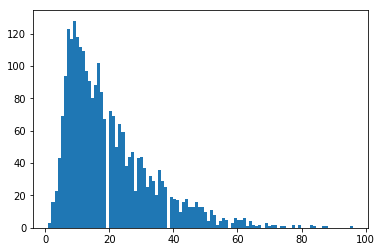

In [145]:
plt.hist(sentence_lenghts, bins=100)
plt.show()